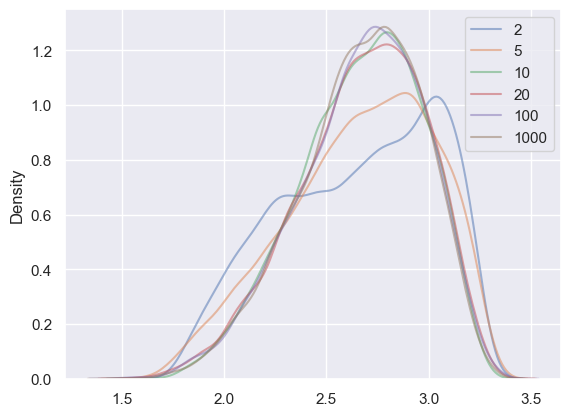

In [181]:
from scipy import stats

# N = 10000
# alpha = np.random.randn()
# beta = np.random.randn(1000)
# for p in [2,5,10,20,100,1000]:
#     X = np.random.rand(N*p).reshape((N,p))
#     eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
#     z = eta
#     sns.kdeplot(z, alpha=0.5, label=p)
# plt.legend()
# # plt.xlim(0,1)


N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = 1 + 5*gam*stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
# plt.xlim(0,1)

In [213]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d
import numpy as np
from scipy import stats


sns.set_theme()
sns.set_style("white")
sns.set_context("paper")

p = 10


def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs
    
    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)


alpha=np.random.randn()
beta=np.random.randn(p)
for i in range(10):    
    x = np.random.randn(p)
    sig0=1
    gam=2.5
    x, y, mx = gen_data(1, p, alpha, beta)

    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs
    
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    # Q0 = mu + sig * STD_NORMAL_Q
    # Q1 = W1d.noise_2(Q0, l=2)
    # compose = lambda f, g: np.interp(g, W1d.Wasserstein1D.GRID, f)
    # plt.plot(W1d.Wasserstein1D.GRID, Q0, color='black', alpha=0.1)
    # sort_index = np.argsort(Q1)
    # Q = Q1[sort_index]
    # P = W1d.Wasserstein1D.GRID[sort_index]
    # spline = UnivariateSpline(Q, P, k=5, s=10)
    # pdf = spline.derivative()
    # plt.plot(Q1[1:-1], pdf(Q1[1:-1]))
    # xs = np.linspace(-20,20,300)
    # plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=0.5)
    
    # plt.plot(W1d.Wasserstein1D.GRID, Q0, color='black', alpha=0.1)
    # plt.plot(W1d.Wasserstein1D.GRID, y[0], color='black', alpha=0.1)
    # plt.plot(W1d.Wasserstein1D.GRID, mx[0], color='black', alpha=0.1)
    # plt.scatter([mu], [sig])

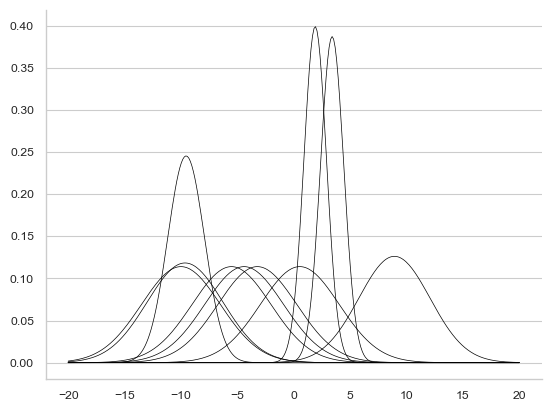

In [226]:
from pyfrechet.metric_spaces import *
import numpy as np
from scipy import stats

np.random.seed(22)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
p = 10
alpha=np.random.randn()
beta=np.random.randn(p)
sig0=1
gam=2.5
for i in range(10):    
    x = np.random.randn(p)
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    xs = np.linspace(-20,20,300)
    plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=1, linewidth=0.5)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.grid(axis='x')
plt.savefig("./plots/sample_wasserstein.pdf")

In [1]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 
from benchmark import bench

import numpy as np
from scipy import stats

from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

OUT_FILE = 'results/result_wasserstein_cross_est_new_dgp_75.json'

def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs

    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[2, 5, 10, 20],
    Ns=[50,100,200,400],
    replicas=75
)

INFO: Using numpy backend
INFO: NumExpr defaulting to 8 threads.


[2023-06-16 15:55:20.931061] Progress: N=50	p=2	i=0
[2023-06-16 15:55:20.936627] Distances for cart_2means
[2023-06-16 15:55:20.936637] dt = 0
[2023-06-16 15:55:20.936640] Fitting for cart_2means
[2023-06-16 15:55:20.979633] dt = 0.04300522804260254
[2023-06-16 15:55:20.979654] MSE for cart_2means
[2023-06-16 15:55:20.982166] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
[Parallel(n_jobs=-2)]: Done  37 out of  50 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    2.3s finished


[2023-06-16 15:55:23.245078] dt = 2.2629051208496094
[2023-06-16 15:55:23.245185] Fitting for medoid_greedy
[2023-06-16 15:55:23.252555] dt = 0.0074808597564697266
[2023-06-16 15:55:23.252588] MSE for medoid_greedy
[2023-06-16 15:55:23.255637] Progress: N=50	p=2	i=1
[2023-06-16 15:55:23.261108] Distances for cart_2means
[2023-06-16 15:55:23.261134] dt = 0
[2023-06-16 15:55:23.261137] Fitting for cart_2means
[2023-06-16 15:55:23.402568] dt = 0.14145898818969727
[2023-06-16 15:55:23.402615] MSE for cart_2means
[2023-06-16 15:55:23.406559] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:23.475527] dt = 0.0689542293548584
[2023-06-16 15:55:23.475716] Fitting for medoid_greedy
[2023-06-16 15:55:23.490022] dt = 0.01450490951538086
[2023-06-16 15:55:23.490037] MSE for medoid_greedy
[2023-06-16 15:55:23.492791] Progress: N=50	p=2	i=2
[2023-06-16 15:55:23.499380] Distances for cart_2means
[2023-06-16 15:55:23.499389] dt = 0
[2023-06-16 15:55:23.499392] Fitting for cart_2means
[2023-06-16 15:55:23.535431] dt = 0.036051034927368164
[2023-06-16 15:55:23.535447] MSE for cart_2means
[2023-06-16 15:55:23.537859] Distances for medoid_greedy
[2023-06-16 15:55:23.560629] dt = 0.022763967514038086
[2023-06-16 15:55:23.560643] Fitting for medoid_greedy
[2023-06-16 15:55:23.566905] dt = 0.00628209114074707
[2023-06-16 15:55:23.566916] MSE for medoid_greedy
[2023-06-16 15:55:23.569673] Progress: N=50	p=2	i=3
[2023-06-16 15:55:23.574585] Distances for cart_2means
[2023-06-16 15:55:23.574592] dt = 0
[2023-06-16 15:55:23.574595] Fitting for cart_2means
[2023-06-16 15:55:2

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:23.680295] Distances for medoid_greedy
[2023-06-16 15:55:23.704594] dt = 0.02424788475036621
[2023-06-16 15:55:23.704608] Fitting for medoid_greedy
[2023-06-16 15:55:23.710301] dt = 0.005758047103881836
[2023-06-16 15:55:23.710308] MSE for medoid_greedy
[2023-06-16 15:55:23.712929] Progress: N=50	p=2	i=5
[2023-06-16 15:55:23.717879] Distances for cart_2means
[2023-06-16 15:55:23.717894] dt = 0
[2023-06-16 15:55:23.717898] Fitting for cart_2means
[2023-06-16 15:55:23.734419] dt = 0.016539812088012695
[2023-06-16 15:55:23.734436] MSE for cart_2means
[2023-06-16 15:55:23.736967] Distances for medoid_greedy
[2023-06-16 15:55:23.759041] dt = 0.022064924240112305
[2023-06-16 15:55:23.759053] Fitting for medoid_greedy
[2023-06-16 15:55:23.765072] dt = 0.00603938102722168
[2023-06-16 15:55:23.765078] MSE for medoid_greedy
[2023-06-16 15:55:23.767717] Progress: N=50	p=2	i=6
[2023-06-16 15:55:23.772495] Distances for cart_2means
[2023-06-16 15:55:23.772500] dt = 0
[2023-06-16 1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:23.904406] dt = 0.02363276481628418
[2023-06-16 15:55:23.904486] MSE for cart_2means
[2023-06-16 15:55:23.907156] Distances for medoid_greedy
[2023-06-16 15:55:23.930450] dt = 0.0232851505279541
[2023-06-16 15:55:23.930463] Fitting for medoid_greedy
[2023-06-16 15:55:23.936391] dt = 0.005948781967163086
[2023-06-16 15:55:23.936410] MSE for medoid_greedy
[2023-06-16 15:55:23.939069] Progress: N=50	p=2	i=9
[2023-06-16 15:55:23.943991] Distances for cart_2means
[2023-06-16 15:55:23.943997] dt = 0
[2023-06-16 15:55:23.944000] Fitting for cart_2means
[2023-06-16 15:55:23.964232] dt = 0.020240068435668945
[2023-06-16 15:55:23.964247] MSE for cart_2means
[2023-06-16 15:55:23.966718] Distances for medoid_greedy
[2023-06-16 15:55:23.989093] dt = 0.02236628532409668
[2023-06-16 15:55:23.989107] Fitting for medoid_greedy
[2023-06-16 15:55:23.995582] dt = 0.006497621536254883
[2023-06-16 15:55:23.995589] MSE for medoid_greedy
[2023-06-16 15:55:23.998274] Progress: N=50	p=2	i=10
[

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:24.109688] dt = 0.006714820861816406
[2023-06-16 15:55:24.109736] MSE for medoid_greedy
[2023-06-16 15:55:24.112675] Progress: N=50	p=2	i=12
[2023-06-16 15:55:24.117570] Distances for cart_2means
[2023-06-16 15:55:24.117577] dt = 0
[2023-06-16 15:55:24.117581] Fitting for cart_2means
[2023-06-16 15:55:24.137080] dt = 0.019509077072143555
[2023-06-16 15:55:24.137098] MSE for cart_2means
[2023-06-16 15:55:24.139475] Distances for medoid_greedy
[2023-06-16 15:55:24.162742] dt = 0.023259878158569336
[2023-06-16 15:55:24.162755] Fitting for medoid_greedy
[2023-06-16 15:55:24.168472] dt = 0.0057373046875
[2023-06-16 15:55:24.168481] MSE for medoid_greedy
[2023-06-16 15:55:24.171124] Progress: N=50	p=2	i=13
[2023-06-16 15:55:24.175975] Distances for cart_2means
[2023-06-16 15:55:24.175980] dt = 0
[2023-06-16 15:55:24.175983] Fitting for cart_2means
[2023-06-16 15:55:24.195012] dt = 0.019037246704101562
[2023-06-16 15:55:24.195029] MSE for cart_2means
[2023-06-16 15:55:24.197

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:24.334919] dt = 0.024475812911987305
[2023-06-16 15:55:24.334988] Fitting for medoid_greedy
[2023-06-16 15:55:24.340859] dt = 0.0059452056884765625
[2023-06-16 15:55:24.340872] MSE for medoid_greedy
[2023-06-16 15:55:24.343552] Progress: N=50	p=2	i=16
[2023-06-16 15:55:24.348258] Distances for cart_2means
[2023-06-16 15:55:24.348264] dt = 0
[2023-06-16 15:55:24.348267] Fitting for cart_2means
[2023-06-16 15:55:24.366435] dt = 0.01817607879638672
[2023-06-16 15:55:24.366456] MSE for cart_2means
[2023-06-16 15:55:24.368902] Distances for medoid_greedy
[2023-06-16 15:55:24.391600] dt = 0.0226900577545166
[2023-06-16 15:55:24.391612] Fitting for medoid_greedy
[2023-06-16 15:55:24.398103] dt = 0.00651097297668457
[2023-06-16 15:55:24.398111] MSE for medoid_greedy
[2023-06-16 15:55:24.400918] Progress: N=50	p=2	i=17
[2023-06-16 15:55:24.405789] Distances for cart_2means
[2023-06-16 15:55:24.405796] dt = 0
[2023-06-16 15:55:24.405799] Fitting for cart_2means
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:24.559166] dt = 0.023602008819580078
[2023-06-16 15:55:24.559225] Fitting for medoid_greedy
[2023-06-16 15:55:24.565396] dt = 0.006235837936401367
[2023-06-16 15:55:24.565405] MSE for medoid_greedy
[2023-06-16 15:55:24.568278] Progress: N=50	p=2	i=20
[2023-06-16 15:55:24.573375] Distances for cart_2means
[2023-06-16 15:55:24.573387] dt = 0
[2023-06-16 15:55:24.573391] Fitting for cart_2means
[2023-06-16 15:55:24.592729] dt = 0.01935291290283203
[2023-06-16 15:55:24.592748] MSE for cart_2means
[2023-06-16 15:55:24.595205] Distances for medoid_greedy
[2023-06-16 15:55:24.618210] dt = 0.023000001907348633
[2023-06-16 15:55:24.618224] Fitting for medoid_greedy
[2023-06-16 15:55:24.624188] dt = 0.005982875823974609
[2023-06-16 15:55:24.624195] MSE for medoid_greedy
[2023-06-16 15:55:24.626968] Progress: N=50	p=2	i=21
[2023-06-16 15:55:24.631814] Distances for cart_2means
[2023-06-16 15:55:24.631820] dt = 0
[2023-06-16 15:55:24.631823] Fitting for cart_2means
[2023-06-16 15

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:24.763660] dt = 0.018390178680419922
[2023-06-16 15:55:24.763712] MSE for cart_2means
[2023-06-16 15:55:24.766350] Distances for medoid_greedy
[2023-06-16 15:55:24.790141] dt = 0.023782014846801758
[2023-06-16 15:55:24.790155] Fitting for medoid_greedy
[2023-06-16 15:55:24.795758] dt = 0.0056269168853759766
[2023-06-16 15:55:24.795765] MSE for medoid_greedy
[2023-06-16 15:55:24.798549] Progress: N=50	p=2	i=24
[2023-06-16 15:55:24.803480] Distances for cart_2means
[2023-06-16 15:55:24.803495] dt = 0
[2023-06-16 15:55:24.803498] Fitting for cart_2means
[2023-06-16 15:55:24.820772] dt = 0.017292022705078125
[2023-06-16 15:55:24.820789] MSE for cart_2means
[2023-06-16 15:55:24.823221] Distances for medoid_greedy
[2023-06-16 15:55:24.845462] dt = 0.022233963012695312
[2023-06-16 15:55:24.845475] Fitting for medoid_greedy
[2023-06-16 15:55:24.851264] dt = 0.005808115005493164
[2023-06-16 15:55:24.851271] MSE for medoid_greedy
[2023-06-16 15:55:24.854012] Progress: N=50	p=2	

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:24.967350] dt = 0.00699615478515625
[2023-06-16 15:55:24.967393] MSE for medoid_greedy
[2023-06-16 15:55:24.970576] Progress: N=50	p=2	i=27
[2023-06-16 15:55:24.975340] Distances for cart_2means
[2023-06-16 15:55:24.975346] dt = 0
[2023-06-16 15:55:24.975349] Fitting for cart_2means
[2023-06-16 15:55:24.997309] dt = 0.02196669578552246
[2023-06-16 15:55:24.997329] MSE for cart_2means
[2023-06-16 15:55:24.999808] Distances for medoid_greedy
[2023-06-16 15:55:25.023302] dt = 0.02348017692565918
[2023-06-16 15:55:25.023315] Fitting for medoid_greedy
[2023-06-16 15:55:25.029073] dt = 0.005785942077636719
[2023-06-16 15:55:25.029080] MSE for medoid_greedy
[2023-06-16 15:55:25.031919] Progress: N=50	p=2	i=28
[2023-06-16 15:55:25.036754] Distances for cart_2means
[2023-06-16 15:55:25.036762] dt = 0
[2023-06-16 15:55:25.036765] Fitting for cart_2means
[2023-06-16 15:55:25.053992] dt = 0.01723790168762207
[2023-06-16 15:55:25.054011] MSE for cart_2means
[2023-06-16 15:55:25.05

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:25.376684] Distances for cart_2means
[2023-06-16 15:55:25.376801] dt = 0
[2023-06-16 15:55:25.376806] Fitting for cart_2means
[2023-06-16 15:55:25.392842] dt = 0.016156911849975586
[2023-06-16 15:55:25.392863] MSE for cart_2means
[2023-06-16 15:55:25.395315] Distances for medoid_greedy
[2023-06-16 15:55:25.418286] dt = 0.02296280860900879
[2023-06-16 15:55:25.418303] Fitting for medoid_greedy
[2023-06-16 15:55:25.424264] dt = 0.005984067916870117
[2023-06-16 15:55:25.424283] MSE for medoid_greedy
[2023-06-16 15:55:25.427179] Progress: N=50	p=2	i=35
[2023-06-16 15:55:25.431978] Distances for cart_2means
[2023-06-16 15:55:25.431984] dt = 0
[2023-06-16 15:55:25.431988] Fitting for cart_2means
[2023-06-16 15:55:25.446877] dt = 0.014897823333740234
[2023-06-16 15:55:25.446895] MSE for cart_2means
[2023-06-16 15:55:25.449339] Distances for medoid_greedy
[2023-06-16 15:55:25.471567] dt = 0.022220849990844727
[2023-06-16 15:55:25.471580] Fitting for medoid_greedy
[2023-06-16 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:25.597179] dt = 0.033883094787597656
[2023-06-16 15:55:25.597764] Fitting for medoid_greedy
[2023-06-16 15:55:25.612658] dt = 0.015485048294067383
[2023-06-16 15:55:25.612686] MSE for medoid_greedy
[2023-06-16 15:55:25.615783] Progress: N=50	p=2	i=38
[2023-06-16 15:55:25.620868] Distances for cart_2means
[2023-06-16 15:55:25.620893] dt = 0
[2023-06-16 15:55:25.620897] Fitting for cart_2means
[2023-06-16 15:55:25.639115] dt = 0.01824784278869629
[2023-06-16 15:55:25.639135] MSE for cart_2means
[2023-06-16 15:55:25.641498] Distances for medoid_greedy
[2023-06-16 15:55:25.664319] dt = 0.022814035415649414
[2023-06-16 15:55:25.664332] Fitting for medoid_greedy
[2023-06-16 15:55:25.671018] dt = 0.006704807281494141
[2023-06-16 15:55:25.671040] MSE for medoid_greedy
[2023-06-16 15:55:25.673961] Progress: N=50	p=2	i=39
[2023-06-16 15:55:25.678788] Distances for cart_2means
[2023-06-16 15:55:25.678794] dt = 0
[2023-06-16 15:55:25.678797] Fitting for cart_2means
[2023-06-16 15

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:25.827601] dt = 0.02293872833251953
[2023-06-16 15:55:25.827662] Fitting for medoid_greedy
[2023-06-16 15:55:25.834272] dt = 0.006676197052001953
[2023-06-16 15:55:25.834290] MSE for medoid_greedy
[2023-06-16 15:55:25.837385] Progress: N=50	p=2	i=42
[2023-06-16 15:55:25.842145] Distances for cart_2means
[2023-06-16 15:55:25.842151] dt = 0
[2023-06-16 15:55:25.842154] Fitting for cart_2means
[2023-06-16 15:55:25.862331] dt = 0.020185232162475586
[2023-06-16 15:55:25.862351] MSE for cart_2means
[2023-06-16 15:55:25.864737] Distances for medoid_greedy
[2023-06-16 15:55:25.888342] dt = 0.02359914779663086
[2023-06-16 15:55:25.888355] Fitting for medoid_greedy
[2023-06-16 15:55:25.894182] dt = 0.005846738815307617
[2023-06-16 15:55:25.894189] MSE for medoid_greedy
[2023-06-16 15:55:25.897132] Progress: N=50	p=2	i=43
[2023-06-16 15:55:25.902019] Distances for cart_2means
[2023-06-16 15:55:25.902034] dt = 0
[2023-06-16 15:55:25.902037] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:26.032016] dt = 0.021544218063354492
[2023-06-16 15:55:26.032067] MSE for cart_2means
[2023-06-16 15:55:26.034777] Distances for medoid_greedy
[2023-06-16 15:55:26.058806] dt = 0.024017810821533203
[2023-06-16 15:55:26.058819] Fitting for medoid_greedy
[2023-06-16 15:55:26.064492] dt = 0.0056972503662109375
[2023-06-16 15:55:26.064498] MSE for medoid_greedy
[2023-06-16 15:55:26.067906] Progress: N=50	p=2	i=46
[2023-06-16 15:55:26.072820] Distances for cart_2means
[2023-06-16 15:55:26.072834] dt = 0
[2023-06-16 15:55:26.072838] Fitting for cart_2means
[2023-06-16 15:55:26.088756] dt = 0.015935897827148438
[2023-06-16 15:55:26.088775] MSE for cart_2means
[2023-06-16 15:55:26.091216] Distances for medoid_greedy
[2023-06-16 15:55:26.114368] dt = 0.023144960403442383
[2023-06-16 15:55:26.114382] Fitting for medoid_greedy
[2023-06-16 15:55:26.120174] dt = 0.005811214447021484
[2023-06-16 15:55:26.120192] MSE for medoid_greedy
[2023-06-16 15:55:26.123154] Progress: N=50	p=2	

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:26.251839] dt = 0.018841028213500977
[2023-06-16 15:55:26.251918] MSE for cart_2means
[2023-06-16 15:55:26.254560] Distances for medoid_greedy
[2023-06-16 15:55:26.277366] dt = 0.022797107696533203
[2023-06-16 15:55:26.277378] Fitting for medoid_greedy
[2023-06-16 15:55:26.283176] dt = 0.005818843841552734
[2023-06-16 15:55:26.283185] MSE for medoid_greedy
[2023-06-16 15:55:26.286193] Progress: N=50	p=2	i=50
[2023-06-16 15:55:26.291363] Distances for cart_2means
[2023-06-16 15:55:26.291370] dt = 0
[2023-06-16 15:55:26.291373] Fitting for cart_2means
[2023-06-16 15:55:26.310430] dt = 0.019066810607910156
[2023-06-16 15:55:26.310450] MSE for cart_2means
[2023-06-16 15:55:26.312843] Distances for medoid_greedy
[2023-06-16 15:55:26.335559] dt = 0.022710084915161133
[2023-06-16 15:55:26.335573] Fitting for medoid_greedy
[2023-06-16 15:55:26.341440] dt = 0.00588679313659668
[2023-06-16 15:55:26.341447] MSE for medoid_greedy
[2023-06-16 15:55:26.344473] Progress: N=50	p=2	i=

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:26.455875] dt = 0.007124185562133789
[2023-06-16 15:55:26.455915] MSE for medoid_greedy
[2023-06-16 15:55:26.459369] Progress: N=50	p=2	i=53
[2023-06-16 15:55:26.464168] Distances for cart_2means
[2023-06-16 15:55:26.464173] dt = 0
[2023-06-16 15:55:26.464176] Fitting for cart_2means
[2023-06-16 15:55:26.483520] dt = 0.019352197647094727
[2023-06-16 15:55:26.483545] MSE for cart_2means
[2023-06-16 15:55:26.486058] Distances for medoid_greedy
[2023-06-16 15:55:26.509155] dt = 0.023079872131347656
[2023-06-16 15:55:26.509168] Fitting for medoid_greedy
[2023-06-16 15:55:26.516017] dt = 0.006879091262817383
[2023-06-16 15:55:26.516026] MSE for medoid_greedy
[2023-06-16 15:55:26.519250] Progress: N=50	p=2	i=54
[2023-06-16 15:55:26.524116] Distances for cart_2means
[2023-06-16 15:55:26.524122] dt = 0
[2023-06-16 15:55:26.524125] Fitting for cart_2means
[2023-06-16 15:55:26.541491] dt = 0.017374038696289062
[2023-06-16 15:55:26.541511] MSE for cart_2means
[2023-06-16 15:55:2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:26.679394] dt = 0.023130178451538086
[2023-06-16 15:55:26.679464] Fitting for medoid_greedy
[2023-06-16 15:55:26.685945] dt = 0.00655364990234375
[2023-06-16 15:55:26.685966] MSE for medoid_greedy
[2023-06-16 15:55:26.689043] Progress: N=50	p=2	i=57
[2023-06-16 15:55:26.693820] Distances for cart_2means
[2023-06-16 15:55:26.693826] dt = 0
[2023-06-16 15:55:26.693829] Fitting for cart_2means
[2023-06-16 15:55:26.707832] dt = 0.014011144638061523
[2023-06-16 15:55:26.707852] MSE for cart_2means
[2023-06-16 15:55:26.710297] Distances for medoid_greedy
[2023-06-16 15:55:26.732818] dt = 0.022515058517456055
[2023-06-16 15:55:26.732831] Fitting for medoid_greedy
[2023-06-16 15:55:26.738908] dt = 0.006094694137573242
[2023-06-16 15:55:26.738916] MSE for medoid_greedy
[2023-06-16 15:55:26.741966] Progress: N=50	p=2	i=58
[2023-06-16 15:55:26.747290] Distances for cart_2means
[2023-06-16 15:55:26.747297] dt = 0
[2023-06-16 15:55:26.747301] Fitting for cart_2means
[2023-06-16 15

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:26.899048] dt = 0.023231029510498047
[2023-06-16 15:55:26.899139] Fitting for medoid_greedy
[2023-06-16 15:55:26.906007] dt = 0.006961822509765625
[2023-06-16 15:55:26.906030] MSE for medoid_greedy
[2023-06-16 15:55:26.909202] Progress: N=50	p=2	i=61
[2023-06-16 15:55:26.913960] Distances for cart_2means
[2023-06-16 15:55:26.913966] dt = 0
[2023-06-16 15:55:26.913969] Fitting for cart_2means
[2023-06-16 15:55:26.933758] dt = 0.01979684829711914
[2023-06-16 15:55:26.933778] MSE for cart_2means
[2023-06-16 15:55:26.936397] Distances for medoid_greedy
[2023-06-16 15:55:26.959237] dt = 0.02282428741455078
[2023-06-16 15:55:26.959250] Fitting for medoid_greedy
[2023-06-16 15:55:26.965154] dt = 0.00593256950378418
[2023-06-16 15:55:26.965160] MSE for medoid_greedy
[2023-06-16 15:55:26.969137] Progress: N=50	p=2	i=62
[2023-06-16 15:55:26.975436] Distances for cart_2means
[2023-06-16 15:55:26.975443] dt = 0
[2023-06-16 15:55:26.975446] Fitting for cart_2means
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:27.106016] dt = 0.017419099807739258
[2023-06-16 15:55:27.106074] MSE for cart_2means
[2023-06-16 15:55:27.108643] Distances for medoid_greedy
[2023-06-16 15:55:27.132096] dt = 0.02344489097595215
[2023-06-16 15:55:27.132109] Fitting for medoid_greedy
[2023-06-16 15:55:27.138563] dt = 0.006473064422607422
[2023-06-16 15:55:27.138585] MSE for medoid_greedy
[2023-06-16 15:55:27.141786] Progress: N=50	p=2	i=65
[2023-06-16 15:55:27.146689] Distances for cart_2means
[2023-06-16 15:55:27.146697] dt = 0
[2023-06-16 15:55:27.146700] Fitting for cart_2means
[2023-06-16 15:55:27.164217] dt = 0.017527103424072266
[2023-06-16 15:55:27.164236] MSE for cart_2means
[2023-06-16 15:55:27.166656] Distances for medoid_greedy
[2023-06-16 15:55:27.188829] dt = 0.022166013717651367
[2023-06-16 15:55:27.188842] Fitting for medoid_greedy
[2023-06-16 15:55:27.195609] dt = 0.0067861080169677734
[2023-06-16 15:55:27.195617] MSE for medoid_greedy
[2023-06-16 15:55:27.199461] Progress: N=50	p=2	i

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:27.309999] dt = 0.0073833465576171875
[2023-06-16 15:55:27.310049] MSE for medoid_greedy
[2023-06-16 15:55:27.313463] Progress: N=50	p=2	i=68
[2023-06-16 15:55:27.318379] Distances for cart_2means
[2023-06-16 15:55:27.318394] dt = 0
[2023-06-16 15:55:27.318397] Fitting for cart_2means
[2023-06-16 15:55:27.329531] dt = 0.011152029037475586
[2023-06-16 15:55:27.329550] MSE for cart_2means
[2023-06-16 15:55:27.331969] Distances for medoid_greedy
[2023-06-16 15:55:27.354659] dt = 0.022684335708618164
[2023-06-16 15:55:27.354672] Fitting for medoid_greedy
[2023-06-16 15:55:27.360310] dt = 0.005656719207763672
[2023-06-16 15:55:27.360317] MSE for medoid_greedy
[2023-06-16 15:55:27.363424] Progress: N=50	p=2	i=69
[2023-06-16 15:55:27.368413] Distances for cart_2means
[2023-06-16 15:55:27.368424] dt = 0
[2023-06-16 15:55:27.368428] Fitting for cart_2means
[2023-06-16 15:55:27.387173] dt = 0.01876235008239746
[2023-06-16 15:55:27.387188] MSE for cart_2means
[2023-06-16 15:55:2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:27.522740] dt = 0.022632837295532227
[2023-06-16 15:55:27.522799] Fitting for medoid_greedy
[2023-06-16 15:55:27.529360] dt = 0.006623029708862305
[2023-06-16 15:55:27.529392] MSE for medoid_greedy
[2023-06-16 15:55:27.534268] Progress: N=50	p=2	i=72
[2023-06-16 15:55:27.539348] Distances for cart_2means
[2023-06-16 15:55:27.539368] dt = 0
[2023-06-16 15:55:27.539371] Fitting for cart_2means
[2023-06-16 15:55:27.577514] dt = 0.038166046142578125
[2023-06-16 15:55:27.577532] MSE for cart_2means
[2023-06-16 15:55:27.579902] Distances for medoid_greedy
[2023-06-16 15:55:27.602081] dt = 0.022172927856445312
[2023-06-16 15:55:27.602094] Fitting for medoid_greedy
[2023-06-16 15:55:27.608283] dt = 0.006208896636962891
[2023-06-16 15:55:27.608290] MSE for medoid_greedy
[2023-06-16 15:55:27.612488] Progress: N=50	p=2	i=73
[2023-06-16 15:55:27.617306] Distances for cart_2means
[2023-06-16 15:55:27.617313] dt = 0
[2023-06-16 15:55:27.617315] Fitting for cart_2means
[2023-06-16 1

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:27.728090] Progress: N=50	p=5	i=0
[2023-06-16 15:55:27.734374] Distances for cart_2means
[2023-06-16 15:55:27.734385] dt = 0
[2023-06-16 15:55:27.734388] Fitting for cart_2means
[2023-06-16 15:55:27.793771] dt = 0.059393882751464844
[2023-06-16 15:55:27.793809] MSE for cart_2means
[2023-06-16 15:55:27.797655] Distances for medoid_greedy
[2023-06-16 15:55:27.819731] dt = 0.022063732147216797
[2023-06-16 15:55:27.819743] Fitting for medoid_greedy
[2023-06-16 15:55:27.833411] dt = 0.01369333267211914
[2023-06-16 15:55:27.833421] MSE for medoid_greedy
[2023-06-16 15:55:27.836619] Progress: N=50	p=5	i=1
[2023-06-16 15:55:27.841307] Distances for cart_2means
[2023-06-16 15:55:27.841312] dt = 0
[2023-06-16 15:55:27.841315] Fitting for cart_2means
[2023-06-16 15:55:27.882508] dt = 0.0411989688873291
[2023-06-16 15:55:27.882528] MSE for cart_2means
[2023-06-16 15:55:27.885136] Distances for medoid_greedy
[2023-06-16 15:55:27.908180] dt = 0.023021936416625977
[2023-06-16 15:55:

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:27.978819] dt = 0.04663395881652832
[2023-06-16 15:55:27.978891] MSE for cart_2means
[2023-06-16 15:55:27.981727] Distances for medoid_greedy
[2023-06-16 15:55:28.004716] dt = 0.02298116683959961
[2023-06-16 15:55:28.004729] Fitting for medoid_greedy
[2023-06-16 15:55:28.020124] dt = 0.015415668487548828
[2023-06-16 15:55:28.020137] MSE for medoid_greedy
[2023-06-16 15:55:28.024041] Progress: N=50	p=5	i=3
[2023-06-16 15:55:28.028920] Distances for cart_2means
[2023-06-16 15:55:28.028927] dt = 0
[2023-06-16 15:55:28.028929] Fitting for cart_2means
[2023-06-16 15:55:28.078322] dt = 0.04940080642700195
[2023-06-16 15:55:28.078341] MSE for cart_2means
[2023-06-16 15:55:28.080778] Distances for medoid_greedy
[2023-06-16 15:55:28.104743] dt = 0.023958683013916016
[2023-06-16 15:55:28.104760] Fitting for medoid_greedy
[2023-06-16 15:55:28.119374] dt = 0.014635562896728516
[2023-06-16 15:55:28.119396] MSE for medoid_greedy
[2023-06-16 15:55:28.122695] Progress: N=50	p=5	i=4
[

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:28.197416] dt = 0.022032976150512695
[2023-06-16 15:55:28.197482] Fitting for medoid_greedy
[2023-06-16 15:55:28.211668] dt = 0.014256000518798828
[2023-06-16 15:55:28.211689] MSE for medoid_greedy
[2023-06-16 15:55:28.214924] Progress: N=50	p=5	i=5
[2023-06-16 15:55:28.219831] Distances for cart_2means
[2023-06-16 15:55:28.219848] dt = 0
[2023-06-16 15:55:28.219852] Fitting for cart_2means
[2023-06-16 15:55:28.261987] dt = 0.04215693473815918
[2023-06-16 15:55:28.262008] MSE for cart_2means
[2023-06-16 15:55:28.264372] Distances for medoid_greedy
[2023-06-16 15:55:28.286462] dt = 0.022082805633544922
[2023-06-16 15:55:28.286476] Fitting for medoid_greedy
[2023-06-16 15:55:28.300206] dt = 0.013750314712524414
[2023-06-16 15:55:28.300216] MSE for medoid_greedy
[2023-06-16 15:55:28.303405] Progress: N=50	p=5	i=6
[2023-06-16 15:55:28.309348] Distances for cart_2means
[2023-06-16 15:55:28.309356] dt = 0
[2023-06-16 15:55:28.309359] Fitting for cart_2means
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:28.402365] Progress: N=50	p=5	i=7
[2023-06-16 15:55:28.407359] Distances for cart_2means
[2023-06-16 15:55:28.407366] dt = 0
[2023-06-16 15:55:28.407369] Fitting for cart_2means
[2023-06-16 15:55:28.456911] dt = 0.049552202224731445
[2023-06-16 15:55:28.456930] MSE for cart_2means
[2023-06-16 15:55:28.459345] Distances for medoid_greedy
[2023-06-16 15:55:28.481755] dt = 0.02240300178527832
[2023-06-16 15:55:28.481768] Fitting for medoid_greedy
[2023-06-16 15:55:28.496139] dt = 0.014390230178833008
[2023-06-16 15:55:28.496149] MSE for medoid_greedy
[2023-06-16 15:55:28.499361] Progress: N=50	p=5	i=8
[2023-06-16 15:55:28.504159] Distances for cart_2means
[2023-06-16 15:55:28.504165] dt = 0
[2023-06-16 15:55:28.504169] Fitting for cart_2means
[2023-06-16 15:55:28.554042] dt = 0.049883127212524414
[2023-06-16 15:55:28.554060] MSE for cart_2means
[2023-06-16 15:55:28.556425] Distances for medoid_greedy
[2023-06-16 15:55:28.580088] dt = 0.023656845092773438
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:28.645708] dt = 0.04230809211730957
[2023-06-16 15:55:28.645782] MSE for cart_2means
[2023-06-16 15:55:28.648471] Distances for medoid_greedy
[2023-06-16 15:55:28.671871] dt = 0.023392200469970703
[2023-06-16 15:55:28.671884] Fitting for medoid_greedy
[2023-06-16 15:55:28.686882] dt = 0.01501774787902832
[2023-06-16 15:55:28.686898] MSE for medoid_greedy
[2023-06-16 15:55:28.690230] Progress: N=50	p=5	i=10
[2023-06-16 15:55:28.695243] Distances for cart_2means
[2023-06-16 15:55:28.695251] dt = 0
[2023-06-16 15:55:28.695254] Fitting for cart_2means
[2023-06-16 15:55:28.735618] dt = 0.040373802185058594
[2023-06-16 15:55:28.735637] MSE for cart_2means
[2023-06-16 15:55:28.738095] Distances for medoid_greedy
[2023-06-16 15:55:28.760728] dt = 0.022626876831054688
[2023-06-16 15:55:28.760742] Fitting for medoid_greedy
[2023-06-16 15:55:28.774652] dt = 0.01392984390258789
[2023-06-16 15:55:28.774663] MSE for medoid_greedy
[2023-06-16 15:55:28.777886] Progress: N=50	p=5	i=11

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:28.858550] dt = 0.02279973030090332
[2023-06-16 15:55:28.858613] Fitting for medoid_greedy
[2023-06-16 15:55:28.872741] dt = 0.014195442199707031
[2023-06-16 15:55:28.872762] MSE for medoid_greedy
[2023-06-16 15:55:28.876197] Progress: N=50	p=5	i=12
[2023-06-16 15:55:28.881059] Distances for cart_2means
[2023-06-16 15:55:28.881065] dt = 0
[2023-06-16 15:55:28.881068] Fitting for cart_2means
[2023-06-16 15:55:28.922290] dt = 0.0412297248840332
[2023-06-16 15:55:28.922311] MSE for cart_2means
[2023-06-16 15:55:28.924758] Distances for medoid_greedy
[2023-06-16 15:55:28.946756] dt = 0.021992206573486328
[2023-06-16 15:55:28.946770] Fitting for medoid_greedy
[2023-06-16 15:55:28.962267] dt = 0.015516996383666992
[2023-06-16 15:55:28.962278] MSE for medoid_greedy
[2023-06-16 15:55:28.965594] Progress: N=50	p=5	i=13
[2023-06-16 15:55:28.970462] Distances for cart_2means
[2023-06-16 15:55:28.970469] dt = 0
[2023-06-16 15:55:28.970473] Fitting for cart_2means
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:29.063814] Progress: N=50	p=5	i=14
[2023-06-16 15:55:29.070320] Distances for cart_2means
[2023-06-16 15:55:29.070341] dt = 0
[2023-06-16 15:55:29.070345] Fitting for cart_2means
[2023-06-16 15:55:29.116382] dt = 0.046060800552368164
[2023-06-16 15:55:29.116401] MSE for cart_2means
[2023-06-16 15:55:29.118909] Distances for medoid_greedy
[2023-06-16 15:55:29.141023] dt = 0.022095918655395508
[2023-06-16 15:55:29.141037] Fitting for medoid_greedy
[2023-06-16 15:55:29.155167] dt = 0.014162063598632812
[2023-06-16 15:55:29.155177] MSE for medoid_greedy
[2023-06-16 15:55:29.158508] Progress: N=50	p=5	i=15
[2023-06-16 15:55:29.163330] Distances for cart_2means
[2023-06-16 15:55:29.163336] dt = 0
[2023-06-16 15:55:29.163339] Fitting for cart_2means
[2023-06-16 15:55:29.208203] dt = 0.044870853424072266
[2023-06-16 15:55:29.208223] MSE for cart_2means
[2023-06-16 15:55:29.210669] Distances for medoid_greedy
[2023-06-16 15:55:29.232974] dt = 0.022298336029052734
[2023-06-16 1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:29.511549] dt = 0.045440673828125
[2023-06-16 15:55:29.511608] MSE for cart_2means
[2023-06-16 15:55:29.514417] Distances for medoid_greedy
[2023-06-16 15:55:29.537694] dt = 0.023268699645996094
[2023-06-16 15:55:29.537708] Fitting for medoid_greedy
[2023-06-16 15:55:29.552042] dt = 0.014354944229125977
[2023-06-16 15:55:29.552071] MSE for medoid_greedy
[2023-06-16 15:55:29.555656] Progress: N=50	p=5	i=19
[2023-06-16 15:55:29.560562] Distances for cart_2means
[2023-06-16 15:55:29.560568] dt = 0
[2023-06-16 15:55:29.560571] Fitting for cart_2means
[2023-06-16 15:55:29.606846] dt = 0.04628300666809082
[2023-06-16 15:55:29.606866] MSE for cart_2means
[2023-06-16 15:55:29.609377] Distances for medoid_greedy
[2023-06-16 15:55:29.631679] dt = 0.022294044494628906
[2023-06-16 15:55:29.631693] Fitting for medoid_greedy
[2023-06-16 15:55:29.645876] dt = 0.014204025268554688
[2023-06-16 15:55:29.645897] MSE for medoid_greedy
[2023-06-16 15:55:29.649292] Progress: N=50	p=5	i=20


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:29.729781] dt = 0.02341008186340332
[2023-06-16 15:55:29.729809] Fitting for medoid_greedy
[2023-06-16 15:55:29.744433] dt = 0.014657974243164062
[2023-06-16 15:55:29.744456] MSE for medoid_greedy
[2023-06-16 15:55:29.747789] Progress: N=50	p=5	i=21
[2023-06-16 15:55:29.752646] Distances for cart_2means
[2023-06-16 15:55:29.752656] dt = 0
[2023-06-16 15:55:29.752659] Fitting for cart_2means
[2023-06-16 15:55:29.795973] dt = 0.04332709312438965
[2023-06-16 15:55:29.795992] MSE for cart_2means
[2023-06-16 15:55:29.798358] Distances for medoid_greedy
[2023-06-16 15:55:29.820693] dt = 0.02232813835144043
[2023-06-16 15:55:29.820710] Fitting for medoid_greedy
[2023-06-16 15:55:29.835046] dt = 0.014359712600708008
[2023-06-16 15:55:29.835057] MSE for medoid_greedy
[2023-06-16 15:55:29.838399] Progress: N=50	p=5	i=22
[2023-06-16 15:55:29.843270] Distances for cart_2means
[2023-06-16 15:55:29.843277] dt = 0
[2023-06-16 15:55:29.843280] Fitting for cart_2means
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:30.191095] dt = 0.023396015167236328
[2023-06-16 15:55:30.191121] Fitting for medoid_greedy
[2023-06-16 15:55:30.205795] dt = 0.014707088470458984
[2023-06-16 15:55:30.205821] MSE for medoid_greedy
[2023-06-16 15:55:30.209200] Progress: N=50	p=5	i=26
[2023-06-16 15:55:30.214010] Distances for cart_2means
[2023-06-16 15:55:30.214016] dt = 0
[2023-06-16 15:55:30.214019] Fitting for cart_2means
[2023-06-16 15:55:30.261957] dt = 0.047943115234375
[2023-06-16 15:55:30.261998] MSE for cart_2means
[2023-06-16 15:55:30.265853] Distances for medoid_greedy
[2023-06-16 15:55:30.287926] dt = 0.022060155868530273
[2023-06-16 15:55:30.287939] Fitting for medoid_greedy
[2023-06-16 15:55:30.303092] dt = 0.015176773071289062
[2023-06-16 15:55:30.303114] MSE for medoid_greedy
[2023-06-16 15:55:30.306554] Progress: N=50	p=5	i=27
[2023-06-16 15:55:30.311343] Distances for cart_2means
[2023-06-16 15:55:30.311349] dt = 0
[2023-06-16 15:55:30.311352] Fitting for cart_2means
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:30.628388] dt = 0.04391813278198242
[2023-06-16 15:55:30.628469] MSE for cart_2means
[2023-06-16 15:55:30.630998] Distances for medoid_greedy
[2023-06-16 15:55:30.654239] dt = 0.023234128952026367
[2023-06-16 15:55:30.654251] Fitting for medoid_greedy
[2023-06-16 15:55:30.669346] dt = 0.01511073112487793
[2023-06-16 15:55:30.669372] MSE for medoid_greedy
[2023-06-16 15:55:30.672956] Progress: N=50	p=5	i=31
[2023-06-16 15:55:30.677927] Distances for cart_2means
[2023-06-16 15:55:30.677934] dt = 0
[2023-06-16 15:55:30.677937] Fitting for cart_2means
[2023-06-16 15:55:30.720046] dt = 0.04211592674255371
[2023-06-16 15:55:30.720089] MSE for cart_2means
[2023-06-16 15:55:30.723532] Distances for medoid_greedy
[2023-06-16 15:55:30.746021] dt = 0.0224759578704834
[2023-06-16 15:55:30.746034] Fitting for medoid_greedy
[2023-06-16 15:55:30.760425] dt = 0.014417886734008789
[2023-06-16 15:55:30.760434] MSE for medoid_greedy
[2023-06-16 15:55:30.763852] Progress: N=50	p=5	i=32
[

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:30.832959] dt = 0.022883892059326172
[2023-06-16 15:55:30.833011] Fitting for medoid_greedy
[2023-06-16 15:55:30.848763] dt = 0.015809297561645508
[2023-06-16 15:55:30.848786] MSE for medoid_greedy
[2023-06-16 15:55:30.852423] Progress: N=50	p=5	i=33
[2023-06-16 15:55:30.858027] Distances for cart_2means
[2023-06-16 15:55:30.858035] dt = 0
[2023-06-16 15:55:30.858038] Fitting for cart_2means
[2023-06-16 15:55:30.900749] dt = 0.04272103309631348
[2023-06-16 15:55:30.900773] MSE for cart_2means
[2023-06-16 15:55:30.903447] Distances for medoid_greedy
[2023-06-16 15:55:30.925981] dt = 0.022513866424560547
[2023-06-16 15:55:30.925994] Fitting for medoid_greedy
[2023-06-16 15:55:30.940379] dt = 0.014418363571166992
[2023-06-16 15:55:30.940390] MSE for medoid_greedy
[2023-06-16 15:55:30.943736] Progress: N=50	p=5	i=34
[2023-06-16 15:55:30.948534] Distances for cart_2means
[2023-06-16 15:55:30.948540] dt = 0
[2023-06-16 15:55:30.948543] Fitting for cart_2means
[2023-06-16 15

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:31.037819] Progress: N=50	p=5	i=35
[2023-06-16 15:55:31.043750] Distances for cart_2means
[2023-06-16 15:55:31.043758] dt = 0
[2023-06-16 15:55:31.043762] Fitting for cart_2means
[2023-06-16 15:55:31.092220] dt = 0.04846906661987305
[2023-06-16 15:55:31.092239] MSE for cart_2means
[2023-06-16 15:55:31.094597] Distances for medoid_greedy
[2023-06-16 15:55:31.117499] dt = 0.022896289825439453
[2023-06-16 15:55:31.117514] Fitting for medoid_greedy
[2023-06-16 15:55:31.133095] dt = 0.015598773956298828
[2023-06-16 15:55:31.133121] MSE for medoid_greedy
[2023-06-16 15:55:31.136734] Progress: N=50	p=5	i=36
[2023-06-16 15:55:31.141723] Distances for cart_2means
[2023-06-16 15:55:31.141730] dt = 0
[2023-06-16 15:55:31.141733] Fitting for cart_2means
[2023-06-16 15:55:31.184211] dt = 0.04248666763305664
[2023-06-16 15:55:31.184230] MSE for cart_2means
[2023-06-16 15:55:31.186594] Distances for medoid_greedy
[2023-06-16 15:55:31.208854] dt = 0.022253990173339844
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:31.277180] dt = 0.04234910011291504
[2023-06-16 15:55:31.277263] MSE for cart_2means
[2023-06-16 15:55:31.280048] Distances for medoid_greedy
[2023-06-16 15:55:31.302599] dt = 0.02254199981689453
[2023-06-16 15:55:31.302612] Fitting for medoid_greedy
[2023-06-16 15:55:31.316824] dt = 0.014233827590942383
[2023-06-16 15:55:31.316835] MSE for medoid_greedy
[2023-06-16 15:55:31.320808] Progress: N=50	p=5	i=38
[2023-06-16 15:55:31.325604] Distances for cart_2means
[2023-06-16 15:55:31.325610] dt = 0
[2023-06-16 15:55:31.325613] Fitting for cart_2means
[2023-06-16 15:55:31.365569] dt = 0.039964914321899414
[2023-06-16 15:55:31.365589] MSE for cart_2means
[2023-06-16 15:55:31.368068] Distances for medoid_greedy
[2023-06-16 15:55:31.391526] dt = 0.023445844650268555
[2023-06-16 15:55:31.391540] Fitting for medoid_greedy
[2023-06-16 15:55:31.405272] dt = 0.013758182525634766
[2023-06-16 15:55:31.405283] MSE for medoid_greedy
[2023-06-16 15:55:31.408646] Progress: N=50	p=5	i=3

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:31.481879] dt = 0.02245187759399414
[2023-06-16 15:55:31.481927] Fitting for medoid_greedy
[2023-06-16 15:55:31.497232] dt = 0.015357255935668945
[2023-06-16 15:55:31.497258] MSE for medoid_greedy
[2023-06-16 15:55:31.500852] Progress: N=50	p=5	i=40
[2023-06-16 15:55:31.505829] Distances for cart_2means
[2023-06-16 15:55:31.505843] dt = 0
[2023-06-16 15:55:31.505847] Fitting for cart_2means
[2023-06-16 15:55:31.545970] dt = 0.04014086723327637
[2023-06-16 15:55:31.545989] MSE for cart_2means
[2023-06-16 15:55:31.548388] Distances for medoid_greedy
[2023-06-16 15:55:31.571388] dt = 0.022993803024291992
[2023-06-16 15:55:31.571400] Fitting for medoid_greedy
[2023-06-16 15:55:31.586768] dt = 0.015383243560791016
[2023-06-16 15:55:31.586798] MSE for medoid_greedy
[2023-06-16 15:55:31.590540] Progress: N=50	p=5	i=41
[2023-06-16 15:55:31.596189] Distances for cart_2means
[2023-06-16 15:55:31.596212] dt = 0
[2023-06-16 15:55:31.596216] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:31.696220] dt = 0.015400171279907227
[2023-06-16 15:55:31.696283] MSE for medoid_greedy
[2023-06-16 15:55:31.700280] Progress: N=50	p=5	i=42
[2023-06-16 15:55:31.705650] Distances for cart_2means
[2023-06-16 15:55:31.705667] dt = 0
[2023-06-16 15:55:31.705670] Fitting for cart_2means
[2023-06-16 15:55:31.752701] dt = 0.04704999923706055
[2023-06-16 15:55:31.752722] MSE for cart_2means
[2023-06-16 15:55:31.755204] Distances for medoid_greedy
[2023-06-16 15:55:31.778188] dt = 0.02297496795654297
[2023-06-16 15:55:31.778202] Fitting for medoid_greedy
[2023-06-16 15:55:31.792866] dt = 0.014686107635498047
[2023-06-16 15:55:31.792890] MSE for medoid_greedy
[2023-06-16 15:55:31.796330] Progress: N=50	p=5	i=43
[2023-06-16 15:55:31.801360] Distances for cart_2means
[2023-06-16 15:55:31.801380] dt = 0
[2023-06-16 15:55:31.801384] Fitting for cart_2means
[2023-06-16 15:55:31.847653] dt = 0.046294212341308594
[2023-06-16 15:55:31.847673] MSE for cart_2means
[2023-06-16 15:55:31.

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:31.944113] dt = 0.049633026123046875
[2023-06-16 15:55:31.944186] MSE for cart_2means
[2023-06-16 15:55:31.947027] Distances for medoid_greedy
[2023-06-16 15:55:31.970234] dt = 0.023199081420898438
[2023-06-16 15:55:31.970247] Fitting for medoid_greedy
[2023-06-16 15:55:31.985785] dt = 0.015558958053588867
[2023-06-16 15:55:31.985806] MSE for medoid_greedy
[2023-06-16 15:55:31.989309] Progress: N=50	p=5	i=45
[2023-06-16 15:55:31.994188] Distances for cart_2means
[2023-06-16 15:55:31.994204] dt = 0
[2023-06-16 15:55:31.994208] Fitting for cart_2means
[2023-06-16 15:55:32.042143] dt = 0.04795384407043457
[2023-06-16 15:55:32.042162] MSE for cart_2means
[2023-06-16 15:55:32.044568] Distances for medoid_greedy
[2023-06-16 15:55:32.067088] dt = 0.022513151168823242
[2023-06-16 15:55:32.067102] Fitting for medoid_greedy
[2023-06-16 15:55:32.082019] dt = 0.014938831329345703
[2023-06-16 15:55:32.082026] MSE for medoid_greedy
[2023-06-16 15:55:32.085628] Progress: N=50	p=5	i=

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:32.160489] dt = 0.023526906967163086
[2023-06-16 15:55:32.160601] Fitting for medoid_greedy
[2023-06-16 15:55:32.176086] dt = 0.015599966049194336
[2023-06-16 15:55:32.176108] MSE for medoid_greedy
[2023-06-16 15:55:32.179690] Progress: N=50	p=5	i=47
[2023-06-16 15:55:32.184547] Distances for cart_2means
[2023-06-16 15:55:32.184560] dt = 0
[2023-06-16 15:55:32.184564] Fitting for cart_2means
[2023-06-16 15:55:32.228442] dt = 0.04389500617980957
[2023-06-16 15:55:32.228462] MSE for cart_2means
[2023-06-16 15:55:32.230996] Distances for medoid_greedy
[2023-06-16 15:55:32.254076] dt = 0.0230712890625
[2023-06-16 15:55:32.254089] Fitting for medoid_greedy
[2023-06-16 15:55:32.270782] dt = 0.016713619232177734
[2023-06-16 15:55:32.270802] MSE for medoid_greedy
[2023-06-16 15:55:32.274294] Progress: N=50	p=5	i=48
[2023-06-16 15:55:32.279170] Distances for cart_2means
[2023-06-16 15:55:32.279176] dt = 0
[2023-06-16 15:55:32.279179] Fitting for cart_2means
[2023-06-16 15:55:3

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:32.365071] dt = 0.014148235321044922
[2023-06-16 15:55:32.365112] MSE for medoid_greedy
[2023-06-16 15:55:32.368880] Progress: N=50	p=5	i=49
[2023-06-16 15:55:32.373701] Distances for cart_2means
[2023-06-16 15:55:32.373707] dt = 0
[2023-06-16 15:55:32.373710] Fitting for cart_2means
[2023-06-16 15:55:32.417802] dt = 0.04410076141357422
[2023-06-16 15:55:32.417822] MSE for cart_2means
[2023-06-16 15:55:32.420298] Distances for medoid_greedy
[2023-06-16 15:55:32.442976] dt = 0.022669076919555664
[2023-06-16 15:55:32.442989] Fitting for medoid_greedy
[2023-06-16 15:55:32.457969] dt = 0.015001058578491211
[2023-06-16 15:55:32.457981] MSE for medoid_greedy
[2023-06-16 15:55:32.461763] Progress: N=50	p=5	i=50
[2023-06-16 15:55:32.466604] Distances for cart_2means
[2023-06-16 15:55:32.466611] dt = 0
[2023-06-16 15:55:32.466615] Fitting for cart_2means
[2023-06-16 15:55:32.510007] dt = 0.04340100288391113
[2023-06-16 15:55:32.510027] MSE for cart_2means
[2023-06-16 15:55:32.

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:32.620082] dt = 0.061737060546875
[2023-06-16 15:55:32.620164] MSE for cart_2means
[2023-06-16 15:55:32.622763] Distances for medoid_greedy
[2023-06-16 15:55:32.645051] dt = 0.022280216217041016
[2023-06-16 15:55:32.645065] Fitting for medoid_greedy
[2023-06-16 15:55:32.659476] dt = 0.014432668685913086
[2023-06-16 15:55:32.659484] MSE for medoid_greedy
[2023-06-16 15:55:32.663076] Progress: N=50	p=5	i=52
[2023-06-16 15:55:32.667948] Distances for cart_2means
[2023-06-16 15:55:32.667954] dt = 0
[2023-06-16 15:55:32.667957] Fitting for cart_2means
[2023-06-16 15:55:32.703018] dt = 0.035069942474365234
[2023-06-16 15:55:32.703036] MSE for cart_2means
[2023-06-16 15:55:32.705398] Distances for medoid_greedy
[2023-06-16 15:55:32.728199] dt = 0.02279496192932129
[2023-06-16 15:55:32.728213] Fitting for medoid_greedy
[2023-06-16 15:55:32.742331] dt = 0.014137029647827148
[2023-06-16 15:55:32.742351] MSE for medoid_greedy
[2023-06-16 15:55:32.745910] Progress: N=50	p=5	i=53


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:32.828288] dt = 0.022441864013671875
[2023-06-16 15:55:32.828339] Fitting for medoid_greedy
[2023-06-16 15:55:32.842865] dt = 0.014585256576538086
[2023-06-16 15:55:32.842886] MSE for medoid_greedy
[2023-06-16 15:55:32.846595] Progress: N=50	p=5	i=54
[2023-06-16 15:55:32.851543] Distances for cart_2means
[2023-06-16 15:55:32.851557] dt = 0
[2023-06-16 15:55:32.851561] Fitting for cart_2means
[2023-06-16 15:55:32.901214] dt = 0.04967093467712402
[2023-06-16 15:55:32.901233] MSE for cart_2means
[2023-06-16 15:55:32.903639] Distances for medoid_greedy
[2023-06-16 15:55:32.926127] dt = 0.02248215675354004
[2023-06-16 15:55:32.926140] Fitting for medoid_greedy
[2023-06-16 15:55:32.940772] dt = 0.01464986801147461
[2023-06-16 15:55:32.940790] MSE for medoid_greedy
[2023-06-16 15:55:32.944537] Progress: N=50	p=5	i=55
[2023-06-16 15:55:32.949494] Distances for cart_2means
[2023-06-16 15:55:32.949511] dt = 0
[2023-06-16 15:55:32.949514] Fitting for cart_2means
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:33.031835] dt = 0.015652894973754883
[2023-06-16 15:55:33.031875] MSE for medoid_greedy
[2023-06-16 15:55:33.035823] Progress: N=50	p=5	i=56
[2023-06-16 15:55:33.040717] Distances for cart_2means
[2023-06-16 15:55:33.040723] dt = 0
[2023-06-16 15:55:33.040726] Fitting for cart_2means
[2023-06-16 15:55:33.092213] dt = 0.05149388313293457
[2023-06-16 15:55:33.092233] MSE for cart_2means
[2023-06-16 15:55:33.094660] Distances for medoid_greedy
[2023-06-16 15:55:33.117039] dt = 0.02237105369567871
[2023-06-16 15:55:33.117052] Fitting for medoid_greedy
[2023-06-16 15:55:33.131182] dt = 0.014152050018310547
[2023-06-16 15:55:33.131190] MSE for medoid_greedy
[2023-06-16 15:55:33.134767] Progress: N=50	p=5	i=57
[2023-06-16 15:55:33.139661] Distances for cart_2means
[2023-06-16 15:55:33.139667] dt = 0
[2023-06-16 15:55:33.139669] Fitting for cart_2means
[2023-06-16 15:55:33.174146] dt = 0.034483909606933594
[2023-06-16 15:55:33.174164] MSE for cart_2means
[2023-06-16 15:55:33.

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:33.296806] dt = 0.0734398365020752
[2023-06-16 15:55:33.296934] MSE for cart_2means
[2023-06-16 15:55:33.299696] Distances for medoid_greedy
[2023-06-16 15:55:33.322317] dt = 0.022603988647460938
[2023-06-16 15:55:33.322330] Fitting for medoid_greedy
[2023-06-16 15:55:33.336570] dt = 0.01427006721496582
[2023-06-16 15:55:33.336581] MSE for medoid_greedy
[2023-06-16 15:55:33.340137] Progress: N=50	p=5	i=59
[2023-06-16 15:55:33.345039] Distances for cart_2means
[2023-06-16 15:55:33.345046] dt = 0
[2023-06-16 15:55:33.345049] Fitting for cart_2means
[2023-06-16 15:55:33.393399] dt = 0.04835987091064453
[2023-06-16 15:55:33.393418] MSE for cart_2means
[2023-06-16 15:55:33.395803] Distances for medoid_greedy
[2023-06-16 15:55:33.418381] dt = 0.022571086883544922
[2023-06-16 15:55:33.418398] Fitting for medoid_greedy
[2023-06-16 15:55:33.432878] dt = 0.01450204849243164
[2023-06-16 15:55:33.432899] MSE for medoid_greedy
[2023-06-16 15:55:33.436671] Progress: N=50	p=5	i=60
[

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:33.518800] dt = 0.023418188095092773
[2023-06-16 15:55:33.518906] Fitting for medoid_greedy
[2023-06-16 15:55:33.534719] dt = 0.015921831130981445
[2023-06-16 15:55:33.534743] MSE for medoid_greedy
[2023-06-16 15:55:33.538695] Progress: N=50	p=5	i=61
[2023-06-16 15:55:33.543614] Distances for cart_2means
[2023-06-16 15:55:33.543621] dt = 0
[2023-06-16 15:55:33.543624] Fitting for cart_2means
[2023-06-16 15:55:33.584411] dt = 0.04079723358154297
[2023-06-16 15:55:33.584430] MSE for cart_2means
[2023-06-16 15:55:33.586881] Distances for medoid_greedy
[2023-06-16 15:55:33.608749] dt = 0.02186107635498047
[2023-06-16 15:55:33.608763] Fitting for medoid_greedy
[2023-06-16 15:55:33.624428] dt = 0.015685081481933594
[2023-06-16 15:55:33.624446] MSE for medoid_greedy
[2023-06-16 15:55:33.628135] Progress: N=50	p=5	i=62
[2023-06-16 15:55:33.632925] Distances for cart_2means
[2023-06-16 15:55:33.632932] dt = 0
[2023-06-16 15:55:33.632935] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:33.726714] dt = 0.020404338836669922
[2023-06-16 15:55:33.726769] MSE for medoid_greedy
[2023-06-16 15:55:33.730558] Progress: N=50	p=5	i=63
[2023-06-16 15:55:33.735486] Distances for cart_2means
[2023-06-16 15:55:33.735501] dt = 0
[2023-06-16 15:55:33.735504] Fitting for cart_2means
[2023-06-16 15:55:33.784385] dt = 0.04889822006225586
[2023-06-16 15:55:33.784404] MSE for cart_2means
[2023-06-16 15:55:33.786885] Distances for medoid_greedy
[2023-06-16 15:55:33.809112] dt = 0.022219181060791016
[2023-06-16 15:55:33.809126] Fitting for medoid_greedy
[2023-06-16 15:55:33.824009] dt = 0.014903783798217773
[2023-06-16 15:55:33.824018] MSE for medoid_greedy
[2023-06-16 15:55:33.827747] Progress: N=50	p=5	i=64
[2023-06-16 15:55:33.832529] Distances for cart_2means
[2023-06-16 15:55:33.832534] dt = 0
[2023-06-16 15:55:33.832537] Fitting for cart_2means
[2023-06-16 15:55:33.871704] dt = 0.03917407989501953
[2023-06-16 15:55:33.871725] MSE for cart_2means
[2023-06-16 15:55:33.

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:33.964643] dt = 0.04393291473388672
[2023-06-16 15:55:33.964718] MSE for cart_2means
[2023-06-16 15:55:33.967345] Distances for medoid_greedy
[2023-06-16 15:55:33.990209] dt = 0.02285480499267578
[2023-06-16 15:55:33.990222] Fitting for medoid_greedy
[2023-06-16 15:55:34.004262] dt = 0.014062166213989258
[2023-06-16 15:55:34.004273] MSE for medoid_greedy
[2023-06-16 15:55:34.007916] Progress: N=50	p=5	i=66
[2023-06-16 15:55:34.012696] Distances for cart_2means
[2023-06-16 15:55:34.012701] dt = 0
[2023-06-16 15:55:34.012704] Fitting for cart_2means
[2023-06-16 15:55:34.046824] dt = 0.03412795066833496
[2023-06-16 15:55:34.046841] MSE for cart_2means
[2023-06-16 15:55:34.049275] Distances for medoid_greedy
[2023-06-16 15:55:34.071508] dt = 0.02222585678100586
[2023-06-16 15:55:34.071521] Fitting for medoid_greedy
[2023-06-16 15:55:34.085987] dt = 0.014486074447631836
[2023-06-16 15:55:34.085997] MSE for medoid_greedy
[2023-06-16 15:55:34.089616] Progress: N=50	p=5	i=67


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:34.178812] dt = 0.01505589485168457
[2023-06-16 15:55:34.178918] MSE for medoid_greedy
[2023-06-16 15:55:34.183011] Progress: N=50	p=5	i=68
[2023-06-16 15:55:34.188221] Distances for cart_2means
[2023-06-16 15:55:34.188238] dt = 0
[2023-06-16 15:55:34.188242] Fitting for cart_2means
[2023-06-16 15:55:34.231880] dt = 0.043659210205078125
[2023-06-16 15:55:34.231899] MSE for cart_2means
[2023-06-16 15:55:34.234331] Distances for medoid_greedy
[2023-06-16 15:55:34.256590] dt = 0.02225017547607422
[2023-06-16 15:55:34.256604] Fitting for medoid_greedy
[2023-06-16 15:55:34.270450] dt = 0.013867855072021484
[2023-06-16 15:55:34.270461] MSE for medoid_greedy
[2023-06-16 15:55:34.274148] Progress: N=50	p=5	i=69
[2023-06-16 15:55:34.279049] Distances for cart_2means
[2023-06-16 15:55:34.279055] dt = 0
[2023-06-16 15:55:34.279058] Fitting for cart_2means
[2023-06-16 15:55:34.324405] dt = 0.04535508155822754
[2023-06-16 15:55:34.324425] MSE for cart_2means
[2023-06-16 15:55:34.3

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:34.423748] dt = 0.04935908317565918
[2023-06-16 15:55:34.423823] MSE for cart_2means
[2023-06-16 15:55:34.426473] Distances for medoid_greedy
[2023-06-16 15:55:34.449538] dt = 0.023056983947753906
[2023-06-16 15:55:34.449551] Fitting for medoid_greedy
[2023-06-16 15:55:34.463896] dt = 0.014367103576660156
[2023-06-16 15:55:34.463904] MSE for medoid_greedy
[2023-06-16 15:55:34.467513] Progress: N=50	p=5	i=71
[2023-06-16 15:55:34.472395] Distances for cart_2means
[2023-06-16 15:55:34.472401] dt = 0
[2023-06-16 15:55:34.472404] Fitting for cart_2means
[2023-06-16 15:55:34.517595] dt = 0.04519820213317871
[2023-06-16 15:55:34.517614] MSE for cart_2means
[2023-06-16 15:55:34.519998] Distances for medoid_greedy
[2023-06-16 15:55:34.542311] dt = 0.02230691909790039
[2023-06-16 15:55:34.542324] Fitting for medoid_greedy
[2023-06-16 15:55:34.557731] dt = 0.015426158905029297
[2023-06-16 15:55:34.557744] MSE for medoid_greedy
[2023-06-16 15:55:34.561475] Progress: N=50	p=5	i=72

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:34.634583] dt = 0.02325916290283203
[2023-06-16 15:55:34.634644] Fitting for medoid_greedy
[2023-06-16 15:55:34.648525] dt = 0.013947010040283203
[2023-06-16 15:55:34.648548] MSE for medoid_greedy
[2023-06-16 15:55:34.652391] Progress: N=50	p=5	i=73
[2023-06-16 15:55:34.657361] Distances for cart_2means
[2023-06-16 15:55:34.657374] dt = 0
[2023-06-16 15:55:34.657377] Fitting for cart_2means
[2023-06-16 15:55:34.697341] dt = 0.039980173110961914
[2023-06-16 15:55:34.697360] MSE for cart_2means
[2023-06-16 15:55:34.699815] Distances for medoid_greedy
[2023-06-16 15:55:34.721641] dt = 0.021818876266479492
[2023-06-16 15:55:34.721654] Fitting for medoid_greedy
[2023-06-16 15:55:34.736635] dt = 0.015001296997070312
[2023-06-16 15:55:34.736645] MSE for medoid_greedy
[2023-06-16 15:55:34.740326] Progress: N=50	p=5	i=74
[2023-06-16 15:55:34.745213] Distances for cart_2means
[2023-06-16 15:55:34.745219] dt = 0
[2023-06-16 15:55:34.745222] Fitting for cart_2means
[2023-06-16 15

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:34.836918] Progress: N=50	p=10	i=0
[2023-06-16 15:55:34.842109] Distances for cart_2means
[2023-06-16 15:55:34.842117] dt = 0
[2023-06-16 15:55:34.842120] Fitting for cart_2means
[2023-06-16 15:55:34.937327] dt = 0.09521722793579102
[2023-06-16 15:55:34.937346] MSE for cart_2means
[2023-06-16 15:55:34.939797] Distances for medoid_greedy
[2023-06-16 15:55:34.961648] dt = 0.021844863891601562
[2023-06-16 15:55:34.961661] Fitting for medoid_greedy
[2023-06-16 15:55:34.991258] dt = 0.029616355895996094
[2023-06-16 15:55:34.991277] MSE for medoid_greedy
[2023-06-16 15:55:34.994982] Progress: N=50	p=10	i=1
[2023-06-16 15:55:34.999809] Distances for cart_2means
[2023-06-16 15:55:34.999815] dt = 0
[2023-06-16 15:55:34.999818] Fitting for cart_2means
[2023-06-16 15:55:35.118359] dt = 0.11854887008666992
[2023-06-16 15:55:35.118429] MSE for cart_2means
[2023-06-16 15:55:35.121273] Distances for medoid_greedy
[2023-06-16 15:55:35.143735] dt = 0.022454023361206055
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:35.327409] dt = 0.02998638153076172
[2023-06-16 15:55:35.327459] MSE for medoid_greedy
[2023-06-16 15:55:35.331351] Progress: N=50	p=10	i=3
[2023-06-16 15:55:35.336225] Distances for cart_2means
[2023-06-16 15:55:35.336234] dt = 0
[2023-06-16 15:55:35.336237] Fitting for cart_2means
[2023-06-16 15:55:35.418460] dt = 0.08223414421081543
[2023-06-16 15:55:35.418478] MSE for cart_2means
[2023-06-16 15:55:35.420839] Distances for medoid_greedy
[2023-06-16 15:55:35.442949] dt = 0.022103071212768555
[2023-06-16 15:55:35.442962] Fitting for medoid_greedy
[2023-06-16 15:55:35.470982] dt = 0.028039216995239258
[2023-06-16 15:55:35.471005] MSE for medoid_greedy
[2023-06-16 15:55:35.474784] Progress: N=50	p=10	i=4
[2023-06-16 15:55:35.479671] Distances for cart_2means
[2023-06-16 15:55:35.479677] dt = 0
[2023-06-16 15:55:35.479680] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:35.582448] dt = 0.10277700424194336
[2023-06-16 15:55:35.582521] MSE for cart_2means
[2023-06-16 15:55:35.585149] Distances for medoid_greedy
[2023-06-16 15:55:35.607077] dt = 0.021918296813964844
[2023-06-16 15:55:35.607091] Fitting for medoid_greedy
[2023-06-16 15:55:35.638744] dt = 0.031674861907958984
[2023-06-16 15:55:35.638775] MSE for medoid_greedy
[2023-06-16 15:55:35.642700] Progress: N=50	p=10	i=5
[2023-06-16 15:55:35.647689] Distances for cart_2means
[2023-06-16 15:55:35.647698] dt = 0
[2023-06-16 15:55:35.647701] Fitting for cart_2means
[2023-06-16 15:55:35.727841] dt = 0.08015108108520508
[2023-06-16 15:55:35.727860] MSE for cart_2means
[2023-06-16 15:55:35.730228] Distances for medoid_greedy
[2023-06-16 15:55:35.753118] dt = 0.02288365364074707
[2023-06-16 15:55:35.753133] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:35.786338] dt = 0.03322434425354004
[2023-06-16 15:55:35.786391] MSE for medoid_greedy
[2023-06-16 15:55:35.790585] Progress: N=50	p=10	i=6
[2023-06-16 15:55:35.795425] Distances for cart_2means
[2023-06-16 15:55:35.795431] dt = 0
[2023-06-16 15:55:35.795434] Fitting for cart_2means
[2023-06-16 15:55:35.882620] dt = 0.08719396591186523
[2023-06-16 15:55:35.882640] MSE for cart_2means
[2023-06-16 15:55:35.885069] Distances for medoid_greedy
[2023-06-16 15:55:35.907068] dt = 0.021992921829223633
[2023-06-16 15:55:35.907082] Fitting for medoid_greedy
[2023-06-16 15:55:35.940412] dt = 0.03334999084472656
[2023-06-16 15:55:35.940433] MSE for medoid_greedy
[2023-06-16 15:55:35.944220] Progress: N=50	p=10	i=7
[2023-06-16 15:55:35.949342] Distances for cart_2means
[2023-06-16 15:55:35.949364] dt = 0
[2023-06-16 15:55:35.949368] Fitting for cart_2means
[2023-06-16 15:55:36.032854] dt = 0.0835120677947998
[2023-06-16 15:55:36.032933] MSE for cart_2means
[2023-06-16 15:55:36.035

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:36.265397] dt = 0.08256363868713379
[2023-06-16 15:55:36.265424] Fitting for medoid_greedy
[2023-06-16 15:55:36.293477] dt = 0.028087615966796875
[2023-06-16 15:55:36.293500] MSE for medoid_greedy
[2023-06-16 15:55:36.297293] Progress: N=50	p=10	i=9
[2023-06-16 15:55:36.302223] Distances for cart_2means
[2023-06-16 15:55:36.302243] dt = 0
[2023-06-16 15:55:36.302246] Fitting for cart_2means
[2023-06-16 15:55:36.381557] dt = 0.07933378219604492
[2023-06-16 15:55:36.381576] MSE for cart_2means
[2023-06-16 15:55:36.384000] Distances for medoid_greedy
[2023-06-16 15:55:36.405907] dt = 0.02190089225769043
[2023-06-16 15:55:36.405921] Fitting for medoid_greedy
[2023-06-16 15:55:36.438082] dt = 0.0321812629699707
[2023-06-16 15:55:36.438095] MSE for medoid_greedy
[2023-06-16 15:55:36.441921] Progress: N=50	p=10	i=10
[2023-06-16 15:55:36.446794] Distances for cart_2means
[2023-06-16 15:55:36.446799] dt = 0
[2023-06-16 15:55:36.446802] Fitting for cart_2means
[2023-06-16 15:55

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:36.733606] Progress: N=50	p=10	i=12
[2023-06-16 15:55:36.739775] Distances for cart_2means
[2023-06-16 15:55:36.739782] dt = 0
[2023-06-16 15:55:36.739785] Fitting for cart_2means
[2023-06-16 15:55:36.823981] dt = 0.08420395851135254
[2023-06-16 15:55:36.824000] MSE for cart_2means
[2023-06-16 15:55:36.826341] Distances for medoid_greedy
[2023-06-16 15:55:36.848543] dt = 0.022195100784301758
[2023-06-16 15:55:36.848555] Fitting for medoid_greedy
[2023-06-16 15:55:36.877219] dt = 0.028682708740234375
[2023-06-16 15:55:36.877240] MSE for medoid_greedy
[2023-06-16 15:55:36.881077] Progress: N=50	p=10	i=13
[2023-06-16 15:55:36.885971] Distances for cart_2means
[2023-06-16 15:55:36.885978] dt = 0
[2023-06-16 15:55:36.885981] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:36.979193] dt = 0.09322214126586914
[2023-06-16 15:55:36.979264] MSE for cart_2means
[2023-06-16 15:55:36.982074] Distances for medoid_greedy
[2023-06-16 15:55:37.004479] dt = 0.02239704132080078
[2023-06-16 15:55:37.004494] Fitting for medoid_greedy
[2023-06-16 15:55:37.037187] dt = 0.03271603584289551
[2023-06-16 15:55:37.037206] MSE for medoid_greedy
[2023-06-16 15:55:37.040996] Progress: N=50	p=10	i=14
[2023-06-16 15:55:37.045942] Distances for cart_2means
[2023-06-16 15:55:37.045960] dt = 0
[2023-06-16 15:55:37.045964] Fitting for cart_2means
[2023-06-16 15:55:37.140299] dt = 0.09435606002807617
[2023-06-16 15:55:37.140318] MSE for cart_2means
[2023-06-16 15:55:37.142676] Distances for medoid_greedy
[2023-06-16 15:55:37.164683] dt = 0.022000789642333984
[2023-06-16 15:55:37.164697] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:37.194076] dt = 0.02939748764038086
[2023-06-16 15:55:37.194141] MSE for medoid_greedy
[2023-06-16 15:55:37.198491] Progress: N=50	p=10	i=15
[2023-06-16 15:55:37.203639] Distances for cart_2means
[2023-06-16 15:55:37.203657] dt = 0
[2023-06-16 15:55:37.203661] Fitting for cart_2means
[2023-06-16 15:55:37.282560] dt = 0.07892203330993652
[2023-06-16 15:55:37.282582] MSE for cart_2means
[2023-06-16 15:55:37.285023] Distances for medoid_greedy
[2023-06-16 15:55:37.306550] dt = 0.021519899368286133
[2023-06-16 15:55:37.306563] Fitting for medoid_greedy
[2023-06-16 15:55:37.337476] dt = 0.03093123435974121
[2023-06-16 15:55:37.337498] MSE for medoid_greedy
[2023-06-16 15:55:37.341371] Progress: N=50	p=10	i=16
[2023-06-16 15:55:37.347111] Distances for cart_2means
[2023-06-16 15:55:37.347119] dt = 0
[2023-06-16 15:55:37.347122] Fitting for cart_2means
[2023-06-16 15:55:37.463918] dt = 0.1168050765991211
[2023-06-16 15:55:37.463998] MSE for cart_2means
[2023-06-16 15:55:37.4

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:37.665992] Progress: N=50	p=10	i=18
[2023-06-16 15:55:37.672574] Distances for cart_2means
[2023-06-16 15:55:37.672586] dt = 0
[2023-06-16 15:55:37.672589] Fitting for cart_2means
[2023-06-16 15:55:37.768070] dt = 0.09549427032470703
[2023-06-16 15:55:37.768107] MSE for cart_2means
[2023-06-16 15:55:37.770554] Distances for medoid_greedy
[2023-06-16 15:55:37.793160] dt = 0.022598743438720703
[2023-06-16 15:55:37.793172] Fitting for medoid_greedy
[2023-06-16 15:55:37.826560] dt = 0.03340601921081543
[2023-06-16 15:55:37.826580] MSE for medoid_greedy
[2023-06-16 15:55:37.830438] Progress: N=50	p=10	i=19
[2023-06-16 15:55:37.835262] Distances for cart_2means
[2023-06-16 15:55:37.835268] dt = 0
[2023-06-16 15:55:37.835271] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:37.922452] dt = 0.0871889591217041
[2023-06-16 15:55:37.922525] MSE for cart_2means
[2023-06-16 15:55:37.925195] Distances for medoid_greedy
[2023-06-16 15:55:37.947523] dt = 0.022319316864013672
[2023-06-16 15:55:37.947536] Fitting for medoid_greedy
[2023-06-16 15:55:37.982915] dt = 0.0354006290435791
[2023-06-16 15:55:37.982934] MSE for medoid_greedy
[2023-06-16 15:55:37.986963] Progress: N=50	p=10	i=20
[2023-06-16 15:55:37.991949] Distances for cart_2means
[2023-06-16 15:55:37.991962] dt = 0
[2023-06-16 15:55:37.991966] Fitting for cart_2means
[2023-06-16 15:55:38.090371] dt = 0.0984199047088623
[2023-06-16 15:55:38.090410] MSE for cart_2means
[2023-06-16 15:55:38.096229] Distances for medoid_greedy
[2023-06-16 15:55:38.119051] dt = 0.02280902862548828
[2023-06-16 15:55:38.119065] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:38.148656] dt = 0.02961587905883789
[2023-06-16 15:55:38.148734] MSE for medoid_greedy
[2023-06-16 15:55:38.153077] Progress: N=50	p=10	i=21
[2023-06-16 15:55:38.158094] Distances for cart_2means
[2023-06-16 15:55:38.158101] dt = 0
[2023-06-16 15:55:38.158104] Fitting for cart_2means
[2023-06-16 15:55:38.249322] dt = 0.09122800827026367
[2023-06-16 15:55:38.249342] MSE for cart_2means
[2023-06-16 15:55:38.251777] Distances for medoid_greedy
[2023-06-16 15:55:38.273615] dt = 0.021825075149536133
[2023-06-16 15:55:38.273628] Fitting for medoid_greedy
[2023-06-16 15:55:38.305543] dt = 0.03193998336791992
[2023-06-16 15:55:38.305561] MSE for medoid_greedy
[2023-06-16 15:55:38.309429] Progress: N=50	p=10	i=22
[2023-06-16 15:55:38.314494] Distances for cart_2means
[2023-06-16 15:55:38.314512] dt = 0
[2023-06-16 15:55:38.314515] Fitting for cart_2means
[2023-06-16 15:55:38.404672] dt = 0.09017801284790039
[2023-06-16 15:55:38.404756] MSE for cart_2means
[2023-06-16 15:55:38.

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:38.610041] dt = 0.0319516658782959
[2023-06-16 15:55:38.610351] MSE for medoid_greedy
[2023-06-16 15:55:38.614869] Progress: N=50	p=10	i=24
[2023-06-16 15:55:38.619716] Distances for cart_2means
[2023-06-16 15:55:38.619723] dt = 0
[2023-06-16 15:55:38.619726] Fitting for cart_2means
[2023-06-16 15:55:38.717481] dt = 0.0977637767791748
[2023-06-16 15:55:38.717502] MSE for cart_2means
[2023-06-16 15:55:38.719880] Distances for medoid_greedy
[2023-06-16 15:55:38.742843] dt = 0.022955894470214844
[2023-06-16 15:55:38.742857] Fitting for medoid_greedy
[2023-06-16 15:55:38.769771] dt = 0.026934146881103516
[2023-06-16 15:55:38.769786] MSE for medoid_greedy
[2023-06-16 15:55:38.773594] Progress: N=50	p=10	i=25
[2023-06-16 15:55:38.778407] Distances for cart_2means
[2023-06-16 15:55:38.778413] dt = 0
[2023-06-16 15:55:38.778416] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:38.861046] dt = 0.08263802528381348
[2023-06-16 15:55:38.861128] MSE for cart_2means
[2023-06-16 15:55:38.863761] Distances for medoid_greedy
[2023-06-16 15:55:38.885921] dt = 0.02215290069580078
[2023-06-16 15:55:38.885935] Fitting for medoid_greedy
[2023-06-16 15:55:38.916205] dt = 0.030291318893432617
[2023-06-16 15:55:38.916217] MSE for medoid_greedy
[2023-06-16 15:55:38.920143] Progress: N=50	p=10	i=26
[2023-06-16 15:55:38.925940] Distances for cart_2means
[2023-06-16 15:55:38.925946] dt = 0
[2023-06-16 15:55:38.925949] Fitting for cart_2means
[2023-06-16 15:55:39.009867] dt = 0.0839238166809082
[2023-06-16 15:55:39.009906] MSE for cart_2means
[2023-06-16 15:55:39.013353] Distances for medoid_greedy
[2023-06-16 15:55:39.035361] dt = 0.021994829177856445
[2023-06-16 15:55:39.035374] Fitting for medoid_greedy
[2023-06-16 15:55:39.062160] dt = 0.02681136131286621
[2023-06-16 15:55:39.062182] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:39.066976] Progress: N=50	p=10	i=27
[2023-06-16 15:55:39.071923] Distances for cart_2means
[2023-06-16 15:55:39.071931] dt = 0
[2023-06-16 15:55:39.071934] Fitting for cart_2means
[2023-06-16 15:55:39.167798] dt = 0.09587407112121582
[2023-06-16 15:55:39.167819] MSE for cart_2means
[2023-06-16 15:55:39.170294] Distances for medoid_greedy
[2023-06-16 15:55:39.192005] dt = 0.02170419692993164
[2023-06-16 15:55:39.192019] Fitting for medoid_greedy
[2023-06-16 15:55:39.221548] dt = 0.02954888343811035
[2023-06-16 15:55:39.221567] MSE for medoid_greedy
[2023-06-16 15:55:39.225471] Progress: N=50	p=10	i=28
[2023-06-16 15:55:39.230369] Distances for cart_2means
[2023-06-16 15:55:39.230375] dt = 0
[2023-06-16 15:55:39.230378] Fitting for cart_2means
[2023-06-16 15:55:39.314261] dt = 0.0838921070098877
[2023-06-16 15:55:39.314337] MSE for cart_2means
[2023-06-16 15:55:39.317015] Distances for medoid_greedy
[2023-06-16 15:55:39.339611] dt = 0.022587060928344727
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:39.525198] dt = 0.030323028564453125
[2023-06-16 15:55:39.525244] MSE for medoid_greedy
[2023-06-16 15:55:39.529484] Progress: N=50	p=10	i=30
[2023-06-16 15:55:39.534502] Distances for cart_2means
[2023-06-16 15:55:39.534526] dt = 0
[2023-06-16 15:55:39.534530] Fitting for cart_2means
[2023-06-16 15:55:39.646893] dt = 0.11239504814147949
[2023-06-16 15:55:39.646913] MSE for cart_2means
[2023-06-16 15:55:39.649274] Distances for medoid_greedy
[2023-06-16 15:55:39.672645] dt = 0.02336430549621582
[2023-06-16 15:55:39.672659] Fitting for medoid_greedy
[2023-06-16 15:55:39.701417] dt = 0.028777599334716797
[2023-06-16 15:55:39.701436] MSE for medoid_greedy
[2023-06-16 15:55:39.705342] Progress: N=50	p=10	i=31
[2023-06-16 15:55:39.710200] Distances for cart_2means
[2023-06-16 15:55:39.710206] dt = 0
[2023-06-16 15:55:39.710209] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:39.792081] dt = 0.08188009262084961
[2023-06-16 15:55:39.792161] MSE for cart_2means
[2023-06-16 15:55:39.794858] Distances for medoid_greedy
[2023-06-16 15:55:39.816711] dt = 0.021844148635864258
[2023-06-16 15:55:39.816724] Fitting for medoid_greedy
[2023-06-16 15:55:39.852111] dt = 0.035408973693847656
[2023-06-16 15:55:39.852128] MSE for medoid_greedy
[2023-06-16 15:55:39.856779] Progress: N=50	p=10	i=32
[2023-06-16 15:55:39.861637] Distances for cart_2means
[2023-06-16 15:55:39.861643] dt = 0
[2023-06-16 15:55:39.861646] Fitting for cart_2means
[2023-06-16 15:55:39.947202] dt = 0.08556485176086426
[2023-06-16 15:55:39.947220] MSE for cart_2means
[2023-06-16 15:55:39.949664] Distances for medoid_greedy
[2023-06-16 15:55:39.972243] dt = 0.022572755813598633
[2023-06-16 15:55:39.972257] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:40.001023] dt = 0.02878403663635254
[2023-06-16 15:55:40.001083] MSE for medoid_greedy
[2023-06-16 15:55:40.005296] Progress: N=50	p=10	i=33
[2023-06-16 15:55:40.010151] Distances for cart_2means
[2023-06-16 15:55:40.010170] dt = 0
[2023-06-16 15:55:40.010174] Fitting for cart_2means
[2023-06-16 15:55:40.100056] dt = 0.0899050235748291
[2023-06-16 15:55:40.100075] MSE for cart_2means
[2023-06-16 15:55:40.102547] Distances for medoid_greedy
[2023-06-16 15:55:40.124886] dt = 0.022330284118652344
[2023-06-16 15:55:40.124899] Fitting for medoid_greedy
[2023-06-16 15:55:40.160971] dt = 0.03609275817871094
[2023-06-16 15:55:40.160988] MSE for medoid_greedy
[2023-06-16 15:55:40.164975] Progress: N=50	p=10	i=34
[2023-06-16 15:55:40.170082] Distances for cart_2means
[2023-06-16 15:55:40.170104] dt = 0
[2023-06-16 15:55:40.170108] Fitting for cart_2means
[2023-06-16 15:55:40.266519] dt = 0.09643697738647461
[2023-06-16 15:55:40.266590] MSE for cart_2means
[2023-06-16 15:55:40.2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:40.475402] dt = 0.028746604919433594
[2023-06-16 15:55:40.475443] MSE for medoid_greedy
[2023-06-16 15:55:40.479605] Progress: N=50	p=10	i=36
[2023-06-16 15:55:40.484542] Distances for cart_2means
[2023-06-16 15:55:40.484562] dt = 0
[2023-06-16 15:55:40.484565] Fitting for cart_2means
[2023-06-16 15:55:40.575755] dt = 0.09121394157409668
[2023-06-16 15:55:40.575775] MSE for cart_2means
[2023-06-16 15:55:40.578135] Distances for medoid_greedy
[2023-06-16 15:55:40.600346] dt = 0.02220320701599121
[2023-06-16 15:55:40.600362] Fitting for medoid_greedy
[2023-06-16 15:55:40.640953] dt = 0.04061293601989746
[2023-06-16 15:55:40.640973] MSE for medoid_greedy
[2023-06-16 15:55:40.644900] Progress: N=50	p=10	i=37
[2023-06-16 15:55:40.649819] Distances for cart_2means
[2023-06-16 15:55:40.649825] dt = 0
[2023-06-16 15:55:40.649828] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:40.743976] dt = 0.09415578842163086
[2023-06-16 15:55:40.744051] MSE for cart_2means
[2023-06-16 15:55:40.746814] Distances for medoid_greedy
[2023-06-16 15:55:40.768749] dt = 0.0219268798828125
[2023-06-16 15:55:40.768762] Fitting for medoid_greedy
[2023-06-16 15:55:40.801139] dt = 0.03239631652832031
[2023-06-16 15:55:40.801166] MSE for medoid_greedy
[2023-06-16 15:55:40.805305] Progress: N=50	p=10	i=38
[2023-06-16 15:55:40.810232] Distances for cart_2means
[2023-06-16 15:55:40.810238] dt = 0
[2023-06-16 15:55:40.810241] Fitting for cart_2means
[2023-06-16 15:55:40.903247] dt = 0.09301519393920898
[2023-06-16 15:55:40.903266] MSE for cart_2means
[2023-06-16 15:55:40.905659] Distances for medoid_greedy
[2023-06-16 15:55:40.927870] dt = 0.022203922271728516
[2023-06-16 15:55:40.927883] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:40.956171] dt = 0.028304100036621094
[2023-06-16 15:55:40.956246] MSE for medoid_greedy
[2023-06-16 15:55:40.960613] Progress: N=50	p=10	i=39
[2023-06-16 15:55:40.965474] Distances for cart_2means
[2023-06-16 15:55:40.965480] dt = 0
[2023-06-16 15:55:40.965483] Fitting for cart_2means
[2023-06-16 15:55:41.062976] dt = 0.09750080108642578
[2023-06-16 15:55:41.062996] MSE for cart_2means
[2023-06-16 15:55:41.065473] Distances for medoid_greedy
[2023-06-16 15:55:41.087395] dt = 0.02191305160522461
[2023-06-16 15:55:41.087408] Fitting for medoid_greedy
[2023-06-16 15:55:41.125429] dt = 0.0380396842956543
[2023-06-16 15:55:41.125458] MSE for medoid_greedy
[2023-06-16 15:55:41.130200] Progress: N=50	p=10	i=40
[2023-06-16 15:55:41.135070] Distances for cart_2means
[2023-06-16 15:55:41.135087] dt = 0
[2023-06-16 15:55:41.135091] Fitting for cart_2means
[2023-06-16 15:55:41.236155] dt = 0.10108613967895508
[2023-06-16 15:55:41.236238] MSE for cart_2means
[2023-06-16 15:55:41.2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:41.514335] dt = 0.07643985748291016
[2023-06-16 15:55:41.514406] MSE for cart_2means
[2023-06-16 15:55:41.517066] Distances for medoid_greedy
[2023-06-16 15:55:41.540027] dt = 0.022951126098632812
[2023-06-16 15:55:41.540040] Fitting for medoid_greedy
[2023-06-16 15:55:41.568172] dt = 0.02815389633178711
[2023-06-16 15:55:41.568194] MSE for medoid_greedy
[2023-06-16 15:55:41.572161] Progress: N=50	p=10	i=43
[2023-06-16 15:55:41.577040] Distances for cart_2means
[2023-06-16 15:55:41.577047] dt = 0
[2023-06-16 15:55:41.577050] Fitting for cart_2means
[2023-06-16 15:55:41.667337] dt = 0.09029483795166016
[2023-06-16 15:55:41.667361] MSE for cart_2means
[2023-06-16 15:55:41.669945] Distances for medoid_greedy
[2023-06-16 15:55:41.691951] dt = 0.02199387550354004
[2023-06-16 15:55:41.691964] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:41.730906] dt = 0.03896617889404297
[2023-06-16 15:55:41.730958] MSE for medoid_greedy
[2023-06-16 15:55:41.735367] Progress: N=50	p=10	i=44
[2023-06-16 15:55:41.740494] Distances for cart_2means
[2023-06-16 15:55:41.740515] dt = 0
[2023-06-16 15:55:41.740518] Fitting for cart_2means
[2023-06-16 15:55:41.860650] dt = 0.12015581130981445
[2023-06-16 15:55:41.860670] MSE for cart_2means
[2023-06-16 15:55:41.863105] Distances for medoid_greedy
[2023-06-16 15:55:41.885053] dt = 0.021939754486083984
[2023-06-16 15:55:41.885066] Fitting for medoid_greedy
[2023-06-16 15:55:41.911980] dt = 0.026934146881103516
[2023-06-16 15:55:41.911988] MSE for medoid_greedy
[2023-06-16 15:55:41.915980] Progress: N=50	p=10	i=45
[2023-06-16 15:55:41.920876] Distances for cart_2means
[2023-06-16 15:55:41.920884] dt = 0
[2023-06-16 15:55:41.920887] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:42.004768] dt = 0.08389091491699219
[2023-06-16 15:55:42.004844] MSE for cart_2means
[2023-06-16 15:55:42.007483] Distances for medoid_greedy
[2023-06-16 15:55:42.029342] dt = 0.021852970123291016
[2023-06-16 15:55:42.029353] Fitting for medoid_greedy
[2023-06-16 15:55:42.061329] dt = 0.031992197036743164
[2023-06-16 15:55:42.061347] MSE for medoid_greedy
[2023-06-16 15:55:42.065780] Progress: N=50	p=10	i=46
[2023-06-16 15:55:42.071048] Distances for cart_2means
[2023-06-16 15:55:42.071065] dt = 0
[2023-06-16 15:55:42.071068] Fitting for cart_2means
[2023-06-16 15:55:42.154359] dt = 0.08331108093261719
[2023-06-16 15:55:42.154378] MSE for cart_2means
[2023-06-16 15:55:42.156798] Distances for medoid_greedy
[2023-06-16 15:55:42.179141] dt = 0.022336959838867188
[2023-06-16 15:55:42.179154] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:42.208591] dt = 0.029456138610839844
[2023-06-16 15:55:42.208743] MSE for medoid_greedy
[2023-06-16 15:55:42.213678] Progress: N=50	p=10	i=47
[2023-06-16 15:55:42.218546] Distances for cart_2means
[2023-06-16 15:55:42.218554] dt = 0
[2023-06-16 15:55:42.218557] Fitting for cart_2means
[2023-06-16 15:55:42.304574] dt = 0.08602595329284668
[2023-06-16 15:55:42.304593] MSE for cart_2means
[2023-06-16 15:55:42.306999] Distances for medoid_greedy
[2023-06-16 15:55:42.329131] dt = 0.0221250057220459
[2023-06-16 15:55:42.329144] Fitting for medoid_greedy
[2023-06-16 15:55:42.358931] dt = 0.02980494499206543
[2023-06-16 15:55:42.358952] MSE for medoid_greedy
[2023-06-16 15:55:42.363937] Progress: N=50	p=10	i=48
[2023-06-16 15:55:42.368808] Distances for cart_2means
[2023-06-16 15:55:42.368816] dt = 0
[2023-06-16 15:55:42.368819] Fitting for cart_2means
[2023-06-16 15:55:42.466788] dt = 0.09797930717468262
[2023-06-16 15:55:42.466867] MSE for cart_2means
[2023-06-16 15:55:42.4

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:42.672775] Distances for cart_2means
[2023-06-16 15:55:42.672976] dt = 0
[2023-06-16 15:55:42.672982] Fitting for cart_2means
[2023-06-16 15:55:42.774323] dt = 0.10154581069946289
[2023-06-16 15:55:42.774343] MSE for cart_2means
[2023-06-16 15:55:42.776777] Distances for medoid_greedy
[2023-06-16 15:55:42.799398] dt = 0.022614002227783203
[2023-06-16 15:55:42.799412] Fitting for medoid_greedy
[2023-06-16 15:55:42.827026] dt = 0.027634143829345703
[2023-06-16 15:55:42.827050] MSE for medoid_greedy
[2023-06-16 15:55:42.831095] Progress: N=50	p=10	i=51
[2023-06-16 15:55:42.835914] Distances for cart_2means
[2023-06-16 15:55:42.835921] dt = 0
[2023-06-16 15:55:42.835924] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:42.931745] dt = 0.09583115577697754
[2023-06-16 15:55:42.931826] MSE for cart_2means
[2023-06-16 15:55:42.934908] Distances for medoid_greedy
[2023-06-16 15:55:42.957094] dt = 0.022175312042236328
[2023-06-16 15:55:42.957107] Fitting for medoid_greedy
[2023-06-16 15:55:42.987338] dt = 0.030254602432250977
[2023-06-16 15:55:42.987357] MSE for medoid_greedy
[2023-06-16 15:55:42.991446] Progress: N=50	p=10	i=52
[2023-06-16 15:55:42.996412] Distances for cart_2means
[2023-06-16 15:55:42.996431] dt = 0
[2023-06-16 15:55:42.996434] Fitting for cart_2means
[2023-06-16 15:55:43.075874] dt = 0.07946228981018066
[2023-06-16 15:55:43.075893] MSE for cart_2means
[2023-06-16 15:55:43.078280] Distances for medoid_greedy
[2023-06-16 15:55:43.100670] dt = 0.02238297462463379
[2023-06-16 15:55:43.100685] Fitting for medoid_greedy
[2023-06-16 15:55:43.129936] dt = 0.029273033142089844
[2023-06-16 15:55:43.129956] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:43.134291] Progress: N=50	p=10	i=53
[2023-06-16 15:55:43.140951] Distances for cart_2means
[2023-06-16 15:55:43.140961] dt = 0
[2023-06-16 15:55:43.140965] Fitting for cart_2means
[2023-06-16 15:55:43.224528] dt = 0.08357620239257812
[2023-06-16 15:55:43.224547] MSE for cart_2means
[2023-06-16 15:55:43.226965] Distances for medoid_greedy
[2023-06-16 15:55:43.249173] dt = 0.022200822830200195
[2023-06-16 15:55:43.249185] Fitting for medoid_greedy
[2023-06-16 15:55:43.278784] dt = 0.0296170711517334
[2023-06-16 15:55:43.278806] MSE for medoid_greedy
[2023-06-16 15:55:43.283762] Progress: N=50	p=10	i=54
[2023-06-16 15:55:43.288676] Distances for cart_2means
[2023-06-16 15:55:43.288683] dt = 0
[2023-06-16 15:55:43.288686] Fitting for cart_2means
[2023-06-16 15:55:43.385762] dt = 0.09708404541015625
[2023-06-16 15:55:43.385858] MSE for cart_2means
[2023-06-16 15:55:43.388731] Distances for medoid_greedy
[2023-06-16 15:55:43.410756] dt = 0.02200603485107422
[2023-06-16 15:5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:43.597468] dt = 0.0369257926940918
[2023-06-16 15:55:43.597512] MSE for medoid_greedy
[2023-06-16 15:55:43.601906] Progress: N=50	p=10	i=56
[2023-06-16 15:55:43.606937] Distances for cart_2means
[2023-06-16 15:55:43.606955] dt = 0
[2023-06-16 15:55:43.606959] Fitting for cart_2means
[2023-06-16 15:55:43.702295] dt = 0.09535908699035645
[2023-06-16 15:55:43.702313] MSE for cart_2means
[2023-06-16 15:55:43.704750] Distances for medoid_greedy
[2023-06-16 15:55:43.727343] dt = 0.022586345672607422
[2023-06-16 15:55:43.727355] Fitting for medoid_greedy
[2023-06-16 15:55:43.757696] dt = 0.030358552932739258
[2023-06-16 15:55:43.757715] MSE for medoid_greedy
[2023-06-16 15:55:43.761814] Progress: N=50	p=10	i=57
[2023-06-16 15:55:43.766643] Distances for cart_2means
[2023-06-16 15:55:43.766649] dt = 0
[2023-06-16 15:55:43.766652] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:55:43.888462] dt = 0.12181925773620605
[2023-06-16 15:55:43.888564] MSE for cart_2means
[2023-06-16 15:55:43.891403] Distances for medoid_greedy
[2023-06-16 15:55:43.914300] dt = 0.0228879451751709
[2023-06-16 15:55:43.914314] Fitting for medoid_greedy
[2023-06-16 15:55:43.944510] dt = 0.030215978622436523
[2023-06-16 15:55:43.944535] MSE for medoid_greedy
[2023-06-16 15:55:43.948672] Progress: N=50	p=10	i=58
[2023-06-16 15:55:43.954067] Distances for cart_2means
[2023-06-16 15:55:43.954085] dt = 0
[2023-06-16 15:55:43.954089] Fitting for cart_2means
[2023-06-16 15:55:44.046124] dt = 0.09205818176269531
[2023-06-16 15:55:44.046144] MSE for cart_2means
[2023-06-16 15:55:44.048601] Distances for medoid_greedy
[2023-06-16 15:55:44.070911] dt = 0.022304058074951172
[2023-06-16 15:55:44.070925] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:44.102786] dt = 0.03187990188598633
[2023-06-16 15:55:44.102856] MSE for medoid_greedy
[2023-06-16 15:55:44.107414] Progress: N=50	p=10	i=59
[2023-06-16 15:55:44.112782] Distances for cart_2means
[2023-06-16 15:55:44.112789] dt = 0
[2023-06-16 15:55:44.112793] Fitting for cart_2means
[2023-06-16 15:55:44.198227] dt = 0.08544397354125977
[2023-06-16 15:55:44.198248] MSE for cart_2means
[2023-06-16 15:55:44.200709] Distances for medoid_greedy
[2023-06-16 15:55:44.223236] dt = 0.02251577377319336
[2023-06-16 15:55:44.223249] Fitting for medoid_greedy
[2023-06-16 15:55:44.254351] dt = 0.031124114990234375
[2023-06-16 15:55:44.254375] MSE for medoid_greedy
[2023-06-16 15:55:44.258671] Progress: N=50	p=10	i=60
[2023-06-16 15:55:44.263892] Distances for cart_2means
[2023-06-16 15:55:44.263898] dt = 0
[2023-06-16 15:55:44.263902] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:44.346279] dt = 0.08238601684570312
[2023-06-16 15:55:44.346354] MSE for cart_2means
[2023-06-16 15:55:44.349009] Distances for medoid_greedy
[2023-06-16 15:55:44.371647] dt = 0.0226287841796875
[2023-06-16 15:55:44.371660] Fitting for medoid_greedy
[2023-06-16 15:55:44.399658] dt = 0.028020381927490234
[2023-06-16 15:55:44.399675] MSE for medoid_greedy
[2023-06-16 15:55:44.404127] Progress: N=50	p=10	i=61
[2023-06-16 15:55:44.409027] Distances for cart_2means
[2023-06-16 15:55:44.409033] dt = 0
[2023-06-16 15:55:44.409036] Fitting for cart_2means
[2023-06-16 15:55:44.501089] dt = 0.09206175804138184
[2023-06-16 15:55:44.501108] MSE for cart_2means
[2023-06-16 15:55:44.503598] Distances for medoid_greedy
[2023-06-16 15:55:44.526008] dt = 0.022402048110961914
[2023-06-16 15:55:44.526021] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:44.558527] dt = 0.03252696990966797
[2023-06-16 15:55:44.558600] MSE for medoid_greedy
[2023-06-16 15:55:44.563227] Progress: N=50	p=10	i=62
[2023-06-16 15:55:44.568249] Distances for cart_2means
[2023-06-16 15:55:44.568268] dt = 0
[2023-06-16 15:55:44.568272] Fitting for cart_2means
[2023-06-16 15:55:44.661465] dt = 0.0932159423828125
[2023-06-16 15:55:44.661484] MSE for cart_2means
[2023-06-16 15:55:44.663841] Distances for medoid_greedy
[2023-06-16 15:55:44.686069] dt = 0.022222280502319336
[2023-06-16 15:55:44.686083] Fitting for medoid_greedy
[2023-06-16 15:55:44.716006] dt = 0.029941797256469727
[2023-06-16 15:55:44.716023] MSE for medoid_greedy
[2023-06-16 15:55:44.720255] Progress: N=50	p=10	i=63
[2023-06-16 15:55:44.725272] Distances for cart_2means
[2023-06-16 15:55:44.725288] dt = 0
[2023-06-16 15:55:44.725292] Fitting for cart_2means
[2023-06-16 15:55:44.811870] dt = 0.08659696578979492
[2023-06-16 15:55:44.811950] MSE for cart_2means
[2023-06-16 15:55:44.

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:45.039641] dt = 0.03403949737548828
[2023-06-16 15:55:45.039724] MSE for medoid_greedy
[2023-06-16 15:55:45.044177] Progress: N=50	p=10	i=65
[2023-06-16 15:55:45.049107] Distances for cart_2means
[2023-06-16 15:55:45.049114] dt = 0
[2023-06-16 15:55:45.049117] Fitting for cart_2means
[2023-06-16 15:55:45.139614] dt = 0.09050607681274414
[2023-06-16 15:55:45.139635] MSE for cart_2means
[2023-06-16 15:55:45.142046] Distances for medoid_greedy
[2023-06-16 15:55:45.164445] dt = 0.022392988204956055
[2023-06-16 15:55:45.164458] Fitting for medoid_greedy
[2023-06-16 15:55:45.194832] dt = 0.030393123626708984
[2023-06-16 15:55:45.194852] MSE for medoid_greedy
[2023-06-16 15:55:45.198947] Progress: N=50	p=10	i=66
[2023-06-16 15:55:45.203827] Distances for cart_2means
[2023-06-16 15:55:45.203836] dt = 0
[2023-06-16 15:55:45.203839] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:45.303352] dt = 0.09952497482299805
[2023-06-16 15:55:45.303432] MSE for cart_2means
[2023-06-16 15:55:45.306133] Distances for medoid_greedy
[2023-06-16 15:55:45.328020] dt = 0.02187800407409668
[2023-06-16 15:55:45.328032] Fitting for medoid_greedy
[2023-06-16 15:55:45.357243] dt = 0.029230117797851562
[2023-06-16 15:55:45.357261] MSE for medoid_greedy
[2023-06-16 15:55:45.362493] Progress: N=50	p=10	i=67
[2023-06-16 15:55:45.367459] Distances for cart_2means
[2023-06-16 15:55:45.367474] dt = 0
[2023-06-16 15:55:45.367478] Fitting for cart_2means
[2023-06-16 15:55:45.451967] dt = 0.08450794219970703
[2023-06-16 15:55:45.451986] MSE for cart_2means
[2023-06-16 15:55:45.454436] Distances for medoid_greedy
[2023-06-16 15:55:45.477603] dt = 0.02315998077392578
[2023-06-16 15:55:45.477617] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:45.511032] dt = 0.03343510627746582
[2023-06-16 15:55:45.511077] MSE for medoid_greedy
[2023-06-16 15:55:45.515527] Progress: N=50	p=10	i=68
[2023-06-16 15:55:45.520417] Distances for cart_2means
[2023-06-16 15:55:45.520430] dt = 0
[2023-06-16 15:55:45.520434] Fitting for cart_2means
[2023-06-16 15:55:45.603402] dt = 0.08298492431640625
[2023-06-16 15:55:45.603421] MSE for cart_2means
[2023-06-16 15:55:45.605805] Distances for medoid_greedy
[2023-06-16 15:55:45.628032] dt = 0.022220134735107422
[2023-06-16 15:55:45.628045] Fitting for medoid_greedy
[2023-06-16 15:55:45.656551] dt = 0.028523921966552734
[2023-06-16 15:55:45.656573] MSE for medoid_greedy
[2023-06-16 15:55:45.662110] Progress: N=50	p=10	i=69
[2023-06-16 15:55:45.666917] Distances for cart_2means
[2023-06-16 15:55:45.666924] dt = 0
[2023-06-16 15:55:45.666927] Fitting for cart_2means
[2023-06-16 15:55:45.786702] dt = 0.11978483200073242
[2023-06-16 15:55:45.786778] MSE for cart_2means
[2023-06-16 15:55:45

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:45.991503] Progress: N=50	p=10	i=71
[2023-06-16 15:55:45.997877] Distances for cart_2means
[2023-06-16 15:55:45.997885] dt = 0
[2023-06-16 15:55:45.997888] Fitting for cart_2means
[2023-06-16 15:55:46.093970] dt = 0.09609198570251465
[2023-06-16 15:55:46.093990] MSE for cart_2means
[2023-06-16 15:55:46.096379] Distances for medoid_greedy
[2023-06-16 15:55:46.119203] dt = 0.022817134857177734
[2023-06-16 15:55:46.119217] Fitting for medoid_greedy
[2023-06-16 15:55:46.147548] dt = 0.028350830078125
[2023-06-16 15:55:46.147564] MSE for medoid_greedy
[2023-06-16 15:55:46.151920] Progress: N=50	p=10	i=72
[2023-06-16 15:55:46.156700] Distances for cart_2means
[2023-06-16 15:55:46.156706] dt = 0
[2023-06-16 15:55:46.156709] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:46.251959] dt = 0.09525799751281738
[2023-06-16 15:55:46.252041] MSE for cart_2means
[2023-06-16 15:55:46.254615] Distances for medoid_greedy
[2023-06-16 15:55:46.276894] dt = 0.022272109985351562
[2023-06-16 15:55:46.276907] Fitting for medoid_greedy
[2023-06-16 15:55:46.308847] dt = 0.03195977210998535
[2023-06-16 15:55:46.308867] MSE for medoid_greedy
[2023-06-16 15:55:46.313221] Progress: N=50	p=10	i=73
[2023-06-16 15:55:46.318301] Distances for cart_2means
[2023-06-16 15:55:46.318322] dt = 0
[2023-06-16 15:55:46.318326] Fitting for cart_2means
[2023-06-16 15:55:46.413326] dt = 0.09502410888671875
[2023-06-16 15:55:46.413346] MSE for cart_2means
[2023-06-16 15:55:46.415838] Distances for medoid_greedy
[2023-06-16 15:55:46.438135] dt = 0.02228713035583496
[2023-06-16 15:55:46.438149] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:46.467662] dt = 0.029536008834838867
[2023-06-16 15:55:46.468059] MSE for medoid_greedy
[2023-06-16 15:55:46.472596] Progress: N=50	p=10	i=74
[2023-06-16 15:55:46.477503] Distances for cart_2means
[2023-06-16 15:55:46.477509] dt = 0
[2023-06-16 15:55:46.477512] Fitting for cart_2means
[2023-06-16 15:55:46.555661] dt = 0.07815814018249512
[2023-06-16 15:55:46.555682] MSE for cart_2means
[2023-06-16 15:55:46.558036] Distances for medoid_greedy
[2023-06-16 15:55:46.580062] dt = 0.022018909454345703
[2023-06-16 15:55:46.580075] Fitting for medoid_greedy
[2023-06-16 15:55:46.611480] dt = 0.031423330307006836
[2023-06-16 15:55:46.611502] MSE for medoid_greedy
[2023-06-16 15:55:46.616183] Progress: N=50	p=20	i=0
[2023-06-16 15:55:46.622277] Distances for cart_2means
[2023-06-16 15:55:46.622286] dt = 0
[2023-06-16 15:55:46.622289] Fitting for cart_2means
[2023-06-16 15:55:46.788618] dt = 0.16633987426757812
[2023-06-16 15:55:46.788694] MSE for cart_2means
[2023-06-16 15:55:46

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:47.093121] dt = 0.1886918544769287
[2023-06-16 15:55:47.093243] MSE for cart_2means
[2023-06-16 15:55:47.095854] Distances for medoid_greedy
[2023-06-16 15:55:47.118685] dt = 0.022820234298706055
[2023-06-16 15:55:47.118700] Fitting for medoid_greedy
[2023-06-16 15:55:47.178493] dt = 0.05981755256652832
[2023-06-16 15:55:47.178510] MSE for medoid_greedy
[2023-06-16 15:55:47.183118] Progress: N=50	p=20	i=2
[2023-06-16 15:55:47.188273] Distances for cart_2means
[2023-06-16 15:55:47.188279] dt = 0
[2023-06-16 15:55:47.188282] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:47.349812] dt = 0.16153693199157715
[2023-06-16 15:55:47.349889] MSE for cart_2means
[2023-06-16 15:55:47.352712] Distances for medoid_greedy
[2023-06-16 15:55:47.374931] dt = 0.02219700813293457
[2023-06-16 15:55:47.374944] Fitting for medoid_greedy
[2023-06-16 15:55:47.442274] dt = 0.06736636161804199
[2023-06-16 15:55:47.442298] MSE for medoid_greedy
[2023-06-16 15:55:47.446953] Progress: N=50	p=20	i=3
[2023-06-16 15:55:47.452254] Distances for cart_2means
[2023-06-16 15:55:47.452262] dt = 0
[2023-06-16 15:55:47.452265] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:47.650793] dt = 0.19853806495666504
[2023-06-16 15:55:47.650864] MSE for cart_2means
[2023-06-16 15:55:47.653556] Distances for medoid_greedy
[2023-06-16 15:55:47.675575] dt = 0.022011280059814453
[2023-06-16 15:55:47.675588] Fitting for medoid_greedy
[2023-06-16 15:55:47.733165] dt = 0.05759572982788086
[2023-06-16 15:55:47.733187] MSE for medoid_greedy
[2023-06-16 15:55:47.737576] Progress: N=50	p=20	i=4
[2023-06-16 15:55:47.742444] Distances for cart_2means
[2023-06-16 15:55:47.742450] dt = 0
[2023-06-16 15:55:47.742453] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:47.933922] dt = 0.19147801399230957
[2023-06-16 15:55:47.933999] MSE for cart_2means
[2023-06-16 15:55:47.936822] Distances for medoid_greedy
[2023-06-16 15:55:47.958903] dt = 0.022070884704589844
[2023-06-16 15:55:47.958915] Fitting for medoid_greedy
[2023-06-16 15:55:48.013818] dt = 0.05492424964904785
[2023-06-16 15:55:48.013841] MSE for medoid_greedy
[2023-06-16 15:55:48.018601] Progress: N=50	p=20	i=5
[2023-06-16 15:55:48.023365] Distances for cart_2means
[2023-06-16 15:55:48.023372] dt = 0
[2023-06-16 15:55:48.023375] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:48.246824] dt = 0.22345685958862305
[2023-06-16 15:55:48.246941] MSE for cart_2means
[2023-06-16 15:55:48.249613] Distances for medoid_greedy
[2023-06-16 15:55:48.272370] dt = 0.022748231887817383
[2023-06-16 15:55:48.272384] Fitting for medoid_greedy
[2023-06-16 15:55:48.333890] dt = 0.06152772903442383
[2023-06-16 15:55:48.333909] MSE for medoid_greedy
[2023-06-16 15:55:48.338621] Progress: N=50	p=20	i=6
[2023-06-16 15:55:48.343538] Distances for cart_2means
[2023-06-16 15:55:48.343543] dt = 0
[2023-06-16 15:55:48.343547] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:48.528659] dt = 0.1851201057434082
[2023-06-16 15:55:48.528734] MSE for cart_2means
[2023-06-16 15:55:48.531695] Distances for medoid_greedy
[2023-06-16 15:55:48.554003] dt = 0.02229785919189453
[2023-06-16 15:55:48.554017] Fitting for medoid_greedy
[2023-06-16 15:55:48.611835] dt = 0.05784010887145996
[2023-06-16 15:55:48.611856] MSE for medoid_greedy
[2023-06-16 15:55:48.616541] Progress: N=50	p=20	i=7
[2023-06-16 15:55:48.622117] Distances for cart_2means
[2023-06-16 15:55:48.622124] dt = 0
[2023-06-16 15:55:48.622128] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:48.786604] dt = 0.16448688507080078
[2023-06-16 15:55:48.786682] MSE for cart_2means
[2023-06-16 15:55:48.789241] Distances for medoid_greedy
[2023-06-16 15:55:48.811667] dt = 0.022420167922973633
[2023-06-16 15:55:48.811681] Fitting for medoid_greedy
[2023-06-16 15:55:48.867735] dt = 0.056073665618896484
[2023-06-16 15:55:48.867759] MSE for medoid_greedy
[2023-06-16 15:55:48.872373] Progress: N=50	p=20	i=8
[2023-06-16 15:55:48.877256] Distances for cart_2means
[2023-06-16 15:55:48.877263] dt = 0
[2023-06-16 15:55:48.877265] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:49.066850] dt = 0.18959307670593262
[2023-06-16 15:55:49.066925] MSE for cart_2means
[2023-06-16 15:55:49.069573] Distances for medoid_greedy
[2023-06-16 15:55:49.091845] dt = 0.022263050079345703
[2023-06-16 15:55:49.091858] Fitting for medoid_greedy
[2023-06-16 15:55:49.149469] dt = 0.05763077735900879
[2023-06-16 15:55:49.149494] MSE for medoid_greedy
[2023-06-16 15:55:49.154487] Progress: N=50	p=20	i=9
[2023-06-16 15:55:49.159303] Distances for cart_2means
[2023-06-16 15:55:49.159309] dt = 0
[2023-06-16 15:55:49.159312] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:49.326022] dt = 0.1667180061340332
[2023-06-16 15:55:49.326101] MSE for cart_2means
[2023-06-16 15:55:49.328820] Distances for medoid_greedy
[2023-06-16 15:55:49.351689] dt = 0.02286076545715332
[2023-06-16 15:55:49.351702] Fitting for medoid_greedy
[2023-06-16 15:55:49.418203] dt = 0.06652116775512695
[2023-06-16 15:55:49.418226] MSE for medoid_greedy
[2023-06-16 15:55:49.422633] Progress: N=50	p=20	i=10
[2023-06-16 15:55:49.427532] Distances for cart_2means
[2023-06-16 15:55:49.427539] dt = 0
[2023-06-16 15:55:49.427542] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:49.590095] dt = 0.16256213188171387
[2023-06-16 15:55:49.590172] MSE for cart_2means
[2023-06-16 15:55:49.592750] Distances for medoid_greedy
[2023-06-16 15:55:49.615450] dt = 0.022692203521728516
[2023-06-16 15:55:49.615464] Fitting for medoid_greedy
[2023-06-16 15:55:49.698600] dt = 0.08315658569335938
[2023-06-16 15:55:49.698623] MSE for medoid_greedy
[2023-06-16 15:55:49.702982] Progress: N=50	p=20	i=11
[2023-06-16 15:55:49.707878] Distances for cart_2means
[2023-06-16 15:55:49.707884] dt = 0
[2023-06-16 15:55:49.707887] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:49.907069] dt = 0.1991901397705078
[2023-06-16 15:55:49.907149] MSE for cart_2means
[2023-06-16 15:55:49.909852] Distances for medoid_greedy
[2023-06-16 15:55:49.933975] dt = 0.024113893508911133
[2023-06-16 15:55:49.933991] Fitting for medoid_greedy
[2023-06-16 15:55:49.990409] dt = 0.0564422607421875
[2023-06-16 15:55:49.990427] MSE for medoid_greedy
[2023-06-16 15:55:49.995506] Progress: N=50	p=20	i=12
[2023-06-16 15:55:50.000364] Distances for cart_2means
[2023-06-16 15:55:50.000371] dt = 0
[2023-06-16 15:55:50.000374] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:50.194265] dt = 0.19390106201171875
[2023-06-16 15:55:50.194338] MSE for cart_2means
[2023-06-16 15:55:50.196998] Distances for medoid_greedy
[2023-06-16 15:55:50.219186] dt = 0.02217888832092285
[2023-06-16 15:55:50.219199] Fitting for medoid_greedy
[2023-06-16 15:55:50.286294] dt = 0.06711530685424805
[2023-06-16 15:55:50.286316] MSE for medoid_greedy
[2023-06-16 15:55:50.290622] Progress: N=50	p=20	i=13
[2023-06-16 15:55:50.295810] Distances for cart_2means
[2023-06-16 15:55:50.295817] dt = 0
[2023-06-16 15:55:50.295820] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:50.476454] dt = 0.18064212799072266
[2023-06-16 15:55:50.476533] MSE for cart_2means
[2023-06-16 15:55:50.479260] Distances for medoid_greedy
[2023-06-16 15:55:50.502679] dt = 0.023410797119140625
[2023-06-16 15:55:50.502693] Fitting for medoid_greedy
[2023-06-16 15:55:50.561800] dt = 0.0591282844543457
[2023-06-16 15:55:50.561822] MSE for medoid_greedy
[2023-06-16 15:55:50.566135] Progress: N=50	p=20	i=14
[2023-06-16 15:55:50.571122] Distances for cart_2means
[2023-06-16 15:55:50.571131] dt = 0
[2023-06-16 15:55:50.571134] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:50.740967] dt = 0.1698448657989502
[2023-06-16 15:55:50.741039] MSE for cart_2means
[2023-06-16 15:55:50.743945] Distances for medoid_greedy
[2023-06-16 15:55:50.766515] dt = 0.022561073303222656
[2023-06-16 15:55:50.766528] Fitting for medoid_greedy
[2023-06-16 15:55:50.830556] dt = 0.06404900550842285
[2023-06-16 15:55:50.830578] MSE for medoid_greedy
[2023-06-16 15:55:50.835097] Progress: N=50	p=20	i=15
[2023-06-16 15:55:50.840381] Distances for cart_2means
[2023-06-16 15:55:50.840388] dt = 0
[2023-06-16 15:55:50.840391] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:51.067115] dt = 0.2267320156097412
[2023-06-16 15:55:51.067205] MSE for cart_2means
[2023-06-16 15:55:51.069996] Distances for medoid_greedy
[2023-06-16 15:55:51.092770] dt = 0.022761821746826172
[2023-06-16 15:55:51.092783] Fitting for medoid_greedy
[2023-06-16 15:55:51.160302] dt = 0.06754326820373535
[2023-06-16 15:55:51.160319] MSE for medoid_greedy
[2023-06-16 15:55:51.165035] Progress: N=50	p=20	i=16
[2023-06-16 15:55:51.170360] Distances for cart_2means
[2023-06-16 15:55:51.170374] dt = 0
[2023-06-16 15:55:51.170378] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:51.362193] dt = 0.1918327808380127
[2023-06-16 15:55:51.362263] MSE for cart_2means
[2023-06-16 15:55:51.365378] Distances for medoid_greedy
[2023-06-16 15:55:51.388367] dt = 0.0229799747467041
[2023-06-16 15:55:51.388379] Fitting for medoid_greedy
[2023-06-16 15:55:51.453651] dt = 0.06529092788696289
[2023-06-16 15:55:51.453675] MSE for medoid_greedy
[2023-06-16 15:55:51.458484] Progress: N=50	p=20	i=17
[2023-06-16 15:55:51.463412] Distances for cart_2means
[2023-06-16 15:55:51.463419] dt = 0
[2023-06-16 15:55:51.463422] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:51.626810] dt = 0.16339707374572754
[2023-06-16 15:55:51.626890] MSE for cart_2means
[2023-06-16 15:55:51.629436] Distances for medoid_greedy
[2023-06-16 15:55:51.652801] dt = 0.02335810661315918
[2023-06-16 15:55:51.652816] Fitting for medoid_greedy
[2023-06-16 15:55:51.711913] dt = 0.059118032455444336
[2023-06-16 15:55:51.711936] MSE for medoid_greedy
[2023-06-16 15:55:51.716388] Progress: N=50	p=20	i=18
[2023-06-16 15:55:51.721325] Distances for cart_2means
[2023-06-16 15:55:51.721333] dt = 0
[2023-06-16 15:55:51.721337] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:51.912474] dt = 0.19114923477172852
[2023-06-16 15:55:51.912546] MSE for cart_2means
[2023-06-16 15:55:51.915283] Distances for medoid_greedy
[2023-06-16 15:55:51.938024] dt = 0.02273392677307129
[2023-06-16 15:55:51.938036] Fitting for medoid_greedy
[2023-06-16 15:55:51.992403] dt = 0.05438494682312012
[2023-06-16 15:55:51.992425] MSE for medoid_greedy
[2023-06-16 15:55:51.997052] Progress: N=50	p=20	i=19
[2023-06-16 15:55:52.002191] Distances for cart_2means
[2023-06-16 15:55:52.002199] dt = 0
[2023-06-16 15:55:52.002202] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:52.185459] dt = 0.18326592445373535
[2023-06-16 15:55:52.185558] MSE for cart_2means
[2023-06-16 15:55:52.188219] Distances for medoid_greedy
[2023-06-16 15:55:52.211475] dt = 0.023245811462402344
[2023-06-16 15:55:52.211488] Fitting for medoid_greedy
[2023-06-16 15:55:52.264990] dt = 0.053524017333984375
[2023-06-16 15:55:52.265014] MSE for medoid_greedy
[2023-06-16 15:55:52.269846] Progress: N=50	p=20	i=20
[2023-06-16 15:55:52.274982] Distances for cart_2means
[2023-06-16 15:55:52.274990] dt = 0
[2023-06-16 15:55:52.274993] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:52.488662] dt = 0.21368002891540527
[2023-06-16 15:55:52.488743] MSE for cart_2means
[2023-06-16 15:55:52.491457] Distances for medoid_greedy
[2023-06-16 15:55:52.513564] dt = 0.022099971771240234
[2023-06-16 15:55:52.513577] Fitting for medoid_greedy
[2023-06-16 15:55:52.587112] dt = 0.07355380058288574
[2023-06-16 15:55:52.587135] MSE for medoid_greedy
[2023-06-16 15:55:52.591490] Progress: N=50	p=20	i=21
[2023-06-16 15:55:52.596843] Distances for cart_2means
[2023-06-16 15:55:52.596851] dt = 0
[2023-06-16 15:55:52.596854] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:52.763444] dt = 0.16659998893737793
[2023-06-16 15:55:52.763516] MSE for cart_2means
[2023-06-16 15:55:52.766233] Distances for medoid_greedy
[2023-06-16 15:55:52.788129] dt = 0.02188706398010254
[2023-06-16 15:55:52.788142] Fitting for medoid_greedy
[2023-06-16 15:55:52.848394] dt = 0.060272932052612305
[2023-06-16 15:55:52.848418] MSE for medoid_greedy
[2023-06-16 15:55:52.853041] Progress: N=50	p=20	i=22
[2023-06-16 15:55:52.857812] Distances for cart_2means
[2023-06-16 15:55:52.857818] dt = 0
[2023-06-16 15:55:52.857821] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:53.047804] dt = 0.1899890899658203
[2023-06-16 15:55:53.047924] MSE for cart_2means
[2023-06-16 15:55:53.051074] Distances for medoid_greedy
[2023-06-16 15:55:53.075078] dt = 0.023988962173461914
[2023-06-16 15:55:53.075092] Fitting for medoid_greedy
[2023-06-16 15:55:53.141215] dt = 0.06615209579467773
[2023-06-16 15:55:53.141235] MSE for medoid_greedy
[2023-06-16 15:55:53.146736] Progress: N=50	p=20	i=23
[2023-06-16 15:55:53.151998] Distances for cart_2means
[2023-06-16 15:55:53.152006] dt = 0
[2023-06-16 15:55:53.152009] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:53.349356] dt = 0.1973559856414795
[2023-06-16 15:55:53.349445] MSE for cart_2means
[2023-06-16 15:55:53.352452] Distances for medoid_greedy
[2023-06-16 15:55:53.376154] dt = 0.02367997169494629
[2023-06-16 15:55:53.376168] Fitting for medoid_greedy
[2023-06-16 15:55:53.436647] dt = 0.06051492691040039
[2023-06-16 15:55:53.436669] MSE for medoid_greedy
[2023-06-16 15:55:53.440984] Progress: N=50	p=20	i=24
[2023-06-16 15:55:53.446090] Distances for cart_2means
[2023-06-16 15:55:53.446096] dt = 0
[2023-06-16 15:55:53.446100] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:53.613627] dt = 0.16753697395324707
[2023-06-16 15:55:53.613713] MSE for cart_2means
[2023-06-16 15:55:53.616654] Distances for medoid_greedy
[2023-06-16 15:55:53.639933] dt = 0.0232698917388916
[2023-06-16 15:55:53.639946] Fitting for medoid_greedy
[2023-06-16 15:55:53.696763] dt = 0.056838274002075195
[2023-06-16 15:55:53.696785] MSE for medoid_greedy
[2023-06-16 15:55:53.701298] Progress: N=50	p=20	i=25
[2023-06-16 15:55:53.706193] Distances for cart_2means
[2023-06-16 15:55:53.706199] dt = 0
[2023-06-16 15:55:53.706202] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:53.900140] dt = 0.19394612312316895
[2023-06-16 15:55:53.900226] MSE for cart_2means
[2023-06-16 15:55:53.903300] Distances for medoid_greedy
[2023-06-16 15:55:53.927176] dt = 0.02385687828063965
[2023-06-16 15:55:53.927189] Fitting for medoid_greedy
[2023-06-16 15:55:54.000023] dt = 0.07286405563354492
[2023-06-16 15:55:54.000047] MSE for medoid_greedy
[2023-06-16 15:55:54.005145] Progress: N=50	p=20	i=26
[2023-06-16 15:55:54.010484] Distances for cart_2means
[2023-06-16 15:55:54.010491] dt = 0
[2023-06-16 15:55:54.010494] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:54.178247] dt = 0.16776180267333984
[2023-06-16 15:55:54.178325] MSE for cart_2means
[2023-06-16 15:55:54.181141] Distances for medoid_greedy
[2023-06-16 15:55:54.204295] dt = 0.023144006729125977
[2023-06-16 15:55:54.204308] Fitting for medoid_greedy
[2023-06-16 15:55:54.264648] dt = 0.06036186218261719
[2023-06-16 15:55:54.264672] MSE for medoid_greedy
[2023-06-16 15:55:54.269514] Progress: N=50	p=20	i=27
[2023-06-16 15:55:54.274785] Distances for cart_2means
[2023-06-16 15:55:54.274792] dt = 0
[2023-06-16 15:55:54.274795] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:54.456229] dt = 0.1814420223236084
[2023-06-16 15:55:54.456310] MSE for cart_2means
[2023-06-16 15:55:54.459032] Distances for medoid_greedy
[2023-06-16 15:55:54.481497] dt = 0.02245616912841797
[2023-06-16 15:55:54.481510] Fitting for medoid_greedy
[2023-06-16 15:55:54.556768] dt = 0.07527875900268555
[2023-06-16 15:55:54.556791] MSE for medoid_greedy
[2023-06-16 15:55:54.561623] Progress: N=50	p=20	i=28
[2023-06-16 15:55:54.566906] Distances for cart_2means
[2023-06-16 15:55:54.566913] dt = 0
[2023-06-16 15:55:54.566917] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:54.730346] dt = 0.1634387969970703
[2023-06-16 15:55:54.730420] MSE for cart_2means
[2023-06-16 15:55:54.733313] Distances for medoid_greedy
[2023-06-16 15:55:54.756018] dt = 0.022698163986206055
[2023-06-16 15:55:54.756032] Fitting for medoid_greedy
[2023-06-16 15:55:54.827127] dt = 0.07111501693725586
[2023-06-16 15:55:54.827151] MSE for medoid_greedy
[2023-06-16 15:55:54.831987] Progress: N=50	p=20	i=29
[2023-06-16 15:55:54.837218] Distances for cart_2means
[2023-06-16 15:55:54.837225] dt = 0
[2023-06-16 15:55:54.837228] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:55.005443] dt = 0.16822504997253418
[2023-06-16 15:55:55.005516] MSE for cart_2means
[2023-06-16 15:55:55.008493] Distances for medoid_greedy
[2023-06-16 15:55:55.030918] dt = 0.0224151611328125
[2023-06-16 15:55:55.030931] Fitting for medoid_greedy
[2023-06-16 15:55:55.090546] dt = 0.059636831283569336
[2023-06-16 15:55:55.090567] MSE for medoid_greedy
[2023-06-16 15:55:55.095113] Progress: N=50	p=20	i=30
[2023-06-16 15:55:55.100329] Distances for cart_2means
[2023-06-16 15:55:55.100335] dt = 0
[2023-06-16 15:55:55.100338] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:55.268121] dt = 0.16779112815856934
[2023-06-16 15:55:55.268209] MSE for cart_2means
[2023-06-16 15:55:55.271257] Distances for medoid_greedy
[2023-06-16 15:55:55.294794] dt = 0.02352309226989746
[2023-06-16 15:55:55.294808] Fitting for medoid_greedy
[2023-06-16 15:55:55.362206] dt = 0.06742477416992188
[2023-06-16 15:55:55.362228] MSE for medoid_greedy
[2023-06-16 15:55:55.367044] Progress: N=50	p=20	i=31
[2023-06-16 15:55:55.372413] Distances for cart_2means
[2023-06-16 15:55:55.372420] dt = 0
[2023-06-16 15:55:55.372423] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:55.564117] dt = 0.19170212745666504
[2023-06-16 15:55:55.564189] MSE for cart_2means
[2023-06-16 15:55:55.566889] Distances for medoid_greedy
[2023-06-16 15:55:55.589766] dt = 0.022867202758789062
[2023-06-16 15:55:55.589780] Fitting for medoid_greedy
[2023-06-16 15:55:55.650287] dt = 0.06052994728088379
[2023-06-16 15:55:55.650309] MSE for medoid_greedy
[2023-06-16 15:55:55.655187] Progress: N=50	p=20	i=32
[2023-06-16 15:55:55.660483] Distances for cart_2means
[2023-06-16 15:55:55.660490] dt = 0
[2023-06-16 15:55:55.660493] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:55.885316] dt = 0.22483205795288086
[2023-06-16 15:55:55.885393] MSE for cart_2means
[2023-06-16 15:55:55.888272] Distances for medoid_greedy
[2023-06-16 15:55:55.911943] dt = 0.023660898208618164
[2023-06-16 15:55:55.911956] Fitting for medoid_greedy
[2023-06-16 15:55:55.986305] dt = 0.0743703842163086
[2023-06-16 15:55:55.986326] MSE for medoid_greedy
[2023-06-16 15:55:55.991365] Progress: N=50	p=20	i=33
[2023-06-16 15:55:55.996819] Distances for cart_2means
[2023-06-16 15:55:55.996826] dt = 0
[2023-06-16 15:55:55.996829] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:56.203918] dt = 0.20709800720214844
[2023-06-16 15:55:56.203991] MSE for cart_2means
[2023-06-16 15:55:56.206694] Distances for medoid_greedy
[2023-06-16 15:55:56.229785] dt = 0.023081064224243164
[2023-06-16 15:55:56.229797] Fitting for medoid_greedy
[2023-06-16 15:55:56.287132] dt = 0.05735588073730469
[2023-06-16 15:55:56.287148] MSE for medoid_greedy
[2023-06-16 15:55:56.291819] Progress: N=50	p=20	i=34
[2023-06-16 15:55:56.296820] Distances for cart_2means
[2023-06-16 15:55:56.296827] dt = 0
[2023-06-16 15:55:56.296831] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:56.493012] dt = 0.19619202613830566
[2023-06-16 15:55:56.493094] MSE for cart_2means
[2023-06-16 15:55:56.495771] Distances for medoid_greedy
[2023-06-16 15:55:56.518745] dt = 0.022966861724853516
[2023-06-16 15:55:56.518759] Fitting for medoid_greedy
[2023-06-16 15:55:56.582707] dt = 0.06396770477294922
[2023-06-16 15:55:56.582732] MSE for medoid_greedy
[2023-06-16 15:55:56.587765] Progress: N=50	p=20	i=35
[2023-06-16 15:55:56.592761] Distances for cart_2means
[2023-06-16 15:55:56.592767] dt = 0
[2023-06-16 15:55:56.592770] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:56.787246] dt = 0.19448399543762207
[2023-06-16 15:55:56.787318] MSE for cart_2means
[2023-06-16 15:55:56.790022] Distances for medoid_greedy
[2023-06-16 15:55:56.812710] dt = 0.02267909049987793
[2023-06-16 15:55:56.812722] Fitting for medoid_greedy
[2023-06-16 15:55:56.878245] dt = 0.06554269790649414
[2023-06-16 15:55:56.878267] MSE for medoid_greedy
[2023-06-16 15:55:56.883476] Progress: N=50	p=20	i=36
[2023-06-16 15:55:56.889074] Distances for cart_2means
[2023-06-16 15:55:56.889081] dt = 0
[2023-06-16 15:55:56.889084] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:57.058963] dt = 0.16988897323608398
[2023-06-16 15:55:57.059040] MSE for cart_2means
[2023-06-16 15:55:57.061862] Distances for medoid_greedy
[2023-06-16 15:55:57.084197] dt = 0.022326946258544922
[2023-06-16 15:55:57.084211] Fitting for medoid_greedy
[2023-06-16 15:55:57.144092] dt = 0.05990123748779297
[2023-06-16 15:55:57.144115] MSE for medoid_greedy
[2023-06-16 15:55:57.149037] Progress: N=50	p=20	i=37
[2023-06-16 15:55:57.154327] Distances for cart_2means
[2023-06-16 15:55:57.154335] dt = 0
[2023-06-16 15:55:57.154338] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:57.323981] dt = 0.16965174674987793
[2023-06-16 15:55:57.324060] MSE for cart_2means
[2023-06-16 15:55:57.326853] Distances for medoid_greedy
[2023-06-16 15:55:57.349392] dt = 0.022532224655151367
[2023-06-16 15:55:57.349406] Fitting for medoid_greedy
[2023-06-16 15:55:57.414682] dt = 0.06529474258422852
[2023-06-16 15:55:57.414703] MSE for medoid_greedy
[2023-06-16 15:55:57.419631] Progress: N=50	p=20	i=38
[2023-06-16 15:55:57.425051] Distances for cart_2means
[2023-06-16 15:55:57.425058] dt = 0
[2023-06-16 15:55:57.425061] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:57.596029] dt = 0.1709752082824707
[2023-06-16 15:55:57.596131] MSE for cart_2means
[2023-06-16 15:55:57.598944] Distances for medoid_greedy
[2023-06-16 15:55:57.622752] dt = 0.02379894256591797
[2023-06-16 15:55:57.622766] Fitting for medoid_greedy
[2023-06-16 15:55:57.696376] dt = 0.07363200187683105
[2023-06-16 15:55:57.696400] MSE for medoid_greedy
[2023-06-16 15:55:57.701380] Progress: N=50	p=20	i=39
[2023-06-16 15:55:57.706656] Distances for cart_2means
[2023-06-16 15:55:57.706663] dt = 0
[2023-06-16 15:55:57.706666] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:57.878277] dt = 0.17162013053894043
[2023-06-16 15:55:57.878352] MSE for cart_2means
[2023-06-16 15:55:57.880990] Distances for medoid_greedy
[2023-06-16 15:55:57.904156] dt = 0.023156166076660156
[2023-06-16 15:55:57.904169] Fitting for medoid_greedy
[2023-06-16 15:55:57.964581] dt = 0.06043291091918945
[2023-06-16 15:55:57.964605] MSE for medoid_greedy
[2023-06-16 15:55:57.969668] Progress: N=50	p=20	i=40
[2023-06-16 15:55:57.974740] Distances for cart_2means
[2023-06-16 15:55:57.974746] dt = 0
[2023-06-16 15:55:57.974749] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:58.189436] dt = 0.21469473838806152
[2023-06-16 15:55:58.189514] MSE for cart_2means
[2023-06-16 15:55:58.192214] Distances for medoid_greedy
[2023-06-16 15:55:58.214246] dt = 0.022024154663085938
[2023-06-16 15:55:58.214260] Fitting for medoid_greedy
[2023-06-16 15:55:58.274488] dt = 0.06024765968322754
[2023-06-16 15:55:58.274511] MSE for medoid_greedy
[2023-06-16 15:55:58.279521] Progress: N=50	p=20	i=41
[2023-06-16 15:55:58.284794] Distances for cart_2means
[2023-06-16 15:55:58.284802] dt = 0
[2023-06-16 15:55:58.284805] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:58.487685] dt = 0.20288896560668945
[2023-06-16 15:55:58.487760] MSE for cart_2means
[2023-06-16 15:55:58.490339] Distances for medoid_greedy
[2023-06-16 15:55:58.513596] dt = 0.02324819564819336
[2023-06-16 15:55:58.513608] Fitting for medoid_greedy
[2023-06-16 15:55:58.580573] dt = 0.0669856071472168
[2023-06-16 15:55:58.580595] MSE for medoid_greedy
[2023-06-16 15:55:58.585807] Progress: N=50	p=20	i=42
[2023-06-16 15:55:58.591125] Distances for cart_2means
[2023-06-16 15:55:58.591131] dt = 0
[2023-06-16 15:55:58.591134] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:58.763127] dt = 0.17200207710266113
[2023-06-16 15:55:58.763203] MSE for cart_2means
[2023-06-16 15:55:58.765921] Distances for medoid_greedy
[2023-06-16 15:55:58.788942] dt = 0.02301192283630371
[2023-06-16 15:55:58.788955] Fitting for medoid_greedy
[2023-06-16 15:55:58.854547] dt = 0.06561398506164551
[2023-06-16 15:55:58.854569] MSE for medoid_greedy
[2023-06-16 15:55:58.859513] Progress: N=50	p=20	i=43
[2023-06-16 15:55:58.864783] Distances for cart_2means
[2023-06-16 15:55:58.864790] dt = 0
[2023-06-16 15:55:58.864793] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:59.058727] dt = 0.19394278526306152
[2023-06-16 15:55:59.058806] MSE for cart_2means
[2023-06-16 15:55:59.061399] Distances for medoid_greedy
[2023-06-16 15:55:59.085064] dt = 0.02365708351135254
[2023-06-16 15:55:59.085079] Fitting for medoid_greedy
[2023-06-16 15:55:59.150939] dt = 0.06588101387023926
[2023-06-16 15:55:59.150964] MSE for medoid_greedy
[2023-06-16 15:55:59.155941] Progress: N=50	p=20	i=44
[2023-06-16 15:55:59.161201] Distances for cart_2means
[2023-06-16 15:55:59.161207] dt = 0
[2023-06-16 15:55:59.161210] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:59.363852] dt = 0.20264983177185059
[2023-06-16 15:55:59.363927] MSE for cart_2means
[2023-06-16 15:55:59.366635] Distances for medoid_greedy
[2023-06-16 15:55:59.389229] dt = 0.022585153579711914
[2023-06-16 15:55:59.389243] Fitting for medoid_greedy
[2023-06-16 15:55:59.446294] dt = 0.05707263946533203
[2023-06-16 15:55:59.446317] MSE for medoid_greedy
[2023-06-16 15:55:59.451536] Progress: N=50	p=20	i=45
[2023-06-16 15:55:59.456842] Distances for cart_2means
[2023-06-16 15:55:59.456849] dt = 0
[2023-06-16 15:55:59.456852] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:59.656706] dt = 0.19986200332641602
[2023-06-16 15:55:59.656786] MSE for cart_2means
[2023-06-16 15:55:59.659539] Distances for medoid_greedy
[2023-06-16 15:55:59.682853] dt = 0.023305892944335938
[2023-06-16 15:55:59.682866] Fitting for medoid_greedy
[2023-06-16 15:55:59.750255] dt = 0.06740808486938477
[2023-06-16 15:55:59.750279] MSE for medoid_greedy
[2023-06-16 15:55:59.755251] Progress: N=50	p=20	i=46
[2023-06-16 15:55:59.760512] Distances for cart_2means
[2023-06-16 15:55:59.760519] dt = 0
[2023-06-16 15:55:59.760522] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:55:59.929582] dt = 0.1690678596496582
[2023-06-16 15:55:59.929659] MSE for cart_2means
[2023-06-16 15:55:59.932495] Distances for medoid_greedy
[2023-06-16 15:55:59.955992] dt = 0.023489952087402344
[2023-06-16 15:55:59.956006] Fitting for medoid_greedy
[2023-06-16 15:56:00.031454] dt = 0.07546782493591309
[2023-06-16 15:56:00.031480] MSE for medoid_greedy
[2023-06-16 15:56:00.036719] Progress: N=50	p=20	i=47
[2023-06-16 15:56:00.042375] Distances for cart_2means
[2023-06-16 15:56:00.042384] dt = 0
[2023-06-16 15:56:00.042388] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:00.246445] dt = 0.2040700912475586
[2023-06-16 15:56:00.246521] MSE for cart_2means
[2023-06-16 15:56:00.249432] Distances for medoid_greedy
[2023-06-16 15:56:00.273125] dt = 0.023684024810791016
[2023-06-16 15:56:00.273140] Fitting for medoid_greedy
[2023-06-16 15:56:00.330934] dt = 0.05781674385070801
[2023-06-16 15:56:00.330953] MSE for medoid_greedy
[2023-06-16 15:56:00.335936] Progress: N=50	p=20	i=48
[2023-06-16 15:56:00.341218] Distances for cart_2means
[2023-06-16 15:56:00.341225] dt = 0
[2023-06-16 15:56:00.341228] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:00.515220] dt = 0.17400193214416504
[2023-06-16 15:56:00.515304] MSE for cart_2means
[2023-06-16 15:56:00.518892] Distances for medoid_greedy
[2023-06-16 15:56:00.543560] dt = 0.024652719497680664
[2023-06-16 15:56:00.543575] Fitting for medoid_greedy
[2023-06-16 15:56:00.607949] dt = 0.06440329551696777
[2023-06-16 15:56:00.607971] MSE for medoid_greedy
[2023-06-16 15:56:00.612653] Progress: N=50	p=20	i=49
[2023-06-16 15:56:00.617713] Distances for cart_2means
[2023-06-16 15:56:00.617720] dt = 0
[2023-06-16 15:56:00.617724] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:00.816716] dt = 0.19900202751159668
[2023-06-16 15:56:00.816808] MSE for cart_2means
[2023-06-16 15:56:00.819485] Distances for medoid_greedy
[2023-06-16 15:56:00.843123] dt = 0.023628711700439453
[2023-06-16 15:56:00.843136] Fitting for medoid_greedy
[2023-06-16 15:56:00.903929] dt = 0.06081533432006836
[2023-06-16 15:56:00.903950] MSE for medoid_greedy
[2023-06-16 15:56:00.908947] Progress: N=50	p=20	i=50
[2023-06-16 15:56:00.914183] Distances for cart_2means
[2023-06-16 15:56:00.914189] dt = 0
[2023-06-16 15:56:00.914192] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:01.144917] dt = 0.23073410987854004
[2023-06-16 15:56:01.144997] MSE for cart_2means
[2023-06-16 15:56:01.147990] Distances for medoid_greedy
[2023-06-16 15:56:01.172182] dt = 0.02418208122253418
[2023-06-16 15:56:01.172196] Fitting for medoid_greedy
[2023-06-16 15:56:01.241676] dt = 0.0695037841796875
[2023-06-16 15:56:01.241694] MSE for medoid_greedy
[2023-06-16 15:56:01.247392] Progress: N=50	p=20	i=51
[2023-06-16 15:56:01.252720] Distances for cart_2means
[2023-06-16 15:56:01.252736] dt = 0
[2023-06-16 15:56:01.252739] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:01.433611] dt = 0.18089079856872559
[2023-06-16 15:56:01.433694] MSE for cart_2means
[2023-06-16 15:56:01.436458] Distances for medoid_greedy
[2023-06-16 15:56:01.460215] dt = 0.023745059967041016
[2023-06-16 15:56:01.460229] Fitting for medoid_greedy
[2023-06-16 15:56:01.520697] dt = 0.06049203872680664
[2023-06-16 15:56:01.520720] MSE for medoid_greedy
[2023-06-16 15:56:01.525762] Progress: N=50	p=20	i=52
[2023-06-16 15:56:01.531007] Distances for cart_2means
[2023-06-16 15:56:01.531013] dt = 0
[2023-06-16 15:56:01.531016] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:01.729817] dt = 0.19881010055541992
[2023-06-16 15:56:01.729895] MSE for cart_2means
[2023-06-16 15:56:01.732513] Distances for medoid_greedy
[2023-06-16 15:56:01.756096] dt = 0.023576021194458008
[2023-06-16 15:56:01.756110] Fitting for medoid_greedy
[2023-06-16 15:56:01.841228] dt = 0.08513689041137695
[2023-06-16 15:56:01.841252] MSE for medoid_greedy
[2023-06-16 15:56:01.846632] Progress: N=50	p=20	i=53
[2023-06-16 15:56:01.852044] Distances for cart_2means
[2023-06-16 15:56:01.852052] dt = 0
[2023-06-16 15:56:01.852055] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:02.028856] dt = 0.17681217193603516
[2023-06-16 15:56:02.028935] MSE for cart_2means
[2023-06-16 15:56:02.031884] Distances for medoid_greedy
[2023-06-16 15:56:02.056654] dt = 0.024760007858276367
[2023-06-16 15:56:02.056668] Fitting for medoid_greedy
[2023-06-16 15:56:02.128364] dt = 0.07171893119812012
[2023-06-16 15:56:02.128386] MSE for medoid_greedy
[2023-06-16 15:56:02.133917] Progress: N=50	p=20	i=54
[2023-06-16 15:56:02.139276] Distances for cart_2means
[2023-06-16 15:56:02.139283] dt = 0
[2023-06-16 15:56:02.139286] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:02.337236] dt = 0.19795989990234375
[2023-06-16 15:56:02.337318] MSE for cart_2means
[2023-06-16 15:56:02.340685] Distances for medoid_greedy
[2023-06-16 15:56:02.364436] dt = 0.02374410629272461
[2023-06-16 15:56:02.364450] Fitting for medoid_greedy
[2023-06-16 15:56:02.441705] dt = 0.07727384567260742
[2023-06-16 15:56:02.441728] MSE for medoid_greedy
[2023-06-16 15:56:02.446789] Progress: N=50	p=20	i=55
[2023-06-16 15:56:02.452156] Distances for cart_2means
[2023-06-16 15:56:02.452168] dt = 0
[2023-06-16 15:56:02.452171] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:02.632472] dt = 0.18030905723571777
[2023-06-16 15:56:02.632609] MSE for cart_2means
[2023-06-16 15:56:02.635686] Distances for medoid_greedy
[2023-06-16 15:56:02.658483] dt = 0.022787809371948242
[2023-06-16 15:56:02.658497] Fitting for medoid_greedy
[2023-06-16 15:56:02.739894] dt = 0.08141899108886719
[2023-06-16 15:56:02.739916] MSE for medoid_greedy
[2023-06-16 15:56:02.744977] Progress: N=50	p=20	i=56
[2023-06-16 15:56:02.750284] Distances for cart_2means
[2023-06-16 15:56:02.750291] dt = 0
[2023-06-16 15:56:02.750294] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:02.936254] dt = 0.18596887588500977
[2023-06-16 15:56:02.936328] MSE for cart_2means
[2023-06-16 15:56:02.939076] Distances for medoid_greedy
[2023-06-16 15:56:02.962769] dt = 0.023684024810791016
[2023-06-16 15:56:02.962783] Fitting for medoid_greedy
[2023-06-16 15:56:03.020616] dt = 0.05785369873046875
[2023-06-16 15:56:03.020637] MSE for medoid_greedy
[2023-06-16 15:56:03.025341] Progress: N=50	p=20	i=57
[2023-06-16 15:56:03.030740] Distances for cart_2means
[2023-06-16 15:56:03.030748] dt = 0
[2023-06-16 15:56:03.030752] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:03.206034] dt = 0.1752941608428955
[2023-06-16 15:56:03.206107] MSE for cart_2means
[2023-06-16 15:56:03.208795] Distances for medoid_greedy
[2023-06-16 15:56:03.232194] dt = 0.0233919620513916
[2023-06-16 15:56:03.232208] Fitting for medoid_greedy
[2023-06-16 15:56:03.295790] dt = 0.06360197067260742
[2023-06-16 15:56:03.295815] MSE for medoid_greedy
[2023-06-16 15:56:03.301214] Progress: N=50	p=20	i=58
[2023-06-16 15:56:03.306851] Distances for cart_2means
[2023-06-16 15:56:03.306858] dt = 0
[2023-06-16 15:56:03.306861] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:03.475207] dt = 0.16835474967956543
[2023-06-16 15:56:03.475286] MSE for cart_2means
[2023-06-16 15:56:03.478172] Distances for medoid_greedy
[2023-06-16 15:56:03.501913] dt = 0.02373194694519043
[2023-06-16 15:56:03.501927] Fitting for medoid_greedy
[2023-06-16 15:56:03.564900] dt = 0.06299424171447754
[2023-06-16 15:56:03.564923] MSE for medoid_greedy
[2023-06-16 15:56:03.570989] Progress: N=50	p=20	i=59
[2023-06-16 15:56:03.576288] Distances for cart_2means
[2023-06-16 15:56:03.576295] dt = 0
[2023-06-16 15:56:03.576298] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:03.790694] dt = 0.21440505981445312
[2023-06-16 15:56:03.790768] MSE for cart_2means
[2023-06-16 15:56:03.793632] Distances for medoid_greedy
[2023-06-16 15:56:03.816474] dt = 0.022834062576293945
[2023-06-16 15:56:03.816490] Fitting for medoid_greedy
[2023-06-16 15:56:03.885636] dt = 0.0691688060760498
[2023-06-16 15:56:03.885659] MSE for medoid_greedy
[2023-06-16 15:56:03.890752] Progress: N=50	p=20	i=60
[2023-06-16 15:56:03.896042] Distances for cart_2means
[2023-06-16 15:56:03.896048] dt = 0
[2023-06-16 15:56:03.896052] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:04.075026] dt = 0.17898297309875488
[2023-06-16 15:56:04.075100] MSE for cart_2means
[2023-06-16 15:56:04.077772] Distances for medoid_greedy
[2023-06-16 15:56:04.100333] dt = 0.022552013397216797
[2023-06-16 15:56:04.100348] Fitting for medoid_greedy
[2023-06-16 15:56:04.183887] dt = 0.08356213569641113
[2023-06-16 15:56:04.183912] MSE for medoid_greedy
[2023-06-16 15:56:04.189030] Progress: N=50	p=20	i=61
[2023-06-16 15:56:04.194269] Distances for cart_2means
[2023-06-16 15:56:04.194275] dt = 0
[2023-06-16 15:56:04.194278] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:04.369430] dt = 0.17515993118286133
[2023-06-16 15:56:04.369515] MSE for cart_2means
[2023-06-16 15:56:04.372369] Distances for medoid_greedy
[2023-06-16 15:56:04.396346] dt = 0.023969173431396484
[2023-06-16 15:56:04.396360] Fitting for medoid_greedy
[2023-06-16 15:56:04.462002] dt = 0.06566309928894043
[2023-06-16 15:56:04.462025] MSE for medoid_greedy
[2023-06-16 15:56:04.467316] Progress: N=50	p=20	i=62
[2023-06-16 15:56:04.472901] Distances for cart_2means
[2023-06-16 15:56:04.472908] dt = 0
[2023-06-16 15:56:04.472911] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:04.646371] dt = 0.17346978187561035
[2023-06-16 15:56:04.646449] MSE for cart_2means
[2023-06-16 15:56:04.649391] Distances for medoid_greedy
[2023-06-16 15:56:04.673677] dt = 0.02427816390991211
[2023-06-16 15:56:04.673690] Fitting for medoid_greedy
[2023-06-16 15:56:04.745741] dt = 0.07207083702087402
[2023-06-16 15:56:04.745764] MSE for medoid_greedy
[2023-06-16 15:56:04.751256] Progress: N=50	p=20	i=63
[2023-06-16 15:56:04.756893] Distances for cart_2means
[2023-06-16 15:56:04.756900] dt = 0
[2023-06-16 15:56:04.756904] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:04.958528] dt = 0.20163416862487793
[2023-06-16 15:56:04.958602] MSE for cart_2means
[2023-06-16 15:56:04.961464] Distances for medoid_greedy
[2023-06-16 15:56:04.985740] dt = 0.024268150329589844
[2023-06-16 15:56:04.985755] Fitting for medoid_greedy
[2023-06-16 15:56:05.048094] dt = 0.06236076354980469
[2023-06-16 15:56:05.048112] MSE for medoid_greedy
[2023-06-16 15:56:05.053321] Progress: N=50	p=20	i=64
[2023-06-16 15:56:05.058571] Distances for cart_2means
[2023-06-16 15:56:05.058577] dt = 0
[2023-06-16 15:56:05.058580] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:05.280409] dt = 0.22183823585510254
[2023-06-16 15:56:05.281097] MSE for cart_2means
[2023-06-16 15:56:05.284591] Distances for medoid_greedy
[2023-06-16 15:56:05.329370] dt = 0.04475212097167969
[2023-06-16 15:56:05.329385] Fitting for medoid_greedy
[2023-06-16 15:56:05.405759] dt = 0.0764157772064209
[2023-06-16 15:56:05.405782] MSE for medoid_greedy
[2023-06-16 15:56:05.411275] Progress: N=50	p=20	i=65
[2023-06-16 15:56:05.416918] Distances for cart_2means
[2023-06-16 15:56:05.416926] dt = 0
[2023-06-16 15:56:05.416929] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:05.619024] dt = 0.20210599899291992
[2023-06-16 15:56:05.619101] MSE for cart_2means
[2023-06-16 15:56:05.621833] Distances for medoid_greedy
[2023-06-16 15:56:05.646134] dt = 0.024293184280395508
[2023-06-16 15:56:05.646148] Fitting for medoid_greedy
[2023-06-16 15:56:05.708607] dt = 0.06247973442077637
[2023-06-16 15:56:05.708627] MSE for medoid_greedy
[2023-06-16 15:56:05.713878] Progress: N=50	p=20	i=66
[2023-06-16 15:56:05.719228] Distances for cart_2means
[2023-06-16 15:56:05.719247] dt = 0
[2023-06-16 15:56:05.719252] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:05.893822] dt = 0.1745929718017578
[2023-06-16 15:56:05.893896] MSE for cart_2means
[2023-06-16 15:56:05.896505] Distances for medoid_greedy
[2023-06-16 15:56:05.919778] dt = 0.02326488494873047
[2023-06-16 15:56:05.919793] Fitting for medoid_greedy
[2023-06-16 15:56:05.985119] dt = 0.06534695625305176
[2023-06-16 15:56:05.985140] MSE for medoid_greedy
[2023-06-16 15:56:05.990305] Progress: N=50	p=20	i=67
[2023-06-16 15:56:05.995589] Distances for cart_2means
[2023-06-16 15:56:05.995595] dt = 0
[2023-06-16 15:56:05.995598] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:06.173103] dt = 0.17751288414001465
[2023-06-16 15:56:06.173183] MSE for cart_2means
[2023-06-16 15:56:06.176223] Distances for medoid_greedy
[2023-06-16 15:56:06.199876] dt = 0.023644208908081055
[2023-06-16 15:56:06.199890] Fitting for medoid_greedy
[2023-06-16 15:56:06.274810] dt = 0.07494211196899414
[2023-06-16 15:56:06.274835] MSE for medoid_greedy
[2023-06-16 15:56:06.280362] Progress: N=50	p=20	i=68
[2023-06-16 15:56:06.286039] Distances for cart_2means
[2023-06-16 15:56:06.286046] dt = 0
[2023-06-16 15:56:06.286050] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:06.527640] dt = 0.24160122871398926
[2023-06-16 15:56:06.527721] MSE for cart_2means
[2023-06-16 15:56:06.530597] Distances for medoid_greedy
[2023-06-16 15:56:06.555030] dt = 0.024422883987426758
[2023-06-16 15:56:06.555044] Fitting for medoid_greedy
[2023-06-16 15:56:06.623033] dt = 0.06801223754882812
[2023-06-16 15:56:06.623056] MSE for medoid_greedy
[2023-06-16 15:56:06.628258] Progress: N=50	p=20	i=69
[2023-06-16 15:56:06.633520] Distances for cart_2means
[2023-06-16 15:56:06.633527] dt = 0
[2023-06-16 15:56:06.633530] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:06.832581] dt = 0.19906091690063477
[2023-06-16 15:56:06.832664] MSE for cart_2means
[2023-06-16 15:56:06.835567] Distances for medoid_greedy
[2023-06-16 15:56:06.859441] dt = 0.0238649845123291
[2023-06-16 15:56:06.859455] Fitting for medoid_greedy
[2023-06-16 15:56:06.939706] dt = 0.08027219772338867
[2023-06-16 15:56:06.939729] MSE for medoid_greedy
[2023-06-16 15:56:06.945178] Progress: N=50	p=20	i=70
[2023-06-16 15:56:06.950868] Distances for cart_2means
[2023-06-16 15:56:06.950877] dt = 0
[2023-06-16 15:56:06.950881] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:07.154902] dt = 0.20403409004211426
[2023-06-16 15:56:07.154986] MSE for cart_2means
[2023-06-16 15:56:07.157902] Distances for medoid_greedy
[2023-06-16 15:56:07.183017] dt = 0.025104761123657227
[2023-06-16 15:56:07.183032] Fitting for medoid_greedy
[2023-06-16 15:56:07.244808] dt = 0.06180000305175781
[2023-06-16 15:56:07.244827] MSE for medoid_greedy
[2023-06-16 15:56:07.250362] Progress: N=50	p=20	i=71
[2023-06-16 15:56:07.255718] Distances for cart_2means
[2023-06-16 15:56:07.255725] dt = 0
[2023-06-16 15:56:07.255728] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:07.435000] dt = 0.17928099632263184
[2023-06-16 15:56:07.435075] MSE for cart_2means
[2023-06-16 15:56:07.438223] Distances for medoid_greedy
[2023-06-16 15:56:07.462202] dt = 0.023969173431396484
[2023-06-16 15:56:07.462216] Fitting for medoid_greedy
[2023-06-16 15:56:07.527872] dt = 0.06567764282226562
[2023-06-16 15:56:07.527896] MSE for medoid_greedy
[2023-06-16 15:56:07.533286] Progress: N=50	p=20	i=72
[2023-06-16 15:56:07.538562] Distances for cart_2means
[2023-06-16 15:56:07.538569] dt = 0
[2023-06-16 15:56:07.538572] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:07.743523] dt = 0.20496010780334473
[2023-06-16 15:56:07.743604] MSE for cart_2means
[2023-06-16 15:56:07.746346] Distances for medoid_greedy
[2023-06-16 15:56:07.771110] dt = 0.024755239486694336
[2023-06-16 15:56:07.771125] Fitting for medoid_greedy
[2023-06-16 15:56:07.841167] dt = 0.07006478309631348
[2023-06-16 15:56:07.841186] MSE for medoid_greedy
[2023-06-16 15:56:07.846387] Progress: N=50	p=20	i=73
[2023-06-16 15:56:07.851698] Distances for cart_2means
[2023-06-16 15:56:07.851705] dt = 0
[2023-06-16 15:56:07.851708] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:08.055362] dt = 0.20366406440734863
[2023-06-16 15:56:08.055446] MSE for cart_2means
[2023-06-16 15:56:08.058256] Distances for medoid_greedy
[2023-06-16 15:56:08.082850] dt = 0.024583816528320312
[2023-06-16 15:56:08.082866] Fitting for medoid_greedy
[2023-06-16 15:56:08.144359] dt = 0.061518192291259766
[2023-06-16 15:56:08.144382] MSE for medoid_greedy
[2023-06-16 15:56:08.150642] Progress: N=50	p=20	i=74
[2023-06-16 15:56:08.155902] Distances for cart_2means
[2023-06-16 15:56:08.155909] dt = 0
[2023-06-16 15:56:08.155912] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-16 15:56:08.335309] dt = 0.17940616607666016
[2023-06-16 15:56:08.335391] MSE for cart_2means
[2023-06-16 15:56:08.338353] Distances for medoid_greedy
[2023-06-16 15:56:08.361606] dt = 0.02324509620666504
[2023-06-16 15:56:08.361620] Fitting for medoid_greedy
[2023-06-16 15:56:08.426406] dt = 0.06480574607849121
[2023-06-16 15:56:08.426428] MSE for medoid_greedy
[2023-06-16 15:56:08.431641] Progress: N=100	p=2	i=0
[2023-06-16 15:56:08.439319] Distances for cart_2means
[2023-06-16 15:56:08.439326] dt = 0
[2023-06-16 15:56:08.439329] Fitting for cart_2means
[2023-06-16 15:56:08.477961] dt = 0.038640737533569336
[2023-06-16 15:56:08.477981] MSE for cart_2means
[2023-06-16 15:56:08.481004] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:08.669465] dt = 0.18845200538635254
[2023-06-16 15:56:08.669540] Fitting for medoid_greedy
[2023-06-16 15:56:08.697952] dt = 0.028493881225585938
[2023-06-16 15:56:08.697973] MSE for medoid_greedy
[2023-06-16 15:56:08.713383] Progress: N=100	p=2	i=1
[2023-06-16 15:56:08.721409] Distances for cart_2means
[2023-06-16 15:56:08.721415] dt = 0
[2023-06-16 15:56:08.721419] Fitting for cart_2means
[2023-06-16 15:56:09.008406] dt = 0.28699707984924316
[2023-06-16 15:56:09.008486] MSE for cart_2means
[2023-06-16 15:56:09.028306] Distances for medoid_greedy
[2023-06-16 15:56:09.168740] dt = 0.14040589332580566
[2023-06-16 15:56:09.168766] Fitting for medoid_greedy
[2023-06-16 15:56:09.196785] dt = 0.028074264526367188
[2023-06-16 15:56:09.196798] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:09.213817] Progress: N=100	p=2	i=2
[2023-06-16 15:56:09.229622] Distances for cart_2means
[2023-06-16 15:56:09.229631] dt = 0
[2023-06-16 15:56:09.229634] Fitting for cart_2means
[2023-06-16 15:56:09.507024] dt = 0.2774031162261963
[2023-06-16 15:56:09.507097] MSE for cart_2means
[2023-06-16 15:56:09.510719] Distances for medoid_greedy
[2023-06-16 15:56:09.617308] dt = 0.10658001899719238
[2023-06-16 15:56:09.617336] Fitting for medoid_greedy
[2023-06-16 15:56:09.646156] dt = 0.02885723114013672
[2023-06-16 15:56:09.646169] MSE for medoid_greedy
[2023-06-16 15:56:09.652089] Progress: N=100	p=2	i=3
[2023-06-16 15:56:09.660582] Distances for cart_2means
[2023-06-16 15:56:09.660608] dt = 0
[2023-06-16 15:56:09.660617] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:09.945863] dt = 0.2852816581726074
[2023-06-16 15:56:09.945937] MSE for cart_2means
[2023-06-16 15:56:09.959092] Distances for medoid_greedy
[2023-06-16 15:56:10.057126] dt = 0.09802603721618652
[2023-06-16 15:56:10.057152] Fitting for medoid_greedy
[2023-06-16 15:56:10.085213] dt = 0.028095006942749023
[2023-06-16 15:56:10.085226] MSE for medoid_greedy
[2023-06-16 15:56:10.090628] Progress: N=100	p=2	i=4
[2023-06-16 15:56:10.098334] Distances for cart_2means
[2023-06-16 15:56:10.098341] dt = 0
[2023-06-16 15:56:10.098344] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:10.388604] dt = 0.290269136428833
[2023-06-16 15:56:10.388679] MSE for cart_2means
[2023-06-16 15:56:10.398180] Distances for medoid_greedy
[2023-06-16 15:56:10.510427] dt = 0.11223816871643066
[2023-06-16 15:56:10.510460] Fitting for medoid_greedy
[2023-06-16 15:56:10.547683] dt = 0.03726387023925781
[2023-06-16 15:56:10.547703] MSE for medoid_greedy
[2023-06-16 15:56:10.556684] Progress: N=100	p=2	i=5
[2023-06-16 15:56:10.564868] Distances for cart_2means
[2023-06-16 15:56:10.564875] dt = 0
[2023-06-16 15:56:10.564878] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:10.844918] dt = 0.28004884719848633
[2023-06-16 15:56:10.844990] MSE for cart_2means
[2023-06-16 15:56:10.848723] Distances for medoid_greedy
[2023-06-16 15:56:11.027515] dt = 0.17877888679504395
[2023-06-16 15:56:11.027546] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:11.081213] dt = 0.053709983825683594
[2023-06-16 15:56:11.081300] MSE for medoid_greedy
[2023-06-16 15:56:11.122452] Progress: N=100	p=2	i=6
[2023-06-16 15:56:11.136624] Distances for cart_2means
[2023-06-16 15:56:11.136644] dt = 0
[2023-06-16 15:56:11.136648] Fitting for cart_2means
[2023-06-16 15:56:11.424455] dt = 0.28783178329467773
[2023-06-16 15:56:11.424532] MSE for cart_2means
[2023-06-16 15:56:11.427458] Distances for medoid_greedy
[2023-06-16 15:56:11.523753] dt = 0.09628701210021973
[2023-06-16 15:56:11.523778] Fitting for medoid_greedy
[2023-06-16 15:56:11.559111] dt = 0.03536510467529297
[2023-06-16 15:56:11.559123] MSE for medoid_greedy
[2023-06-16 15:56:11.567973] Progress: N=100	p=2	i=7
[2023-06-16 15:56:11.578857] Distances for cart_2means
[2023-06-16 15:56:11.578883] dt = 0
[2023-06-16 15:56:11.578891] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:11.838353] dt = 0.25949597358703613
[2023-06-16 15:56:11.838425] MSE for cart_2means
[2023-06-16 15:56:11.848668] Distances for medoid_greedy
[2023-06-16 15:56:11.950958] dt = 0.10227775573730469
[2023-06-16 15:56:11.950988] Fitting for medoid_greedy
[2023-06-16 15:56:11.979120] dt = 0.028174400329589844
[2023-06-16 15:56:11.979133] MSE for medoid_greedy
[2023-06-16 15:56:11.995899] Progress: N=100	p=2	i=8
[2023-06-16 15:56:12.003699] Distances for cart_2means
[2023-06-16 15:56:12.003706] dt = 0
[2023-06-16 15:56:12.003709] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:12.268467] dt = 0.26476597785949707
[2023-06-16 15:56:12.268542] MSE for cart_2means
[2023-06-16 15:56:12.290161] Distances for medoid_greedy
[2023-06-16 15:56:12.417751] dt = 0.1275777816772461
[2023-06-16 15:56:12.417779] Fitting for medoid_greedy
[2023-06-16 15:56:12.453776] dt = 0.03603529930114746
[2023-06-16 15:56:12.453789] MSE for medoid_greedy
[2023-06-16 15:56:12.459192] Progress: N=100	p=2	i=9
[2023-06-16 15:56:12.466836] Distances for cart_2means
[2023-06-16 15:56:12.466842] dt = 0
[2023-06-16 15:56:12.466845] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:12.724179] dt = 0.2573409080505371
[2023-06-16 15:56:12.724308] MSE for cart_2means
[2023-06-16 15:56:12.742261] Distances for medoid_greedy
[2023-06-16 15:56:12.874073] dt = 0.1317901611328125
[2023-06-16 15:56:12.874099] Fitting for medoid_greedy
[2023-06-16 15:56:12.903294] dt = 0.029242753982543945
[2023-06-16 15:56:12.903309] MSE for medoid_greedy
[2023-06-16 15:56:12.909721] Progress: N=100	p=2	i=10
[2023-06-16 15:56:12.917911] Distances for cart_2means
[2023-06-16 15:56:12.917918] dt = 0
[2023-06-16 15:56:12.917921] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:13.144274] dt = 0.22636008262634277
[2023-06-16 15:56:13.144736] MSE for cart_2means
[2023-06-16 15:56:13.158711] Distances for medoid_greedy
[2023-06-16 15:56:13.289407] dt = 0.13065695762634277
[2023-06-16 15:56:13.289436] Fitting for medoid_greedy
[2023-06-16 15:56:13.317140] dt = 0.02777409553527832
[2023-06-16 15:56:13.317161] MSE for medoid_greedy
[2023-06-16 15:56:13.323515] Progress: N=100	p=2	i=11
[2023-06-16 15:56:13.337940] Distances for cart_2means
[2023-06-16 15:56:13.337966] dt = 0
[2023-06-16 15:56:13.337975] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:13.606369] dt = 0.268430233001709
[2023-06-16 15:56:13.606448] MSE for cart_2means
[2023-06-16 15:56:13.609989] Distances for medoid_greedy
[2023-06-16 15:56:13.776785] dt = 0.16678786277770996
[2023-06-16 15:56:13.776809] Fitting for medoid_greedy
[2023-06-16 15:56:13.805423] dt = 0.028645038604736328
[2023-06-16 15:56:13.805439] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:13.856777] Progress: N=100	p=2	i=12
[2023-06-16 15:56:13.872446] Distances for cart_2means
[2023-06-16 15:56:13.872465] dt = 0
[2023-06-16 15:56:13.872469] Fitting for cart_2means
[2023-06-16 15:56:14.062836] dt = 0.19039106369018555
[2023-06-16 15:56:14.062874] MSE for cart_2means
[2023-06-16 15:56:14.069604] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:14.170631] dt = 0.10100197792053223
[2023-06-16 15:56:14.170788] Fitting for medoid_greedy
[2023-06-16 15:56:14.208383] dt = 0.03777599334716797
[2023-06-16 15:56:14.208404] MSE for medoid_greedy
[2023-06-16 15:56:14.225829] Progress: N=100	p=2	i=13
[2023-06-16 15:56:14.235490] Distances for cart_2means
[2023-06-16 15:56:14.235499] dt = 0
[2023-06-16 15:56:14.235502] Fitting for cart_2means
[2023-06-16 15:56:14.508545] dt = 0.2730550765991211
[2023-06-16 15:56:14.508671] MSE for cart_2means
[2023-06-16 15:56:14.523624] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:14.724429] dt = 0.20079302787780762
[2023-06-16 15:56:14.725236] Fitting for medoid_greedy
[2023-06-16 15:56:14.761228] dt = 0.03680992126464844
[2023-06-16 15:56:14.761252] MSE for medoid_greedy
[2023-06-16 15:56:14.810855] Progress: N=100	p=2	i=14
[2023-06-16 15:56:14.818718] Distances for cart_2means
[2023-06-16 15:56:14.818725] dt = 0
[2023-06-16 15:56:14.818729] Fitting for cart_2means
[2023-06-16 15:56:15.013468] dt = 0.1947481632232666
[2023-06-16 15:56:15.013591] MSE for cart_2means
[2023-06-16 15:56:15.027506] Distances for medoid_greedy
[2023-06-16 15:56:15.160675] dt = 0.13314580917358398
[2023-06-16 15:56:15.160702] Fitting for medoid_greedy
[2023-06-16 15:56:15.196947] dt = 0.03629422187805176
[2023-06-16 15:56:15.196960] MSE for medoid_greedy
[2023-06-16 15:56:15.204952] Progress: N=100	p=2	i=15
[2023-06-16 15:56:15.215480] Distances for cart_2means
[2023-06-16 15:56:15.215507] dt = 0
[2023-06-16 15:56:15.215517] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:15.461152] dt = 0.24567294120788574
[2023-06-16 15:56:15.461281] MSE for cart_2means
[2023-06-16 15:56:15.472785] Distances for medoid_greedy
[2023-06-16 15:56:15.571585] dt = 0.09878301620483398
[2023-06-16 15:56:15.571610] Fitting for medoid_greedy
[2023-06-16 15:56:15.601073] dt = 0.029505252838134766
[2023-06-16 15:56:15.601089] MSE for medoid_greedy
[2023-06-16 15:56:15.607035] Progress: N=100	p=2	i=16
[2023-06-16 15:56:15.623000] Distances for cart_2means
[2023-06-16 15:56:15.623006] dt = 0
[2023-06-16 15:56:15.623010] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:15.827974] dt = 0.2049732208251953
[2023-06-16 15:56:15.828098] MSE for cart_2means
[2023-06-16 15:56:15.839555] Distances for medoid_greedy
[2023-06-16 15:56:15.942030] dt = 0.10245609283447266
[2023-06-16 15:56:15.942056] Fitting for medoid_greedy
[2023-06-16 15:56:15.978545] dt = 0.03653407096862793
[2023-06-16 15:56:15.978559] MSE for medoid_greedy
[2023-06-16 15:56:15.988828] Progress: N=100	p=2	i=17
[2023-06-16 15:56:16.000622] Distances for cart_2means
[2023-06-16 15:56:16.000629] dt = 0
[2023-06-16 15:56:16.000632] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:16.254514] dt = 0.2538909912109375
[2023-06-16 15:56:16.254596] MSE for cart_2means
[2023-06-16 15:56:16.283895] Distances for medoid_greedy
[2023-06-16 15:56:16.407465] dt = 0.12354016304016113
[2023-06-16 15:56:16.407489] Fitting for medoid_greedy
[2023-06-16 15:56:16.435131] dt = 0.027698040008544922
[2023-06-16 15:56:16.435141] MSE for medoid_greedy
[2023-06-16 15:56:16.450551] Progress: N=100	p=2	i=18


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:16.468067] Distances for cart_2means
[2023-06-16 15:56:16.468209] dt = 0
[2023-06-16 15:56:16.468222] Fitting for cart_2means
[2023-06-16 15:56:16.718702] dt = 0.25063300132751465
[2023-06-16 15:56:16.718796] MSE for cart_2means
[2023-06-16 15:56:16.731187] Distances for medoid_greedy
[2023-06-16 15:56:16.903439] dt = 0.17222976684570312
[2023-06-16 15:56:16.903468] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:16.948902] dt = 0.045484304428100586
[2023-06-16 15:56:16.949281] MSE for medoid_greedy
[2023-06-16 15:56:17.044402] Progress: N=100	p=2	i=19
[2023-06-16 15:56:17.054813] Distances for cart_2means
[2023-06-16 15:56:17.054841] dt = 0
[2023-06-16 15:56:17.054850] Fitting for cart_2means
[2023-06-16 15:56:17.246046] dt = 0.19123482704162598
[2023-06-16 15:56:17.246168] MSE for cart_2means
[2023-06-16 15:56:17.255708] Distances for medoid_greedy
[2023-06-16 15:56:17.406583] dt = 0.1508498191833496
[2023-06-16 15:56:17.406614] Fitting for medoid_greedy
[2023-06-16 15:56:17.434700] dt = 0.02814197540283203
[2023-06-16 15:56:17.434723] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:17.452340] Progress: N=100	p=2	i=20
[2023-06-16 15:56:17.477905] Distances for cart_2means
[2023-06-16 15:56:17.477917] dt = 0
[2023-06-16 15:56:17.477921] Fitting for cart_2means
[2023-06-16 15:56:17.659549] dt = 0.18164300918579102
[2023-06-16 15:56:17.660052] MSE for cart_2means
[2023-06-16 15:56:17.670507] Distances for medoid_greedy
[2023-06-16 15:56:17.810697] dt = 0.14017295837402344
[2023-06-16 15:56:17.810730] Fitting for medoid_greedy
[2023-06-16 15:56:17.840222] dt = 0.029541015625
[2023-06-16 15:56:17.840244] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:17.868934] Progress: N=100	p=2	i=21
[2023-06-16 15:56:17.897418] Distances for cart_2means
[2023-06-16 15:56:17.897448] dt = 0
[2023-06-16 15:56:17.897462] Fitting for cart_2means
[2023-06-16 15:56:18.137327] dt = 0.23990917205810547
[2023-06-16 15:56:18.137419] MSE for cart_2means
[2023-06-16 15:56:18.151601] Distances for medoid_greedy
[2023-06-16 15:56:18.292445] dt = 0.1408250331878662
[2023-06-16 15:56:18.292475] Fitting for medoid_greedy
[2023-06-16 15:56:18.321913] dt = 0.02948594093322754
[2023-06-16 15:56:18.321932] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:18.346949] Progress: N=100	p=2	i=22
[2023-06-16 15:56:18.371023] Distances for cart_2means
[2023-06-16 15:56:18.371034] dt = 0
[2023-06-16 15:56:18.371037] Fitting for cart_2means
[2023-06-16 15:56:18.610502] dt = 0.23947906494140625
[2023-06-16 15:56:18.610726] MSE for cart_2means
[2023-06-16 15:56:18.613597] Distances for medoid_greedy
[2023-06-16 15:56:18.714609] dt = 0.10100293159484863
[2023-06-16 15:56:18.714638] Fitting for medoid_greedy
[2023-06-16 15:56:18.752327] dt = 0.03772592544555664
[2023-06-16 15:56:18.752347] MSE for medoid_greedy
[2023-06-16 15:56:18.760526] Progress: N=100	p=2	i=23
[2023-06-16 15:56:18.776107] Distances for cart_2means
[2023-06-16 15:56:18.776120] dt = 0
[2023-06-16 15:56:18.776125] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:19.011817] dt = 0.23571085929870605
[2023-06-16 15:56:19.012253] MSE for cart_2means
[2023-06-16 15:56:19.025557] Distances for medoid_greedy
[2023-06-16 15:56:19.171249] dt = 0.14565801620483398
[2023-06-16 15:56:19.171278] Fitting for medoid_greedy
[2023-06-16 15:56:19.209473] dt = 0.03825998306274414
[2023-06-16 15:56:19.209492] MSE for medoid_greedy
[2023-06-16 15:56:19.217388] Progress: N=100	p=2	i=24


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:19.235102] Distances for cart_2means
[2023-06-16 15:56:19.235524] dt = 0
[2023-06-16 15:56:19.235539] Fitting for cart_2means
[2023-06-16 15:56:19.510336] dt = 0.2752339839935303
[2023-06-16 15:56:19.510473] MSE for cart_2means
[2023-06-16 15:56:19.546168] Distances for medoid_greedy
[2023-06-16 15:56:19.642184] dt = 0.09599494934082031
[2023-06-16 15:56:19.642210] Fitting for medoid_greedy
[2023-06-16 15:56:19.680155] dt = 0.03799009323120117
[2023-06-16 15:56:19.680173] MSE for medoid_greedy
[2023-06-16 15:56:19.697383] Progress: N=100	p=2	i=25
[2023-06-16 15:56:19.705531] Distances for cart_2means
[2023-06-16 15:56:19.705538] dt = 0
[2023-06-16 15:56:19.705541] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:19.996870] dt = 0.2913382053375244
[2023-06-16 15:56:19.996942] MSE for cart_2means
[2023-06-16 15:56:20.012733] Distances for medoid_greedy
[2023-06-16 15:56:20.162066] dt = 0.1493229866027832
[2023-06-16 15:56:20.162091] Fitting for medoid_greedy
[2023-06-16 15:56:20.188928] dt = 0.026871204376220703
[2023-06-16 15:56:20.188948] MSE for medoid_greedy
[2023-06-16 15:56:20.197111] Progress: N=100	p=2	i=26


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:20.215927] Distances for cart_2means
[2023-06-16 15:56:20.217041] dt = 0
[2023-06-16 15:56:20.217059] Fitting for cart_2means
[2023-06-16 15:56:20.500136] dt = 0.284210205078125
[2023-06-16 15:56:20.500270] MSE for cart_2means
[2023-06-16 15:56:20.512335] Distances for medoid_greedy
[2023-06-16 15:56:20.667881] dt = 0.1555328369140625
[2023-06-16 15:56:20.667913] Fitting for medoid_greedy
[2023-06-16 15:56:20.697740] dt = 0.02987217903137207
[2023-06-16 15:56:20.697754] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:20.714102] Progress: N=100	p=2	i=27
[2023-06-16 15:56:20.750802] Distances for cart_2means
[2023-06-16 15:56:20.750834] dt = 0
[2023-06-16 15:56:20.750846] Fitting for cart_2means
[2023-06-16 15:56:21.001412] dt = 0.2506101131439209
[2023-06-16 15:56:21.001492] MSE for cart_2means
[2023-06-16 15:56:21.011743] Distances for medoid_greedy
[2023-06-16 15:56:21.159380] dt = 0.14760875701904297
[2023-06-16 15:56:21.159405] Fitting for medoid_greedy
[2023-06-16 15:56:21.188245] dt = 0.02889418601989746
[2023-06-16 15:56:21.188257] MSE for medoid_greedy
[2023-06-16 15:56:21.193911] Progress: N=100	p=2	i=28


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:21.209665] Distances for cart_2means
[2023-06-16 15:56:21.209885] dt = 0
[2023-06-16 15:56:21.209902] Fitting for cart_2means
[2023-06-16 15:56:21.464069] dt = 0.2544071674346924
[2023-06-16 15:56:21.464156] MSE for cart_2means
[2023-06-16 15:56:21.468749] Distances for medoid_greedy
[2023-06-16 15:56:21.570971] dt = 0.10220909118652344
[2023-06-16 15:56:21.571001] Fitting for medoid_greedy
[2023-06-16 15:56:21.602260] dt = 0.03129863739013672
[2023-06-16 15:56:21.602300] MSE for medoid_greedy
[2023-06-16 15:56:21.614231] Progress: N=100	p=2	i=29
[2023-06-16 15:56:21.625821] Distances for cart_2means
[2023-06-16 15:56:21.625848] dt = 0
[2023-06-16 15:56:21.625857] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:21.846885] dt = 0.22106313705444336
[2023-06-16 15:56:21.847016] MSE for cart_2means
[2023-06-16 15:56:21.859703] Distances for medoid_greedy
[2023-06-16 15:56:21.957178] dt = 0.09745502471923828
[2023-06-16 15:56:21.957204] Fitting for medoid_greedy
[2023-06-16 15:56:21.996170] dt = 0.03901076316833496
[2023-06-16 15:56:21.996183] MSE for medoid_greedy
[2023-06-16 15:56:22.012961] Progress: N=100	p=2	i=30
[2023-06-16 15:56:22.021551] Distances for cart_2means
[2023-06-16 15:56:22.021558] dt = 0
[2023-06-16 15:56:22.021562] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:22.315038] dt = 0.2934846878051758
[2023-06-16 15:56:22.315112] MSE for cart_2means
[2023-06-16 15:56:22.327345] Distances for medoid_greedy
[2023-06-16 15:56:22.448349] dt = 0.12099409103393555
[2023-06-16 15:56:22.448378] Fitting for medoid_greedy
[2023-06-16 15:56:22.471364] dt = 0.023024797439575195
[2023-06-16 15:56:22.471378] MSE for medoid_greedy
[2023-06-16 15:56:22.491337] Progress: N=100	p=2	i=31
[2023-06-16 15:56:22.499690] Distances for cart_2means
[2023-06-16 15:56:22.499697] dt = 0
[2023-06-16 15:56:22.499701] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  52 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:22.731504] dt = 0.23180794715881348
[2023-06-16 15:56:22.731644] MSE for cart_2means
[2023-06-16 15:56:22.747200] Distances for medoid_greedy
[2023-06-16 15:56:22.846877] dt = 0.09965896606445312
[2023-06-16 15:56:22.846902] Fitting for medoid_greedy
[2023-06-16 15:56:22.885437] dt = 0.038578033447265625
[2023-06-16 15:56:22.885451] MSE for medoid_greedy
[2023-06-16 15:56:22.901410] Progress: N=100	p=2	i=32
[2023-06-16 15:56:22.909646] Distances for cart_2means
[2023-06-16 15:56:22.909653] dt = 0
[2023-06-16 15:56:22.909656] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:23.139026] dt = 0.22937703132629395
[2023-06-16 15:56:23.139146] MSE for cart_2means
[2023-06-16 15:56:23.148999] Distances for medoid_greedy
[2023-06-16 15:56:23.297156] dt = 0.1481311321258545
[2023-06-16 15:56:23.297185] Fitting for medoid_greedy
[2023-06-16 15:56:23.330934] dt = 0.03380465507507324
[2023-06-16 15:56:23.330975] MSE for medoid_greedy
[2023-06-16 15:56:23.344542] Progress: N=100	p=2	i=33


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:23.354292] Distances for cart_2means
[2023-06-16 15:56:23.354683] dt = 0
[2023-06-16 15:56:23.354694] Fitting for cart_2means
[2023-06-16 15:56:23.571529] dt = 0.21723103523254395
[2023-06-16 15:56:23.571658] MSE for cart_2means
[2023-06-16 15:56:23.590951] Distances for medoid_greedy
[2023-06-16 15:56:23.704353] dt = 0.11338090896606445
[2023-06-16 15:56:23.704386] Fitting for medoid_greedy
[2023-06-16 15:56:23.740662] dt = 0.03632926940917969
[2023-06-16 15:56:23.740681] MSE for medoid_greedy
[2023-06-16 15:56:23.757375] Progress: N=100	p=2	i=34
[2023-06-16 15:56:23.765587] Distances for cart_2means
[2023-06-16 15:56:23.765594] dt = 0
[2023-06-16 15:56:23.765598] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:24.007385] dt = 0.24179506301879883
[2023-06-16 15:56:24.007501] MSE for cart_2means
[2023-06-16 15:56:24.019954] Distances for medoid_greedy
[2023-06-16 15:56:24.173065] dt = 0.15307879447937012
[2023-06-16 15:56:24.173094] Fitting for medoid_greedy
[2023-06-16 15:56:24.208826] dt = 0.035793304443359375
[2023-06-16 15:56:24.208845] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:24.216571] Progress: N=100	p=2	i=35
[2023-06-16 15:56:24.246790] Distances for cart_2means
[2023-06-16 15:56:24.246806] dt = 0
[2023-06-16 15:56:24.246810] Fitting for cart_2means
[2023-06-16 15:56:24.482595] dt = 0.23580384254455566
[2023-06-16 15:56:24.482679] MSE for cart_2means
[2023-06-16 15:56:24.493414] Distances for medoid_greedy
[2023-06-16 15:56:24.594641] dt = 0.10121011734008789
[2023-06-16 15:56:24.594670] Fitting for medoid_greedy
[2023-06-16 15:56:24.632287] dt = 0.03766369819641113
[2023-06-16 15:56:24.632309] MSE for medoid_greedy
[2023-06-16 15:56:24.642646] Progress: N=100	p=2	i=36
[2023-06-16 15:56:24.650826] Distances for cart_2means
[2023-06-16 15:56:24.650833] dt = 0
[2023-06-16 15:56:24.650836] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:24.922826] dt = 0.27199888229370117
[2023-06-16 15:56:24.922900] MSE for cart_2means
[2023-06-16 15:56:24.962971] Distances for medoid_greedy
[2023-06-16 15:56:25.069742] dt = 0.10673904418945312
[2023-06-16 15:56:25.069766] Fitting for medoid_greedy
[2023-06-16 15:56:25.105679] dt = 0.03596997261047363
[2023-06-16 15:56:25.105691] MSE for medoid_greedy
[2023-06-16 15:56:25.112588] Progress: N=100	p=2	i=37
[2023-06-16 15:56:25.120744] Distances for cart_2means
[2023-06-16 15:56:25.120751] dt = 0
[2023-06-16 15:56:25.120754] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:25.374450] dt = 0.253704309463501
[2023-06-16 15:56:25.374575] MSE for cart_2means
[2023-06-16 15:56:25.387555] Distances for medoid_greedy
[2023-06-16 15:56:25.541282] dt = 0.15369200706481934
[2023-06-16 15:56:25.541311] Fitting for medoid_greedy
[2023-06-16 15:56:25.570837] dt = 0.029590845108032227
[2023-06-16 15:56:25.570857] MSE for medoid_greedy
[2023-06-16 15:56:25.577834] Progress: N=100	p=2	i=38


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:25.597602] Distances for cart_2means
[2023-06-16 15:56:25.597808] dt = 0
[2023-06-16 15:56:25.597820] Fitting for cart_2means
[2023-06-16 15:56:25.778023] dt = 0.1804201602935791
[2023-06-16 15:56:25.778061] MSE for cart_2means
[2023-06-16 15:56:25.782844] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:25.880860] dt = 0.09800219535827637
[2023-06-16 15:56:25.881095] Fitting for medoid_greedy
[2023-06-16 15:56:25.912849] dt = 0.03199481964111328
[2023-06-16 15:56:25.912898] MSE for medoid_greedy
[2023-06-16 15:56:25.927880] Progress: N=100	p=2	i=39
[2023-06-16 15:56:25.936100] Distances for cart_2means
[2023-06-16 15:56:25.936110] dt = 0
[2023-06-16 15:56:25.936114] Fitting for cart_2means
[2023-06-16 15:56:26.196950] dt = 0.2608499526977539
[2023-06-16 15:56:26.197026] MSE for cart_2means
[2023-06-16 15:56:26.210997] Distances for medoid_greedy
[2023-06-16 15:56:26.313527] dt = 0.10251903533935547
[2023-06-16 15:56:26.313550] Fitting for medoid_greedy
[2023-06-16 15:56:26.351458] dt = 0.03794217109680176
[2023-06-16 15:56:26.351470] MSE for medoid_greedy
[2023-06-16 15:56:26.358217] Progress: N=100	p=2	i=40
[2023-06-16 15:56:26.366374] Distances for cart_2means
[2023-06-16 15:56:26.366381] dt = 0
[2023-06-16 15:56:26.366384] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:26.569352] dt = 0.20297527313232422
[2023-06-16 15:56:26.569484] MSE for cart_2means
[2023-06-16 15:56:26.579816] Distances for medoid_greedy
[2023-06-16 15:56:26.694431] dt = 0.11459112167358398
[2023-06-16 15:56:26.694459] Fitting for medoid_greedy
[2023-06-16 15:56:26.722995] dt = 0.02858877182006836
[2023-06-16 15:56:26.723015] MSE for medoid_greedy
[2023-06-16 15:56:26.730658] Progress: N=100	p=2	i=41
[2023-06-16 15:56:26.739263] Distances for cart_2means
[2023-06-16 15:56:26.739269] dt = 0
[2023-06-16 15:56:26.739275] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:27.025192] dt = 0.28592801094055176
[2023-06-16 15:56:27.025268] MSE for cart_2means
[2023-06-16 15:56:27.040659] Distances for medoid_greedy
[2023-06-16 15:56:27.185037] dt = 0.1443500518798828
[2023-06-16 15:56:27.185062] Fitting for medoid_greedy
[2023-06-16 15:56:27.221295] dt = 0.03628730773925781
[2023-06-16 15:56:27.221312] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:27.234427] Progress: N=100	p=2	i=42
[2023-06-16 15:56:27.258508] Distances for cart_2means
[2023-06-16 15:56:27.258527] dt = 0
[2023-06-16 15:56:27.258531] Fitting for cart_2means
[2023-06-16 15:56:27.526133] dt = 0.2676248550415039
[2023-06-16 15:56:27.526368] MSE for cart_2means
[2023-06-16 15:56:27.529323] Distances for medoid_greedy
[2023-06-16 15:56:27.627208] dt = 0.09787583351135254
[2023-06-16 15:56:27.627232] Fitting for medoid_greedy
[2023-06-16 15:56:27.661216] dt = 0.03401613235473633
[2023-06-16 15:56:27.661227] MSE for medoid_greedy
[2023-06-16 15:56:27.668017] Progress: N=100	p=2	i=43
[2023-06-16 15:56:27.676215] Distances for cart_2means
[2023-06-16 15:56:27.676226] dt = 0
[2023-06-16 15:56:27.676230] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:27.929080] dt = 0.2528648376464844
[2023-06-16 15:56:27.929209] MSE for cart_2means
[2023-06-16 15:56:27.941306] Distances for medoid_greedy
[2023-06-16 15:56:28.068849] dt = 0.1275031566619873
[2023-06-16 15:56:28.068880] Fitting for medoid_greedy
[2023-06-16 15:56:28.103786] dt = 0.03497672080993652
[2023-06-16 15:56:28.103808] MSE for medoid_greedy
[2023-06-16 15:56:28.109993] Progress: N=100	p=2	i=44
[2023-06-16 15:56:28.118107] Distances for cart_2means
[2023-06-16 15:56:28.118114] dt = 0
[2023-06-16 15:56:28.118117] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:28.393841] dt = 0.27573227882385254
[2023-06-16 15:56:28.393919] MSE for cart_2means
[2023-06-16 15:56:28.397060] Distances for medoid_greedy
[2023-06-16 15:56:28.551039] dt = 0.15397000312805176
[2023-06-16 15:56:28.551072] Fitting for medoid_greedy
[2023-06-16 15:56:28.579569] dt = 0.028538227081298828
[2023-06-16 15:56:28.579590] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:28.609500] Progress: N=100	p=2	i=45
[2023-06-16 15:56:28.628589] Distances for cart_2means
[2023-06-16 15:56:28.628605] dt = 0
[2023-06-16 15:56:28.628609] Fitting for cart_2means
[2023-06-16 15:56:28.802755] dt = 0.1741650104522705
[2023-06-16 15:56:28.802797] MSE for cart_2means
[2023-06-16 15:56:28.807077] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:28.939523] dt = 0.1324291229248047
[2023-06-16 15:56:28.939650] Fitting for medoid_greedy
[2023-06-16 15:56:28.973274] dt = 0.03376603126525879
[2023-06-16 15:56:28.973293] MSE for medoid_greedy
[2023-06-16 15:56:28.983595] Progress: N=100	p=2	i=46
[2023-06-16 15:56:28.991822] Distances for cart_2means
[2023-06-16 15:56:28.991831] dt = 0
[2023-06-16 15:56:28.991834] Fitting for cart_2means
[2023-06-16 15:56:29.279500] dt = 0.28767895698547363
[2023-06-16 15:56:29.279581] MSE for cart_2means
[2023-06-16 15:56:29.307511] Distances for medoid_greedy
[2023-06-16 15:56:29.409362] dt = 0.10183882713317871
[2023-06-16 15:56:29.409386] Fitting for medoid_greedy
[2023-06-16 15:56:29.447501] dt = 0.03815317153930664
[2023-06-16 15:56:29.447514] MSE for medoid_greedy
[2023-06-16 15:56:29.462683] Progress: N=100	p=2	i=47
[2023-06-16 15:56:29.470876] Distances for cart_2means
[2023-06-16 15:56:29.470883] dt = 0
[2023-06-16 15:56:29.470886] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:29.696123] dt = 0.22524404525756836
[2023-06-16 15:56:29.696247] MSE for cart_2means
[2023-06-16 15:56:29.707750] Distances for medoid_greedy
[2023-06-16 15:56:29.815582] dt = 0.10781288146972656
[2023-06-16 15:56:29.815610] Fitting for medoid_greedy
[2023-06-16 15:56:29.848467] dt = 0.03290104866027832
[2023-06-16 15:56:29.848510] MSE for medoid_greedy
[2023-06-16 15:56:29.863964] Progress: N=100	p=2	i=48
[2023-06-16 15:56:29.872164] Distances for cart_2means
[2023-06-16 15:56:29.872171] dt = 0
[2023-06-16 15:56:29.872174] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:30.049822] dt = 0.17765593528747559
[2023-06-16 15:56:30.049952] MSE for cart_2means
[2023-06-16 15:56:30.061888] Distances for medoid_greedy
[2023-06-16 15:56:30.158622] dt = 0.09671306610107422
[2023-06-16 15:56:30.158649] Fitting for medoid_greedy
[2023-06-16 15:56:30.186683] dt = 0.02808213233947754
[2023-06-16 15:56:30.186700] MSE for medoid_greedy
[2023-06-16 15:56:30.194187] Progress: N=100	p=2	i=49
[2023-06-16 15:56:30.202373] Distances for cart_2means
[2023-06-16 15:56:30.202380] dt = 0
[2023-06-16 15:56:30.202386] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:30.393369] dt = 0.1909940242767334
[2023-06-16 15:56:30.393495] MSE for cart_2means
[2023-06-16 15:56:30.405959] Distances for medoid_greedy
[2023-06-16 15:56:30.558859] dt = 0.15286684036254883
[2023-06-16 15:56:30.558889] Fitting for medoid_greedy
[2023-06-16 15:56:30.595890] dt = 0.037065982818603516
[2023-06-16 15:56:30.595912] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:30.609599] Progress: N=100	p=2	i=50
[2023-06-16 15:56:30.626739] Distances for cart_2means
[2023-06-16 15:56:30.626750] dt = 0
[2023-06-16 15:56:30.626753] Fitting for cart_2means
[2023-06-16 15:56:30.875553] dt = 0.24881219863891602
[2023-06-16 15:56:30.875686] MSE for cart_2means
[2023-06-16 15:56:30.887092] Distances for medoid_greedy
[2023-06-16 15:56:31.054343] dt = 0.1672194004058838
[2023-06-16 15:56:31.054374] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:31.092483] dt = 0.03817272186279297
[2023-06-16 15:56:31.092623] MSE for medoid_greedy
[2023-06-16 15:56:31.167429] Progress: N=100	p=2	i=51
[2023-06-16 15:56:31.175962] Distances for cart_2means
[2023-06-16 15:56:31.175970] dt = 0
[2023-06-16 15:56:31.175973] Fitting for cart_2means
[2023-06-16 15:56:31.429996] dt = 0.2540318965911865
[2023-06-16 15:56:31.430123] MSE for cart_2means
[2023-06-16 15:56:31.443766] Distances for medoid_greedy
[2023-06-16 15:56:31.539640] dt = 0.09585404396057129
[2023-06-16 15:56:31.539665] Fitting for medoid_greedy
[2023-06-16 15:56:31.568658] dt = 0.029037952423095703
[2023-06-16 15:56:31.568675] MSE for medoid_greedy
[2023-06-16 15:56:31.575772] Progress: N=100	p=2	i=52
[2023-06-16 15:56:31.583938] Distances for cart_2means
[2023-06-16 15:56:31.583946] dt = 0
[2023-06-16 15:56:31.583949] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:31.849471] dt = 0.2655308246612549
[2023-06-16 15:56:31.849766] MSE for cart_2means
[2023-06-16 15:56:31.853988] Distances for medoid_greedy
[2023-06-16 15:56:31.949046] dt = 0.0950479507446289
[2023-06-16 15:56:31.949070] Fitting for medoid_greedy
[2023-06-16 15:56:31.979345] dt = 0.030307769775390625
[2023-06-16 15:56:31.979358] MSE for medoid_greedy
[2023-06-16 15:56:31.987118] Progress: N=100	p=2	i=53
[2023-06-16 15:56:31.995282] Distances for cart_2means
[2023-06-16 15:56:31.995289] dt = 0
[2023-06-16 15:56:31.995292] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:32.197002] dt = 0.20171689987182617
[2023-06-16 15:56:32.197124] MSE for cart_2means
[2023-06-16 15:56:32.209981] Distances for medoid_greedy
[2023-06-16 15:56:32.308779] dt = 0.09877777099609375
[2023-06-16 15:56:32.308804] Fitting for medoid_greedy
[2023-06-16 15:56:32.346008] dt = 0.03724932670593262
[2023-06-16 15:56:32.346022] MSE for medoid_greedy
[2023-06-16 15:56:32.354340] Progress: N=100	p=2	i=54
[2023-06-16 15:56:32.362964] Distances for cart_2means
[2023-06-16 15:56:32.362972] dt = 0
[2023-06-16 15:56:32.362975] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:32.607068] dt = 0.24410128593444824
[2023-06-16 15:56:32.607187] MSE for cart_2means
[2023-06-16 15:56:32.619420] Distances for medoid_greedy
[2023-06-16 15:56:32.721296] dt = 0.10185599327087402
[2023-06-16 15:56:32.721323] Fitting for medoid_greedy
[2023-06-16 15:56:32.750511] dt = 0.029235124588012695
[2023-06-16 15:56:32.750526] MSE for medoid_greedy
[2023-06-16 15:56:32.777552] Progress: N=100	p=2	i=55
[2023-06-16 15:56:32.785728] Distances for cart_2means
[2023-06-16 15:56:32.785735] dt = 0
[2023-06-16 15:56:32.785738] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:32.993536] dt = 0.20780396461486816
[2023-06-16 15:56:32.993666] MSE for cart_2means
[2023-06-16 15:56:33.004769] Distances for medoid_greedy
[2023-06-16 15:56:33.103591] dt = 0.09880208969116211
[2023-06-16 15:56:33.103617] Fitting for medoid_greedy
[2023-06-16 15:56:33.138980] dt = 0.03540992736816406
[2023-06-16 15:56:33.138995] MSE for medoid_greedy
[2023-06-16 15:56:33.157582] Progress: N=100	p=2	i=56
[2023-06-16 15:56:33.170527] Distances for cart_2means
[2023-06-16 15:56:33.170555] dt = 0
[2023-06-16 15:56:33.170564] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:33.391558] dt = 0.22103023529052734
[2023-06-16 15:56:33.391681] MSE for cart_2means
[2023-06-16 15:56:33.403349] Distances for medoid_greedy
[2023-06-16 15:56:33.560502] dt = 0.15713024139404297
[2023-06-16 15:56:33.560532] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:33.613137] dt = 0.052655696868896484
[2023-06-16 15:56:33.613384] MSE for medoid_greedy
[2023-06-16 15:56:33.675983] Progress: N=100	p=2	i=57
[2023-06-16 15:56:33.684237] Distances for cart_2means
[2023-06-16 15:56:33.684244] dt = 0
[2023-06-16 15:56:33.684248] Fitting for cart_2means
[2023-06-16 15:56:33.964964] dt = 0.28072404861450195
[2023-06-16 15:56:33.965089] MSE for cart_2means
[2023-06-16 15:56:33.971531] Distances for medoid_greedy
[2023-06-16 15:56:34.066159] dt = 0.09461593627929688
[2023-06-16 15:56:34.066192] Fitting for medoid_greedy
[2023-06-16 15:56:34.103997] dt = 0.03784990310668945
[2023-06-16 15:56:34.104010] MSE for medoid_greedy
[2023-06-16 15:56:34.110157] Progress: N=100	p=2	i=58
[2023-06-16 15:56:34.122567] Distances for cart_2means
[2023-06-16 15:56:34.122593] dt = 0
[2023-06-16 15:56:34.122602] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:34.371818] dt = 0.2492508888244629
[2023-06-16 15:56:34.371949] MSE for cart_2means
[2023-06-16 15:56:34.382464] Distances for medoid_greedy
[2023-06-16 15:56:34.549005] dt = 0.16651487350463867
[2023-06-16 15:56:34.549035] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:34.592238] dt = 0.04325509071350098
[2023-06-16 15:56:34.593249] MSE for medoid_greedy
[2023-06-16 15:56:34.710898] Progress: N=100	p=2	i=59
[2023-06-16 15:56:34.719510] Distances for cart_2means
[2023-06-16 15:56:34.719520] dt = 0
[2023-06-16 15:56:34.719527] Fitting for cart_2means
[2023-06-16 15:56:34.929621] dt = 0.21011090278625488
[2023-06-16 15:56:34.929751] MSE for cart_2means
[2023-06-16 15:56:34.942315] Distances for medoid_greedy
[2023-06-16 15:56:35.068437] dt = 0.12608790397644043
[2023-06-16 15:56:35.068467] Fitting for medoid_greedy
[2023-06-16 15:56:35.097333] dt = 0.028930187225341797
[2023-06-16 15:56:35.097353] MSE for medoid_greedy
[2023-06-16 15:56:35.112949] Progress: N=100	p=2	i=60
[2023-06-16 15:56:35.121162] Distances for cart_2means
[2023-06-16 15:56:35.121172] dt = 0
[2023-06-16 15:56:35.121176] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:35.355775] dt = 0.23461008071899414
[2023-06-16 15:56:35.355905] MSE for cart_2means
[2023-06-16 15:56:35.367104] Distances for medoid_greedy
[2023-06-16 15:56:35.473712] dt = 0.1065530776977539
[2023-06-16 15:56:35.473741] Fitting for medoid_greedy
[2023-06-16 15:56:35.502876] dt = 0.0292208194732666
[2023-06-16 15:56:35.502896] MSE for medoid_greedy
[2023-06-16 15:56:35.514161] Progress: N=100	p=2	i=61
[2023-06-16 15:56:35.522290] Distances for cart_2means
[2023-06-16 15:56:35.522299] dt = 0
[2023-06-16 15:56:35.522303] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:35.753948] dt = 0.23165512084960938
[2023-06-16 15:56:35.754068] MSE for cart_2means
[2023-06-16 15:56:35.764124] Distances for medoid_greedy
[2023-06-16 15:56:35.939724] dt = 0.17557787895202637
[2023-06-16 15:56:35.939754] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:35.992510] dt = 0.05280804634094238
[2023-06-16 15:56:35.993147] MSE for medoid_greedy
[2023-06-16 15:56:36.067509] Progress: N=100	p=2	i=62
[2023-06-16 15:56:36.075718] Distances for cart_2means
[2023-06-16 15:56:36.075725] dt = 0
[2023-06-16 15:56:36.075731] Fitting for cart_2means
[2023-06-16 15:56:36.194255] dt = 0.11853575706481934
[2023-06-16 15:56:36.194285] MSE for cart_2means
[2023-06-16 15:56:36.241530] Distances for medoid_greedy
[2023-06-16 15:56:36.334475] dt = 0.09286212921142578
[2023-06-16 15:56:36.334506] Fitting for medoid_greedy
[2023-06-16 15:56:36.364703] dt = 0.030310869216918945
[2023-06-16 15:56:36.364724] MSE for medoid_greedy
[2023-06-16 15:56:36.375383] Progress: N=100	p=2	i=63
[2023-06-16 15:56:36.384241] Distances for cart_2means
[2023-06-16 15:56:36.384249] dt = 0
[2023-06-16 15:56:36.384252] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:36.642836] dt = 0.25859594345092773
[2023-06-16 15:56:36.642916] MSE for cart_2means
[2023-06-16 15:56:36.681748] Distances for medoid_greedy
[2023-06-16 15:56:36.806802] dt = 0.12502503395080566
[2023-06-16 15:56:36.806825] Fitting for medoid_greedy
[2023-06-16 15:56:36.836773] dt = 0.030001163482666016
[2023-06-16 15:56:36.836787] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:36.846113] Progress: N=100	p=2	i=64
[2023-06-16 15:56:36.864592] Distances for cart_2means
[2023-06-16 15:56:36.864603] dt = 0
[2023-06-16 15:56:36.864607] Fitting for cart_2means
[2023-06-16 15:56:37.118017] dt = 0.25342392921447754
[2023-06-16 15:56:37.118109] MSE for cart_2means
[2023-06-16 15:56:37.130130] Distances for medoid_greedy
[2023-06-16 15:56:37.222376] dt = 0.09222817420959473
[2023-06-16 15:56:37.222405] Fitting for medoid_greedy
[2023-06-16 15:56:37.260010] dt = 0.037652015686035156
[2023-06-16 15:56:37.260031] MSE for medoid_greedy
[2023-06-16 15:56:37.270565] Progress: N=100	p=2	i=65
[2023-06-16 15:56:37.284767] Distances for cart_2means
[2023-06-16 15:56:37.284779] dt = 0
[2023-06-16 15:56:37.284783] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:37.530246] dt = 0.24547719955444336
[2023-06-16 15:56:37.530638] MSE for cart_2means
[2023-06-16 15:56:37.542948] Distances for medoid_greedy
[2023-06-16 15:56:37.675396] dt = 0.1324291229248047
[2023-06-16 15:56:37.675420] Fitting for medoid_greedy
[2023-06-16 15:56:37.704815] dt = 0.029436826705932617
[2023-06-16 15:56:37.704831] MSE for medoid_greedy
[2023-06-16 15:56:37.718627] Progress: N=100	p=2	i=66
[2023-06-16 15:56:37.726834] Distances for cart_2means
[2023-06-16 15:56:37.726843] dt = 0
[2023-06-16 15:56:37.726847] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:37.924548] dt = 0.1977090835571289
[2023-06-16 15:56:37.924681] MSE for cart_2means
[2023-06-16 15:56:37.938588] Distances for medoid_greedy
[2023-06-16 15:56:38.039041] dt = 0.1004328727722168
[2023-06-16 15:56:38.039065] Fitting for medoid_greedy
[2023-06-16 15:56:38.077310] dt = 0.038290977478027344
[2023-06-16 15:56:38.077324] MSE for medoid_greedy
[2023-06-16 15:56:38.085288] Progress: N=100	p=2	i=67
[2023-06-16 15:56:38.093484] Distances for cart_2means
[2023-06-16 15:56:38.093491] dt = 0
[2023-06-16 15:56:38.093495] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:38.355886] dt = 0.2624030113220215
[2023-06-16 15:56:38.355961] MSE for cart_2means
[2023-06-16 15:56:38.366148] Distances for medoid_greedy
[2023-06-16 15:56:38.471380] dt = 0.10520005226135254
[2023-06-16 15:56:38.471411] Fitting for medoid_greedy
[2023-06-16 15:56:38.507461] dt = 0.03611397743225098
[2023-06-16 15:56:38.507479] MSE for medoid_greedy
[2023-06-16 15:56:38.520670] Progress: N=100	p=2	i=68
[2023-06-16 15:56:38.532289] Distances for cart_2means
[2023-06-16 15:56:38.532299] dt = 0
[2023-06-16 15:56:38.532305] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:38.801153] dt = 0.2688639163970947
[2023-06-16 15:56:38.801229] MSE for cart_2means
[2023-06-16 15:56:38.823154] Distances for medoid_greedy
[2023-06-16 15:56:38.941358] dt = 0.11817598342895508
[2023-06-16 15:56:38.941383] Fitting for medoid_greedy
[2023-06-16 15:56:38.971909] dt = 0.03058004379272461
[2023-06-16 15:56:38.971922] MSE for medoid_greedy
[2023-06-16 15:56:38.983971] Progress: N=100	p=2	i=69
[2023-06-16 15:56:38.995471] Distances for cart_2means
[2023-06-16 15:56:38.995497] dt = 0
[2023-06-16 15:56:38.995507] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:39.250089] dt = 0.25461888313293457
[2023-06-16 15:56:39.250178] MSE for cart_2means
[2023-06-16 15:56:39.260440] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:39.458137] dt = 0.19766712188720703
[2023-06-16 15:56:39.458397] Fitting for medoid_greedy
[2023-06-16 15:56:39.494203] dt = 0.03609490394592285
[2023-06-16 15:56:39.494224] MSE for medoid_greedy
[2023-06-16 15:56:39.575059] Progress: N=100	p=2	i=70
[2023-06-16 15:56:39.588815] Distances for cart_2means
[2023-06-16 15:56:39.588844] dt = 0
[2023-06-16 15:56:39.588852] Fitting for cart_2means
[2023-06-16 15:56:39.841199] dt = 0.2523829936981201
[2023-06-16 15:56:39.841270] MSE for cart_2means
[2023-06-16 15:56:39.864589] Distances for medoid_greedy
[2023-06-16 15:56:39.967651] dt = 0.10305094718933105
[2023-06-16 15:56:39.967676] Fitting for medoid_greedy
[2023-06-16 15:56:40.004648] dt = 0.037008047103881836
[2023-06-16 15:56:40.004661] MSE for medoid_greedy
[2023-06-16 15:56:40.011847] Progress: N=100	p=2	i=71
[2023-06-16 15:56:40.020620] Distances for cart_2means
[2023-06-16 15:56:40.020627] dt = 0
[2023-06-16 15:56:40.020632] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:40.280830] dt = 0.2602090835571289
[2023-06-16 15:56:40.280910] MSE for cart_2means
[2023-06-16 15:56:40.287389] Distances for medoid_greedy
[2023-06-16 15:56:40.420496] dt = 0.13309812545776367
[2023-06-16 15:56:40.420523] Fitting for medoid_greedy
[2023-06-16 15:56:40.450752] dt = 0.030263900756835938
[2023-06-16 15:56:40.450767] MSE for medoid_greedy
[2023-06-16 15:56:40.458011] Progress: N=100	p=2	i=72
[2023-06-16 15:56:40.466205] Distances for cart_2means
[2023-06-16 15:56:40.466212] dt = 0
[2023-06-16 15:56:40.466215] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:40.722497] dt = 0.25629115104675293
[2023-06-16 15:56:40.722568] MSE for cart_2means
[2023-06-16 15:56:40.736507] Distances for medoid_greedy
[2023-06-16 15:56:40.843114] dt = 0.1065969467163086
[2023-06-16 15:56:40.843139] Fitting for medoid_greedy
[2023-06-16 15:56:40.885294] dt = 0.042189836502075195
[2023-06-16 15:56:40.885307] MSE for medoid_greedy
[2023-06-16 15:56:40.894743] Progress: N=100	p=2	i=73
[2023-06-16 15:56:40.902945] Distances for cart_2means
[2023-06-16 15:56:40.902952] dt = 0
[2023-06-16 15:56:40.902956] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:41.159413] dt = 0.2564678192138672
[2023-06-16 15:56:41.159493] MSE for cart_2means
[2023-06-16 15:56:41.173283] Distances for medoid_greedy
[2023-06-16 15:56:41.320490] dt = 0.14719605445861816
[2023-06-16 15:56:41.320518] Fitting for medoid_greedy
[2023-06-16 15:56:41.360721] dt = 0.04024100303649902
[2023-06-16 15:56:41.360737] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:41.382328] Progress: N=100	p=2	i=74
[2023-06-16 15:56:41.400809] Distances for cart_2means
[2023-06-16 15:56:41.400829] dt = 0
[2023-06-16 15:56:41.400833] Fitting for cart_2means
[2023-06-16 15:56:41.659277] dt = 0.2584691047668457
[2023-06-16 15:56:41.659362] MSE for cart_2means
[2023-06-16 15:56:41.671554] Distances for medoid_greedy
[2023-06-16 15:56:41.771747] dt = 0.1001741886138916
[2023-06-16 15:56:41.771774] Fitting for medoid_greedy
[2023-06-16 15:56:41.809014] dt = 0.03728461265563965
[2023-06-16 15:56:41.809032] MSE for medoid_greedy
[2023-06-16 15:56:41.834980] Progress: N=100	p=5	i=0
[2023-06-16 15:56:41.843205] Distances for cart_2means
[2023-06-16 15:56:41.843212] dt = 0
[2023-06-16 15:56:41.843215] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:42.154160] dt = 0.31095409393310547
[2023-06-16 15:56:42.154237] MSE for cart_2means
[2023-06-16 15:56:42.171769] Distances for medoid_greedy
[2023-06-16 15:56:42.317109] dt = 0.14532899856567383
[2023-06-16 15:56:42.317137] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:42.408563] dt = 0.09146404266357422
[2023-06-16 15:56:42.408910] MSE for medoid_greedy
[2023-06-16 15:56:42.434090] Progress: N=100	p=5	i=1
[2023-06-16 15:56:42.442713] Distances for cart_2means
[2023-06-16 15:56:42.442726] dt = 0
[2023-06-16 15:56:42.442730] Fitting for cart_2means
[2023-06-16 15:56:42.751423] dt = 0.30870890617370605
[2023-06-16 15:56:42.751689] MSE for cart_2means
[2023-06-16 15:56:42.754760] Distances for medoid_greedy
[2023-06-16 15:56:42.847266] dt = 0.09249687194824219
[2023-06-16 15:56:42.847291] Fitting for medoid_greedy
[2023-06-16 15:56:42.943685] dt = 0.09642410278320312
[2023-06-16 15:56:42.943722] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:42.973132] Progress: N=100	p=5	i=2
[2023-06-16 15:56:42.991308] Distances for cart_2means
[2023-06-16 15:56:42.991338] dt = 0
[2023-06-16 15:56:42.991349] Fitting for cart_2means
[2023-06-16 15:56:43.296702] dt = 0.30539393424987793
[2023-06-16 15:56:43.296788] MSE for cart_2means
[2023-06-16 15:56:43.314267] Distances for medoid_greedy
[2023-06-16 15:56:43.456612] dt = 0.1423170566558838
[2023-06-16 15:56:43.456640] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:43.550048] dt = 0.09346294403076172
[2023-06-16 15:56:43.550207] MSE for medoid_greedy
[2023-06-16 15:56:43.601761] Progress: N=100	p=5	i=3
[2023-06-16 15:56:43.615532] Distances for cart_2means
[2023-06-16 15:56:43.615560] dt = 0
[2023-06-16 15:56:43.615571] Fitting for cart_2means
[2023-06-16 15:56:43.912758] dt = 0.2972259521484375
[2023-06-16 15:56:43.912835] MSE for cart_2means
[2023-06-16 15:56:43.918539] Distances for medoid_greedy
[2023-06-16 15:56:44.068089] dt = 0.1495380401611328
[2023-06-16 15:56:44.068119] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:44.156045] dt = 0.0879659652709961
[2023-06-16 15:56:44.191089] MSE for medoid_greedy
[2023-06-16 15:56:44.241359] Progress: N=100	p=5	i=4
[2023-06-16 15:56:44.257226] Distances for cart_2means
[2023-06-16 15:56:44.257245] dt = 0
[2023-06-16 15:56:44.257249] Fitting for cart_2means
[2023-06-16 15:56:44.553505] dt = 0.2962789535522461
[2023-06-16 15:56:44.553582] MSE for cart_2means
[2023-06-16 15:56:44.569362] Distances for medoid_greedy
[2023-06-16 15:56:44.719644] dt = 0.15027093887329102
[2023-06-16 15:56:44.719657] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:44.866864] dt = 0.14722919464111328
[2023-06-16 15:56:44.866949] MSE for medoid_greedy
[2023-06-16 15:56:44.932720] Progress: N=100	p=5	i=5
[2023-06-16 15:56:44.941181] Distances for cart_2means
[2023-06-16 15:56:44.941188] dt = 0
[2023-06-16 15:56:44.941195] Fitting for cart_2means
[2023-06-16 15:56:45.250543] dt = 0.30936098098754883
[2023-06-16 15:56:45.250616] MSE for cart_2means
[2023-06-16 15:56:45.288423] Distances for medoid_greedy
[2023-06-16 15:56:45.441472] dt = 0.15301895141601562
[2023-06-16 15:56:45.441499] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:45.515070] dt = 0.07362985610961914
[2023-06-16 15:56:45.517132] MSE for medoid_greedy
[2023-06-16 15:56:45.548457] Progress: N=100	p=5	i=6
[2023-06-16 15:56:45.556637] Distances for cart_2means
[2023-06-16 15:56:45.556643] dt = 0
[2023-06-16 15:56:45.556647] Fitting for cart_2means
[2023-06-16 15:56:45.869779] dt = 0.3131420612335205
[2023-06-16 15:56:45.869856] MSE for cart_2means
[2023-06-16 15:56:45.874778] Distances for medoid_greedy
[2023-06-16 15:56:45.972858] dt = 0.09806704521179199
[2023-06-16 15:56:45.972883] Fitting for medoid_greedy
[2023-06-16 15:56:46.051058] dt = 0.07820987701416016
[2023-06-16 15:56:46.051095] MSE for medoid_greedy
[2023-06-16 15:56:46.062908] Progress: N=100	p=5	i=7


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:46.090297] Distances for cart_2means
[2023-06-16 15:56:46.090392] dt = 0
[2023-06-16 15:56:46.090406] Fitting for cart_2means
[2023-06-16 15:56:46.380272] dt = 0.2899749279022217
[2023-06-16 15:56:46.380356] MSE for cart_2means
[2023-06-16 15:56:46.392868] Distances for medoid_greedy
[2023-06-16 15:56:46.483414] dt = 0.09053277969360352
[2023-06-16 15:56:46.483440] Fitting for medoid_greedy
[2023-06-16 15:56:46.580840] dt = 0.09743809700012207
[2023-06-16 15:56:46.580853] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:46.595917] Progress: N=100	p=5	i=8
[2023-06-16 15:56:46.614431] Distances for cart_2means
[2023-06-16 15:56:46.614441] dt = 0
[2023-06-16 15:56:46.614445] Fitting for cart_2means
[2023-06-16 15:56:46.923498] dt = 0.309067964553833
[2023-06-16 15:56:46.923574] MSE for cart_2means
[2023-06-16 15:56:46.935461] Distances for medoid_greedy
[2023-06-16 15:56:47.081961] dt = 0.14648699760437012
[2023-06-16 15:56:47.081990] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:47.175526] dt = 0.09357690811157227
[2023-06-16 15:56:47.190499] MSE for medoid_greedy
[2023-06-16 15:56:47.250254] Progress: N=100	p=5	i=9
[2023-06-16 15:56:47.259082] Distances for cart_2means
[2023-06-16 15:56:47.259090] dt = 0
[2023-06-16 15:56:47.259093] Fitting for cart_2means
[2023-06-16 15:56:47.596690] dt = 0.33760809898376465
[2023-06-16 15:56:47.596767] MSE for cart_2means
[2023-06-16 15:56:47.625056] Distances for medoid_greedy
[2023-06-16 15:56:47.726686] dt = 0.10160183906555176
[2023-06-16 15:56:47.726714] Fitting for medoid_greedy
[2023-06-16 15:56:47.826985] dt = 0.1003260612487793
[2023-06-16 15:56:47.827021] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:47.856139] Progress: N=100	p=5	i=10
[2023-06-16 15:56:47.886593] Distances for cart_2means
[2023-06-16 15:56:47.886633] dt = 0
[2023-06-16 15:56:47.886646] Fitting for cart_2means
[2023-06-16 15:56:48.170437] dt = 0.283843994140625
[2023-06-16 15:56:48.170517] MSE for cart_2means
[2023-06-16 15:56:48.184784] Distances for medoid_greedy
[2023-06-16 15:56:48.334320] dt = 0.14952397346496582
[2023-06-16 15:56:48.334349] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:48.435144] dt = 0.10083460807800293
[2023-06-16 15:56:48.435565] MSE for medoid_greedy
[2023-06-16 15:56:48.487465] Progress: N=100	p=5	i=11
[2023-06-16 15:56:48.496019] Distances for cart_2means
[2023-06-16 15:56:48.496027] dt = 0
[2023-06-16 15:56:48.496031] Fitting for cart_2means
[2023-06-16 15:56:48.804716] dt = 0.30869603157043457
[2023-06-16 15:56:48.804803] MSE for cart_2means
[2023-06-16 15:56:48.826033] Distances for medoid_greedy
[2023-06-16 15:56:48.959043] dt = 0.13299775123596191
[2023-06-16 15:56:48.959068] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:49.051028] dt = 0.0919959545135498
[2023-06-16 15:56:49.051541] MSE for medoid_greedy
[2023-06-16 15:56:49.150479] Progress: N=100	p=5	i=12
[2023-06-16 15:56:49.163204] Distances for cart_2means
[2023-06-16 15:56:49.163223] dt = 0
[2023-06-16 15:56:49.163227] Fitting for cart_2means
[2023-06-16 15:56:49.476147] dt = 0.3129429817199707
[2023-06-16 15:56:49.476228] MSE for cart_2means
[2023-06-16 15:56:49.508587] Distances for medoid_greedy
[2023-06-16 15:56:49.601361] dt = 0.09276509284973145
[2023-06-16 15:56:49.601391] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:49.698580] dt = 0.09722781181335449
[2023-06-16 15:56:49.699421] MSE for medoid_greedy
[2023-06-16 15:56:49.765359] Progress: N=100	p=5	i=13
[2023-06-16 15:56:49.774305] Distances for cart_2means
[2023-06-16 15:56:49.774312] dt = 0
[2023-06-16 15:56:49.774316] Fitting for cart_2means
[2023-06-16 15:56:50.176226] dt = 0.4019200801849365
[2023-06-16 15:56:50.176314] MSE for cart_2means
[2023-06-16 15:56:50.206581] Distances for medoid_greedy
[2023-06-16 15:56:50.338720] dt = 0.1321241855621338
[2023-06-16 15:56:50.338747] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:50.456386] dt = 0.11768102645874023
[2023-06-16 15:56:50.461761] MSE for medoid_greedy
[2023-06-16 15:56:50.512447] Progress: N=100	p=5	i=14
[2023-06-16 15:56:50.526342] Distances for cart_2means
[2023-06-16 15:56:50.526357] dt = 0
[2023-06-16 15:56:50.526361] Fitting for cart_2means
[2023-06-16 15:56:50.838856] dt = 0.3125138282775879
[2023-06-16 15:56:50.838937] MSE for cart_2means
[2023-06-16 15:56:50.842112] Distances for medoid_greedy
[2023-06-16 15:56:50.958556] dt = 0.11643528938293457
[2023-06-16 15:56:50.958582] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:51.061235] dt = 0.10268783569335938
[2023-06-16 15:56:51.063083] MSE for medoid_greedy
[2023-06-16 15:56:51.080485] Progress: N=100	p=5	i=15
[2023-06-16 15:56:51.088922] Distances for cart_2means
[2023-06-16 15:56:51.088930] dt = 0
[2023-06-16 15:56:51.088934] Fitting for cart_2means
[2023-06-16 15:56:51.401183] dt = 0.31226396560668945
[2023-06-16 15:56:51.401276] MSE for cart_2means
[2023-06-16 15:56:51.404671] Distances for medoid_greedy
[2023-06-16 15:56:51.567584] dt = 0.16288113594055176
[2023-06-16 15:56:51.567614] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:51.647636] dt = 0.08008170127868652
[2023-06-16 15:56:51.647758] MSE for medoid_greedy
[2023-06-16 15:56:51.661548] Progress: N=100	p=5	i=16
[2023-06-16 15:56:51.670340] Distances for cart_2means
[2023-06-16 15:56:51.670348] dt = 0
[2023-06-16 15:56:51.670352] Fitting for cart_2means
[2023-06-16 15:56:51.973859] dt = 0.30351901054382324
[2023-06-16 15:56:51.973937] MSE for cart_2means
[2023-06-16 15:56:51.988813] Distances for medoid_greedy
[2023-06-16 15:56:52.139998] dt = 0.15117096900939941
[2023-06-16 15:56:52.140023] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:52.247166] dt = 0.10718083381652832
[2023-06-16 15:56:52.250323] MSE for medoid_greedy
[2023-06-16 15:56:52.273227] Progress: N=100	p=5	i=17
[2023-06-16 15:56:52.290082] Distances for cart_2means
[2023-06-16 15:56:52.290090] dt = 0
[2023-06-16 15:56:52.290094] Fitting for cart_2means
[2023-06-16 15:56:52.611146] dt = 0.3210628032684326
[2023-06-16 15:56:52.611232] MSE for cart_2means
[2023-06-16 15:56:52.622944] Distances for medoid_greedy
[2023-06-16 15:56:52.729654] dt = 0.10669898986816406
[2023-06-16 15:56:52.729678] Fitting for medoid_greedy
[2023-06-16 15:56:52.816337] dt = 0.08669328689575195
[2023-06-16 15:56:52.816355] MSE for medoid_greedy
[2023-06-16 15:56:52.824216] Progress: N=100	p=5	i=18
[2023-06-16 15:56:52.840757] Distances for cart_2means
[2023-06-16 15:56:52.840765] dt = 0
[2023-06-16 15:56:52.840770] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:53.144167] dt = 0.30341100692749023
[2023-06-16 15:56:53.144243] MSE for cart_2means
[2023-06-16 15:56:53.186330] Distances for medoid_greedy
[2023-06-16 15:56:53.278893] dt = 0.09254884719848633
[2023-06-16 15:56:53.278922] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:53.366723] dt = 0.0878441333770752
[2023-06-16 15:56:53.366944] MSE for medoid_greedy
[2023-06-16 15:56:53.394942] Progress: N=100	p=5	i=19
[2023-06-16 15:56:53.412620] Distances for cart_2means
[2023-06-16 15:56:53.412630] dt = 0
[2023-06-16 15:56:53.412634] Fitting for cart_2means
[2023-06-16 15:56:53.751358] dt = 0.33873581886291504
[2023-06-16 15:56:53.751440] MSE for cart_2means
[2023-06-16 15:56:53.766337] Distances for medoid_greedy
[2023-06-16 15:56:53.929599] dt = 0.16324901580810547
[2023-06-16 15:56:53.929627] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:54.022870] dt = 0.09328413009643555
[2023-06-16 15:56:54.022973] MSE for medoid_greedy
[2023-06-16 15:56:54.038786] Progress: N=100	p=5	i=20
[2023-06-16 15:56:54.050601] Distances for cart_2means
[2023-06-16 15:56:54.050627] dt = 0
[2023-06-16 15:56:54.050636] Fitting for cart_2means
[2023-06-16 15:56:54.328711] dt = 0.27811098098754883
[2023-06-16 15:56:54.328792] MSE for cart_2means
[2023-06-16 15:56:54.358642] Distances for medoid_greedy
[2023-06-16 15:56:54.457445] dt = 0.09877514839172363
[2023-06-16 15:56:54.457469] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:54.536395] dt = 0.07897567749023438
[2023-06-16 15:56:54.536503] MSE for medoid_greedy
[2023-06-16 15:56:54.551142] Progress: N=100	p=5	i=21
[2023-06-16 15:56:54.567388] Distances for cart_2means
[2023-06-16 15:56:54.567416] dt = 0
[2023-06-16 15:56:54.567425] Fitting for cart_2means
[2023-06-16 15:56:54.854926] dt = 0.287539005279541
[2023-06-16 15:56:54.855000] MSE for cart_2means
[2023-06-16 15:56:54.897150] Distances for medoid_greedy
[2023-06-16 15:56:54.991284] dt = 0.09412121772766113
[2023-06-16 15:56:54.991311] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:55.079192] dt = 0.08791971206665039
[2023-06-16 15:56:55.079388] MSE for medoid_greedy
[2023-06-16 15:56:55.094516] Progress: N=100	p=5	i=22
[2023-06-16 15:56:55.111445] Distances for cart_2means
[2023-06-16 15:56:55.111471] dt = 0
[2023-06-16 15:56:55.111479] Fitting for cart_2means
[2023-06-16 15:56:55.407089] dt = 0.2956430912017822
[2023-06-16 15:56:55.407169] MSE for cart_2means
[2023-06-16 15:56:55.419116] Distances for medoid_greedy
[2023-06-16 15:56:55.576547] dt = 0.15739893913269043
[2023-06-16 15:56:55.576574] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:56:55.657242] dt = 0.08072829246520996
[2023-06-16 15:56:55.657307] MSE for medoid_greedy
[2023-06-16 15:56:55.666138] Progress: N=100	p=5	i=23
[2023-06-16 15:56:55.674987] Distances for cart_2means
[2023-06-16 15:56:55.674994] dt = 0
[2023-06-16 15:56:55.674997] Fitting for cart_2means
[2023-06-16 15:56:55.955157] dt = 0.2801690101623535
[2023-06-16 15:56:55.955240] MSE for cart_2means
[2023-06-16 15:56:55.958439] Distances for medoid_greedy
[2023-06-16 15:56:56.083542] dt = 0.1250905990600586
[2023-06-16 15:56:56.083582] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:56.173249] dt = 0.08971738815307617
[2023-06-16 15:56:56.173680] MSE for medoid_greedy
[2023-06-16 15:56:56.193410] Progress: N=100	p=5	i=24
[2023-06-16 15:56:56.201848] Distances for cart_2means
[2023-06-16 15:56:56.201855] dt = 0
[2023-06-16 15:56:56.201859] Fitting for cart_2means
[2023-06-16 15:56:56.507215] dt = 0.30536699295043945
[2023-06-16 15:56:56.507292] MSE for cart_2means
[2023-06-16 15:56:56.628212] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:56.740245] dt = 0.11200404167175293
[2023-06-16 15:56:56.740464] Fitting for medoid_greedy
[2023-06-16 15:56:56.821787] dt = 0.0815727710723877
[2023-06-16 15:56:56.821808] MSE for medoid_greedy
[2023-06-16 15:56:56.829202] Progress: N=100	p=5	i=25
[2023-06-16 15:56:56.838517] Distances for cart_2means
[2023-06-16 15:56:56.838525] dt = 0
[2023-06-16 15:56:56.838528] Fitting for cart_2means
[2023-06-16 15:56:57.202828] dt = 0.3643069267272949
[2023-06-16 15:56:57.202956] MSE for cart_2means
[2023-06-16 15:56:57.301158] Distances for medoid_greedy
[2023-06-16 15:56:57.398287] dt = 0.09709882736206055
[2023-06-16 15:56:57.398315] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:57.469319] dt = 0.07106304168701172
[2023-06-16 15:56:57.469449] MSE for medoid_greedy
[2023-06-16 15:56:57.483325] Progress: N=100	p=5	i=26
[2023-06-16 15:56:57.496506] Distances for cart_2means
[2023-06-16 15:56:57.496533] dt = 0
[2023-06-16 15:56:57.496542] Fitting for cart_2means
[2023-06-16 15:56:57.811154] dt = 0.3146488666534424
[2023-06-16 15:56:57.811227] MSE for cart_2means
[2023-06-16 15:56:57.821791] Distances for medoid_greedy
[2023-06-16 15:56:57.962583] dt = 0.14078211784362793
[2023-06-16 15:56:57.962599] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:58.064458] dt = 0.10188484191894531
[2023-06-16 15:56:58.065976] MSE for medoid_greedy
[2023-06-16 15:56:58.085138] Progress: N=100	p=5	i=27
[2023-06-16 15:56:58.093359] Distances for cart_2means
[2023-06-16 15:56:58.093366] dt = 0
[2023-06-16 15:56:58.093369] Fitting for cart_2means
[2023-06-16 15:56:58.421612] dt = 0.3282508850097656
[2023-06-16 15:56:58.421687] MSE for cart_2means
[2023-06-16 15:56:58.445670] Distances for medoid_greedy
[2023-06-16 15:56:58.585219] dt = 0.13953900337219238
[2023-06-16 15:56:58.585247] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:58.675928] dt = 0.09071683883666992
[2023-06-16 15:56:58.676228] MSE for medoid_greedy
[2023-06-16 15:56:58.693817] Progress: N=100	p=5	i=28
[2023-06-16 15:56:58.704301] Distances for cart_2means
[2023-06-16 15:56:58.704330] dt = 0
[2023-06-16 15:56:58.704339] Fitting for cart_2means
[2023-06-16 15:56:59.025346] dt = 0.3210489749908447
[2023-06-16 15:56:59.025424] MSE for cart_2means
[2023-06-16 15:56:59.038136] Distances for medoid_greedy
[2023-06-16 15:56:59.138036] dt = 0.09987211227416992
[2023-06-16 15:56:59.138060] Fitting for medoid_greedy
[2023-06-16 15:56:59.227083] dt = 0.08907198905944824
[2023-06-16 15:56:59.227119] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:59.251249] Progress: N=100	p=5	i=29
[2023-06-16 15:56:59.285693] Distances for cart_2means
[2023-06-16 15:56:59.285723] dt = 0
[2023-06-16 15:56:59.285733] Fitting for cart_2means
[2023-06-16 15:56:59.564081] dt = 0.27838993072509766
[2023-06-16 15:56:59.564198] MSE for cart_2means
[2023-06-16 15:56:59.593860] Distances for medoid_greedy
[2023-06-16 15:56:59.721164] dt = 0.1272907257080078
[2023-06-16 15:56:59.721191] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:56:59.814711] dt = 0.09355926513671875
[2023-06-16 15:56:59.816102] MSE for medoid_greedy
[2023-06-16 15:56:59.833689] Progress: N=100	p=5	i=30
[2023-06-16 15:56:59.854326] Distances for cart_2means
[2023-06-16 15:56:59.854356] dt = 0
[2023-06-16 15:56:59.854366] Fitting for cart_2means
[2023-06-16 15:57:00.157768] dt = 0.30344200134277344
[2023-06-16 15:57:00.157844] MSE for cart_2means
[2023-06-16 15:57:00.161904] Distances for medoid_greedy
[2023-06-16 15:57:00.300349] dt = 0.13843512535095215
[2023-06-16 15:57:00.300375] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:00.406771] dt = 0.10642886161804199
[2023-06-16 15:57:00.406885] MSE for medoid_greedy
[2023-06-16 15:57:00.429772] Progress: N=100	p=5	i=31
[2023-06-16 15:57:00.438311] Distances for cart_2means
[2023-06-16 15:57:00.438319] dt = 0
[2023-06-16 15:57:00.438326] Fitting for cart_2means
[2023-06-16 15:57:00.764215] dt = 0.32590317726135254
[2023-06-16 15:57:00.764299] MSE for cart_2means
[2023-06-16 15:57:00.785158] Distances for medoid_greedy
[2023-06-16 15:57:00.939040] dt = 0.15387177467346191
[2023-06-16 15:57:00.939064] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:01.050524] dt = 0.11149311065673828
[2023-06-16 15:57:01.050583] MSE for medoid_greedy
[2023-06-16 15:57:01.082897] Progress: N=100	p=5	i=32
[2023-06-16 15:57:01.091109] Distances for cart_2means
[2023-06-16 15:57:01.091118] dt = 0
[2023-06-16 15:57:01.091122] Fitting for cart_2means
[2023-06-16 15:57:01.389559] dt = 0.29845094680786133
[2023-06-16 15:57:01.389634] MSE for cart_2means
[2023-06-16 15:57:01.412508] Distances for medoid_greedy
[2023-06-16 15:57:01.570670] dt = 0.15813493728637695
[2023-06-16 15:57:01.570727] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:01.650309] dt = 0.0796651840209961
[2023-06-16 15:57:01.650427] MSE for medoid_greedy
[2023-06-16 15:57:01.664749] Progress: N=100	p=5	i=33
[2023-06-16 15:57:01.689304] Distances for cart_2means
[2023-06-16 15:57:01.689331] dt = 0
[2023-06-16 15:57:01.689340] Fitting for cart_2means
[2023-06-16 15:57:01.988504] dt = 0.29919910430908203
[2023-06-16 15:57:01.988582] MSE for cart_2means
[2023-06-16 15:57:02.000737] Distances for medoid_greedy
[2023-06-16 15:57:02.110657] dt = 0.10988998413085938
[2023-06-16 15:57:02.110682] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:02.201187] dt = 0.09055900573730469
[2023-06-16 15:57:02.201422] MSE for medoid_greedy
[2023-06-16 15:57:02.221004] Progress: N=100	p=5	i=34
[2023-06-16 15:57:02.233613] Distances for cart_2means
[2023-06-16 15:57:02.233624] dt = 0
[2023-06-16 15:57:02.233628] Fitting for cart_2means
[2023-06-16 15:57:02.529947] dt = 0.29633402824401855
[2023-06-16 15:57:02.530025] MSE for cart_2means
[2023-06-16 15:57:02.573094] Distances for medoid_greedy
[2023-06-16 15:57:02.716317] dt = 0.14320993423461914
[2023-06-16 15:57:02.716343] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:02.791123] dt = 0.07481884956359863
[2023-06-16 15:57:02.791898] MSE for medoid_greedy
[2023-06-16 15:57:02.811093] Progress: N=100	p=5	i=35
[2023-06-16 15:57:02.819347] Distances for cart_2means
[2023-06-16 15:57:02.819355] dt = 0
[2023-06-16 15:57:02.819359] Fitting for cart_2means
[2023-06-16 15:57:03.116807] dt = 0.29746127128601074
[2023-06-16 15:57:03.116883] MSE for cart_2means
[2023-06-16 15:57:03.136371] Distances for medoid_greedy
[2023-06-16 15:57:03.232324] dt = 0.09594225883483887
[2023-06-16 15:57:03.232348] Fitting for medoid_greedy
[2023-06-16 15:57:03.314012] dt = 0.08169794082641602
[2023-06-16 15:57:03.314026] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:03.330395] Progress: N=100	p=5	i=36
[2023-06-16 15:57:03.359247] Distances for cart_2means
[2023-06-16 15:57:03.359260] dt = 0
[2023-06-16 15:57:03.359267] Fitting for cart_2means
[2023-06-16 15:57:03.645901] dt = 0.28665614128112793
[2023-06-16 15:57:03.645981] MSE for cart_2means
[2023-06-16 15:57:03.657527] Distances for medoid_greedy
[2023-06-16 15:57:03.748443] dt = 0.09090709686279297
[2023-06-16 15:57:03.748476] Fitting for medoid_greedy
[2023-06-16 15:57:03.832733] dt = 0.08429384231567383
[2023-06-16 15:57:03.832810] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:03.856083] Progress: N=100	p=5	i=37
[2023-06-16 15:57:03.877179] Distances for cart_2means
[2023-06-16 15:57:03.877189] dt = 0
[2023-06-16 15:57:03.877192] Fitting for cart_2means
[2023-06-16 15:57:04.246685] dt = 0.3695077896118164
[2023-06-16 15:57:04.246767] MSE for cart_2means
[2023-06-16 15:57:04.260092] Distances for medoid_greedy
[2023-06-16 15:57:04.363684] dt = 0.10357880592346191
[2023-06-16 15:57:04.363715] Fitting for medoid_greedy
[2023-06-16 15:57:04.446264] dt = 0.08259129524230957
[2023-06-16 15:57:04.446302] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:04.474732] Progress: N=100	p=5	i=38
[2023-06-16 15:57:04.487138] Distances for cart_2means
[2023-06-16 15:57:04.487154] dt = 0
[2023-06-16 15:57:04.487159] Fitting for cart_2means
[2023-06-16 15:57:04.830543] dt = 0.34340500831604004
[2023-06-16 15:57:04.830660] MSE for cart_2means
[2023-06-16 15:57:04.852798] Distances for medoid_greedy
[2023-06-16 15:57:04.981031] dt = 0.12822222709655762
[2023-06-16 15:57:04.981061] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:05.080317] dt = 0.09929561614990234
[2023-06-16 15:57:05.083357] MSE for medoid_greedy
[2023-06-16 15:57:05.097047] Progress: N=100	p=5	i=39
[2023-06-16 15:57:05.109739] Distances for cart_2means
[2023-06-16 15:57:05.109766] dt = 0
[2023-06-16 15:57:05.109778] Fitting for cart_2means
[2023-06-16 15:57:05.410208] dt = 0.30046892166137695
[2023-06-16 15:57:05.410284] MSE for cart_2means
[2023-06-16 15:57:05.424276] Distances for medoid_greedy
[2023-06-16 15:57:05.513916] dt = 0.0896291732788086
[2023-06-16 15:57:05.513927] Fitting for medoid_greedy
[2023-06-16 15:57:05.598308] dt = 0.08439993858337402
[2023-06-16 15:57:05.598344] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:05.619524] Progress: N=100	p=5	i=40
[2023-06-16 15:57:05.642067] Distances for cart_2means
[2023-06-16 15:57:05.642091] dt = 0
[2023-06-16 15:57:05.642100] Fitting for cart_2means
[2023-06-16 15:57:05.971385] dt = 0.3293192386627197
[2023-06-16 15:57:05.971467] MSE for cart_2means
[2023-06-16 15:57:05.985095] Distances for medoid_greedy
[2023-06-16 15:57:06.108041] dt = 0.12293672561645508
[2023-06-16 15:57:06.108065] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:06.238036] dt = 0.1300034523010254
[2023-06-16 15:57:06.238503] MSE for medoid_greedy
[2023-06-16 15:57:06.360605] Progress: N=100	p=5	i=41
[2023-06-16 15:57:06.373685] Distances for cart_2means
[2023-06-16 15:57:06.373713] dt = 0
[2023-06-16 15:57:06.373722] Fitting for cart_2means
[2023-06-16 15:57:06.803190] dt = 0.4295041561126709
[2023-06-16 15:57:06.803266] MSE for cart_2means
[2023-06-16 15:57:06.816624] Distances for medoid_greedy
[2023-06-16 15:57:06.986085] dt = 0.16945290565490723
[2023-06-16 15:57:06.986112] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:07.080123] dt = 0.09404587745666504
[2023-06-16 15:57:07.080263] MSE for medoid_greedy
[2023-06-16 15:57:07.096040] Progress: N=100	p=5	i=42
[2023-06-16 15:57:07.104938] Distances for cart_2means
[2023-06-16 15:57:07.104948] dt = 0
[2023-06-16 15:57:07.104953] Fitting for cart_2means
[2023-06-16 15:57:07.626881] dt = 0.5219419002532959
[2023-06-16 15:57:07.626969] MSE for cart_2means
[2023-06-16 15:57:07.642823] Distances for medoid_greedy
[2023-06-16 15:57:07.743411] dt = 0.10057783126831055
[2023-06-16 15:57:07.743440] Fitting for medoid_greedy
[2023-06-16 15:57:07.841045] dt = 0.09764218330383301
[2023-06-16 15:57:07.841086] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:07.860776] Progress: N=100	p=5	i=43
[2023-06-16 15:57:07.880804] Distances for cart_2means
[2023-06-16 15:57:07.880814] dt = 0
[2023-06-16 15:57:07.880820] Fitting for cart_2means
[2023-06-16 15:57:08.263781] dt = 0.38297390937805176
[2023-06-16 15:57:08.263905] MSE for cart_2means
[2023-06-16 15:57:08.276986] Distances for medoid_greedy
[2023-06-16 15:57:08.376288] dt = 0.0992898941040039
[2023-06-16 15:57:08.376318] Fitting for medoid_greedy
[2023-06-16 15:57:08.460559] dt = 0.08428311347961426
[2023-06-16 15:57:08.460575] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:08.479133] Progress: N=100	p=5	i=44
[2023-06-16 15:57:08.497432] Distances for cart_2means
[2023-06-16 15:57:08.497442] dt = 0
[2023-06-16 15:57:08.497446] Fitting for cart_2means
[2023-06-16 15:57:08.777238] dt = 0.27980589866638184
[2023-06-16 15:57:08.777312] MSE for cart_2means
[2023-06-16 15:57:08.788370] Distances for medoid_greedy
[2023-06-16 15:57:08.879975] dt = 0.09159398078918457
[2023-06-16 15:57:08.880002] Fitting for medoid_greedy
[2023-06-16 15:57:08.967419] dt = 0.08745527267456055
[2023-06-16 15:57:08.967431] MSE for medoid_greedy
[2023-06-16 15:57:08.975074] Progress: N=100	p=5	i=45


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:08.995378] Distances for cart_2means
[2023-06-16 15:57:08.995905] dt = 0
[2023-06-16 15:57:08.995917] Fitting for cart_2means
[2023-06-16 15:57:09.283999] dt = 0.28862500190734863
[2023-06-16 15:57:09.284080] MSE for cart_2means
[2023-06-16 15:57:09.306619] Distances for medoid_greedy
[2023-06-16 15:57:09.462479] dt = 0.15585088729858398
[2023-06-16 15:57:09.462505] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:09.543679] dt = 0.08120894432067871
[2023-06-16 15:57:09.543797] MSE for medoid_greedy
[2023-06-16 15:57:09.558996] Progress: N=100	p=5	i=46
[2023-06-16 15:57:09.573778] Distances for cart_2means
[2023-06-16 15:57:09.573804] dt = 0
[2023-06-16 15:57:09.573817] Fitting for cart_2means
[2023-06-16 15:57:09.859758] dt = 0.2859811782836914
[2023-06-16 15:57:09.859841] MSE for cart_2means
[2023-06-16 15:57:09.870807] Distances for medoid_greedy
[2023-06-16 15:57:09.990656] dt = 0.11983895301818848
[2023-06-16 15:57:09.990683] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:10.094525] dt = 0.10387706756591797
[2023-06-16 15:57:10.094653] MSE for medoid_greedy
[2023-06-16 15:57:10.119897] Progress: N=100	p=5	i=47
[2023-06-16 15:57:10.128482] Distances for cart_2means
[2023-06-16 15:57:10.128490] dt = 0
[2023-06-16 15:57:10.128494] Fitting for cart_2means
[2023-06-16 15:57:10.445905] dt = 0.31742167472839355
[2023-06-16 15:57:10.445982] MSE for cart_2means
[2023-06-16 15:57:10.470389] Distances for medoid_greedy
[2023-06-16 15:57:10.609950] dt = 0.13955092430114746
[2023-06-16 15:57:10.609979] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:10.722209] dt = 0.11226820945739746
[2023-06-16 15:57:10.724495] MSE for medoid_greedy
[2023-06-16 15:57:10.744839] Progress: N=100	p=5	i=48
[2023-06-16 15:57:10.757033] Distances for cart_2means
[2023-06-16 15:57:10.757062] dt = 0
[2023-06-16 15:57:10.757072] Fitting for cart_2means
[2023-06-16 15:57:11.095822] dt = 0.3387880325317383
[2023-06-16 15:57:11.095908] MSE for cart_2means
[2023-06-16 15:57:11.106497] Distances for medoid_greedy
[2023-06-16 15:57:11.231202] dt = 0.1246941089630127
[2023-06-16 15:57:11.231226] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:11.329213] dt = 0.09802079200744629
[2023-06-16 15:57:11.330104] MSE for medoid_greedy
[2023-06-16 15:57:11.347647] Progress: N=100	p=5	i=49
[2023-06-16 15:57:11.363329] Distances for cart_2means
[2023-06-16 15:57:11.363338] dt = 0
[2023-06-16 15:57:11.363342] Fitting for cart_2means
[2023-06-16 15:57:11.644426] dt = 0.2810969352722168
[2023-06-16 15:57:11.644501] MSE for cart_2means
[2023-06-16 15:57:11.677307] Distances for medoid_greedy
[2023-06-16 15:57:11.839311] dt = 0.16196393966674805
[2023-06-16 15:57:11.839339] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:11.919024] dt = 0.07975411415100098
[2023-06-16 15:57:11.919207] MSE for medoid_greedy
[2023-06-16 15:57:11.933304] Progress: N=100	p=5	i=50
[2023-06-16 15:57:11.948921] Distances for cart_2means
[2023-06-16 15:57:11.948949] dt = 0
[2023-06-16 15:57:11.948959] Fitting for cart_2means
[2023-06-16 15:57:12.251941] dt = 0.303023099899292
[2023-06-16 15:57:12.252025] MSE for cart_2means
[2023-06-16 15:57:12.267171] Distances for medoid_greedy
[2023-06-16 15:57:12.365236] dt = 0.09805488586425781
[2023-06-16 15:57:12.365264] Fitting for medoid_greedy
[2023-06-16 15:57:12.466615] dt = 0.10138511657714844
[2023-06-16 15:57:12.466655] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:12.492268] Progress: N=100	p=5	i=51
[2023-06-16 15:57:12.508673] Distances for cart_2means
[2023-06-16 15:57:12.508685] dt = 0
[2023-06-16 15:57:12.508690] Fitting for cart_2means
[2023-06-16 15:57:12.790146] dt = 0.28147196769714355
[2023-06-16 15:57:12.790228] MSE for cart_2means
[2023-06-16 15:57:12.794311] Distances for medoid_greedy
[2023-06-16 15:57:12.905300] dt = 0.11097979545593262
[2023-06-16 15:57:12.905324] Fitting for medoid_greedy
[2023-06-16 15:57:12.999260] dt = 0.09396934509277344
[2023-06-16 15:57:12.999274] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:13.015674] Progress: N=100	p=5	i=52
[2023-06-16 15:57:13.038803] Distances for cart_2means
[2023-06-16 15:57:13.038814] dt = 0
[2023-06-16 15:57:13.038822] Fitting for cart_2means
[2023-06-16 15:57:13.326932] dt = 0.28812694549560547
[2023-06-16 15:57:13.327004] MSE for cart_2means
[2023-06-16 15:57:13.347137] Distances for medoid_greedy
[2023-06-16 15:57:13.490213] dt = 0.14303207397460938
[2023-06-16 15:57:13.490237] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:13.582191] dt = 0.09202289581298828
[2023-06-16 15:57:13.582311] MSE for medoid_greedy
[2023-06-16 15:57:13.598124] Progress: N=100	p=5	i=53
[2023-06-16 15:57:13.606946] Distances for cart_2means
[2023-06-16 15:57:13.606954] dt = 0
[2023-06-16 15:57:13.606960] Fitting for cart_2means
[2023-06-16 15:57:13.902755] dt = 0.2958090305328369
[2023-06-16 15:57:13.902835] MSE for cart_2means
[2023-06-16 15:57:13.918021] Distances for medoid_greedy
[2023-06-16 15:57:14.007051] dt = 0.08901786804199219
[2023-06-16 15:57:14.007076] Fitting for medoid_greedy
[2023-06-16 15:57:14.090822] dt = 0.08378028869628906
[2023-06-16 15:57:14.090857] MSE for medoid_greedy
[2023-06-16 15:57:14.105384] Progress: N=100	p=5	i=54
[2023-06-16 15:57:14.124983] Distances for cart_2means
[2023-06-16 15:57:14.124991] dt = 0
[2023-06-16 15:57:14.124995] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:14.434208] dt = 0.30922389030456543
[2023-06-16 15:57:14.434293] MSE for cart_2means
[2023-06-16 15:57:14.453631] Distances for medoid_greedy
[2023-06-16 15:57:14.602730] dt = 0.14907002449035645
[2023-06-16 15:57:14.602754] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:14.697960] dt = 0.0952599048614502
[2023-06-16 15:57:14.698383] MSE for medoid_greedy
[2023-06-16 15:57:14.716720] Progress: N=100	p=5	i=55
[2023-06-16 15:57:14.725601] Distances for cart_2means
[2023-06-16 15:57:14.725610] dt = 0
[2023-06-16 15:57:14.725617] Fitting for cart_2means
[2023-06-16 15:57:15.036920] dt = 0.3113210201263428
[2023-06-16 15:57:15.036996] MSE for cart_2means
[2023-06-16 15:57:15.049788] Distances for medoid_greedy
[2023-06-16 15:57:15.136968] dt = 0.08716535568237305
[2023-06-16 15:57:15.136998] Fitting for medoid_greedy
[2023-06-16 15:57:15.225840] dt = 0.08888602256774902
[2023-06-16 15:57:15.225858] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:15.243084] Progress: N=100	p=5	i=56
[2023-06-16 15:57:15.258908] Distances for cart_2means
[2023-06-16 15:57:15.258917] dt = 0
[2023-06-16 15:57:15.258921] Fitting for cart_2means
[2023-06-16 15:57:15.566276] dt = 0.30736732482910156
[2023-06-16 15:57:15.566353] MSE for cart_2means
[2023-06-16 15:57:15.586780] Distances for medoid_greedy
[2023-06-16 15:57:15.727165] dt = 0.14037394523620605
[2023-06-16 15:57:15.727196] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:15.813916] dt = 0.0867612361907959
[2023-06-16 15:57:15.817268] MSE for medoid_greedy
[2023-06-16 15:57:15.842218] Progress: N=100	p=5	i=57
[2023-06-16 15:57:15.858406] Distances for cart_2means
[2023-06-16 15:57:15.858413] dt = 0
[2023-06-16 15:57:15.858416] Fitting for cart_2means
[2023-06-16 15:57:16.174980] dt = 0.3165719509124756
[2023-06-16 15:57:16.175102] MSE for cart_2means
[2023-06-16 15:57:16.179794] Distances for medoid_greedy
[2023-06-16 15:57:16.349583] dt = 0.16977906227111816
[2023-06-16 15:57:16.349613] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:16.444850] dt = 0.0952761173248291
[2023-06-16 15:57:16.446731] MSE for medoid_greedy
[2023-06-16 15:57:16.466487] Progress: N=100	p=5	i=58
[2023-06-16 15:57:16.475418] Distances for cart_2means
[2023-06-16 15:57:16.475426] dt = 0
[2023-06-16 15:57:16.475430] Fitting for cart_2means
[2023-06-16 15:57:16.789666] dt = 0.31424593925476074
[2023-06-16 15:57:16.789751] MSE for cart_2means
[2023-06-16 15:57:16.803981] Distances for medoid_greedy
[2023-06-16 15:57:16.970868] dt = 0.16687607765197754
[2023-06-16 15:57:16.970895] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:17.049781] dt = 0.07892274856567383
[2023-06-16 15:57:17.049882] MSE for medoid_greedy
[2023-06-16 15:57:17.065017] Progress: N=100	p=5	i=59
[2023-06-16 15:57:17.079330] Distances for cart_2means
[2023-06-16 15:57:17.079357] dt = 0
[2023-06-16 15:57:17.079369] Fitting for cart_2means
[2023-06-16 15:57:17.410398] dt = 0.331068754196167
[2023-06-16 15:57:17.410630] MSE for cart_2means
[2023-06-16 15:57:17.415598] Distances for medoid_greedy
[2023-06-16 15:57:17.512600] dt = 0.09698796272277832
[2023-06-16 15:57:17.512627] Fitting for medoid_greedy
[2023-06-16 15:57:17.603204] dt = 0.09061813354492188
[2023-06-16 15:57:17.603220] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:17.625363] Progress: N=100	p=5	i=60
[2023-06-16 15:57:17.642477] Distances for cart_2means
[2023-06-16 15:57:17.642487] dt = 0
[2023-06-16 15:57:17.642491] Fitting for cart_2means
[2023-06-16 15:57:17.931495] dt = 0.289017915725708
[2023-06-16 15:57:17.931573] MSE for cart_2means
[2023-06-16 15:57:17.943350] Distances for medoid_greedy
[2023-06-16 15:57:18.104361] dt = 0.16100001335144043
[2023-06-16 15:57:18.104386] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:18.191675] dt = 0.08732318878173828
[2023-06-16 15:57:18.192326] MSE for medoid_greedy
[2023-06-16 15:57:18.208161] Progress: N=100	p=5	i=61
[2023-06-16 15:57:18.222725] Distances for cart_2means
[2023-06-16 15:57:18.222752] dt = 0
[2023-06-16 15:57:18.222761] Fitting for cart_2means
[2023-06-16 15:57:18.504839] dt = 0.28211402893066406
[2023-06-16 15:57:18.504927] MSE for cart_2means
[2023-06-16 15:57:18.518506] Distances for medoid_greedy
[2023-06-16 15:57:18.610848] dt = 0.0923309326171875
[2023-06-16 15:57:18.610876] Fitting for medoid_greedy
[2023-06-16 15:57:18.685551] dt = 0.07471418380737305
[2023-06-16 15:57:18.685567] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:18.711804] Progress: N=100	p=5	i=62
[2023-06-16 15:57:18.734976] Distances for cart_2means
[2023-06-16 15:57:18.734986] dt = 0
[2023-06-16 15:57:18.734990] Fitting for cart_2means
[2023-06-16 15:57:19.021466] dt = 0.2864871025085449
[2023-06-16 15:57:19.021586] MSE for cart_2means
[2023-06-16 15:57:19.033152] Distances for medoid_greedy
[2023-06-16 15:57:19.133773] dt = 0.10061001777648926
[2023-06-16 15:57:19.133798] Fitting for medoid_greedy
[2023-06-16 15:57:19.211360] dt = 0.07759475708007812
[2023-06-16 15:57:19.211397] MSE for medoid_greedy
[2023-06-16 15:57:19.227502] Progress: N=100	p=5	i=63
[2023-06-16 15:57:19.243294] Distances for cart_2means
[2023-06-16 15:57:19.243306] dt = 0
[2023-06-16 15:57:19.243313] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:19.544379] dt = 0.3010878562927246
[2023-06-16 15:57:19.544463] MSE for cart_2means
[2023-06-16 15:57:19.558746] Distances for medoid_greedy
[2023-06-16 15:57:19.720900] dt = 0.1621417999267578
[2023-06-16 15:57:19.720926] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:19.818459] dt = 0.09757113456726074
[2023-06-16 15:57:19.818562] MSE for medoid_greedy
[2023-06-16 15:57:19.839301] Progress: N=100	p=5	i=64
[2023-06-16 15:57:19.848248] Distances for cart_2means
[2023-06-16 15:57:19.848255] dt = 0
[2023-06-16 15:57:19.848259] Fitting for cart_2means
[2023-06-16 15:57:20.168483] dt = 0.3202328681945801
[2023-06-16 15:57:20.168601] MSE for cart_2means
[2023-06-16 15:57:20.179736] Distances for medoid_greedy
[2023-06-16 15:57:20.269492] dt = 0.08974266052246094
[2023-06-16 15:57:20.269517] Fitting for medoid_greedy
[2023-06-16 15:57:20.354145] dt = 0.08466434478759766
[2023-06-16 15:57:20.354166] MSE for medoid_greedy
[2023-06-16 15:57:20.365483] Progress: N=100	p=5	i=65
[2023-06-16 15:57:20.382506] Distances for cart_2means
[2023-06-16 15:57:20.382519] dt = 0
[2023-06-16 15:57:20.382527] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:20.727066] dt = 0.3445601463317871
[2023-06-16 15:57:20.727148] MSE for cart_2means
[2023-06-16 15:57:20.730615] Distances for medoid_greedy
[2023-06-16 15:57:20.863053] dt = 0.13242697715759277
[2023-06-16 15:57:20.863085] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:20.958274] dt = 0.09523200988769531
[2023-06-16 15:57:20.958379] MSE for medoid_greedy
[2023-06-16 15:57:20.974189] Progress: N=100	p=5	i=66
[2023-06-16 15:57:20.983100] Distances for cart_2means
[2023-06-16 15:57:20.983108] dt = 0
[2023-06-16 15:57:20.983114] Fitting for cart_2means
[2023-06-16 15:57:21.279923] dt = 0.29682374000549316
[2023-06-16 15:57:21.280003] MSE for cart_2means
[2023-06-16 15:57:21.285404] Distances for medoid_greedy
[2023-06-16 15:57:21.431055] dt = 0.14564299583435059
[2023-06-16 15:57:21.431082] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  65 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:21.559644] dt = 0.12859630584716797
[2023-06-16 15:57:21.559703] MSE for medoid_greedy
[2023-06-16 15:57:21.582042] Progress: N=100	p=5	i=67
[2023-06-16 15:57:21.589765] Distances for cart_2means
[2023-06-16 15:57:21.589772] dt = 0
[2023-06-16 15:57:21.589775] Fitting for cart_2means
[2023-06-16 15:57:21.908501] dt = 0.31873488426208496
[2023-06-16 15:57:21.908590] MSE for cart_2means
[2023-06-16 15:57:21.920426] Distances for medoid_greedy
[2023-06-16 15:57:22.022309] dt = 0.10187220573425293
[2023-06-16 15:57:22.022336] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:22.145135] dt = 0.1228339672088623
[2023-06-16 15:57:22.146527] MSE for medoid_greedy
[2023-06-16 15:57:22.168087] Progress: N=100	p=5	i=68
[2023-06-16 15:57:22.185863] Distances for cart_2means
[2023-06-16 15:57:22.185871] dt = 0
[2023-06-16 15:57:22.185875] Fitting for cart_2means
[2023-06-16 15:57:22.508902] dt = 0.32303714752197266
[2023-06-16 15:57:22.508984] MSE for cart_2means
[2023-06-16 15:57:22.523106] Distances for medoid_greedy
[2023-06-16 15:57:22.645560] dt = 0.12244081497192383
[2023-06-16 15:57:22.645590] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:22.737917] dt = 0.09236907958984375
[2023-06-16 15:57:22.740836] MSE for medoid_greedy
[2023-06-16 15:57:22.758766] Progress: N=100	p=5	i=69
[2023-06-16 15:57:22.782001] Distances for cart_2means
[2023-06-16 15:57:22.782027] dt = 0
[2023-06-16 15:57:22.782036] Fitting for cart_2means
[2023-06-16 15:57:23.082591] dt = 0.30059075355529785
[2023-06-16 15:57:23.082700] MSE for cart_2means
[2023-06-16 15:57:23.122475] Distances for medoid_greedy
[2023-06-16 15:57:23.239816] dt = 0.11731100082397461
[2023-06-16 15:57:23.239837] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:23.319807] dt = 0.08002185821533203
[2023-06-16 15:57:23.319914] MSE for medoid_greedy
[2023-06-16 15:57:23.337868] Progress: N=100	p=5	i=70
[2023-06-16 15:57:23.350989] Distances for cart_2means
[2023-06-16 15:57:23.351018] dt = 0
[2023-06-16 15:57:23.351031] Fitting for cart_2means
[2023-06-16 15:57:23.653986] dt = 0.30299806594848633
[2023-06-16 15:57:23.654076] MSE for cart_2means
[2023-06-16 15:57:23.666055] Distances for medoid_greedy
[2023-06-16 15:57:23.763284] dt = 0.09721970558166504
[2023-06-16 15:57:23.763308] Fitting for medoid_greedy
[2023-06-16 15:57:23.868186] dt = 0.10490965843200684
[2023-06-16 15:57:23.868220] MSE for medoid_greedy
[2023-06-16 15:57:23.877425] Progress: N=100	p=5	i=71
[2023-06-16 15:57:23.895155] Distances for cart_2means
[2023-06-16 15:57:23.895164] dt = 0
[2023-06-16 15:57:23.895170] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:24.212854] dt = 0.31769895553588867
[2023-06-16 15:57:24.212947] MSE for cart_2means
[2023-06-16 15:57:24.224042] Distances for medoid_greedy
[2023-06-16 15:57:24.366135] dt = 0.14208197593688965
[2023-06-16 15:57:24.366164] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:24.462180] dt = 0.09605622291564941
[2023-06-16 15:57:24.462296] MSE for medoid_greedy
[2023-06-16 15:57:24.479864] Progress: N=100	p=5	i=72
[2023-06-16 15:57:24.488741] Distances for cart_2means
[2023-06-16 15:57:24.488752] dt = 0
[2023-06-16 15:57:24.488759] Fitting for cart_2means
[2023-06-16 15:57:24.788851] dt = 0.3001086711883545
[2023-06-16 15:57:24.788934] MSE for cart_2means
[2023-06-16 15:57:24.810348] Distances for medoid_greedy
[2023-06-16 15:57:24.899646] dt = 0.08926916122436523
[2023-06-16 15:57:24.899672] Fitting for medoid_greedy
[2023-06-16 15:57:24.997686] dt = 0.09806990623474121
[2023-06-16 15:57:24.997707] MSE for medoid_greedy
[2023-06-16 15:57:25.005506] Progress: N=100	p=5	i=73
[2023-06-16 15:57:25.022526] Distances for cart_2means
[2023-06-16 15:57:25.022536] dt = 0
[2023-06-16 15:57:25.022542] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:25.314051] dt = 0.29152774810791016
[2023-06-16 15:57:25.314133] MSE for cart_2means
[2023-06-16 15:57:25.322300] Distances for medoid_greedy
[2023-06-16 15:57:25.419520] dt = 0.09720897674560547
[2023-06-16 15:57:25.419544] Fitting for medoid_greedy
[2023-06-16 15:57:25.505971] dt = 0.08646225929260254
[2023-06-16 15:57:25.505986] MSE for medoid_greedy
[2023-06-16 15:57:25.514833] Progress: N=100	p=5	i=74


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:25.540175] Distances for cart_2means
[2023-06-16 15:57:25.540289] dt = 0
[2023-06-16 15:57:25.540303] Fitting for cart_2means
[2023-06-16 15:57:25.853976] dt = 0.3138010501861572
[2023-06-16 15:57:25.854057] MSE for cart_2means
[2023-06-16 15:57:25.870539] Distances for medoid_greedy
[2023-06-16 15:57:25.995802] dt = 0.12524890899658203
[2023-06-16 15:57:25.995830] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:26.101957] dt = 0.10616707801818848
[2023-06-16 15:57:26.102088] MSE for medoid_greedy
[2023-06-16 15:57:26.117494] Progress: N=100	p=10	i=0
[2023-06-16 15:57:26.126362] Distances for cart_2means
[2023-06-16 15:57:26.126370] dt = 0
[2023-06-16 15:57:26.126373] Fitting for cart_2means
[2023-06-16 15:57:26.528030] dt = 0.40166687965393066
[2023-06-16 15:57:26.528118] MSE for cart_2means
[2023-06-16 15:57:26.549588] Distances for medoid_greedy
[2023-06-16 15:57:26.644235] dt = 0.09463810920715332
[2023-06-16 15:57:26.644263] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:26.852479] dt = 0.2082529067993164
[2023-06-16 15:57:26.852556] MSE for medoid_greedy
[2023-06-16 15:57:26.876237] Progress: N=100	p=10	i=1
[2023-06-16 15:57:26.916399] Distances for cart_2means
[2023-06-16 15:57:26.916427] dt = 0
[2023-06-16 15:57:26.916436] Fitting for cart_2means
[2023-06-16 15:57:27.289692] dt = 0.373291015625
[2023-06-16 15:57:27.289818] MSE for cart_2means
[2023-06-16 15:57:27.301643] Distances for medoid_greedy
[2023-06-16 15:57:27.401791] dt = 0.10011863708496094
[2023-06-16 15:57:27.401823] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:27.615212] dt = 0.21345043182373047
[2023-06-16 15:57:27.616706] MSE for medoid_greedy
[2023-06-16 15:57:27.666443] Progress: N=100	p=10	i=2
[2023-06-16 15:57:27.687015] Distances for cart_2means
[2023-06-16 15:57:27.687025] dt = 0
[2023-06-16 15:57:27.687029] Fitting for cart_2means
[2023-06-16 15:57:28.101036] dt = 0.414020299911499
[2023-06-16 15:57:28.101125] MSE for cart_2means
[2023-06-16 15:57:28.123155] Distances for medoid_greedy
[2023-06-16 15:57:28.252525] dt = 0.12935900688171387
[2023-06-16 15:57:28.252549] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:28.405354] dt = 0.15283918380737305
[2023-06-16 15:57:28.405431] MSE for medoid_greedy
[2023-06-16 15:57:28.434109] Progress: N=100	p=10	i=3
[2023-06-16 15:57:28.443640] Distances for cart_2means
[2023-06-16 15:57:28.443648] dt = 0
[2023-06-16 15:57:28.443652] Fitting for cart_2means
[2023-06-16 15:57:28.835518] dt = 0.3918769359588623
[2023-06-16 15:57:28.835604] MSE for cart_2means
[2023-06-16 15:57:28.850945] Distances for medoid_greedy
[2023-06-16 15:57:28.996123] dt = 0.14516830444335938
[2023-06-16 15:57:28.996148] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:29.157159] dt = 0.16104388236999512
[2023-06-16 15:57:29.157235] MSE for medoid_greedy
[2023-06-16 15:57:29.187978] Progress: N=100	p=10	i=4
[2023-06-16 15:57:29.196611] Distances for cart_2means
[2023-06-16 15:57:29.196617] dt = 0
[2023-06-16 15:57:29.196620] Fitting for cart_2means
[2023-06-16 15:57:29.593834] dt = 0.39722204208374023
[2023-06-16 15:57:29.593915] MSE for cart_2means
[2023-06-16 15:57:29.618010] Distances for medoid_greedy
[2023-06-16 15:57:29.751835] dt = 0.13381505012512207
[2023-06-16 15:57:29.751860] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:29.921444] dt = 0.1696178913116455
[2023-06-16 15:57:29.921521] MSE for medoid_greedy
[2023-06-16 15:57:29.943130] Progress: N=100	p=10	i=5
[2023-06-16 15:57:29.967454] Distances for cart_2means
[2023-06-16 15:57:29.967463] dt = 0
[2023-06-16 15:57:29.967467] Fitting for cart_2means
[2023-06-16 15:57:30.349188] dt = 0.3817329406738281
[2023-06-16 15:57:30.349281] MSE for cart_2means
[2023-06-16 15:57:30.359101] Distances for medoid_greedy
[2023-06-16 15:57:30.496412] dt = 0.1372842788696289
[2023-06-16 15:57:30.496438] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:30.667699] dt = 0.17131376266479492
[2023-06-16 15:57:30.667784] MSE for medoid_greedy
[2023-06-16 15:57:30.693180] Progress: N=100	p=10	i=6
[2023-06-16 15:57:30.709754] Distances for cart_2means
[2023-06-16 15:57:30.709766] dt = 0
[2023-06-16 15:57:30.709774] Fitting for cart_2means
[2023-06-16 15:57:31.083428] dt = 0.3736729621887207
[2023-06-16 15:57:31.083506] MSE for cart_2means
[2023-06-16 15:57:31.093367] Distances for medoid_greedy
[2023-06-16 15:57:31.243538] dt = 0.15014028549194336
[2023-06-16 15:57:31.243564] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:31.416130] dt = 0.1726226806640625
[2023-06-16 15:57:31.416216] MSE for medoid_greedy
[2023-06-16 15:57:31.430485] Progress: N=100	p=10	i=7
[2023-06-16 15:57:31.446069] Distances for cart_2means
[2023-06-16 15:57:31.446097] dt = 0
[2023-06-16 15:57:31.446106] Fitting for cart_2means
[2023-06-16 15:57:31.870934] dt = 0.424868106842041
[2023-06-16 15:57:31.871024] MSE for cart_2means
[2023-06-16 15:57:31.882749] Distances for medoid_greedy
[2023-06-16 15:57:32.010255] dt = 0.12749290466308594
[2023-06-16 15:57:32.010282] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:32.180573] dt = 0.17033004760742188
[2023-06-16 15:57:32.180650] MSE for medoid_greedy
[2023-06-16 15:57:32.201838] Progress: N=100	p=10	i=8
[2023-06-16 15:57:32.230528] Distances for cart_2means
[2023-06-16 15:57:32.230582] dt = 0
[2023-06-16 15:57:32.230594] Fitting for cart_2means
[2023-06-16 15:57:32.637948] dt = 0.4074232578277588
[2023-06-16 15:57:32.638032] MSE for cart_2means
[2023-06-16 15:57:32.649877] Distances for medoid_greedy
[2023-06-16 15:57:32.763992] dt = 0.11410093307495117
[2023-06-16 15:57:32.764018] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:32.963414] dt = 0.19943523406982422
[2023-06-16 15:57:32.963491] MSE for medoid_greedy
[2023-06-16 15:57:32.990373] Progress: N=100	p=10	i=9
[2023-06-16 15:57:33.003440] Distances for cart_2means
[2023-06-16 15:57:33.003467] dt = 0
[2023-06-16 15:57:33.003479] Fitting for cart_2means
[2023-06-16 15:57:33.404139] dt = 0.40070009231567383
[2023-06-16 15:57:33.404221] MSE for cart_2means
[2023-06-16 15:57:33.423373] Distances for medoid_greedy
[2023-06-16 15:57:33.526006] dt = 0.10262107849121094
[2023-06-16 15:57:33.526030] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:33.730541] dt = 0.20454692840576172
[2023-06-16 15:57:33.730622] MSE for medoid_greedy
[2023-06-16 15:57:33.745774] Progress: N=100	p=10	i=10
[2023-06-16 15:57:33.757224] Distances for cart_2means
[2023-06-16 15:57:33.757250] dt = 0
[2023-06-16 15:57:33.757262] Fitting for cart_2means
[2023-06-16 15:57:34.209510] dt = 0.4522862434387207
[2023-06-16 15:57:34.209587] MSE for cart_2means
[2023-06-16 15:57:34.220518] Distances for medoid_greedy
[2023-06-16 15:57:34.374568] dt = 0.15403985977172852
[2023-06-16 15:57:34.374599] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:34.540241] dt = 0.16568207740783691
[2023-06-16 15:57:34.540323] MSE for medoid_greedy
[2023-06-16 15:57:34.569471] Progress: N=100	p=10	i=11
[2023-06-16 15:57:34.595226] Distances for cart_2means
[2023-06-16 15:57:34.595254] dt = 0
[2023-06-16 15:57:34.595264] Fitting for cart_2means
[2023-06-16 15:57:34.998653] dt = 0.4034309387207031
[2023-06-16 15:57:34.998732] MSE for cart_2means
[2023-06-16 15:57:35.019326] Distances for medoid_greedy
[2023-06-16 15:57:35.140035] dt = 0.12067890167236328
[2023-06-16 15:57:35.140060] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:35.304655] dt = 0.16465139389038086
[2023-06-16 15:57:35.304716] MSE for medoid_greedy
[2023-06-16 15:57:35.343073] Progress: N=100	p=10	i=12
[2023-06-16 15:57:35.381030] Distances for cart_2means
[2023-06-16 15:57:35.381053] dt = 0
[2023-06-16 15:57:35.381058] Fitting for cart_2means
[2023-06-16 15:57:35.790969] dt = 0.4099390506744385
[2023-06-16 15:57:35.791061] MSE for cart_2means
[2023-06-16 15:57:35.795537] Distances for medoid_greedy
[2023-06-16 15:57:35.899375] dt = 0.10382413864135742
[2023-06-16 15:57:35.899405] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:36.117414] dt = 0.21805214881896973
[2023-06-16 15:57:36.117485] MSE for medoid_greedy
[2023-06-16 15:57:36.131877] Progress: N=100	p=10	i=13
[2023-06-16 15:57:36.146511] Distances for cart_2means
[2023-06-16 15:57:36.146537] dt = 0
[2023-06-16 15:57:36.146550] Fitting for cart_2means
[2023-06-16 15:57:36.576034] dt = 0.4295227527618408
[2023-06-16 15:57:36.576121] MSE for cart_2means
[2023-06-16 15:57:36.600317] Distances for medoid_greedy
[2023-06-16 15:57:36.689404] dt = 0.08907294273376465
[2023-06-16 15:57:36.689430] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:36.892178] dt = 0.20278716087341309
[2023-06-16 15:57:36.892251] MSE for medoid_greedy
[2023-06-16 15:57:36.901166] Progress: N=100	p=10	i=14
[2023-06-16 15:57:36.910063] Distances for cart_2means
[2023-06-16 15:57:36.910070] dt = 0
[2023-06-16 15:57:36.910074] Fitting for cart_2means
[2023-06-16 15:57:37.337465] dt = 0.427401065826416
[2023-06-16 15:57:37.337542] MSE for cart_2means
[2023-06-16 15:57:37.340985] Distances for medoid_greedy
[2023-06-16 15:57:37.503915] dt = 0.16292095184326172
[2023-06-16 15:57:37.503939] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:37.666608] dt = 0.16270112991333008
[2023-06-16 15:57:37.666680] MSE for medoid_greedy
[2023-06-16 15:57:37.682557] Progress: N=100	p=10	i=15
[2023-06-16 15:57:37.699250] Distances for cart_2means
[2023-06-16 15:57:37.699276] dt = 0
[2023-06-16 15:57:37.699287] Fitting for cart_2means
[2023-06-16 15:57:38.119650] dt = 0.42040085792541504
[2023-06-16 15:57:38.119737] MSE for cart_2means
[2023-06-16 15:57:38.134800] Distances for medoid_greedy
[2023-06-16 15:57:38.260599] dt = 0.12576889991760254
[2023-06-16 15:57:38.260626] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:38.439385] dt = 0.1788170337677002
[2023-06-16 15:57:38.439467] MSE for medoid_greedy
[2023-06-16 15:57:38.470224] Progress: N=100	p=10	i=16
[2023-06-16 15:57:38.479143] Distances for cart_2means
[2023-06-16 15:57:38.479150] dt = 0
[2023-06-16 15:57:38.479154] Fitting for cart_2means
[2023-06-16 15:57:38.884481] dt = 0.4053370952606201
[2023-06-16 15:57:38.884569] MSE for cart_2means
[2023-06-16 15:57:38.896321] Distances for medoid_greedy
[2023-06-16 15:57:39.019128] dt = 0.12279486656188965
[2023-06-16 15:57:39.019155] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:39.193693] dt = 0.1745758056640625
[2023-06-16 15:57:39.193797] MSE for medoid_greedy
[2023-06-16 15:57:39.215987] Progress: N=100	p=10	i=17
[2023-06-16 15:57:39.225740] Distances for cart_2means
[2023-06-16 15:57:39.225750] dt = 0
[2023-06-16 15:57:39.225754] Fitting for cart_2means
[2023-06-16 15:57:39.658991] dt = 0.43325328826904297
[2023-06-16 15:57:39.659081] MSE for cart_2means
[2023-06-16 15:57:39.670903] Distances for medoid_greedy
[2023-06-16 15:57:39.777545] dt = 0.1066138744354248
[2023-06-16 15:57:39.777570] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:39.978949] dt = 0.2014322280883789
[2023-06-16 15:57:39.979023] MSE for medoid_greedy
[2023-06-16 15:57:39.995208] Progress: N=100	p=10	i=18
[2023-06-16 15:57:40.006453] Distances for cart_2means
[2023-06-16 15:57:40.006480] dt = 0
[2023-06-16 15:57:40.006489] Fitting for cart_2means
[2023-06-16 15:57:40.435313] dt = 0.4288601875305176
[2023-06-16 15:57:40.435405] MSE for cart_2means
[2023-06-16 15:57:40.474455] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:40.638974] dt = 0.1644899845123291
[2023-06-16 15:57:40.639066] Fitting for medoid_greedy
[2023-06-16 15:57:40.794572] dt = 0.15562701225280762
[2023-06-16 15:57:40.794597] MSE for medoid_greedy
[2023-06-16 15:57:40.803798] Progress: N=100	p=10	i=19
[2023-06-16 15:57:40.821018] Distances for cart_2means
[2023-06-16 15:57:40.821025] dt = 0
[2023-06-16 15:57:40.821029] Fitting for cart_2means
[2023-06-16 15:57:41.236228] dt = 0.4152100086212158
[2023-06-16 15:57:41.236321] MSE for cart_2means
[2023-06-16 15:57:41.249274] Distances for medoid_greedy
[2023-06-16 15:57:41.390850] dt = 0.14156579971313477
[2023-06-16 15:57:41.390874] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:41.562933] dt = 0.17209219932556152
[2023-06-16 15:57:41.563012] MSE for medoid_greedy
[2023-06-16 15:57:41.572674] Progress: N=100	p=10	i=20
[2023-06-16 15:57:41.592849] Distances for cart_2means
[2023-06-16 15:57:41.592861] dt = 0
[2023-06-16 15:57:41.592868] Fitting for cart_2means
[2023-06-16 15:57:42.012073] dt = 0.4192230701446533
[2023-06-16 15:57:42.012154] MSE for cart_2means
[2023-06-16 15:57:42.026597] Distances for medoid_greedy
[2023-06-16 15:57:42.146267] dt = 0.11965584754943848
[2023-06-16 15:57:42.146295] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:42.345571] dt = 0.19931721687316895
[2023-06-16 15:57:42.345642] MSE for medoid_greedy
[2023-06-16 15:57:42.359795] Progress: N=100	p=10	i=21
[2023-06-16 15:57:42.368060] Distances for cart_2means
[2023-06-16 15:57:42.368068] dt = 0
[2023-06-16 15:57:42.368071] Fitting for cart_2means
[2023-06-16 15:57:42.823674] dt = 0.4556131362915039
[2023-06-16 15:57:42.823768] MSE for cart_2means
[2023-06-16 15:57:42.833341] Distances for medoid_greedy
[2023-06-16 15:57:42.928884] dt = 0.09551191329956055
[2023-06-16 15:57:42.928910] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:43.135702] dt = 0.2068490982055664
[2023-06-16 15:57:43.135816] MSE for medoid_greedy
[2023-06-16 15:57:43.164915] Progress: N=100	p=10	i=22
[2023-06-16 15:57:43.193530] Distances for cart_2means
[2023-06-16 15:57:43.193566] dt = 0
[2023-06-16 15:57:43.193576] Fitting for cart_2means
[2023-06-16 15:57:43.599698] dt = 0.40616893768310547
[2023-06-16 15:57:43.599788] MSE for cart_2means
[2023-06-16 15:57:43.609171] Distances for medoid_greedy
[2023-06-16 15:57:43.757305] dt = 0.14809298515319824
[2023-06-16 15:57:43.757330] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:43.917486] dt = 0.16022205352783203
[2023-06-16 15:57:43.917568] MSE for medoid_greedy
[2023-06-16 15:57:43.940847] Progress: N=100	p=10	i=23
[2023-06-16 15:57:43.949741] Distances for cart_2means
[2023-06-16 15:57:43.949749] dt = 0
[2023-06-16 15:57:43.949753] Fitting for cart_2means
[2023-06-16 15:57:44.375482] dt = 0.42574119567871094
[2023-06-16 15:57:44.375564] MSE for cart_2means
[2023-06-16 15:57:44.386488] Distances for medoid_greedy
[2023-06-16 15:57:44.520835] dt = 0.13433098793029785
[2023-06-16 15:57:44.520867] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:44.688942] dt = 0.1681220531463623
[2023-06-16 15:57:44.689025] MSE for medoid_greedy
[2023-06-16 15:57:44.719163] Progress: N=100	p=10	i=24
[2023-06-16 15:57:44.728892] Distances for cart_2means
[2023-06-16 15:57:44.728900] dt = 0
[2023-06-16 15:57:44.728904] Fitting for cart_2means
[2023-06-16 15:57:45.179696] dt = 0.4508042335510254
[2023-06-16 15:57:45.179787] MSE for cart_2means
[2023-06-16 15:57:45.190527] Distances for medoid_greedy
[2023-06-16 15:57:45.290572] dt = 0.10003209114074707
[2023-06-16 15:57:45.290598] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:45.494856] dt = 0.20429682731628418
[2023-06-16 15:57:45.494926] MSE for medoid_greedy
[2023-06-16 15:57:45.511132] Progress: N=100	p=10	i=25
[2023-06-16 15:57:45.520840] Distances for cart_2means
[2023-06-16 15:57:45.520851] dt = 0
[2023-06-16 15:57:45.520856] Fitting for cart_2means
[2023-06-16 15:57:45.954818] dt = 0.43398094177246094
[2023-06-16 15:57:45.954913] MSE for cart_2means
[2023-06-16 15:57:45.967014] Distances for medoid_greedy
[2023-06-16 15:57:46.073922] dt = 0.10689282417297363
[2023-06-16 15:57:46.073947] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:46.253244] dt = 0.1793379783630371
[2023-06-16 15:57:46.253326] MSE for medoid_greedy
[2023-06-16 15:57:46.269527] Progress: N=100	p=10	i=26
[2023-06-16 15:57:46.285878] Distances for cart_2means
[2023-06-16 15:57:46.285887] dt = 0
[2023-06-16 15:57:46.285891] Fitting for cart_2means
[2023-06-16 15:57:46.695440] dt = 0.4095611572265625
[2023-06-16 15:57:46.695523] MSE for cart_2means
[2023-06-16 15:57:46.719774] Distances for medoid_greedy
[2023-06-16 15:57:46.809639] dt = 0.08985114097595215
[2023-06-16 15:57:46.809668] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:47.016191] dt = 0.20656394958496094
[2023-06-16 15:57:47.016304] MSE for medoid_greedy
[2023-06-16 15:57:47.086749] Progress: N=100	p=10	i=27
[2023-06-16 15:57:47.097514] Distances for cart_2means
[2023-06-16 15:57:47.097523] dt = 0
[2023-06-16 15:57:47.097528] Fitting for cart_2means
[2023-06-16 15:57:47.505196] dt = 0.40768003463745117
[2023-06-16 15:57:47.505289] MSE for cart_2means
[2023-06-16 15:57:47.559347] Distances for medoid_greedy
[2023-06-16 15:57:47.666818] dt = 0.10746002197265625
[2023-06-16 15:57:47.666846] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:47.837651] dt = 0.17084383964538574
[2023-06-16 15:57:47.837723] MSE for medoid_greedy
[2023-06-16 15:57:47.854610] Progress: N=100	p=10	i=28
[2023-06-16 15:57:47.872547] Distances for cart_2means
[2023-06-16 15:57:47.872556] dt = 0
[2023-06-16 15:57:47.872560] Fitting for cart_2means
[2023-06-16 15:57:48.298330] dt = 0.4257822036743164
[2023-06-16 15:57:48.298414] MSE for cart_2means
[2023-06-16 15:57:48.312706] Distances for medoid_greedy
[2023-06-16 15:57:48.419941] dt = 0.1072230339050293
[2023-06-16 15:57:48.419969] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:48.625379] dt = 0.20544886589050293
[2023-06-16 15:57:48.625460] MSE for medoid_greedy
[2023-06-16 15:57:48.641348] Progress: N=100	p=10	i=29
[2023-06-16 15:57:48.656274] Distances for cart_2means
[2023-06-16 15:57:48.656300] dt = 0
[2023-06-16 15:57:48.656309] Fitting for cart_2means
[2023-06-16 15:57:49.076138] dt = 0.4198639392852783
[2023-06-16 15:57:49.076217] MSE for cart_2means
[2023-06-16 15:57:49.091446] Distances for medoid_greedy
[2023-06-16 15:57:49.183168] dt = 0.09170770645141602
[2023-06-16 15:57:49.183197] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:49.408402] dt = 0.2252483367919922
[2023-06-16 15:57:49.408489] MSE for medoid_greedy
[2023-06-16 15:57:49.440871] Progress: N=100	p=10	i=30
[2023-06-16 15:57:49.449803] Distances for cart_2means
[2023-06-16 15:57:49.449811] dt = 0
[2023-06-16 15:57:49.449818] Fitting for cart_2means
[2023-06-16 15:57:49.852368] dt = 0.40256404876708984
[2023-06-16 15:57:49.852461] MSE for cart_2means
[2023-06-16 15:57:49.867069] Distances for medoid_greedy
[2023-06-16 15:57:50.026673] dt = 0.159592866897583
[2023-06-16 15:57:50.026699] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:50.208607] dt = 0.1819441318511963
[2023-06-16 15:57:50.208683] MSE for medoid_greedy
[2023-06-16 15:57:50.229290] Progress: N=100	p=10	i=31
[2023-06-16 15:57:50.238227] Distances for cart_2means
[2023-06-16 15:57:50.238238] dt = 0
[2023-06-16 15:57:50.238243] Fitting for cart_2means
[2023-06-16 15:57:50.684918] dt = 0.44669008255004883
[2023-06-16 15:57:50.685002] MSE for cart_2means
[2023-06-16 15:57:50.703528] Distances for medoid_greedy
[2023-06-16 15:57:50.801533] dt = 0.09799480438232422
[2023-06-16 15:57:50.801557] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:51.015452] dt = 0.2139272689819336
[2023-06-16 15:57:51.015536] MSE for medoid_greedy
[2023-06-16 15:57:51.031724] Progress: N=100	p=10	i=32
[2023-06-16 15:57:51.040676] Distances for cart_2means
[2023-06-16 15:57:51.040685] dt = 0
[2023-06-16 15:57:51.040689] Fitting for cart_2means
[2023-06-16 15:57:51.511334] dt = 0.4706602096557617
[2023-06-16 15:57:51.511434] MSE for cart_2means
[2023-06-16 15:57:51.522696] Distances for medoid_greedy
[2023-06-16 15:57:51.658437] dt = 0.1357271671295166
[2023-06-16 15:57:51.658461] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:51.830998] dt = 0.17257404327392578
[2023-06-16 15:57:51.831095] MSE for medoid_greedy
[2023-06-16 15:57:51.840526] Progress: N=100	p=10	i=33
[2023-06-16 15:57:51.859469] Distances for cart_2means
[2023-06-16 15:57:51.859478] dt = 0
[2023-06-16 15:57:51.859483] Fitting for cart_2means
[2023-06-16 15:57:52.304828] dt = 0.4453589916229248
[2023-06-16 15:57:52.304953] MSE for cart_2means
[2023-06-16 15:57:52.308689] Distances for medoid_greedy
[2023-06-16 15:57:52.421363] dt = 0.11266303062438965
[2023-06-16 15:57:52.421389] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:52.605121] dt = 0.18376898765563965
[2023-06-16 15:57:52.605193] MSE for medoid_greedy
[2023-06-16 15:57:52.631681] Progress: N=100	p=10	i=34
[2023-06-16 15:57:52.652786] Distances for cart_2means
[2023-06-16 15:57:52.652797] dt = 0
[2023-06-16 15:57:52.652802] Fitting for cart_2means
[2023-06-16 15:57:53.079847] dt = 0.4270627498626709
[2023-06-16 15:57:53.079939] MSE for cart_2means
[2023-06-16 15:57:53.090566] Distances for medoid_greedy
[2023-06-16 15:57:53.186380] dt = 0.09578394889831543
[2023-06-16 15:57:53.186406] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:53.403278] dt = 0.21692800521850586
[2023-06-16 15:57:53.403362] MSE for medoid_greedy
[2023-06-16 15:57:53.411454] Progress: N=100	p=10	i=35
[2023-06-16 15:57:53.439162] Distances for cart_2means
[2023-06-16 15:57:53.439191] dt = 0
[2023-06-16 15:57:53.439205] Fitting for cart_2means
[2023-06-16 15:57:53.884148] dt = 0.4449889659881592
[2023-06-16 15:57:53.884236] MSE for cart_2means
[2023-06-16 15:57:53.921250] Distances for medoid_greedy
[2023-06-16 15:57:54.046521] dt = 0.1252422332763672
[2023-06-16 15:57:54.046546] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:54.239771] dt = 0.19327783584594727
[2023-06-16 15:57:54.239853] MSE for medoid_greedy
[2023-06-16 15:57:54.255451] Progress: N=100	p=10	i=36
[2023-06-16 15:57:54.268940] Distances for cart_2means
[2023-06-16 15:57:54.268966] dt = 0
[2023-06-16 15:57:54.268975] Fitting for cart_2means
[2023-06-16 15:57:54.677701] dt = 0.40876007080078125
[2023-06-16 15:57:54.677780] MSE for cart_2means
[2023-06-16 15:57:54.690332] Distances for medoid_greedy
[2023-06-16 15:57:54.814914] dt = 0.12456893920898438
[2023-06-16 15:57:54.814942] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:55.030804] dt = 0.21590209007263184
[2023-06-16 15:57:55.030896] MSE for medoid_greedy
[2023-06-16 15:57:55.053925] Progress: N=100	p=10	i=37
[2023-06-16 15:57:55.082394] Distances for cart_2means
[2023-06-16 15:57:55.082407] dt = 0
[2023-06-16 15:57:55.082411] Fitting for cart_2means
[2023-06-16 15:57:55.538388] dt = 0.4559929370880127
[2023-06-16 15:57:55.538487] MSE for cart_2means
[2023-06-16 15:57:55.551043] Distances for medoid_greedy
[2023-06-16 15:57:55.675084] dt = 0.12402892112731934
[2023-06-16 15:57:55.675109] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:55.876861] dt = 0.20178890228271484
[2023-06-16 15:57:55.876939] MSE for medoid_greedy
[2023-06-16 15:57:55.893491] Progress: N=100	p=10	i=38
[2023-06-16 15:57:55.902398] Distances for cart_2means
[2023-06-16 15:57:55.902408] dt = 0
[2023-06-16 15:57:55.902413] Fitting for cart_2means
[2023-06-16 15:57:56.318810] dt = 0.4164102077484131
[2023-06-16 15:57:56.318904] MSE for cart_2means
[2023-06-16 15:57:56.333644] Distances for medoid_greedy
[2023-06-16 15:57:56.435352] dt = 0.10169482231140137
[2023-06-16 15:57:56.435371] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:56.654004] dt = 0.21866416931152344
[2023-06-16 15:57:56.654090] MSE for medoid_greedy
[2023-06-16 15:57:56.670481] Progress: N=100	p=10	i=39
[2023-06-16 15:57:56.687113] Distances for cart_2means
[2023-06-16 15:57:56.687123] dt = 0
[2023-06-16 15:57:56.687128] Fitting for cart_2means
[2023-06-16 15:57:57.125539] dt = 0.43842625617980957
[2023-06-16 15:57:57.125640] MSE for cart_2means
[2023-06-16 15:57:57.136970] Distances for medoid_greedy
[2023-06-16 15:57:57.288868] dt = 0.1518862247467041
[2023-06-16 15:57:57.288891] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:57:57.471316] dt = 0.18245887756347656
[2023-06-16 15:57:57.471396] MSE for medoid_greedy
[2023-06-16 15:57:57.479781] Progress: N=100	p=10	i=40
[2023-06-16 15:57:57.496100] Distances for cart_2means
[2023-06-16 15:57:57.496112] dt = 0
[2023-06-16 15:57:57.496117] Fitting for cart_2means
[2023-06-16 15:57:57.903882] dt = 0.40778088569641113
[2023-06-16 15:57:57.903967] MSE for cart_2means
[2023-06-16 15:57:57.907659] Distances for medoid_greedy
[2023-06-16 15:57:58.044034] dt = 0.13636398315429688
[2023-06-16 15:57:58.044062] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:58.234588] dt = 0.19056391716003418
[2023-06-16 15:57:58.234669] MSE for medoid_greedy
[2023-06-16 15:57:58.250628] Progress: N=100	p=10	i=41
[2023-06-16 15:57:58.266192] Distances for cart_2means
[2023-06-16 15:57:58.266223] dt = 0
[2023-06-16 15:57:58.266233] Fitting for cart_2means
[2023-06-16 15:57:58.690487] dt = 0.4242990016937256
[2023-06-16 15:57:58.690574] MSE for cart_2means
[2023-06-16 15:57:58.695476] Distances for medoid_greedy
[2023-06-16 15:57:58.808853] dt = 0.11336231231689453
[2023-06-16 15:57:58.808882] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:58.998278] dt = 0.1894388198852539
[2023-06-16 15:57:58.998362] MSE for medoid_greedy
[2023-06-16 15:57:59.022017] Progress: N=100	p=10	i=42
[2023-06-16 15:57:59.032120] Distances for cart_2means
[2023-06-16 15:57:59.032148] dt = 0
[2023-06-16 15:57:59.032157] Fitting for cart_2means
[2023-06-16 15:57:59.544609] dt = 0.512488842010498
[2023-06-16 15:57:59.544710] MSE for cart_2means
[2023-06-16 15:57:59.576414] Distances for medoid_greedy
[2023-06-16 15:57:59.690170] dt = 0.11374306678771973
[2023-06-16 15:57:59.690195] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:57:59.902195] dt = 0.2120368480682373
[2023-06-16 15:57:59.902278] MSE for medoid_greedy
[2023-06-16 15:57:59.917843] Progress: N=100	p=10	i=43
[2023-06-16 15:57:59.933951] Distances for cart_2means
[2023-06-16 15:57:59.933978] dt = 0
[2023-06-16 15:57:59.933987] Fitting for cart_2means
[2023-06-16 15:58:00.387118] dt = 0.4531693458557129
[2023-06-16 15:58:00.387201] MSE for cart_2means
[2023-06-16 15:58:00.407974] Distances for medoid_greedy
[2023-06-16 15:58:00.510053] dt = 0.1020510196685791
[2023-06-16 15:58:00.510079] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:00.714056] dt = 0.20403075218200684
[2023-06-16 15:58:00.714143] MSE for medoid_greedy
[2023-06-16 15:58:00.723981] Progress: N=100	p=10	i=44
[2023-06-16 15:58:00.741362] Distances for cart_2means
[2023-06-16 15:58:00.741370] dt = 0
[2023-06-16 15:58:00.741374] Fitting for cart_2means
[2023-06-16 15:58:01.160244] dt = 0.4188849925994873
[2023-06-16 15:58:01.160333] MSE for cart_2means
[2023-06-16 15:58:01.165533] Distances for medoid_greedy
[2023-06-16 15:58:01.302057] dt = 0.13651275634765625
[2023-06-16 15:58:01.302081] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:01.483173] dt = 0.18112754821777344
[2023-06-16 15:58:01.483265] MSE for medoid_greedy
[2023-06-16 15:58:01.498752] Progress: N=100	p=10	i=45
[2023-06-16 15:58:01.508484] Distances for cart_2means
[2023-06-16 15:58:01.508495] dt = 0
[2023-06-16 15:58:01.508500] Fitting for cart_2means
[2023-06-16 15:58:01.923741] dt = 0.4152548313140869
[2023-06-16 15:58:01.923873] MSE for cart_2means
[2023-06-16 15:58:01.938882] Distances for medoid_greedy
[2023-06-16 15:58:02.062292] dt = 0.1233978271484375
[2023-06-16 15:58:02.062310] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:02.267180] dt = 0.20489931106567383
[2023-06-16 15:58:02.267261] MSE for medoid_greedy
[2023-06-16 15:58:02.282250] Progress: N=100	p=10	i=46
[2023-06-16 15:58:02.296954] Distances for cart_2means
[2023-06-16 15:58:02.296984] dt = 0
[2023-06-16 15:58:02.296994] Fitting for cart_2means
[2023-06-16 15:58:02.744961] dt = 0.4480099678039551
[2023-06-16 15:58:02.745113] MSE for cart_2means
[2023-06-16 15:58:02.756358] Distances for medoid_greedy
[2023-06-16 15:58:02.928852] dt = 0.17246317863464355
[2023-06-16 15:58:02.928881] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:03.127405] dt = 0.19858384132385254
[2023-06-16 15:58:03.127482] MSE for medoid_greedy
[2023-06-16 15:58:03.145000] Progress: N=100	p=10	i=47
[2023-06-16 15:58:03.159361] Distances for cart_2means
[2023-06-16 15:58:03.159392] dt = 0
[2023-06-16 15:58:03.159402] Fitting for cart_2means
[2023-06-16 15:58:03.625277] dt = 0.46591806411743164
[2023-06-16 15:58:03.625373] MSE for cart_2means
[2023-06-16 15:58:03.636977] Distances for medoid_greedy
[2023-06-16 15:58:03.792830] dt = 0.155836820602417
[2023-06-16 15:58:03.792857] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:03.972747] dt = 0.1799328327178955
[2023-06-16 15:58:03.972832] MSE for medoid_greedy
[2023-06-16 15:58:03.982463] Progress: N=100	p=10	i=48
[2023-06-16 15:58:03.999529] Distances for cart_2means
[2023-06-16 15:58:03.999537] dt = 0
[2023-06-16 15:58:03.999541] Fitting for cart_2means
[2023-06-16 15:58:04.421329] dt = 0.4217982292175293
[2023-06-16 15:58:04.421414] MSE for cart_2means
[2023-06-16 15:58:04.439071] Distances for medoid_greedy
[2023-06-16 15:58:04.563928] dt = 0.12483882904052734
[2023-06-16 15:58:04.563968] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:04.746098] dt = 0.18218731880187988
[2023-06-16 15:58:04.746168] MSE for medoid_greedy
[2023-06-16 15:58:04.761021] Progress: N=100	p=10	i=49
[2023-06-16 15:58:04.792659] Distances for cart_2means
[2023-06-16 15:58:04.792692] dt = 0
[2023-06-16 15:58:04.792701] Fitting for cart_2means
[2023-06-16 15:58:05.215421] dt = 0.4227619171142578
[2023-06-16 15:58:05.215510] MSE for cart_2means
[2023-06-16 15:58:05.277776] Distances for medoid_greedy
[2023-06-16 15:58:05.382097] dt = 0.10430622100830078
[2023-06-16 15:58:05.382126] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:05.560419] dt = 0.17833685874938965
[2023-06-16 15:58:05.560506] MSE for medoid_greedy
[2023-06-16 15:58:05.590722] Progress: N=100	p=10	i=50
[2023-06-16 15:58:05.601695] Distances for cart_2means
[2023-06-16 15:58:05.601705] dt = 0
[2023-06-16 15:58:05.601709] Fitting for cart_2means
[2023-06-16 15:58:06.047488] dt = 0.44579100608825684
[2023-06-16 15:58:06.047576] MSE for cart_2means
[2023-06-16 15:58:06.061919] Distances for medoid_greedy
[2023-06-16 15:58:06.191741] dt = 0.1298079490661621
[2023-06-16 15:58:06.191770] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:06.404851] dt = 0.21312284469604492
[2023-06-16 15:58:06.404938] MSE for medoid_greedy
[2023-06-16 15:58:06.422351] Progress: N=100	p=10	i=51
[2023-06-16 15:58:06.437688] Distances for cart_2means
[2023-06-16 15:58:06.437715] dt = 0
[2023-06-16 15:58:06.437724] Fitting for cart_2means
[2023-06-16 15:58:06.854234] dt = 0.416546106338501
[2023-06-16 15:58:06.854323] MSE for cart_2means
[2023-06-16 15:58:06.865207] Distances for medoid_greedy
[2023-06-16 15:58:06.961512] dt = 0.09629416465759277
[2023-06-16 15:58:06.961539] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:07.191669] dt = 0.23016667366027832
[2023-06-16 15:58:07.191756] MSE for medoid_greedy
[2023-06-16 15:58:07.204358] Progress: N=100	p=10	i=52
[2023-06-16 15:58:07.237421] Distances for cart_2means
[2023-06-16 15:58:07.237448] dt = 0
[2023-06-16 15:58:07.237460] Fitting for cart_2means
[2023-06-16 15:58:07.753078] dt = 0.5156581401824951
[2023-06-16 15:58:07.753173] MSE for cart_2means
[2023-06-16 15:58:07.767267] Distances for medoid_greedy
[2023-06-16 15:58:07.928263] dt = 0.16098284721374512
[2023-06-16 15:58:07.928291] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:08.097360] dt = 0.16910910606384277
[2023-06-16 15:58:08.097458] MSE for medoid_greedy
[2023-06-16 15:58:08.107509] Progress: N=100	p=10	i=53
[2023-06-16 15:58:08.139166] Distances for cart_2means
[2023-06-16 15:58:08.139193] dt = 0
[2023-06-16 15:58:08.139203] Fitting for cart_2means
[2023-06-16 15:58:08.549097] dt = 0.409930944442749
[2023-06-16 15:58:08.549187] MSE for cart_2means
[2023-06-16 15:58:08.553515] Distances for medoid_greedy
[2023-06-16 15:58:08.687391] dt = 0.13385915756225586
[2023-06-16 15:58:08.687419] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:08.880855] dt = 0.1934809684753418
[2023-06-16 15:58:08.880933] MSE for medoid_greedy
[2023-06-16 15:58:08.896016] Progress: N=100	p=10	i=54
[2023-06-16 15:58:08.910506] Distances for cart_2means
[2023-06-16 15:58:08.910532] dt = 0
[2023-06-16 15:58:08.910541] Fitting for cart_2means
[2023-06-16 15:58:09.342399] dt = 0.43189287185668945
[2023-06-16 15:58:09.342492] MSE for cart_2means
[2023-06-16 15:58:09.372754] Distances for medoid_greedy
[2023-06-16 15:58:09.466075] dt = 0.09331011772155762
[2023-06-16 15:58:09.466102] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:09.717284] dt = 0.2512199878692627
[2023-06-16 15:58:09.717364] MSE for medoid_greedy
[2023-06-16 15:58:09.725625] Progress: N=100	p=10	i=55
[2023-06-16 15:58:09.760058] Distances for cart_2means
[2023-06-16 15:58:09.760069] dt = 0
[2023-06-16 15:58:09.760073] Fitting for cart_2means
[2023-06-16 15:58:10.168430] dt = 0.4083740711212158
[2023-06-16 15:58:10.168518] MSE for cart_2means
[2023-06-16 15:58:10.172862] Distances for medoid_greedy
[2023-06-16 15:58:10.310902] dt = 0.1380300521850586
[2023-06-16 15:58:10.310926] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:10.486674] dt = 0.1757819652557373
[2023-06-16 15:58:10.486758] MSE for medoid_greedy
[2023-06-16 15:58:10.512650] Progress: N=100	p=10	i=56
[2023-06-16 15:58:10.522389] Distances for cart_2means
[2023-06-16 15:58:10.522397] dt = 0
[2023-06-16 15:58:10.522405] Fitting for cart_2means
[2023-06-16 15:58:10.965513] dt = 0.44312381744384766
[2023-06-16 15:58:10.965610] MSE for cart_2means
[2023-06-16 15:58:10.977522] Distances for medoid_greedy
[2023-06-16 15:58:11.085287] dt = 0.10774993896484375
[2023-06-16 15:58:11.085313] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:11.313218] dt = 0.22794413566589355
[2023-06-16 15:58:11.313294] MSE for medoid_greedy
[2023-06-16 15:58:11.328455] Progress: N=100	p=10	i=57
[2023-06-16 15:58:11.340915] Distances for cart_2means
[2023-06-16 15:58:11.340945] dt = 0
[2023-06-16 15:58:11.340955] Fitting for cart_2means
[2023-06-16 15:58:11.783178] dt = 0.442263126373291
[2023-06-16 15:58:11.783277] MSE for cart_2means
[2023-06-16 15:58:11.799228] Distances for medoid_greedy
[2023-06-16 15:58:11.937939] dt = 0.13869976997375488
[2023-06-16 15:58:11.937965] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:12.136460] dt = 0.1985313892364502
[2023-06-16 15:58:12.136538] MSE for medoid_greedy
[2023-06-16 15:58:12.154679] Progress: N=100	p=10	i=58
[2023-06-16 15:58:12.170574] Distances for cart_2means
[2023-06-16 15:58:12.170600] dt = 0
[2023-06-16 15:58:12.170609] Fitting for cart_2means
[2023-06-16 15:58:12.610544] dt = 0.4399690628051758
[2023-06-16 15:58:12.610647] MSE for cart_2means
[2023-06-16 15:58:12.617186] Distances for medoid_greedy
[2023-06-16 15:58:12.714563] dt = 0.09736514091491699
[2023-06-16 15:58:12.714593] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:12.945849] dt = 0.23129677772521973
[2023-06-16 15:58:12.945924] MSE for medoid_greedy
[2023-06-16 15:58:12.961906] Progress: N=100	p=10	i=59
[2023-06-16 15:58:12.975264] Distances for cart_2means
[2023-06-16 15:58:12.975294] dt = 0
[2023-06-16 15:58:12.975304] Fitting for cart_2means
[2023-06-16 15:58:13.403301] dt = 0.4280409812927246
[2023-06-16 15:58:13.403397] MSE for cart_2means
[2023-06-16 15:58:13.418230] Distances for medoid_greedy
[2023-06-16 15:58:13.573718] dt = 0.1554718017578125
[2023-06-16 15:58:13.573744] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:13.742785] dt = 0.1690833568572998
[2023-06-16 15:58:13.742868] MSE for medoid_greedy
[2023-06-16 15:58:13.755670] Progress: N=100	p=10	i=60
[2023-06-16 15:58:13.765427] Distances for cart_2means
[2023-06-16 15:58:13.765436] dt = 0
[2023-06-16 15:58:13.765441] Fitting for cart_2means
[2023-06-16 15:58:14.244613] dt = 0.4791841506958008
[2023-06-16 15:58:14.244703] MSE for cart_2means
[2023-06-16 15:58:14.278365] Distances for medoid_greedy
[2023-06-16 15:58:14.440003] dt = 0.1616230010986328
[2023-06-16 15:58:14.440028] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:14.618742] dt = 0.17875409126281738
[2023-06-16 15:58:14.618822] MSE for medoid_greedy
[2023-06-16 15:58:14.650251] Progress: N=100	p=10	i=61
[2023-06-16 15:58:14.677630] Distances for cart_2means
[2023-06-16 15:58:14.677728] dt = 0
[2023-06-16 15:58:14.677738] Fitting for cart_2means
[2023-06-16 15:58:15.084343] dt = 0.40671420097351074
[2023-06-16 15:58:15.084440] MSE for cart_2means
[2023-06-16 15:58:15.100102] Distances for medoid_greedy
[2023-06-16 15:58:15.213726] dt = 0.11360836029052734
[2023-06-16 15:58:15.213762] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:15.427450] dt = 0.21373653411865234
[2023-06-16 15:58:15.427583] MSE for medoid_greedy
[2023-06-16 15:58:15.458758] Progress: N=100	p=10	i=62
[2023-06-16 15:58:15.471120] Distances for cart_2means
[2023-06-16 15:58:15.471131] dt = 0
[2023-06-16 15:58:15.471136] Fitting for cart_2means
[2023-06-16 15:58:15.936301] dt = 0.4651820659637451
[2023-06-16 15:58:15.936395] MSE for cart_2means
[2023-06-16 15:58:15.955874] Distances for medoid_greedy
[2023-06-16 15:58:16.085978] dt = 0.13008904457092285
[2023-06-16 15:58:16.086006] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:16.284955] dt = 0.19899201393127441
[2023-06-16 15:58:16.285044] MSE for medoid_greedy
[2023-06-16 15:58:16.294105] Progress: N=100	p=10	i=63
[2023-06-16 15:58:16.311204] Distances for cart_2means
[2023-06-16 15:58:16.311213] dt = 0
[2023-06-16 15:58:16.311218] Fitting for cart_2means
[2023-06-16 15:58:16.764194] dt = 0.4529900550842285
[2023-06-16 15:58:16.764285] MSE for cart_2means
[2023-06-16 15:58:16.768558] Distances for medoid_greedy
[2023-06-16 15:58:16.933423] dt = 0.1648540496826172
[2023-06-16 15:58:16.933447] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:17.117363] dt = 0.18395090103149414
[2023-06-16 15:58:17.117448] MSE for medoid_greedy
[2023-06-16 15:58:17.139188] Progress: N=100	p=10	i=64
[2023-06-16 15:58:17.148310] Distances for cart_2means
[2023-06-16 15:58:17.148319] dt = 0
[2023-06-16 15:58:17.148324] Fitting for cart_2means
[2023-06-16 15:58:17.571727] dt = 0.4234161376953125
[2023-06-16 15:58:17.571823] MSE for cart_2means
[2023-06-16 15:58:17.615601] Distances for medoid_greedy
[2023-06-16 15:58:17.716755] dt = 0.10113716125488281
[2023-06-16 15:58:17.716781] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:17.962327] dt = 0.24558782577514648
[2023-06-16 15:58:17.962419] MSE for medoid_greedy
[2023-06-16 15:58:17.981420] Progress: N=100	p=10	i=65
[2023-06-16 15:58:18.002944] Distances for cart_2means
[2023-06-16 15:58:18.002971] dt = 0
[2023-06-16 15:58:18.002980] Fitting for cart_2means
[2023-06-16 15:58:18.425748] dt = 0.4228050708770752
[2023-06-16 15:58:18.425828] MSE for cart_2means
[2023-06-16 15:58:18.437666] Distances for medoid_greedy
[2023-06-16 15:58:18.574676] dt = 0.13699674606323242
[2023-06-16 15:58:18.574701] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:18.758843] dt = 0.18418049812316895
[2023-06-16 15:58:18.758925] MSE for medoid_greedy
[2023-06-16 15:58:18.793853] Progress: N=100	p=10	i=66
[2023-06-16 15:58:18.831706] Distances for cart_2means
[2023-06-16 15:58:18.831734] dt = 0
[2023-06-16 15:58:18.831744] Fitting for cart_2means
[2023-06-16 15:58:19.215532] dt = 0.38383007049560547
[2023-06-16 15:58:19.215633] MSE for cart_2means
[2023-06-16 15:58:19.229550] Distances for medoid_greedy
[2023-06-16 15:58:19.341338] dt = 0.11173820495605469
[2023-06-16 15:58:19.341362] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:19.575396] dt = 0.23410677909851074
[2023-06-16 15:58:19.575476] MSE for medoid_greedy
[2023-06-16 15:58:19.592951] Progress: N=100	p=10	i=67
[2023-06-16 15:58:19.603807] Distances for cart_2means
[2023-06-16 15:58:19.603818] dt = 0
[2023-06-16 15:58:19.603823] Fitting for cart_2means
[2023-06-16 15:58:20.105775] dt = 0.5019659996032715
[2023-06-16 15:58:20.105876] MSE for cart_2means
[2023-06-16 15:58:20.117985] Distances for medoid_greedy
[2023-06-16 15:58:20.221076] dt = 0.10307788848876953
[2023-06-16 15:58:20.221107] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:20.441464] dt = 0.22040009498596191
[2023-06-16 15:58:20.441553] MSE for medoid_greedy
[2023-06-16 15:58:20.460017] Progress: N=100	p=10	i=68
[2023-06-16 15:58:20.476605] Distances for cart_2means
[2023-06-16 15:58:20.476615] dt = 0
[2023-06-16 15:58:20.476620] Fitting for cart_2means
[2023-06-16 15:58:20.906398] dt = 0.4297928810119629
[2023-06-16 15:58:20.906491] MSE for cart_2means
[2023-06-16 15:58:20.919012] Distances for medoid_greedy
[2023-06-16 15:58:21.072973] dt = 0.1539468765258789
[2023-06-16 15:58:21.072997] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:21.236266] dt = 0.16330695152282715
[2023-06-16 15:58:21.236347] MSE for medoid_greedy
[2023-06-16 15:58:21.246386] Progress: N=100	p=10	i=69
[2023-06-16 15:58:21.256105] Distances for cart_2means
[2023-06-16 15:58:21.256117] dt = 0
[2023-06-16 15:58:21.256122] Fitting for cart_2means
[2023-06-16 15:58:21.682247] dt = 0.4261441230773926
[2023-06-16 15:58:21.682337] MSE for cart_2means
[2023-06-16 15:58:21.726075] Distances for medoid_greedy
[2023-06-16 15:58:21.845950] dt = 0.11985921859741211
[2023-06-16 15:58:21.845979] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:22.030587] dt = 0.18465161323547363
[2023-06-16 15:58:22.030681] MSE for medoid_greedy
[2023-06-16 15:58:22.053950] Progress: N=100	p=10	i=70
[2023-06-16 15:58:22.070008] Distances for cart_2means
[2023-06-16 15:58:22.070035] dt = 0
[2023-06-16 15:58:22.070044] Fitting for cart_2means
[2023-06-16 15:58:22.532910] dt = 0.4629020690917969
[2023-06-16 15:58:22.533006] MSE for cart_2means
[2023-06-16 15:58:22.544557] Distances for medoid_greedy
[2023-06-16 15:58:22.705607] dt = 0.16103696823120117
[2023-06-16 15:58:22.705630] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:22.875350] dt = 0.1697559356689453
[2023-06-16 15:58:22.875433] MSE for medoid_greedy
[2023-06-16 15:58:22.902650] Progress: N=100	p=10	i=71
[2023-06-16 15:58:22.924999] Distances for cart_2means
[2023-06-16 15:58:22.925023] dt = 0
[2023-06-16 15:58:22.925032] Fitting for cart_2means
[2023-06-16 15:58:23.381775] dt = 0.45677709579467773
[2023-06-16 15:58:23.381881] MSE for cart_2means
[2023-06-16 15:58:23.391674] Distances for medoid_greedy
[2023-06-16 15:58:23.487311] dt = 0.09560799598693848
[2023-06-16 15:58:23.487338] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:23.708745] dt = 0.22146177291870117
[2023-06-16 15:58:23.708834] MSE for medoid_greedy
[2023-06-16 15:58:23.739090] Progress: N=100	p=10	i=72
[2023-06-16 15:58:23.748792] Distances for cart_2means
[2023-06-16 15:58:23.748801] dt = 0
[2023-06-16 15:58:23.748805] Fitting for cart_2means
[2023-06-16 15:58:24.166810] dt = 0.4180169105529785
[2023-06-16 15:58:24.166906] MSE for cart_2means
[2023-06-16 15:58:24.177700] Distances for medoid_greedy
[2023-06-16 15:58:24.329758] dt = 0.15204787254333496
[2023-06-16 15:58:24.329793] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:24.511067] dt = 0.18131804466247559
[2023-06-16 15:58:24.511150] MSE for medoid_greedy
[2023-06-16 15:58:24.523665] Progress: N=100	p=10	i=73
[2023-06-16 15:58:24.556113] Distances for cart_2means
[2023-06-16 15:58:24.556142] dt = 0
[2023-06-16 15:58:24.556151] Fitting for cart_2means
[2023-06-16 15:58:24.983665] dt = 0.4275529384613037
[2023-06-16 15:58:24.983762] MSE for cart_2means
[2023-06-16 15:58:25.006801] Distances for medoid_greedy
[2023-06-16 15:58:25.110841] dt = 0.10402607917785645
[2023-06-16 15:58:25.110867] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:25.317987] dt = 0.20715999603271484
[2023-06-16 15:58:25.318075] MSE for medoid_greedy
[2023-06-16 15:58:25.334445] Progress: N=100	p=10	i=74
[2023-06-16 15:58:25.352466] Distances for cart_2means
[2023-06-16 15:58:25.352476] dt = 0
[2023-06-16 15:58:25.352481] Fitting for cart_2means
[2023-06-16 15:58:25.804510] dt = 0.4520449638366699
[2023-06-16 15:58:25.804615] MSE for cart_2means
[2023-06-16 15:58:25.842715] Distances for medoid_greedy
[2023-06-16 15:58:25.983744] dt = 0.14099884033203125
[2023-06-16 15:58:25.983775] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:26.170282] dt = 0.18656706809997559
[2023-06-16 15:58:26.170374] MSE for medoid_greedy
[2023-06-16 15:58:26.195903] Progress: N=100	p=20	i=0
[2023-06-16 15:58:26.213373] Distances for cart_2means
[2023-06-16 15:58:26.213404] dt = 0
[2023-06-16 15:58:26.213414] Fitting for cart_2means
[2023-06-16 15:58:26.955949] dt = 0.7425768375396729
[2023-06-16 15:58:26.956045] MSE for cart_2means
[2023-06-16 15:58:26.971037] Distances for medoid_greedy
[2023-06-16 15:58:27.110701] dt = 0.1396479606628418
[2023-06-16 15:58:27.110728] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:27.447377] dt = 0.33669018745422363
[2023-06-16 15:58:27.447469] MSE for medoid_greedy
[2023-06-16 15:58:27.463015] Progress: N=100	p=20	i=1
[2023-06-16 15:58:27.479104] Distances for cart_2means
[2023-06-16 15:58:27.479132] dt = 0
[2023-06-16 15:58:27.479144] Fitting for cart_2means
[2023-06-16 15:58:28.232406] dt = 0.7533020973205566
[2023-06-16 15:58:28.232507] MSE for cart_2means
[2023-06-16 15:58:28.237547] Distances for medoid_greedy
[2023-06-16 15:58:28.349662] dt = 0.11210203170776367
[2023-06-16 15:58:28.349691] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:28.693308] dt = 0.3436582088470459
[2023-06-16 15:58:28.693385] MSE for medoid_greedy
[2023-06-16 15:58:28.709763] Progress: N=100	p=20	i=2
[2023-06-16 15:58:28.723528] Distances for cart_2means
[2023-06-16 15:58:28.723557] dt = 0
[2023-06-16 15:58:28.723566] Fitting for cart_2means
[2023-06-16 15:58:29.488008] dt = 0.7644798755645752
[2023-06-16 15:58:29.488111] MSE for cart_2means
[2023-06-16 15:58:29.517923] Distances for medoid_greedy
[2023-06-16 15:58:29.623583] dt = 0.10563111305236816
[2023-06-16 15:58:29.623607] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:29.983983] dt = 0.3604300022125244
[2023-06-16 15:58:29.984064] MSE for medoid_greedy
[2023-06-16 15:58:29.999223] Progress: N=100	p=20	i=3
[2023-06-16 15:58:30.013900] Distances for cart_2means
[2023-06-16 15:58:30.013930] dt = 0
[2023-06-16 15:58:30.013942] Fitting for cart_2means
[2023-06-16 15:58:30.758938] dt = 0.7450380325317383
[2023-06-16 15:58:30.759082] MSE for cart_2means
[2023-06-16 15:58:30.770498] Distances for medoid_greedy
[2023-06-16 15:58:30.880958] dt = 0.11044096946716309
[2023-06-16 15:58:30.880987] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:31.257177] dt = 0.3762369155883789
[2023-06-16 15:58:31.257262] MSE for medoid_greedy
[2023-06-16 15:58:31.273552] Progress: N=100	p=20	i=4
[2023-06-16 15:58:31.290243] Distances for cart_2means
[2023-06-16 15:58:31.290347] dt = 0
[2023-06-16 15:58:31.290358] Fitting for cart_2means
[2023-06-16 15:58:32.009915] dt = 0.7196731567382812
[2023-06-16 15:58:32.010015] MSE for cart_2means
[2023-06-16 15:58:32.023139] Distances for medoid_greedy
[2023-06-16 15:58:32.125513] dt = 0.10235881805419922
[2023-06-16 15:58:32.125541] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:32.485151] dt = 0.359652042388916
[2023-06-16 15:58:32.485236] MSE for medoid_greedy
[2023-06-16 15:58:32.502658] Progress: N=100	p=20	i=5
[2023-06-16 15:58:32.519830] Distances for cart_2means
[2023-06-16 15:58:32.519840] dt = 0
[2023-06-16 15:58:32.519844] Fitting for cart_2means
[2023-06-16 15:58:33.316937] dt = 0.7971069812774658
[2023-06-16 15:58:33.317043] MSE for cart_2means
[2023-06-16 15:58:33.366454] Distances for medoid_greedy
[2023-06-16 15:58:33.493416] dt = 0.12693023681640625
[2023-06-16 15:58:33.493442] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:33.838999] dt = 0.3456146717071533
[2023-06-16 15:58:33.839084] MSE for medoid_greedy
[2023-06-16 15:58:33.857266] Progress: N=100	p=20	i=6
[2023-06-16 15:58:33.866310] Distances for cart_2means
[2023-06-16 15:58:33.866319] dt = 0
[2023-06-16 15:58:33.866323] Fitting for cart_2means
[2023-06-16 15:58:34.658821] dt = 0.7925102710723877
[2023-06-16 15:58:34.658925] MSE for cart_2means
[2023-06-16 15:58:34.688701] Distances for medoid_greedy
[2023-06-16 15:58:34.856729] dt = 0.1679999828338623
[2023-06-16 15:58:34.856758] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:35.161791] dt = 0.30509018898010254
[2023-06-16 15:58:35.161868] MSE for medoid_greedy
[2023-06-16 15:58:35.180766] Progress: N=100	p=20	i=7
[2023-06-16 15:58:35.189313] Distances for cart_2means
[2023-06-16 15:58:35.189321] dt = 0
[2023-06-16 15:58:35.189325] Fitting for cart_2means
[2023-06-16 15:58:35.889315] dt = 0.7000010013580322
[2023-06-16 15:58:35.889415] MSE for cart_2means
[2023-06-16 15:58:35.916001] Distances for medoid_greedy
[2023-06-16 15:58:36.009326] dt = 0.09330987930297852
[2023-06-16 15:58:36.009351] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:36.354099] dt = 0.3447880744934082
[2023-06-16 15:58:36.354188] MSE for medoid_greedy
[2023-06-16 15:58:36.385049] Progress: N=100	p=20	i=8
[2023-06-16 15:58:36.416312] Distances for cart_2means
[2023-06-16 15:58:36.416342] dt = 0
[2023-06-16 15:58:36.416352] Fitting for cart_2means
[2023-06-16 15:58:37.103962] dt = 0.6876511573791504
[2023-06-16 15:58:37.104055] MSE for cart_2means
[2023-06-16 15:58:37.116481] Distances for medoid_greedy
[2023-06-16 15:58:37.242358] dt = 0.12586092948913574
[2023-06-16 15:58:37.242386] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:37.622033] dt = 0.37969017028808594
[2023-06-16 15:58:37.622114] MSE for medoid_greedy
[2023-06-16 15:58:37.638341] Progress: N=100	p=20	i=9
[2023-06-16 15:58:37.646594] Distances for cart_2means
[2023-06-16 15:58:37.646602] dt = 0
[2023-06-16 15:58:37.646605] Fitting for cart_2means
[2023-06-16 15:58:38.335492] dt = 0.6888959407806396
[2023-06-16 15:58:38.335586] MSE for cart_2means
[2023-06-16 15:58:38.350399] Distances for medoid_greedy
[2023-06-16 15:58:38.489393] dt = 0.13897490501403809
[2023-06-16 15:58:38.489420] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:38.868434] dt = 0.379058837890625
[2023-06-16 15:58:38.868521] MSE for medoid_greedy
[2023-06-16 15:58:38.885452] Progress: N=100	p=20	i=10
[2023-06-16 15:58:38.901454] Distances for cart_2means
[2023-06-16 15:58:38.901461] dt = 0
[2023-06-16 15:58:38.901465] Fitting for cart_2means
[2023-06-16 15:58:39.612717] dt = 0.7112610340118408
[2023-06-16 15:58:39.612827] MSE for cart_2means
[2023-06-16 15:58:39.618398] Distances for medoid_greedy
[2023-06-16 15:58:39.742691] dt = 0.12427687644958496
[2023-06-16 15:58:39.742727] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:40.114101] dt = 0.37142515182495117
[2023-06-16 15:58:40.114187] MSE for medoid_greedy
[2023-06-16 15:58:40.129753] Progress: N=100	p=20	i=11
[2023-06-16 15:58:40.137958] Distances for cart_2means
[2023-06-16 15:58:40.137966] dt = 0
[2023-06-16 15:58:40.137972] Fitting for cart_2means
[2023-06-16 15:58:40.857807] dt = 0.7198498249053955
[2023-06-16 15:58:40.857902] MSE for cart_2means
[2023-06-16 15:58:40.866090] Distances for medoid_greedy
[2023-06-16 15:58:40.999052] dt = 0.13294696807861328
[2023-06-16 15:58:40.999078] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:41.328875] dt = 0.3298370838165283
[2023-06-16 15:58:41.328954] MSE for medoid_greedy
[2023-06-16 15:58:41.344093] Progress: N=100	p=20	i=12
[2023-06-16 15:58:41.359013] Distances for cart_2means
[2023-06-16 15:58:41.359039] dt = 0
[2023-06-16 15:58:41.359052] Fitting for cart_2means
[2023-06-16 15:58:42.071199] dt = 0.7121858596801758
[2023-06-16 15:58:42.071292] MSE for cart_2means
[2023-06-16 15:58:42.075983] Distances for medoid_greedy
[2023-06-16 15:58:42.233000] dt = 0.15700578689575195
[2023-06-16 15:58:42.233025] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:42.631589] dt = 0.39859819412231445
[2023-06-16 15:58:42.631676] MSE for medoid_greedy
[2023-06-16 15:58:42.647467] Progress: N=100	p=20	i=13
[2023-06-16 15:58:42.655675] Distances for cart_2means
[2023-06-16 15:58:42.655685] dt = 0
[2023-06-16 15:58:42.655689] Fitting for cart_2means
[2023-06-16 15:58:43.381730] dt = 0.7260537147521973
[2023-06-16 15:58:43.381833] MSE for cart_2means
[2023-06-16 15:58:43.406403] Distances for medoid_greedy
[2023-06-16 15:58:43.502678] dt = 0.09626102447509766
[2023-06-16 15:58:43.502703] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:43.867682] dt = 0.3650178909301758
[2023-06-16 15:58:43.867765] MSE for medoid_greedy
[2023-06-16 15:58:43.884713] Progress: N=100	p=20	i=14
[2023-06-16 15:58:43.900989] Distances for cart_2means
[2023-06-16 15:58:43.901015] dt = 0
[2023-06-16 15:58:43.901024] Fitting for cart_2means
[2023-06-16 15:58:44.639370] dt = 0.738379955291748
[2023-06-16 15:58:44.639474] MSE for cart_2means
[2023-06-16 15:58:44.646673] Distances for medoid_greedy
[2023-06-16 15:58:44.757865] dt = 0.11117982864379883
[2023-06-16 15:58:44.757890] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:45.105514] dt = 0.3476603031158447
[2023-06-16 15:58:45.105599] MSE for medoid_greedy
[2023-06-16 15:58:45.122787] Progress: N=100	p=20	i=15
[2023-06-16 15:58:45.138784] Distances for cart_2means
[2023-06-16 15:58:45.138792] dt = 0
[2023-06-16 15:58:45.138796] Fitting for cart_2means
[2023-06-16 15:58:45.845675] dt = 0.7068898677825928
[2023-06-16 15:58:45.845775] MSE for cart_2means
[2023-06-16 15:58:45.866319] Distances for medoid_greedy
[2023-06-16 15:58:45.996847] dt = 0.1305100917816162
[2023-06-16 15:58:45.996879] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:46.345773] dt = 0.34894299507141113
[2023-06-16 15:58:46.345855] MSE for medoid_greedy
[2023-06-16 15:58:46.361345] Progress: N=100	p=20	i=16
[2023-06-16 15:58:46.372150] Distances for cart_2means
[2023-06-16 15:58:46.372193] dt = 0
[2023-06-16 15:58:46.372203] Fitting for cart_2means
[2023-06-16 15:58:47.082127] dt = 0.7099802494049072
[2023-06-16 15:58:47.082222] MSE for cart_2means
[2023-06-16 15:58:47.092087] Distances for medoid_greedy
[2023-06-16 15:58:47.244215] dt = 0.1520981788635254
[2023-06-16 15:58:47.244240] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:47.617883] dt = 0.37369775772094727
[2023-06-16 15:58:47.617966] MSE for medoid_greedy
[2023-06-16 15:58:47.625866] Progress: N=100	p=20	i=17
[2023-06-16 15:58:47.641738] Distances for cart_2means
[2023-06-16 15:58:47.641745] dt = 0
[2023-06-16 15:58:47.641748] Fitting for cart_2means
[2023-06-16 15:58:48.355135] dt = 0.7133948802947998
[2023-06-16 15:58:48.355242] MSE for cart_2means
[2023-06-16 15:58:48.360173] Distances for medoid_greedy
[2023-06-16 15:58:48.503959] dt = 0.1437699794769287
[2023-06-16 15:58:48.503985] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:48.834746] dt = 0.33080196380615234
[2023-06-16 15:58:48.834828] MSE for medoid_greedy
[2023-06-16 15:58:48.852203] Progress: N=100	p=20	i=18
[2023-06-16 15:58:48.860957] Distances for cart_2means
[2023-06-16 15:58:48.860966] dt = 0
[2023-06-16 15:58:48.860970] Fitting for cart_2means
[2023-06-16 15:58:49.556040] dt = 0.6950819492340088
[2023-06-16 15:58:49.556136] MSE for cart_2means
[2023-06-16 15:58:49.563501] Distances for medoid_greedy
[2023-06-16 15:58:49.736854] dt = 0.1733379364013672
[2023-06-16 15:58:49.736885] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:58:50.036336] dt = 0.2994980812072754
[2023-06-16 15:58:50.036415] MSE for medoid_greedy
[2023-06-16 15:58:50.051890] Progress: N=100	p=20	i=19
[2023-06-16 15:58:50.067346] Distances for cart_2means
[2023-06-16 15:58:50.067372] dt = 0
[2023-06-16 15:58:50.067381] Fitting for cart_2means
[2023-06-16 15:58:50.868721] dt = 0.8013761043548584
[2023-06-16 15:58:50.868824] MSE for cart_2means
[2023-06-16 15:58:50.883083] Distances for medoid_greedy
[2023-06-16 15:58:51.006998] dt = 0.12390303611755371
[2023-06-16 15:58:51.007023] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:51.350161] dt = 0.3431742191314697
[2023-06-16 15:58:51.350247] MSE for medoid_greedy
[2023-06-16 15:58:51.365079] Progress: N=100	p=20	i=20
[2023-06-16 15:58:51.379911] Distances for cart_2means
[2023-06-16 15:58:51.379937] dt = 0
[2023-06-16 15:58:51.379946] Fitting for cart_2means
[2023-06-16 15:58:52.102094] dt = 0.7221829891204834
[2023-06-16 15:58:52.102190] MSE for cart_2means
[2023-06-16 15:58:52.155262] Distances for medoid_greedy
[2023-06-16 15:58:52.272232] dt = 0.11693906784057617
[2023-06-16 15:58:52.272258] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:52.645642] dt = 0.3734409809112549
[2023-06-16 15:58:52.645731] MSE for medoid_greedy
[2023-06-16 15:58:52.662549] Progress: N=100	p=20	i=21
[2023-06-16 15:58:52.671476] Distances for cart_2means
[2023-06-16 15:58:52.671487] dt = 0
[2023-06-16 15:58:52.671492] Fitting for cart_2means
[2023-06-16 15:58:53.417031] dt = 0.7455563545227051
[2023-06-16 15:58:53.417132] MSE for cart_2means
[2023-06-16 15:58:53.427472] Distances for medoid_greedy
[2023-06-16 15:58:53.519586] dt = 0.09208393096923828
[2023-06-16 15:58:53.519614] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:53.880153] dt = 0.3605971336364746
[2023-06-16 15:58:53.880235] MSE for medoid_greedy
[2023-06-16 15:58:53.895448] Progress: N=100	p=20	i=22
[2023-06-16 15:58:53.910906] Distances for cart_2means
[2023-06-16 15:58:53.910932] dt = 0
[2023-06-16 15:58:53.910941] Fitting for cart_2means
[2023-06-16 15:58:54.650487] dt = 0.7395808696746826
[2023-06-16 15:58:54.650598] MSE for cart_2means
[2023-06-16 15:58:54.666751] Distances for medoid_greedy
[2023-06-16 15:58:54.781525] dt = 0.1147620677947998
[2023-06-16 15:58:54.781555] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:55.115085] dt = 0.3335719108581543
[2023-06-16 15:58:55.115171] MSE for medoid_greedy
[2023-06-16 15:58:55.130237] Progress: N=100	p=20	i=23
[2023-06-16 15:58:55.142856] Distances for cart_2means
[2023-06-16 15:58:55.142885] dt = 0
[2023-06-16 15:58:55.142898] Fitting for cart_2means
[2023-06-16 15:58:55.862502] dt = 0.7196452617645264
[2023-06-16 15:58:55.862610] MSE for cart_2means
[2023-06-16 15:58:55.887084] Distances for medoid_greedy
[2023-06-16 15:58:56.018207] dt = 0.13110566139221191
[2023-06-16 15:58:56.018234] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:56.409900] dt = 0.3917093276977539
[2023-06-16 15:58:56.409990] MSE for medoid_greedy
[2023-06-16 15:58:56.428929] Progress: N=100	p=20	i=24
[2023-06-16 15:58:56.447321] Distances for cart_2means
[2023-06-16 15:58:56.447348] dt = 0
[2023-06-16 15:58:56.447357] Fitting for cart_2means
[2023-06-16 15:58:57.208122] dt = 0.7608001232147217
[2023-06-16 15:58:57.208217] MSE for cart_2means
[2023-06-16 15:58:57.248635] Distances for medoid_greedy
[2023-06-16 15:58:57.389401] dt = 0.1407480239868164
[2023-06-16 15:58:57.389428] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:57.718427] dt = 0.3290441036224365
[2023-06-16 15:58:57.718511] MSE for medoid_greedy
[2023-06-16 15:58:57.736027] Progress: N=100	p=20	i=25
[2023-06-16 15:58:57.744981] Distances for cart_2means
[2023-06-16 15:58:57.744988] dt = 0
[2023-06-16 15:58:57.744992] Fitting for cart_2means
[2023-06-16 15:58:58.436810] dt = 0.6918268203735352
[2023-06-16 15:58:58.436910] MSE for cart_2means
[2023-06-16 15:58:58.454187] Distances for medoid_greedy
[2023-06-16 15:58:58.546354] dt = 0.09215116500854492
[2023-06-16 15:58:58.546384] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:58:58.893950] dt = 0.3476107120513916
[2023-06-16 15:58:58.894034] MSE for medoid_greedy
[2023-06-16 15:58:58.909881] Progress: N=100	p=20	i=26
[2023-06-16 15:58:58.923412] Distances for cart_2means
[2023-06-16 15:58:58.923438] dt = 0
[2023-06-16 15:58:58.923446] Fitting for cart_2means
[2023-06-16 15:58:59.698426] dt = 0.775015115737915
[2023-06-16 15:58:59.698527] MSE for cart_2means
[2023-06-16 15:58:59.707914] Distances for medoid_greedy
[2023-06-16 15:58:59.877732] dt = 0.16979098320007324
[2023-06-16 15:58:59.877775] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:00.222257] dt = 0.34455204010009766
[2023-06-16 15:59:00.222338] MSE for medoid_greedy
[2023-06-16 15:59:00.240005] Progress: N=100	p=20	i=27
[2023-06-16 15:59:00.251131] Distances for cart_2means
[2023-06-16 15:59:00.251156] dt = 0
[2023-06-16 15:59:00.251165] Fitting for cart_2means
[2023-06-16 15:59:01.036475] dt = 0.785344123840332
[2023-06-16 15:59:01.036577] MSE for cart_2means
[2023-06-16 15:59:01.041253] Distances for medoid_greedy
[2023-06-16 15:59:01.155411] dt = 0.11414194107055664
[2023-06-16 15:59:01.155439] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:01.498561] dt = 0.34316492080688477
[2023-06-16 15:59:01.498646] MSE for medoid_greedy
[2023-06-16 15:59:01.514905] Progress: N=100	p=20	i=28
[2023-06-16 15:59:01.523923] Distances for cart_2means
[2023-06-16 15:59:01.523932] dt = 0
[2023-06-16 15:59:01.523939] Fitting for cart_2means
[2023-06-16 15:59:02.309884] dt = 0.7859592437744141
[2023-06-16 15:59:02.309981] MSE for cart_2means
[2023-06-16 15:59:02.323918] Distances for medoid_greedy
[2023-06-16 15:59:02.422009] dt = 0.09807610511779785
[2023-06-16 15:59:02.422038] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:02.813768] dt = 0.3917717933654785
[2023-06-16 15:59:02.813860] MSE for medoid_greedy
[2023-06-16 15:59:02.840759] Progress: N=100	p=20	i=29
[2023-06-16 15:59:02.849683] Distances for cart_2means
[2023-06-16 15:59:02.849691] dt = 0
[2023-06-16 15:59:02.849695] Fitting for cart_2means
[2023-06-16 15:59:03.552033] dt = 0.7023491859436035
[2023-06-16 15:59:03.552127] MSE for cart_2means
[2023-06-16 15:59:03.556906] Distances for medoid_greedy
[2023-06-16 15:59:03.662461] dt = 0.10554313659667969
[2023-06-16 15:59:03.662490] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:04.026171] dt = 0.3637208938598633
[2023-06-16 15:59:04.026249] MSE for medoid_greedy
[2023-06-16 15:59:04.042787] Progress: N=100	p=20	i=30
[2023-06-16 15:59:04.052029] Distances for cart_2means
[2023-06-16 15:59:04.052038] dt = 0
[2023-06-16 15:59:04.052042] Fitting for cart_2means
[2023-06-16 15:59:04.804015] dt = 0.7519841194152832
[2023-06-16 15:59:04.804121] MSE for cart_2means
[2023-06-16 15:59:04.815149] Distances for medoid_greedy
[2023-06-16 15:59:04.913729] dt = 0.09856486320495605
[2023-06-16 15:59:04.913754] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:05.322901] dt = 0.40918588638305664
[2023-06-16 15:59:05.322983] MSE for medoid_greedy
[2023-06-16 15:59:05.348707] Progress: N=100	p=20	i=31
[2023-06-16 15:59:05.357613] Distances for cart_2means
[2023-06-16 15:59:05.357621] dt = 0
[2023-06-16 15:59:05.357624] Fitting for cart_2means
[2023-06-16 15:59:06.026332] dt = 0.6687188148498535
[2023-06-16 15:59:06.026426] MSE for cart_2means
[2023-06-16 15:59:06.040205] Distances for medoid_greedy
[2023-06-16 15:59:06.158206] dt = 0.11797189712524414
[2023-06-16 15:59:06.158233] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:06.504394] dt = 0.3462178707122803
[2023-06-16 15:59:06.504480] MSE for medoid_greedy
[2023-06-16 15:59:06.512445] Progress: N=100	p=20	i=32
[2023-06-16 15:59:06.528636] Distances for cart_2means
[2023-06-16 15:59:06.528645] dt = 0
[2023-06-16 15:59:06.528649] Fitting for cart_2means
[2023-06-16 15:59:07.229720] dt = 0.7010841369628906
[2023-06-16 15:59:07.229814] MSE for cart_2means
[2023-06-16 15:59:07.249672] Distances for medoid_greedy
[2023-06-16 15:59:07.383720] dt = 0.1340320110321045
[2023-06-16 15:59:07.383753] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:07.805188] dt = 0.42148399353027344
[2023-06-16 15:59:07.805277] MSE for medoid_greedy
[2023-06-16 15:59:07.821073] Progress: N=100	p=20	i=33
[2023-06-16 15:59:07.837007] Distances for cart_2means
[2023-06-16 15:59:07.837035] dt = 0
[2023-06-16 15:59:07.837046] Fitting for cart_2means
[2023-06-16 15:59:08.628997] dt = 0.7919909954071045
[2023-06-16 15:59:08.629098] MSE for cart_2means
[2023-06-16 15:59:08.655393] Distances for medoid_greedy
[2023-06-16 15:59:08.789434] dt = 0.13402915000915527
[2023-06-16 15:59:08.789460] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:09.136603] dt = 0.3471808433532715
[2023-06-16 15:59:09.136684] MSE for medoid_greedy
[2023-06-16 15:59:09.152129] Progress: N=100	p=20	i=34
[2023-06-16 15:59:09.164625] Distances for cart_2means
[2023-06-16 15:59:09.164652] dt = 0
[2023-06-16 15:59:09.164661] Fitting for cart_2means
[2023-06-16 15:59:09.958902] dt = 0.7942800521850586
[2023-06-16 15:59:09.958994] MSE for cart_2means
[2023-06-16 15:59:09.974560] Distances for medoid_greedy
[2023-06-16 15:59:10.145606] dt = 0.17102789878845215
[2023-06-16 15:59:10.145637] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:10.460734] dt = 0.31514501571655273
[2023-06-16 15:59:10.460817] MSE for medoid_greedy
[2023-06-16 15:59:10.485277] Progress: N=100	p=20	i=35
[2023-06-16 15:59:10.502778] Distances for cart_2means
[2023-06-16 15:59:10.502807] dt = 0
[2023-06-16 15:59:10.502818] Fitting for cart_2means
[2023-06-16 15:59:11.251300] dt = 0.7485229969024658
[2023-06-16 15:59:11.251403] MSE for cart_2means
[2023-06-16 15:59:11.267450] Distances for medoid_greedy
[2023-06-16 15:59:11.402591] dt = 0.13512492179870605
[2023-06-16 15:59:11.402618] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:11.890338] dt = 0.4877629280090332
[2023-06-16 15:59:11.890420] MSE for medoid_greedy
[2023-06-16 15:59:11.919984] Progress: N=100	p=20	i=36
[2023-06-16 15:59:11.935580] Distances for cart_2means
[2023-06-16 15:59:11.935589] dt = 0
[2023-06-16 15:59:11.935592] Fitting for cart_2means
[2023-06-16 15:59:12.639698] dt = 0.704118013381958
[2023-06-16 15:59:12.639792] MSE for cart_2means
[2023-06-16 15:59:12.651266] Distances for medoid_greedy
[2023-06-16 15:59:12.789696] dt = 0.1384110450744629
[2023-06-16 15:59:12.789727] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:13.134105] dt = 0.34442996978759766
[2023-06-16 15:59:13.134192] MSE for medoid_greedy
[2023-06-16 15:59:13.149468] Progress: N=100	p=20	i=37
[2023-06-16 15:59:13.165308] Distances for cart_2means
[2023-06-16 15:59:13.165334] dt = 0
[2023-06-16 15:59:13.165343] Fitting for cart_2means
[2023-06-16 15:59:13.879352] dt = 0.7140450477600098
[2023-06-16 15:59:13.879510] MSE for cart_2means
[2023-06-16 15:59:13.900014] Distances for medoid_greedy
[2023-06-16 15:59:14.027449] dt = 0.12740302085876465
[2023-06-16 15:59:14.027480] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:14.382079] dt = 0.3546619415283203
[2023-06-16 15:59:14.382162] MSE for medoid_greedy
[2023-06-16 15:59:14.397576] Progress: N=100	p=20	i=38
[2023-06-16 15:59:14.413429] Distances for cart_2means
[2023-06-16 15:59:14.413436] dt = 0
[2023-06-16 15:59:14.413440] Fitting for cart_2means
[2023-06-16 15:59:15.222512] dt = 0.80908203125
[2023-06-16 15:59:15.222608] MSE for cart_2means
[2023-06-16 15:59:15.228486] Distances for medoid_greedy
[2023-06-16 15:59:15.403522] dt = 0.17502117156982422
[2023-06-16 15:59:15.403547] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:15.733440] dt = 0.32993173599243164
[2023-06-16 15:59:15.733529] MSE for medoid_greedy
[2023-06-16 15:59:15.748530] Progress: N=100	p=20	i=39
[2023-06-16 15:59:15.762319] Distances for cart_2means
[2023-06-16 15:59:15.762346] dt = 0
[2023-06-16 15:59:15.762355] Fitting for cart_2means
[2023-06-16 15:59:16.472556] dt = 0.7102367877960205
[2023-06-16 15:59:16.472657] MSE for cart_2means
[2023-06-16 15:59:16.487796] Distances for medoid_greedy
[2023-06-16 15:59:16.649022] dt = 0.1612110137939453
[2023-06-16 15:59:16.649050] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:16.956329] dt = 0.30732202529907227
[2023-06-16 15:59:16.956411] MSE for medoid_greedy
[2023-06-16 15:59:16.973657] Progress: N=100	p=20	i=40
[2023-06-16 15:59:16.982588] Distances for cart_2means
[2023-06-16 15:59:16.982596] dt = 0
[2023-06-16 15:59:16.982599] Fitting for cart_2means
[2023-06-16 15:59:17.708481] dt = 0.7258920669555664
[2023-06-16 15:59:17.708592] MSE for cart_2means
[2023-06-16 15:59:17.723513] Distances for medoid_greedy
[2023-06-16 15:59:17.819439] dt = 0.09591007232666016
[2023-06-16 15:59:17.819470] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:18.175485] dt = 0.3560616970062256
[2023-06-16 15:59:18.175570] MSE for medoid_greedy
[2023-06-16 15:59:18.193684] Progress: N=100	p=20	i=41
[2023-06-16 15:59:18.203393] Distances for cart_2means
[2023-06-16 15:59:18.203404] dt = 0
[2023-06-16 15:59:18.203409] Fitting for cart_2means
[2023-06-16 15:59:18.937954] dt = 0.7345590591430664
[2023-06-16 15:59:18.938052] MSE for cart_2means
[2023-06-16 15:59:18.957618] Distances for medoid_greedy
[2023-06-16 15:59:19.067435] dt = 0.10978984832763672
[2023-06-16 15:59:19.067460] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:19.443977] dt = 0.3765690326690674
[2023-06-16 15:59:19.444062] MSE for medoid_greedy
[2023-06-16 15:59:19.460539] Progress: N=100	p=20	i=42
[2023-06-16 15:59:19.475960] Distances for cart_2means
[2023-06-16 15:59:19.475988] dt = 0
[2023-06-16 15:59:19.475998] Fitting for cart_2means
[2023-06-16 15:59:20.250438] dt = 0.7744789123535156
[2023-06-16 15:59:20.250534] MSE for cart_2means
[2023-06-16 15:59:20.255414] Distances for medoid_greedy
[2023-06-16 15:59:20.407095] dt = 0.15166592597961426
[2023-06-16 15:59:20.407123] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:20.789451] dt = 0.3823709487915039
[2023-06-16 15:59:20.789530] MSE for medoid_greedy
[2023-06-16 15:59:20.805150] Progress: N=100	p=20	i=43
[2023-06-16 15:59:20.813317] Distances for cart_2means
[2023-06-16 15:59:20.813323] dt = 0
[2023-06-16 15:59:20.813326] Fitting for cart_2means
[2023-06-16 15:59:21.535532] dt = 0.7222139835357666
[2023-06-16 15:59:21.535625] MSE for cart_2means
[2023-06-16 15:59:21.548007] Distances for medoid_greedy
[2023-06-16 15:59:21.674148] dt = 0.12612509727478027
[2023-06-16 15:59:21.674173] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:22.040724] dt = 0.3665900230407715
[2023-06-16 15:59:22.040804] MSE for medoid_greedy
[2023-06-16 15:59:22.057767] Progress: N=100	p=20	i=44
[2023-06-16 15:59:22.066649] Distances for cart_2means
[2023-06-16 15:59:22.066658] dt = 0
[2023-06-16 15:59:22.066661] Fitting for cart_2means
[2023-06-16 15:59:22.852782] dt = 0.7861349582672119
[2023-06-16 15:59:22.852875] MSE for cart_2means
[2023-06-16 15:59:22.899027] Distances for medoid_greedy
[2023-06-16 15:59:22.991752] dt = 0.09270215034484863
[2023-06-16 15:59:22.991782] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:23.370630] dt = 0.37890100479125977
[2023-06-16 15:59:23.370714] MSE for medoid_greedy
[2023-06-16 15:59:23.387921] Progress: N=100	p=20	i=45
[2023-06-16 15:59:23.403884] Distances for cart_2means
[2023-06-16 15:59:23.403892] dt = 0
[2023-06-16 15:59:23.403896] Fitting for cart_2means
[2023-06-16 15:59:24.171772] dt = 0.7678871154785156
[2023-06-16 15:59:24.171863] MSE for cart_2means
[2023-06-16 15:59:24.192568] Distances for medoid_greedy
[2023-06-16 15:59:24.309476] dt = 0.11689281463623047
[2023-06-16 15:59:24.309503] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:24.657517] dt = 0.3480560779571533
[2023-06-16 15:59:24.657604] MSE for medoid_greedy
[2023-06-16 15:59:24.674089] Progress: N=100	p=20	i=46
[2023-06-16 15:59:24.689889] Distances for cart_2means
[2023-06-16 15:59:24.689918] dt = 0
[2023-06-16 15:59:24.689928] Fitting for cart_2means
[2023-06-16 15:59:25.457882] dt = 0.7679951190948486
[2023-06-16 15:59:25.457982] MSE for cart_2means
[2023-06-16 15:59:25.470203] Distances for medoid_greedy
[2023-06-16 15:59:25.566997] dt = 0.09678173065185547
[2023-06-16 15:59:25.567025] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:25.923418] dt = 0.3564321994781494
[2023-06-16 15:59:25.923495] MSE for medoid_greedy
[2023-06-16 15:59:25.940977] Progress: N=100	p=20	i=47
[2023-06-16 15:59:25.957540] Distances for cart_2means
[2023-06-16 15:59:25.957551] dt = 0
[2023-06-16 15:59:25.957556] Fitting for cart_2means
[2023-06-16 15:59:26.757372] dt = 0.7998321056365967
[2023-06-16 15:59:26.757504] MSE for cart_2means
[2023-06-16 15:59:26.769882] Distances for medoid_greedy
[2023-06-16 15:59:26.912407] dt = 0.14250802993774414
[2023-06-16 15:59:26.912436] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:27.260159] dt = 0.34776878356933594
[2023-06-16 15:59:27.260240] MSE for medoid_greedy
[2023-06-16 15:59:27.278059] Progress: N=100	p=20	i=48
[2023-06-16 15:59:27.286874] Distances for cart_2means
[2023-06-16 15:59:27.286883] dt = 0
[2023-06-16 15:59:27.286887] Fitting for cart_2means
[2023-06-16 15:59:28.026573] dt = 0.7397000789642334
[2023-06-16 15:59:28.026706] MSE for cart_2means
[2023-06-16 15:59:28.039366] Distances for medoid_greedy
[2023-06-16 15:59:28.170930] dt = 0.13154816627502441
[2023-06-16 15:59:28.170960] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:28.524073] dt = 0.35315871238708496
[2023-06-16 15:59:28.524155] MSE for medoid_greedy
[2023-06-16 15:59:28.540612] Progress: N=100	p=20	i=49
[2023-06-16 15:59:28.549412] Distances for cart_2means
[2023-06-16 15:59:28.549420] dt = 0
[2023-06-16 15:59:28.549424] Fitting for cart_2means
[2023-06-16 15:59:29.248179] dt = 0.6987659931182861
[2023-06-16 15:59:29.248283] MSE for cart_2means
[2023-06-16 15:59:29.260152] Distances for medoid_greedy
[2023-06-16 15:59:29.432125] dt = 0.17194223403930664
[2023-06-16 15:59:29.432152] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:29.760504] dt = 0.32840991020202637
[2023-06-16 15:59:29.760594] MSE for medoid_greedy
[2023-06-16 15:59:29.776541] Progress: N=100	p=20	i=50
[2023-06-16 15:59:29.790126] Distances for cart_2means
[2023-06-16 15:59:29.790152] dt = 0
[2023-06-16 15:59:29.790161] Fitting for cart_2means
[2023-06-16 15:59:30.548157] dt = 0.7580337524414062
[2023-06-16 15:59:30.548265] MSE for cart_2means
[2023-06-16 15:59:30.563539] Distances for medoid_greedy
[2023-06-16 15:59:30.692155] dt = 0.12860107421875
[2023-06-16 15:59:30.692184] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:31.021123] dt = 0.3289821147918701
[2023-06-16 15:59:31.021222] MSE for medoid_greedy
[2023-06-16 15:59:31.039727] Progress: N=100	p=20	i=51
[2023-06-16 15:59:31.048612] Distances for cart_2means
[2023-06-16 15:59:31.048621] dt = 0
[2023-06-16 15:59:31.048625] Fitting for cart_2means
[2023-06-16 15:59:31.792908] dt = 0.7442958354949951
[2023-06-16 15:59:31.793007] MSE for cart_2means
[2023-06-16 15:59:31.808288] Distances for medoid_greedy
[2023-06-16 15:59:31.931718] dt = 0.12341499328613281
[2023-06-16 15:59:31.931743] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:32.318892] dt = 0.387188196182251
[2023-06-16 15:59:32.318977] MSE for medoid_greedy
[2023-06-16 15:59:32.335920] Progress: N=100	p=20	i=52
[2023-06-16 15:59:32.352590] Distances for cart_2means
[2023-06-16 15:59:32.352617] dt = 0
[2023-06-16 15:59:32.352626] Fitting for cart_2means
[2023-06-16 15:59:33.117283] dt = 0.764693021774292
[2023-06-16 15:59:33.117385] MSE for cart_2means
[2023-06-16 15:59:33.133748] Distances for medoid_greedy
[2023-06-16 15:59:33.309007] dt = 0.17524409294128418
[2023-06-16 15:59:33.309032] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:33.636163] dt = 0.32717013359069824
[2023-06-16 15:59:33.636241] MSE for medoid_greedy
[2023-06-16 15:59:33.652984] Progress: N=100	p=20	i=53
[2023-06-16 15:59:33.671059] Distances for cart_2means
[2023-06-16 15:59:33.671071] dt = 0
[2023-06-16 15:59:33.671075] Fitting for cart_2means
[2023-06-16 15:59:34.335969] dt = 0.664910078048706
[2023-06-16 15:59:34.336063] MSE for cart_2means
[2023-06-16 15:59:34.340736] Distances for medoid_greedy
[2023-06-16 15:59:34.454953] dt = 0.11420583724975586
[2023-06-16 15:59:34.454978] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:34.801677] dt = 0.34673428535461426
[2023-06-16 15:59:34.801770] MSE for medoid_greedy
[2023-06-16 15:59:34.816994] Progress: N=100	p=20	i=54
[2023-06-16 15:59:34.831187] Distances for cart_2means
[2023-06-16 15:59:34.831217] dt = 0
[2023-06-16 15:59:34.831228] Fitting for cart_2means
[2023-06-16 15:59:35.593049] dt = 0.7618632316589355
[2023-06-16 15:59:35.593153] MSE for cart_2means
[2023-06-16 15:59:35.613891] Distances for medoid_greedy
[2023-06-16 15:59:35.709566] dt = 0.09566020965576172
[2023-06-16 15:59:35.709591] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:36.087221] dt = 0.3776698112487793
[2023-06-16 15:59:36.087309] MSE for medoid_greedy
[2023-06-16 15:59:36.104160] Progress: N=100	p=20	i=55
[2023-06-16 15:59:36.113028] Distances for cart_2means
[2023-06-16 15:59:36.113037] dt = 0
[2023-06-16 15:59:36.113040] Fitting for cart_2means
[2023-06-16 15:59:36.863314] dt = 0.7502849102020264
[2023-06-16 15:59:36.863420] MSE for cart_2means
[2023-06-16 15:59:36.875035] Distances for medoid_greedy
[2023-06-16 15:59:36.975130] dt = 0.1000823974609375
[2023-06-16 15:59:36.975155] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:37.313936] dt = 0.3388175964355469
[2023-06-16 15:59:37.314015] MSE for medoid_greedy
[2023-06-16 15:59:37.329113] Progress: N=100	p=20	i=56
[2023-06-16 15:59:37.341319] Distances for cart_2means
[2023-06-16 15:59:37.341346] dt = 0
[2023-06-16 15:59:37.341354] Fitting for cart_2means
[2023-06-16 15:59:38.074952] dt = 0.7336349487304688
[2023-06-16 15:59:38.075048] MSE for cart_2means
[2023-06-16 15:59:38.088022] Distances for medoid_greedy
[2023-06-16 15:59:38.213046] dt = 0.12501096725463867
[2023-06-16 15:59:38.213072] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:38.552260] dt = 0.33922600746154785
[2023-06-16 15:59:38.552347] MSE for medoid_greedy
[2023-06-16 15:59:38.570211] Progress: N=100	p=20	i=57
[2023-06-16 15:59:38.586632] Distances for cart_2means
[2023-06-16 15:59:38.586642] dt = 0
[2023-06-16 15:59:38.586646] Fitting for cart_2means
[2023-06-16 15:59:39.373172] dt = 0.7865378856658936
[2023-06-16 15:59:39.373269] MSE for cart_2means
[2023-06-16 15:59:39.425946] Distances for medoid_greedy
[2023-06-16 15:59:39.522739] dt = 0.09676313400268555
[2023-06-16 15:59:39.522766] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:39.874546] dt = 0.3518376350402832
[2023-06-16 15:59:39.874630] MSE for medoid_greedy
[2023-06-16 15:59:39.907822] Progress: N=100	p=20	i=58
[2023-06-16 15:59:39.923742] Distances for cart_2means
[2023-06-16 15:59:39.923753] dt = 0
[2023-06-16 15:59:39.923757] Fitting for cart_2means
[2023-06-16 15:59:40.643753] dt = 0.7200100421905518
[2023-06-16 15:59:40.643853] MSE for cart_2means
[2023-06-16 15:59:40.664967] Distances for medoid_greedy
[2023-06-16 15:59:40.824414] dt = 0.15943503379821777
[2023-06-16 15:59:40.824440] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:41.148951] dt = 0.32454919815063477
[2023-06-16 15:59:41.149047] MSE for medoid_greedy
[2023-06-16 15:59:41.174152] Progress: N=100	p=20	i=59
[2023-06-16 15:59:41.190495] Distances for cart_2means
[2023-06-16 15:59:41.190522] dt = 0
[2023-06-16 15:59:41.190531] Fitting for cart_2means
[2023-06-16 15:59:41.920352] dt = 0.7298588752746582
[2023-06-16 15:59:41.920445] MSE for cart_2means
[2023-06-16 15:59:41.935363] Distances for medoid_greedy
[2023-06-16 15:59:42.077697] dt = 0.14231085777282715
[2023-06-16 15:59:42.077729] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:42.407031] dt = 0.32935595512390137
[2023-06-16 15:59:42.407116] MSE for medoid_greedy
[2023-06-16 15:59:42.423946] Progress: N=100	p=20	i=60
[2023-06-16 15:59:42.440960] Distances for cart_2means
[2023-06-16 15:59:42.440967] dt = 0
[2023-06-16 15:59:42.440970] Fitting for cart_2means
[2023-06-16 15:59:43.156296] dt = 0.7153358459472656
[2023-06-16 15:59:43.156389] MSE for cart_2means
[2023-06-16 15:59:43.171463] Distances for medoid_greedy
[2023-06-16 15:59:43.321887] dt = 0.15041303634643555
[2023-06-16 15:59:43.321913] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:43.671154] dt = 0.34927797317504883
[2023-06-16 15:59:43.671237] MSE for medoid_greedy
[2023-06-16 15:59:43.687591] Progress: N=100	p=20	i=61
[2023-06-16 15:59:43.701523] Distances for cart_2means
[2023-06-16 15:59:43.701549] dt = 0
[2023-06-16 15:59:43.701558] Fitting for cart_2means
[2023-06-16 15:59:44.436871] dt = 0.7353489398956299
[2023-06-16 15:59:44.436964] MSE for cart_2means
[2023-06-16 15:59:44.450669] Distances for medoid_greedy
[2023-06-16 15:59:44.583073] dt = 0.13239192962646484
[2023-06-16 15:59:44.583104] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:44.945774] dt = 0.36271190643310547
[2023-06-16 15:59:44.945854] MSE for medoid_greedy
[2023-06-16 15:59:44.961012] Progress: N=100	p=20	i=62
[2023-06-16 15:59:44.975597] Distances for cart_2means
[2023-06-16 15:59:44.975623] dt = 0
[2023-06-16 15:59:44.975632] Fitting for cart_2means
[2023-06-16 15:59:45.658022] dt = 0.6824259757995605
[2023-06-16 15:59:45.658114] MSE for cart_2means
[2023-06-16 15:59:45.702419] Distances for medoid_greedy
[2023-06-16 15:59:45.838245] dt = 0.13580894470214844
[2023-06-16 15:59:45.838272] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:46.191022] dt = 0.35279321670532227
[2023-06-16 15:59:46.191111] MSE for medoid_greedy
[2023-06-16 15:59:46.208572] Progress: N=100	p=20	i=63
[2023-06-16 15:59:46.218339] Distances for cart_2means
[2023-06-16 15:59:46.218348] dt = 0
[2023-06-16 15:59:46.218352] Fitting for cart_2means
[2023-06-16 15:59:46.963420] dt = 0.7450809478759766
[2023-06-16 15:59:46.963514] MSE for cart_2means
[2023-06-16 15:59:46.978400] Distances for medoid_greedy
[2023-06-16 15:59:47.102463] dt = 0.12404775619506836
[2023-06-16 15:59:47.102488] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:47.441013] dt = 0.3385651111602783
[2023-06-16 15:59:47.441103] MSE for medoid_greedy
[2023-06-16 15:59:47.457758] Progress: N=100	p=20	i=64
[2023-06-16 15:59:47.474221] Distances for cart_2means
[2023-06-16 15:59:47.474229] dt = 0
[2023-06-16 15:59:47.474235] Fitting for cart_2means
[2023-06-16 15:59:48.210159] dt = 0.7359371185302734
[2023-06-16 15:59:48.210260] MSE for cart_2means
[2023-06-16 15:59:48.221478] Distances for medoid_greedy
[2023-06-16 15:59:48.345579] dt = 0.12407207489013672
[2023-06-16 15:59:48.345613] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:48.694512] dt = 0.34896183013916016
[2023-06-16 15:59:48.694596] MSE for medoid_greedy
[2023-06-16 15:59:48.710475] Progress: N=100	p=20	i=65
[2023-06-16 15:59:48.723632] Distances for cart_2means
[2023-06-16 15:59:48.723661] dt = 0
[2023-06-16 15:59:48.723674] Fitting for cart_2means
[2023-06-16 15:59:49.469425] dt = 0.7457928657531738
[2023-06-16 15:59:49.469562] MSE for cart_2means
[2023-06-16 15:59:49.502389] Distances for medoid_greedy
[2023-06-16 15:59:49.668008] dt = 0.1655900478363037
[2023-06-16 15:59:49.668033] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-16 15:59:49.986430] dt = 0.318450927734375
[2023-06-16 15:59:49.986519] MSE for medoid_greedy
[2023-06-16 15:59:50.003876] Progress: N=100	p=20	i=66
[2023-06-16 15:59:50.021222] Distances for cart_2means
[2023-06-16 15:59:50.021231] dt = 0
[2023-06-16 15:59:50.021235] Fitting for cart_2means
[2023-06-16 15:59:50.712356] dt = 0.691133975982666
[2023-06-16 15:59:50.712457] MSE for cart_2means
[2023-06-16 15:59:50.716658] Distances for medoid_greedy
[2023-06-16 15:59:50.841280] dt = 0.12461090087890625
[2023-06-16 15:59:50.841305] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:51.173297] dt = 0.3320271968841553
[2023-06-16 15:59:51.173376] MSE for medoid_greedy
[2023-06-16 15:59:51.190249] Progress: N=100	p=20	i=67
[2023-06-16 15:59:51.199183] Distances for cart_2means
[2023-06-16 15:59:51.199190] dt = 0
[2023-06-16 15:59:51.199194] Fitting for cart_2means
[2023-06-16 15:59:51.958633] dt = 0.759448766708374
[2023-06-16 15:59:51.958733] MSE for cart_2means
[2023-06-16 15:59:51.970461] Distances for medoid_greedy
[2023-06-16 15:59:52.102297] dt = 0.13181209564208984
[2023-06-16 15:59:52.102323] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:52.443686] dt = 0.3414130210876465
[2023-06-16 15:59:52.443761] MSE for medoid_greedy
[2023-06-16 15:59:52.460935] Progress: N=100	p=20	i=68
[2023-06-16 15:59:52.469885] Distances for cart_2means
[2023-06-16 15:59:52.469893] dt = 0
[2023-06-16 15:59:52.469897] Fitting for cart_2means
[2023-06-16 15:59:53.218474] dt = 0.748589038848877
[2023-06-16 15:59:53.218583] MSE for cart_2means
[2023-06-16 15:59:53.243138] Distances for medoid_greedy
[2023-06-16 15:59:53.354509] dt = 0.11135697364807129
[2023-06-16 15:59:53.354535] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:53.715369] dt = 0.3608739376068115
[2023-06-16 15:59:53.715452] MSE for medoid_greedy
[2023-06-16 15:59:53.732463] Progress: N=100	p=20	i=69
[2023-06-16 15:59:53.741452] Distances for cart_2means
[2023-06-16 15:59:53.741460] dt = 0
[2023-06-16 15:59:53.741464] Fitting for cart_2means
[2023-06-16 15:59:54.499385] dt = 0.757932186126709
[2023-06-16 15:59:54.499489] MSE for cart_2means
[2023-06-16 15:59:54.512677] Distances for medoid_greedy
[2023-06-16 15:59:54.621808] dt = 0.1091151237487793
[2023-06-16 15:59:54.621836] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:54.965187] dt = 0.3433949947357178
[2023-06-16 15:59:54.965267] MSE for medoid_greedy
[2023-06-16 15:59:54.985999] Progress: N=100	p=20	i=70
[2023-06-16 15:59:54.994911] Distances for cart_2means
[2023-06-16 15:59:54.994919] dt = 0
[2023-06-16 15:59:54.994922] Fitting for cart_2means
[2023-06-16 15:59:55.764211] dt = 0.769298791885376
[2023-06-16 15:59:55.764313] MSE for cart_2means
[2023-06-16 15:59:55.775439] Distances for medoid_greedy
[2023-06-16 15:59:55.876964] dt = 0.10151100158691406
[2023-06-16 15:59:55.876996] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:56.228741] dt = 0.3517909049987793
[2023-06-16 15:59:56.228824] MSE for medoid_greedy
[2023-06-16 15:59:56.246514] Progress: N=100	p=20	i=71
[2023-06-16 15:59:56.255535] Distances for cart_2means
[2023-06-16 15:59:56.255544] dt = 0
[2023-06-16 15:59:56.255548] Fitting for cart_2means
[2023-06-16 15:59:56.987514] dt = 0.7319800853729248
[2023-06-16 15:59:56.987608] MSE for cart_2means
[2023-06-16 15:59:56.994657] Distances for medoid_greedy
[2023-06-16 15:59:57.117485] dt = 0.12281584739685059
[2023-06-16 15:59:57.117513] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:57.482265] dt = 0.3647911548614502
[2023-06-16 15:59:57.482353] MSE for medoid_greedy
[2023-06-16 15:59:57.498944] Progress: N=100	p=20	i=72
[2023-06-16 15:59:57.507925] Distances for cart_2means
[2023-06-16 15:59:57.507933] dt = 0
[2023-06-16 15:59:57.507940] Fitting for cart_2means
[2023-06-16 15:59:58.248174] dt = 0.7402510643005371
[2023-06-16 15:59:58.248282] MSE for cart_2means
[2023-06-16 15:59:58.264915] Distances for medoid_greedy
[2023-06-16 15:59:58.379903] dt = 0.11497282981872559
[2023-06-16 15:59:58.379930] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:58.712782] dt = 0.33289313316345215
[2023-06-16 15:59:58.712869] MSE for medoid_greedy
[2023-06-16 15:59:58.728313] Progress: N=100	p=20	i=73
[2023-06-16 15:59:58.742333] Distances for cart_2means
[2023-06-16 15:59:58.742360] dt = 0
[2023-06-16 15:59:58.742369] Fitting for cart_2means
[2023-06-16 15:59:59.446357] dt = 0.7040252685546875
[2023-06-16 15:59:59.446452] MSE for cart_2means
[2023-06-16 15:59:59.456360] Distances for medoid_greedy
[2023-06-16 15:59:59.606748] dt = 0.1503610610961914
[2023-06-16 15:59:59.606776] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:59:59.920303] dt = 0.3135831356048584
[2023-06-16 15:59:59.920385] MSE for medoid_greedy
[2023-06-16 15:59:59.936892] Progress: N=100	p=20	i=74
[2023-06-16 15:59:59.953378] Distances for cart_2means
[2023-06-16 15:59:59.953385] dt = 0
[2023-06-16 15:59:59.953389] Fitting for cart_2means
[2023-06-16 16:00:00.689912] dt = 0.7365341186523438
[2023-06-16 16:00:00.690020] MSE for cart_2means
[2023-06-16 16:00:00.736172] Distances for medoid_greedy
[2023-06-16 16:00:00.870111] dt = 0.13392376899719238
[2023-06-16 16:00:00.870137] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 16:00:01.214138] dt = 0.3440413475036621
[2023-06-16 16:00:01.214218] MSE for medoid_greedy
[2023-06-16 16:00:01.229572] Progress: N=200	p=2	i=0
[2023-06-16 16:00:01.251019] Distances for cart_2means
[2023-06-16 16:00:01.251029] dt = 0
[2023-06-16 16:00:01.251033] Fitting for cart_2means
[2023-06-16 16:00:01.550862] dt = 0.29984092712402344
[2023-06-16 16:00:01.550946] MSE for cart_2means
[2023-06-16 16:00:01.554622] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:01.864743] dt = 0.31011199951171875
[2023-06-16 16:00:01.864781] Fitting for medoid_greedy
[2023-06-16 16:00:02.051193] dt = 0.18645811080932617
[2023-06-16 16:00:02.051217] MSE for medoid_greedy
[2023-06-16 16:00:02.064597] Progress: N=200	p=2	i=1
[2023-06-16 16:00:02.099255] Distances for cart_2means
[2023-06-16 16:00:02.099354] dt = 0
[2023-06-16 16:00:02.099361] Fitting for cart_2means
[2023-06-16 16:00:02.399250] dt = 0.29999375343322754
[2023-06-16 16:00:02.399326] MSE for cart_2means
[2023-06-16 16:00:02.409621] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:02.641576] dt = 0.23190522193908691
[2023-06-16 16:00:02.641648] Fitting for medoid_greedy
[2023-06-16 16:00:02.859208] dt = 0.21767902374267578
[2023-06-16 16:00:02.859335] MSE for medoid_greedy
[2023-06-16 16:00:02.895862] Progress: N=200	p=2	i=2
[2023-06-16 16:00:02.921500] Distances for cart_2means
[2023-06-16 16:00:02.921511] dt = 0
[2023-06-16 16:00:02.921516] Fitting for cart_2means
[2023-06-16 16:00:03.248590] dt = 0.3270890712738037
[2023-06-16 16:00:03.248679] MSE for cart_2means
[2023-06-16 16:00:03.269866] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:03.517170] dt = 0.24727320671081543
[2023-06-16 16:00:03.517230] Fitting for medoid_greedy
[2023-06-16 16:00:03.710182] dt = 0.19304299354553223
[2023-06-16 16:00:03.710211] MSE for medoid_greedy
[2023-06-16 16:00:03.730921] Progress: N=200	p=2	i=3
[2023-06-16 16:00:03.759353] Distances for cart_2means
[2023-06-16 16:00:03.759382] dt = 0
[2023-06-16 16:00:03.759394] Fitting for cart_2means
[2023-06-16 16:00:04.056031] dt = 0.2966790199279785
[2023-06-16 16:00:04.056110] MSE for cart_2means
[2023-06-16 16:00:04.067228] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:04.346264] dt = 0.2790229320526123
[2023-06-16 16:00:04.346299] Fitting for medoid_greedy
[2023-06-16 16:00:04.509471] dt = 0.16321921348571777
[2023-06-16 16:00:04.509492] MSE for medoid_greedy
[2023-06-16 16:00:04.529146] Progress: N=200	p=2	i=4
[2023-06-16 16:00:04.560956] Distances for cart_2means
[2023-06-16 16:00:04.561070] dt = 0
[2023-06-16 16:00:04.561093] Fitting for cart_2means
[2023-06-16 16:00:04.869515] dt = 0.30855703353881836
[2023-06-16 16:00:04.869592] MSE for cart_2means
[2023-06-16 16:00:04.912967] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:05.141190] dt = 0.2282102108001709
[2023-06-16 16:00:05.141251] Fitting for medoid_greedy
[2023-06-16 16:00:05.315870] dt = 0.17469096183776855
[2023-06-16 16:00:05.315897] MSE for medoid_greedy
[2023-06-16 16:00:05.328564] Progress: N=200	p=2	i=5
[2023-06-16 16:00:05.356955] Distances for cart_2means
[2023-06-16 16:00:05.357061] dt = 0
[2023-06-16 16:00:05.357081] Fitting for cart_2means
[2023-06-16 16:00:05.697735] dt = 0.34078216552734375
[2023-06-16 16:00:05.697828] MSE for cart_2means
[2023-06-16 16:00:05.708253] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:05.987646] dt = 0.27936601638793945
[2023-06-16 16:00:05.987681] Fitting for medoid_greedy
[2023-06-16 16:00:06.221717] dt = 0.23409605026245117
[2023-06-16 16:00:06.223593] MSE for medoid_greedy
[2023-06-16 16:00:06.244929] Progress: N=200	p=2	i=6
[2023-06-16 16:00:06.271036] Distances for cart_2means
[2023-06-16 16:00:06.271053] dt = 0
[2023-06-16 16:00:06.271062] Fitting for cart_2means
[2023-06-16 16:00:06.655270] dt = 0.38423705101013184
[2023-06-16 16:00:06.655358] MSE for cart_2means
[2023-06-16 16:00:06.676849] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:06.936402] dt = 0.2595384120941162
[2023-06-16 16:00:06.936461] Fitting for medoid_greedy
[2023-06-16 16:00:07.186975] dt = 0.25058627128601074
[2023-06-16 16:00:07.187050] MSE for medoid_greedy
[2023-06-16 16:00:07.237188] Progress: N=200	p=2	i=7
[2023-06-16 16:00:07.257354] Distances for cart_2means
[2023-06-16 16:00:07.257365] dt = 0
[2023-06-16 16:00:07.257370] Fitting for cart_2means
[2023-06-16 16:00:07.626822] dt = 0.36946797370910645
[2023-06-16 16:00:07.626912] MSE for cart_2means
[2023-06-16 16:00:07.632353] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:07.904514] dt = 0.27214574813842773
[2023-06-16 16:00:07.904544] Fitting for medoid_greedy
[2023-06-16 16:00:08.130543] dt = 0.2260432243347168
[2023-06-16 16:00:08.130564] MSE for medoid_greedy
[2023-06-16 16:00:08.148341] Progress: N=200	p=2	i=8
[2023-06-16 16:00:08.175258] Distances for cart_2means
[2023-06-16 16:00:08.175286] dt = 0
[2023-06-16 16:00:08.175297] Fitting for cart_2means
[2023-06-16 16:00:08.510970] dt = 0.33571505546569824
[2023-06-16 16:00:08.511047] MSE for cart_2means
[2023-06-16 16:00:08.521871] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:08.769674] dt = 0.24779081344604492
[2023-06-16 16:00:08.769731] Fitting for medoid_greedy
[2023-06-16 16:00:08.998048] dt = 0.22838497161865234
[2023-06-16 16:00:08.998491] MSE for medoid_greedy
[2023-06-16 16:00:09.022947] Progress: N=200	p=2	i=9
[2023-06-16 16:00:09.043060] Distances for cart_2means
[2023-06-16 16:00:09.043070] dt = 0
[2023-06-16 16:00:09.043076] Fitting for cart_2means
[2023-06-16 16:00:09.445225] dt = 0.4021627902984619
[2023-06-16 16:00:09.445311] MSE for cart_2means
[2023-06-16 16:00:09.455583] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:09.738894] dt = 0.283282995223999
[2023-06-16 16:00:09.738923] Fitting for medoid_greedy
[2023-06-16 16:00:09.981980] dt = 0.24311304092407227
[2023-06-16 16:00:09.982108] MSE for medoid_greedy
[2023-06-16 16:00:10.001361] Progress: N=200	p=2	i=10
[2023-06-16 16:00:10.030843] Distances for cart_2means
[2023-06-16 16:00:10.030855] dt = 0
[2023-06-16 16:00:10.030860] Fitting for cart_2means
[2023-06-16 16:00:10.333062] dt = 0.30222105979919434
[2023-06-16 16:00:10.333141] MSE for cart_2means
[2023-06-16 16:00:10.337109] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:10.551011] dt = 0.21388888359069824
[2023-06-16 16:00:10.551077] Fitting for medoid_greedy
[2023-06-16 16:00:10.763809] dt = 0.21280598640441895
[2023-06-16 16:00:10.763933] MSE for medoid_greedy
[2023-06-16 16:00:10.795222] Progress: N=200	p=2	i=11
[2023-06-16 16:00:10.815637] Distances for cart_2means
[2023-06-16 16:00:10.815649] dt = 0
[2023-06-16 16:00:10.815654] Fitting for cart_2means
[2023-06-16 16:00:11.138763] dt = 0.32312607765197754
[2023-06-16 16:00:11.138845] MSE for cart_2means
[2023-06-16 16:00:11.150198] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:11.395016] dt = 0.24480199813842773
[2023-06-16 16:00:11.395104] Fitting for medoid_greedy
[2023-06-16 16:00:11.614051] dt = 0.21904897689819336
[2023-06-16 16:00:11.614276] MSE for medoid_greedy
[2023-06-16 16:00:11.647451] Progress: N=200	p=2	i=12
[2023-06-16 16:00:11.667564] Distances for cart_2means
[2023-06-16 16:00:11.667576] dt = 0
[2023-06-16 16:00:11.667581] Fitting for cart_2means
[2023-06-16 16:00:11.964944] dt = 0.29738330841064453
[2023-06-16 16:00:11.965023] MSE for cart_2means
[2023-06-16 16:00:11.974671] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:12.250301] dt = 0.2756040096282959
[2023-06-16 16:00:12.250333] Fitting for medoid_greedy
[2023-06-16 16:00:12.479690] dt = 0.229414701461792
[2023-06-16 16:00:12.479713] MSE for medoid_greedy
[2023-06-16 16:00:12.498011] Progress: N=200	p=2	i=13
[2023-06-16 16:00:12.537157] Distances for cart_2means
[2023-06-16 16:00:12.537286] dt = 0
[2023-06-16 16:00:12.537310] Fitting for cart_2means
[2023-06-16 16:00:12.892025] dt = 0.35486602783203125
[2023-06-16 16:00:12.892154] MSE for cart_2means
[2023-06-16 16:00:12.905830] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:13.153454] dt = 0.24759292602539062
[2023-06-16 16:00:13.153515] Fitting for medoid_greedy
[2023-06-16 16:00:13.375333] dt = 0.2219102382659912
[2023-06-16 16:00:13.375657] MSE for medoid_greedy
[2023-06-16 16:00:13.403319] Progress: N=200	p=2	i=14
[2023-06-16 16:00:13.429500] Distances for cart_2means
[2023-06-16 16:00:13.429513] dt = 0
[2023-06-16 16:00:13.429518] Fitting for cart_2means
[2023-06-16 16:00:13.747517] dt = 0.31801605224609375
[2023-06-16 16:00:13.747597] MSE for cart_2means
[2023-06-16 16:00:13.757904] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:14.018920] dt = 0.2609872817993164
[2023-06-16 16:00:14.018979] Fitting for medoid_greedy
[2023-06-16 16:00:14.243507] dt = 0.22461557388305664
[2023-06-16 16:00:14.244290] MSE for medoid_greedy
[2023-06-16 16:00:14.266097] Progress: N=200	p=2	i=15
[2023-06-16 16:00:14.286079] Distances for cart_2means
[2023-06-16 16:00:14.286090] dt = 0
[2023-06-16 16:00:14.286095] Fitting for cart_2means
[2023-06-16 16:00:14.576132] dt = 0.2900521755218506
[2023-06-16 16:00:14.576216] MSE for cart_2means
[2023-06-16 16:00:14.585967] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:14.861417] dt = 0.2754230499267578
[2023-06-16 16:00:14.861446] Fitting for medoid_greedy
[2023-06-16 16:00:15.083989] dt = 0.22259783744812012
[2023-06-16 16:00:15.084117] MSE for medoid_greedy
[2023-06-16 16:00:15.123063] Progress: N=200	p=2	i=16
[2023-06-16 16:00:15.148920] Distances for cart_2means
[2023-06-16 16:00:15.148932] dt = 0
[2023-06-16 16:00:15.148937] Fitting for cart_2means
[2023-06-16 16:00:15.454217] dt = 0.3052959442138672
[2023-06-16 16:00:15.454310] MSE for cart_2means
[2023-06-16 16:00:15.458690] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:15.740869] dt = 0.2821691036224365
[2023-06-16 16:00:15.740902] Fitting for medoid_greedy
[2023-06-16 16:00:15.924908] dt = 0.18404889106750488
[2023-06-16 16:00:15.924932] MSE for medoid_greedy
[2023-06-16 16:00:15.954373] Progress: N=200	p=2	i=17
[2023-06-16 16:00:15.981491] Distances for cart_2means
[2023-06-16 16:00:15.981505] dt = 0
[2023-06-16 16:00:15.981511] Fitting for cart_2means
[2023-06-16 16:00:16.433930] dt = 0.4524390697479248
[2023-06-16 16:00:16.434035] MSE for cart_2means
[2023-06-16 16:00:16.446043] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:16.665088] dt = 0.21901369094848633
[2023-06-16 16:00:16.665149] Fitting for medoid_greedy
[2023-06-16 16:00:16.887601] dt = 0.22254323959350586
[2023-06-16 16:00:16.888728] MSE for medoid_greedy
[2023-06-16 16:00:16.915509] Progress: N=200	p=2	i=18
[2023-06-16 16:00:16.941978] Distances for cart_2means
[2023-06-16 16:00:16.941991] dt = 0
[2023-06-16 16:00:16.941997] Fitting for cart_2means
[2023-06-16 16:00:17.257398] dt = 0.31541991233825684
[2023-06-16 16:00:17.257488] MSE for cart_2means
[2023-06-16 16:00:17.264634] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:17.494685] dt = 0.23003506660461426
[2023-06-16 16:00:17.494754] Fitting for medoid_greedy
[2023-06-16 16:00:17.724002] dt = 0.22933173179626465
[2023-06-16 16:00:17.724296] MSE for medoid_greedy
[2023-06-16 16:00:17.751199] Progress: N=200	p=2	i=19
[2023-06-16 16:00:17.771391] Distances for cart_2means
[2023-06-16 16:00:17.771401] dt = 0
[2023-06-16 16:00:17.771407] Fitting for cart_2means
[2023-06-16 16:00:18.093524] dt = 0.32213306427001953
[2023-06-16 16:00:18.093608] MSE for cart_2means
[2023-06-16 16:00:18.105049] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:18.446761] dt = 0.34168291091918945
[2023-06-16 16:00:18.446814] Fitting for medoid_greedy
[2023-06-16 16:00:18.855229] dt = 0.4084949493408203
[2023-06-16 16:00:18.859090] MSE for medoid_greedy
[2023-06-16 16:00:18.907854] Progress: N=200	p=2	i=20
[2023-06-16 16:00:18.934103] Distances for cart_2means
[2023-06-16 16:00:18.934115] dt = 0
[2023-06-16 16:00:18.934124] Fitting for cart_2means
[2023-06-16 16:00:19.264067] dt = 0.32996296882629395
[2023-06-16 16:00:19.264162] MSE for cart_2means
[2023-06-16 16:00:19.274511] Distances for medoid_greedy
[2023-06-16 16:00:19.445709] dt = 0.17116999626159668
[2023-06-16 16:00:19.445741] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 108 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:19.697653] dt = 0.2519700527191162
[2023-06-16 16:00:19.699035] MSE for medoid_greedy
[2023-06-16 16:00:19.718341] Progress: N=200	p=2	i=21
[2023-06-16 16:00:19.744210] Distances for cart_2means
[2023-06-16 16:00:19.744222] dt = 0
[2023-06-16 16:00:19.744227] Fitting for cart_2means
[2023-06-16 16:00:20.091160] dt = 0.34694910049438477
[2023-06-16 16:00:20.091249] MSE for cart_2means
[2023-06-16 16:00:20.112269] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:20.388459] dt = 0.27617597579956055
[2023-06-16 16:00:20.388493] Fitting for medoid_greedy
[2023-06-16 16:00:20.710205] dt = 0.3217589855194092
[2023-06-16 16:00:20.710723] MSE for medoid_greedy
[2023-06-16 16:00:20.757821] Progress: N=200	p=2	i=22
[2023-06-16 16:00:20.777741] Distances for cart_2means
[2023-06-16 16:00:20.777752] dt = 0
[2023-06-16 16:00:20.777757] Fitting for cart_2means
[2023-06-16 16:00:21.086309] dt = 0.3085670471191406
[2023-06-16 16:00:21.086404] MSE for cart_2means
[2023-06-16 16:00:21.091428] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:21.387487] dt = 0.29604101181030273
[2023-06-16 16:00:21.387525] Fitting for medoid_greedy
[2023-06-16 16:00:21.621680] dt = 0.23421001434326172
[2023-06-16 16:00:21.621864] MSE for medoid_greedy
[2023-06-16 16:00:21.668659] Progress: N=200	p=2	i=23
[2023-06-16 16:00:21.694058] Distances for cart_2means
[2023-06-16 16:00:21.694070] dt = 0
[2023-06-16 16:00:21.694078] Fitting for cart_2means
[2023-06-16 16:00:22.101367] dt = 0.40730905532836914
[2023-06-16 16:00:22.101464] MSE for cart_2means
[2023-06-16 16:00:22.105978] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:22.387627] dt = 0.28163886070251465
[2023-06-16 16:00:22.387657] Fitting for medoid_greedy
[2023-06-16 16:00:22.645978] dt = 0.25835609436035156
[2023-06-16 16:00:22.646155] MSE for medoid_greedy
[2023-06-16 16:00:22.670499] Progress: N=200	p=2	i=24
[2023-06-16 16:00:22.690695] Distances for cart_2means
[2023-06-16 16:00:22.690706] dt = 0
[2023-06-16 16:00:22.690711] Fitting for cart_2means
[2023-06-16 16:00:23.035383] dt = 0.34468722343444824
[2023-06-16 16:00:23.035464] MSE for cart_2means
[2023-06-16 16:00:23.059366] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:23.311693] dt = 0.25231266021728516
[2023-06-16 16:00:23.311767] Fitting for medoid_greedy
[2023-06-16 16:00:23.667561] dt = 0.3558793067932129
[2023-06-16 16:00:23.667858] MSE for medoid_greedy
[2023-06-16 16:00:23.701468] Progress: N=200	p=2	i=25
[2023-06-16 16:00:23.732727] Distances for cart_2means
[2023-06-16 16:00:23.732750] dt = 0
[2023-06-16 16:00:23.732756] Fitting for cart_2means
[2023-06-16 16:00:24.054976] dt = 0.3222489356994629
[2023-06-16 16:00:24.055068] MSE for cart_2means
[2023-06-16 16:00:24.088974] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:24.371295] dt = 0.28230762481689453
[2023-06-16 16:00:24.371328] Fitting for medoid_greedy
[2023-06-16 16:00:24.638643] dt = 0.26736021041870117
[2023-06-16 16:00:24.639783] MSE for medoid_greedy
[2023-06-16 16:00:24.664878] Progress: N=200	p=2	i=26
[2023-06-16 16:00:24.684959] Distances for cart_2means
[2023-06-16 16:00:24.684969] dt = 0
[2023-06-16 16:00:24.684975] Fitting for cart_2means
[2023-06-16 16:00:24.970370] dt = 0.28541016578674316
[2023-06-16 16:00:24.970441] MSE for cart_2means
[2023-06-16 16:00:24.984710] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:25.261964] dt = 0.27724575996398926
[2023-06-16 16:00:25.261996] Fitting for medoid_greedy
[2023-06-16 16:00:25.514324] dt = 0.2523660659790039
[2023-06-16 16:00:25.514623] MSE for medoid_greedy
[2023-06-16 16:00:25.579696] Progress: N=200	p=2	i=27
[2023-06-16 16:00:25.609838] Distances for cart_2means
[2023-06-16 16:00:25.609849] dt = 0
[2023-06-16 16:00:25.609854] Fitting for cart_2means
[2023-06-16 16:00:26.050398] dt = 0.44055771827697754
[2023-06-16 16:00:26.050526] MSE for cart_2means
[2023-06-16 16:00:26.074356] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:26.307078] dt = 0.23270797729492188
[2023-06-16 16:00:26.307148] Fitting for medoid_greedy
[2023-06-16 16:00:26.526293] dt = 0.21922802925109863
[2023-06-16 16:00:26.527464] MSE for medoid_greedy
[2023-06-16 16:00:26.578486] Progress: N=200	p=2	i=28
[2023-06-16 16:00:26.605189] Distances for cart_2means
[2023-06-16 16:00:26.605202] dt = 0
[2023-06-16 16:00:26.605208] Fitting for cart_2means
[2023-06-16 16:00:26.927199] dt = 0.3220088481903076
[2023-06-16 16:00:26.927296] MSE for cart_2means
[2023-06-16 16:00:26.937786] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:27.287696] dt = 0.3498988151550293
[2023-06-16 16:00:27.287730] Fitting for medoid_greedy
[2023-06-16 16:00:27.537710] dt = 0.25002002716064453
[2023-06-16 16:00:27.538133] MSE for medoid_greedy
[2023-06-16 16:00:27.558169] Progress: N=200	p=2	i=29
[2023-06-16 16:00:27.585456] Distances for cart_2means
[2023-06-16 16:00:27.585466] dt = 0
[2023-06-16 16:00:27.585471] Fitting for cart_2means
[2023-06-16 16:00:27.908587] dt = 0.32312989234924316
[2023-06-16 16:00:27.908717] MSE for cart_2means
[2023-06-16 16:00:27.917227] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:28.162651] dt = 0.2454080581665039
[2023-06-16 16:00:28.162708] Fitting for medoid_greedy
[2023-06-16 16:00:28.346384] dt = 0.1837480068206787
[2023-06-16 16:00:28.346412] MSE for medoid_greedy
[2023-06-16 16:00:28.373120] Progress: N=200	p=2	i=30
[2023-06-16 16:00:28.404376] Distances for cart_2means
[2023-06-16 16:00:28.404408] dt = 0
[2023-06-16 16:00:28.404419] Fitting for cart_2means
[2023-06-16 16:00:28.727874] dt = 0.3234977722167969
[2023-06-16 16:00:28.727962] MSE for cart_2means
[2023-06-16 16:00:28.739133] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:29.027457] dt = 0.2883138656616211
[2023-06-16 16:00:29.027493] Fitting for medoid_greedy
[2023-06-16 16:00:29.263523] dt = 0.23607516288757324
[2023-06-16 16:00:29.264048] MSE for medoid_greedy
[2023-06-16 16:00:29.279249] Progress: N=200	p=2	i=31
[2023-06-16 16:00:29.305471] Distances for cart_2means
[2023-06-16 16:00:29.305484] dt = 0
[2023-06-16 16:00:29.305493] Fitting for cart_2means
[2023-06-16 16:00:29.630332] dt = 0.3248608112335205
[2023-06-16 16:00:29.630435] MSE for cart_2means
[2023-06-16 16:00:29.645248] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:29.921377] dt = 0.27611613273620605
[2023-06-16 16:00:29.921406] Fitting for medoid_greedy
[2023-06-16 16:00:30.135147] dt = 0.21377968788146973
[2023-06-16 16:00:30.136220] MSE for medoid_greedy
[2023-06-16 16:00:30.177741] Progress: N=200	p=2	i=32
[2023-06-16 16:00:30.203883] Distances for cart_2means
[2023-06-16 16:00:30.203894] dt = 0
[2023-06-16 16:00:30.203899] Fitting for cart_2means
[2023-06-16 16:00:30.506431] dt = 0.3025479316711426
[2023-06-16 16:00:30.506519] MSE for cart_2means
[2023-06-16 16:00:30.519827] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:30.786950] dt = 0.2671079635620117
[2023-06-16 16:00:30.787003] Fitting for medoid_greedy
[2023-06-16 16:00:30.996895] dt = 0.20995807647705078
[2023-06-16 16:00:30.998823] MSE for medoid_greedy
[2023-06-16 16:00:31.051082] Progress: N=200	p=2	i=33
[2023-06-16 16:00:31.079035] Distances for cart_2means
[2023-06-16 16:00:31.079046] dt = 0
[2023-06-16 16:00:31.079052] Fitting for cart_2means
[2023-06-16 16:00:31.411262] dt = 0.33222508430480957
[2023-06-16 16:00:31.411355] MSE for cart_2means
[2023-06-16 16:00:31.431765] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:31.704668] dt = 0.2728900909423828
[2023-06-16 16:00:31.704698] Fitting for medoid_greedy
[2023-06-16 16:00:31.924707] dt = 0.2200469970703125
[2023-06-16 16:00:31.924886] MSE for medoid_greedy
[2023-06-16 16:00:31.954684] Progress: N=200	p=2	i=34
[2023-06-16 16:00:31.984480] Distances for cart_2means
[2023-06-16 16:00:31.984507] dt = 0
[2023-06-16 16:00:31.984516] Fitting for cart_2means
[2023-06-16 16:00:32.311273] dt = 0.32679295539855957
[2023-06-16 16:00:32.311352] MSE for cart_2means
[2023-06-16 16:00:32.339984] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:32.591147] dt = 0.25113487243652344
[2023-06-16 16:00:32.591208] Fitting for medoid_greedy
[2023-06-16 16:00:32.833935] dt = 0.2428140640258789
[2023-06-16 16:00:32.834160] MSE for medoid_greedy
[2023-06-16 16:00:32.859493] Progress: N=200	p=2	i=35
[2023-06-16 16:00:32.885703] Distances for cart_2means
[2023-06-16 16:00:32.885718] dt = 0
[2023-06-16 16:00:32.885723] Fitting for cart_2means
[2023-06-16 16:00:33.197986] dt = 0.3122830390930176
[2023-06-16 16:00:33.198092] MSE for cart_2means
[2023-06-16 16:00:33.207678] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:33.449124] dt = 0.24141597747802734
[2023-06-16 16:00:33.449229] Fitting for medoid_greedy
[2023-06-16 16:00:33.640342] dt = 0.19124603271484375
[2023-06-16 16:00:33.640373] MSE for medoid_greedy
[2023-06-16 16:00:33.664594] Progress: N=200	p=2	i=36
[2023-06-16 16:00:33.690732] Distances for cart_2means
[2023-06-16 16:00:33.690746] dt = 0
[2023-06-16 16:00:33.690751] Fitting for cart_2means
[2023-06-16 16:00:34.008573] dt = 0.3178398609161377
[2023-06-16 16:00:34.008691] MSE for cart_2means
[2023-06-16 16:00:34.021784] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:34.294804] dt = 0.272993803024292
[2023-06-16 16:00:34.294843] Fitting for medoid_greedy
[2023-06-16 16:00:34.488291] dt = 0.1935133934020996
[2023-06-16 16:00:34.488316] MSE for medoid_greedy
[2023-06-16 16:00:34.513796] Progress: N=200	p=2	i=37
[2023-06-16 16:00:34.539722] Distances for cart_2means
[2023-06-16 16:00:34.539746] dt = 0
[2023-06-16 16:00:34.539751] Fitting for cart_2means
[2023-06-16 16:00:34.904008] dt = 0.3642861843109131
[2023-06-16 16:00:34.904104] MSE for cart_2means
[2023-06-16 16:00:34.953271] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:35.197125] dt = 0.24383902549743652
[2023-06-16 16:00:35.197198] Fitting for medoid_greedy
[2023-06-16 16:00:35.383544] dt = 0.1864330768585205
[2023-06-16 16:00:35.383571] MSE for medoid_greedy
[2023-06-16 16:00:35.397301] Progress: N=200	p=2	i=38
[2023-06-16 16:00:35.441540] Distances for cart_2means
[2023-06-16 16:00:35.441952] dt = 0
[2023-06-16 16:00:35.441973] Fitting for cart_2means
[2023-06-16 16:00:35.767777] dt = 0.3262369632720947
[2023-06-16 16:00:35.767870] MSE for cart_2means
[2023-06-16 16:00:35.800217] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:36.041016] dt = 0.24078607559204102
[2023-06-16 16:00:36.041073] Fitting for medoid_greedy
[2023-06-16 16:00:36.246527] dt = 0.20551085472106934
[2023-06-16 16:00:36.246732] MSE for medoid_greedy
[2023-06-16 16:00:36.265253] Progress: N=200	p=2	i=39
[2023-06-16 16:00:36.292225] Distances for cart_2means
[2023-06-16 16:00:36.292239] dt = 0
[2023-06-16 16:00:36.292244] Fitting for cart_2means
[2023-06-16 16:00:36.597200] dt = 0.3049740791320801
[2023-06-16 16:00:36.597285] MSE for cart_2means
[2023-06-16 16:00:36.607410] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:36.837078] dt = 0.22962594032287598
[2023-06-16 16:00:36.837138] Fitting for medoid_greedy
[2023-06-16 16:00:37.055253] dt = 0.21821379661560059
[2023-06-16 16:00:37.056518] MSE for medoid_greedy
[2023-06-16 16:00:37.086918] Progress: N=200	p=2	i=40
[2023-06-16 16:00:37.107666] Distances for cart_2means
[2023-06-16 16:00:37.107692] dt = 0
[2023-06-16 16:00:37.107701] Fitting for cart_2means
[2023-06-16 16:00:37.429847] dt = 0.32218122482299805
[2023-06-16 16:00:37.429946] MSE for cart_2means
[2023-06-16 16:00:37.435138] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:37.670939] dt = 0.23579001426696777
[2023-06-16 16:00:37.670991] Fitting for medoid_greedy
[2023-06-16 16:00:37.837279] dt = 0.1663498878479004
[2023-06-16 16:00:37.837307] MSE for medoid_greedy
[2023-06-16 16:00:37.850265] Progress: N=200	p=2	i=41
[2023-06-16 16:00:37.875802] Distances for cart_2means
[2023-06-16 16:00:37.875812] dt = 0
[2023-06-16 16:00:37.875817] Fitting for cart_2means
[2023-06-16 16:00:38.227929] dt = 0.352125883102417
[2023-06-16 16:00:38.228024] MSE for cart_2means
[2023-06-16 16:00:38.253261] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:38.535962] dt = 0.2826869487762451
[2023-06-16 16:00:38.535993] Fitting for medoid_greedy
[2023-06-16 16:00:38.731319] dt = 0.19536995887756348
[2023-06-16 16:00:38.731344] MSE for medoid_greedy
[2023-06-16 16:00:38.751316] Progress: N=200	p=2	i=42
[2023-06-16 16:00:38.777577] Distances for cart_2means
[2023-06-16 16:00:38.777596] dt = 0
[2023-06-16 16:00:38.777602] Fitting for cart_2means
[2023-06-16 16:00:39.079404] dt = 0.30182695388793945
[2023-06-16 16:00:39.079484] MSE for cart_2means
[2023-06-16 16:00:39.089635] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:39.334331] dt = 0.24466729164123535
[2023-06-16 16:00:39.334387] Fitting for medoid_greedy
[2023-06-16 16:00:39.504858] dt = 0.17055392265319824
[2023-06-16 16:00:39.504884] MSE for medoid_greedy
[2023-06-16 16:00:39.522927] Progress: N=200	p=2	i=43
[2023-06-16 16:00:39.556172] Distances for cart_2means
[2023-06-16 16:00:39.556278] dt = 0
[2023-06-16 16:00:39.556291] Fitting for cart_2means
[2023-06-16 16:00:39.899941] dt = 0.3437681198120117
[2023-06-16 16:00:39.900027] MSE for cart_2means
[2023-06-16 16:00:39.903967] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:40.185567] dt = 0.28159093856811523
[2023-06-16 16:00:40.185600] Fitting for medoid_greedy
[2023-06-16 16:00:40.360254] dt = 0.17469501495361328
[2023-06-16 16:00:40.360275] MSE for medoid_greedy
[2023-06-16 16:00:40.380853] Progress: N=200	p=2	i=44
[2023-06-16 16:00:40.410701] Distances for cart_2means
[2023-06-16 16:00:40.410780] dt = 0
[2023-06-16 16:00:40.410789] Fitting for cart_2means
[2023-06-16 16:00:40.707124] dt = 0.29642176628112793
[2023-06-16 16:00:40.707195] MSE for cart_2means
[2023-06-16 16:00:40.728642] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:40.964200] dt = 0.23554778099060059
[2023-06-16 16:00:40.964235] Fitting for medoid_greedy
[2023-06-16 16:00:41.189283] dt = 0.22508931159973145
[2023-06-16 16:00:41.194323] MSE for medoid_greedy
[2023-06-16 16:00:41.220339] Progress: N=200	p=2	i=45
[2023-06-16 16:00:41.252874] Distances for cart_2means
[2023-06-16 16:00:41.252886] dt = 0
[2023-06-16 16:00:41.252890] Fitting for cart_2means
[2023-06-16 16:00:41.572274] dt = 0.3193991184234619
[2023-06-16 16:00:41.572364] MSE for cart_2means
[2023-06-16 16:00:41.582741] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:41.825104] dt = 0.24234700202941895
[2023-06-16 16:00:41.825163] Fitting for medoid_greedy
[2023-06-16 16:00:42.006461] dt = 0.18137192726135254
[2023-06-16 16:00:42.006488] MSE for medoid_greedy
[2023-06-16 16:00:42.023459] Progress: N=200	p=2	i=46
[2023-06-16 16:00:42.052759] Distances for cart_2means
[2023-06-16 16:00:42.053534] dt = 0
[2023-06-16 16:00:42.053558] Fitting for cart_2means
[2023-06-16 16:00:42.357351] dt = 0.30459117889404297
[2023-06-16 16:00:42.357440] MSE for cart_2means
[2023-06-16 16:00:42.383370] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:42.601646] dt = 0.2182481288909912
[2023-06-16 16:00:42.601706] Fitting for medoid_greedy
[2023-06-16 16:00:42.818770] dt = 0.21715164184570312
[2023-06-16 16:00:42.819782] MSE for medoid_greedy
[2023-06-16 16:00:42.849884] Progress: N=200	p=2	i=47
[2023-06-16 16:00:42.870894] Distances for cart_2means
[2023-06-16 16:00:42.870920] dt = 0
[2023-06-16 16:00:42.870929] Fitting for cart_2means
[2023-06-16 16:00:43.154469] dt = 0.28357601165771484
[2023-06-16 16:00:43.154552] MSE for cart_2means
[2023-06-16 16:00:43.169118] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:43.396719] dt = 0.22759032249450684
[2023-06-16 16:00:43.396782] Fitting for medoid_greedy
[2023-06-16 16:00:43.610040] dt = 0.21332859992980957
[2023-06-16 16:00:43.610086] MSE for medoid_greedy
[2023-06-16 16:00:43.629194] Progress: N=200	p=2	i=48
[2023-06-16 16:00:43.654032] Distances for cart_2means
[2023-06-16 16:00:43.654045] dt = 0
[2023-06-16 16:00:43.654050] Fitting for cart_2means
[2023-06-16 16:00:43.945533] dt = 0.2915008068084717
[2023-06-16 16:00:43.945608] MSE for cart_2means
[2023-06-16 16:00:43.962244] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:44.220031] dt = 0.25777482986450195
[2023-06-16 16:00:44.220578] Fitting for medoid_greedy
[2023-06-16 16:00:44.517758] dt = 0.29773807525634766
[2023-06-16 16:00:44.518273] MSE for medoid_greedy
[2023-06-16 16:00:44.542691] Progress: N=200	p=2	i=49
[2023-06-16 16:00:44.568628] Distances for cart_2means
[2023-06-16 16:00:44.568641] dt = 0
[2023-06-16 16:00:44.568646] Fitting for cart_2means
[2023-06-16 16:00:44.872268] dt = 0.30363917350769043
[2023-06-16 16:00:44.872360] MSE for cart_2means
[2023-06-16 16:00:44.882508] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:45.157864] dt = 0.2753307819366455
[2023-06-16 16:00:45.157897] Fitting for medoid_greedy
[2023-06-16 16:00:45.322510] dt = 0.16466522216796875
[2023-06-16 16:00:45.322528] MSE for medoid_greedy
[2023-06-16 16:00:45.338183] Progress: N=200	p=2	i=50
[2023-06-16 16:00:45.358373] Distances for cart_2means
[2023-06-16 16:00:45.358382] dt = 0
[2023-06-16 16:00:45.358387] Fitting for cart_2means
[2023-06-16 16:00:45.673128] dt = 0.3147547245025635
[2023-06-16 16:00:45.673224] MSE for cart_2means
[2023-06-16 16:00:45.683472] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:45.938103] dt = 0.25458478927612305
[2023-06-16 16:00:45.938159] Fitting for medoid_greedy
[2023-06-16 16:00:46.117381] dt = 0.17932438850402832
[2023-06-16 16:00:46.117411] MSE for medoid_greedy
[2023-06-16 16:00:46.137102] Progress: N=200	p=2	i=51
[2023-06-16 16:00:46.169692] Distances for cart_2means
[2023-06-16 16:00:46.169807] dt = 0
[2023-06-16 16:00:46.169814] Fitting for cart_2means
[2023-06-16 16:00:46.468690] dt = 0.2989969253540039
[2023-06-16 16:00:46.468774] MSE for cart_2means
[2023-06-16 16:00:46.492391] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:46.730669] dt = 0.23826360702514648
[2023-06-16 16:00:46.730751] Fitting for medoid_greedy
[2023-06-16 16:00:46.925263] dt = 0.19460654258728027
[2023-06-16 16:00:46.925294] MSE for medoid_greedy
[2023-06-16 16:00:46.947338] Progress: N=200	p=2	i=52
[2023-06-16 16:00:46.973951] Distances for cart_2means
[2023-06-16 16:00:46.973967] dt = 0
[2023-06-16 16:00:46.973973] Fitting for cart_2means
[2023-06-16 16:00:47.288585] dt = 0.3146328926086426
[2023-06-16 16:00:47.288678] MSE for cart_2means
[2023-06-16 16:00:47.296967] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:47.577192] dt = 0.2802131175994873
[2023-06-16 16:00:47.577232] Fitting for medoid_greedy
[2023-06-16 16:00:47.774933] dt = 0.1977519989013672
[2023-06-16 16:00:47.774958] MSE for medoid_greedy
[2023-06-16 16:00:47.799673] Progress: N=200	p=2	i=53
[2023-06-16 16:00:47.844685] Distances for cart_2means
[2023-06-16 16:00:47.844703] dt = 0
[2023-06-16 16:00:47.844708] Fitting for cart_2means
[2023-06-16 16:00:48.171793] dt = 0.32710909843444824
[2023-06-16 16:00:48.171873] MSE for cart_2means
[2023-06-16 16:00:48.200305] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:48.457430] dt = 0.2571108341217041
[2023-06-16 16:00:48.457487] Fitting for medoid_greedy
[2023-06-16 16:00:48.668655] dt = 0.21123528480529785
[2023-06-16 16:00:48.669437] MSE for medoid_greedy
[2023-06-16 16:00:48.775523] Progress: N=200	p=2	i=54
[2023-06-16 16:00:48.801231] Distances for cart_2means
[2023-06-16 16:00:48.801248] dt = 0
[2023-06-16 16:00:48.801255] Fitting for cart_2means
[2023-06-16 16:00:49.121400] dt = 0.32016992568969727
[2023-06-16 16:00:49.121486] MSE for cart_2means
[2023-06-16 16:00:49.133836] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:49.416518] dt = 0.2826731204986572
[2023-06-16 16:00:49.416548] Fitting for medoid_greedy
[2023-06-16 16:00:49.583844] dt = 0.1673288345336914
[2023-06-16 16:00:49.583886] MSE for medoid_greedy
[2023-06-16 16:00:49.605541] Progress: N=200	p=2	i=55
[2023-06-16 16:00:49.640635] Distances for cart_2means
[2023-06-16 16:00:49.640870] dt = 0
[2023-06-16 16:00:49.640883] Fitting for cart_2means
[2023-06-16 16:00:49.951421] dt = 0.3107888698577881
[2023-06-16 16:00:49.951505] MSE for cart_2means
[2023-06-16 16:00:49.962500] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:50.210627] dt = 0.24811601638793945
[2023-06-16 16:00:50.210677] Fitting for medoid_greedy
[2023-06-16 16:00:50.401319] dt = 0.19070196151733398
[2023-06-16 16:00:50.401343] MSE for medoid_greedy
[2023-06-16 16:00:50.421045] Progress: N=200	p=2	i=56
[2023-06-16 16:00:50.454022] Distances for cart_2means
[2023-06-16 16:00:50.454035] dt = 0
[2023-06-16 16:00:50.454039] Fitting for cart_2means
[2023-06-16 16:00:50.919146] dt = 0.46512675285339355
[2023-06-16 16:00:50.919233] MSE for cart_2means
[2023-06-16 16:00:50.934657] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:51.207212] dt = 0.27254509925842285
[2023-06-16 16:00:51.207242] Fitting for medoid_greedy
[2023-06-16 16:00:51.418243] dt = 0.21103477478027344
[2023-06-16 16:00:51.418270] MSE for medoid_greedy
[2023-06-16 16:00:51.440327] Progress: N=200	p=2	i=57
[2023-06-16 16:00:51.472800] Distances for cart_2means
[2023-06-16 16:00:51.472829] dt = 0
[2023-06-16 16:00:51.472837] Fitting for cart_2means
[2023-06-16 16:00:51.796394] dt = 0.3235950469970703
[2023-06-16 16:00:51.796473] MSE for cart_2means
[2023-06-16 16:00:51.812556] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:52.082966] dt = 0.2704000473022461
[2023-06-16 16:00:52.082997] Fitting for medoid_greedy
[2023-06-16 16:00:52.322518] dt = 0.23955988883972168
[2023-06-16 16:00:52.322644] MSE for medoid_greedy
[2023-06-16 16:00:52.349747] Progress: N=200	p=2	i=58
[2023-06-16 16:00:52.369788] Distances for cart_2means
[2023-06-16 16:00:52.369798] dt = 0
[2023-06-16 16:00:52.369803] Fitting for cart_2means
[2023-06-16 16:00:52.757236] dt = 0.3874471187591553
[2023-06-16 16:00:52.757331] MSE for cart_2means
[2023-06-16 16:00:52.773159] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:53.001374] dt = 0.22819924354553223
[2023-06-16 16:00:53.001445] Fitting for medoid_greedy
[2023-06-16 16:00:53.188696] dt = 0.18733692169189453
[2023-06-16 16:00:53.188723] MSE for medoid_greedy
[2023-06-16 16:00:53.209509] Progress: N=200	p=2	i=59
[2023-06-16 16:00:53.235944] Distances for cart_2means
[2023-06-16 16:00:53.235959] dt = 0
[2023-06-16 16:00:53.235965] Fitting for cart_2means
[2023-06-16 16:00:53.563907] dt = 0.32796311378479004
[2023-06-16 16:00:53.564002] MSE for cart_2means
[2023-06-16 16:00:53.574694] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:53.841743] dt = 0.26701807975769043
[2023-06-16 16:00:53.841783] Fitting for medoid_greedy
[2023-06-16 16:00:54.074118] dt = 0.23240399360656738
[2023-06-16 16:00:54.074557] MSE for medoid_greedy
[2023-06-16 16:00:54.099178] Progress: N=200	p=2	i=60
[2023-06-16 16:00:54.123424] Distances for cart_2means
[2023-06-16 16:00:54.123450] dt = 0
[2023-06-16 16:00:54.123458] Fitting for cart_2means
[2023-06-16 16:00:54.472869] dt = 0.34944629669189453
[2023-06-16 16:00:54.472972] MSE for cart_2means
[2023-06-16 16:00:54.484177] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:54.750147] dt = 0.26595091819763184
[2023-06-16 16:00:54.750204] Fitting for medoid_greedy
[2023-06-16 16:00:54.942912] dt = 0.19278216361999512
[2023-06-16 16:00:54.942941] MSE for medoid_greedy
[2023-06-16 16:00:54.967385] Progress: N=200	p=2	i=61
[2023-06-16 16:00:54.994474] Distances for cart_2means
[2023-06-16 16:00:54.994491] dt = 0
[2023-06-16 16:00:54.994497] Fitting for cart_2means
[2023-06-16 16:00:55.299719] dt = 0.30524492263793945
[2023-06-16 16:00:55.299808] MSE for cart_2means
[2023-06-16 16:00:55.352110] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:55.624384] dt = 0.2722461223602295
[2023-06-16 16:00:55.624413] Fitting for medoid_greedy
[2023-06-16 16:00:55.781829] dt = 0.15747284889221191
[2023-06-16 16:00:55.781849] MSE for medoid_greedy
[2023-06-16 16:00:55.796757] Progress: N=200	p=2	i=62
[2023-06-16 16:00:55.819458] Distances for cart_2means
[2023-06-16 16:00:55.819470] dt = 0
[2023-06-16 16:00:55.819475] Fitting for cart_2means
[2023-06-16 16:00:56.143815] dt = 0.3243589401245117
[2023-06-16 16:00:56.143898] MSE for cart_2means
[2023-06-16 16:00:56.153813] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:56.438248] dt = 0.2844078540802002
[2023-06-16 16:00:56.438281] Fitting for medoid_greedy
[2023-06-16 16:00:56.627330] dt = 0.18910717964172363
[2023-06-16 16:00:56.627352] MSE for medoid_greedy
[2023-06-16 16:00:56.655178] Progress: N=200	p=2	i=63
[2023-06-16 16:00:56.681058] Distances for cart_2means
[2023-06-16 16:00:56.681077] dt = 0
[2023-06-16 16:00:56.681083] Fitting for cart_2means
[2023-06-16 16:00:56.989188] dt = 0.30813002586364746
[2023-06-16 16:00:56.989272] MSE for cart_2means
[2023-06-16 16:00:57.003453] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:57.244481] dt = 0.24101591110229492
[2023-06-16 16:00:57.244558] Fitting for medoid_greedy
[2023-06-16 16:00:57.434241] dt = 0.18977022171020508
[2023-06-16 16:00:57.434272] MSE for medoid_greedy
[2023-06-16 16:00:57.450612] Progress: N=200	p=2	i=64
[2023-06-16 16:00:57.479571] Distances for cart_2means
[2023-06-16 16:00:57.479585] dt = 0
[2023-06-16 16:00:57.479590] Fitting for cart_2means
[2023-06-16 16:00:57.822471] dt = 0.3428993225097656
[2023-06-16 16:00:57.822576] MSE for cart_2means
[2023-06-16 16:00:57.836230] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:00:58.104182] dt = 0.26793885231018066
[2023-06-16 16:00:58.104224] Fitting for medoid_greedy
[2023-06-16 16:00:58.300452] dt = 0.19628119468688965
[2023-06-16 16:00:58.300481] MSE for medoid_greedy
[2023-06-16 16:00:58.321814] Progress: N=200	p=2	i=65
[2023-06-16 16:00:58.348737] Distances for cart_2means
[2023-06-16 16:00:58.348756] dt = 0
[2023-06-16 16:00:58.348761] Fitting for cart_2means
[2023-06-16 16:00:58.643592] dt = 0.29485392570495605
[2023-06-16 16:00:58.643690] MSE for cart_2means
[2023-06-16 16:00:58.787632] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:00:59.004731] dt = 0.21706604957580566
[2023-06-16 16:00:59.004796] Fitting for medoid_greedy
[2023-06-16 16:00:59.386675] dt = 0.3819739818572998
[2023-06-16 16:00:59.386818] MSE for medoid_greedy
[2023-06-16 16:00:59.415468] Progress: N=200	p=2	i=66
[2023-06-16 16:00:59.450943] Distances for cart_2means
[2023-06-16 16:00:59.450962] dt = 0
[2023-06-16 16:00:59.450968] Fitting for cart_2means
[2023-06-16 16:00:59.781506] dt = 0.3305630683898926
[2023-06-16 16:00:59.781592] MSE for cart_2means
[2023-06-16 16:00:59.792137] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:00.078114] dt = 0.2859511375427246
[2023-06-16 16:01:00.078152] Fitting for medoid_greedy
[2023-06-16 16:01:00.271859] dt = 0.1937708854675293
[2023-06-16 16:01:00.271882] MSE for medoid_greedy
[2023-06-16 16:01:00.295362] Progress: N=200	p=2	i=67
[2023-06-16 16:01:00.321880] Distances for cart_2means
[2023-06-16 16:01:00.321896] dt = 0
[2023-06-16 16:01:00.321902] Fitting for cart_2means
[2023-06-16 16:01:00.608455] dt = 0.2865750789642334
[2023-06-16 16:01:00.608569] MSE for cart_2means
[2023-06-16 16:01:00.614184] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:00.842486] dt = 0.22829008102416992
[2023-06-16 16:01:00.842594] Fitting for medoid_greedy
[2023-06-16 16:01:01.028192] dt = 0.185715913772583
[2023-06-16 16:01:01.028219] MSE for medoid_greedy
[2023-06-16 16:01:01.044107] Progress: N=200	p=2	i=68
[2023-06-16 16:01:01.077377] Distances for cart_2means
[2023-06-16 16:01:01.077394] dt = 0
[2023-06-16 16:01:01.077399] Fitting for cart_2means
[2023-06-16 16:01:01.405255] dt = 0.3278772830963135
[2023-06-16 16:01:01.405354] MSE for cart_2means
[2023-06-16 16:01:01.416859] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:01.700731] dt = 0.2838571071624756
[2023-06-16 16:01:01.700768] Fitting for medoid_greedy
[2023-06-16 16:01:01.931631] dt = 0.2309126853942871
[2023-06-16 16:01:01.931868] MSE for medoid_greedy
[2023-06-16 16:01:01.961340] Progress: N=200	p=2	i=69
[2023-06-16 16:01:01.981614] Distances for cart_2means
[2023-06-16 16:01:01.981625] dt = 0
[2023-06-16 16:01:01.981630] Fitting for cart_2means
[2023-06-16 16:01:02.288712] dt = 0.3070957660675049
[2023-06-16 16:01:02.288803] MSE for cart_2means
[2023-06-16 16:01:02.303412] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:02.590451] dt = 0.28702783584594727
[2023-06-16 16:01:02.590483] Fitting for medoid_greedy
[2023-06-16 16:01:02.782310] dt = 0.19186615943908691
[2023-06-16 16:01:02.782353] MSE for medoid_greedy
[2023-06-16 16:01:02.802199] Progress: N=200	p=2	i=70
[2023-06-16 16:01:02.829467] Distances for cart_2means
[2023-06-16 16:01:02.829483] dt = 0
[2023-06-16 16:01:02.829488] Fitting for cart_2means
[2023-06-16 16:01:03.137033] dt = 0.30756473541259766
[2023-06-16 16:01:03.137112] MSE for cart_2means
[2023-06-16 16:01:03.149137] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:03.373854] dt = 0.2246861457824707
[2023-06-16 16:01:03.373900] Fitting for medoid_greedy
[2023-06-16 16:01:03.585769] dt = 0.21194005012512207
[2023-06-16 16:01:03.585812] MSE for medoid_greedy
[2023-06-16 16:01:03.606756] Progress: N=200	p=2	i=71
[2023-06-16 16:01:03.637573] Distances for cart_2means
[2023-06-16 16:01:03.637590] dt = 0
[2023-06-16 16:01:03.637596] Fitting for cart_2means
[2023-06-16 16:01:03.944715] dt = 0.3071417808532715
[2023-06-16 16:01:03.944792] MSE for cart_2means
[2023-06-16 16:01:03.986582] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:04.266355] dt = 0.27975893020629883
[2023-06-16 16:01:04.266400] Fitting for medoid_greedy
[2023-06-16 16:01:04.509253] dt = 0.24290800094604492
[2023-06-16 16:01:04.509578] MSE for medoid_greedy
[2023-06-16 16:01:04.528921] Progress: N=200	p=2	i=72
[2023-06-16 16:01:04.556474] Distances for cart_2means
[2023-06-16 16:01:04.556489] dt = 0
[2023-06-16 16:01:04.556495] Fitting for cart_2means
[2023-06-16 16:01:04.869631] dt = 0.3131546974182129
[2023-06-16 16:01:04.869717] MSE for cart_2means
[2023-06-16 16:01:04.874766] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:05.120262] dt = 0.2454829216003418
[2023-06-16 16:01:05.120327] Fitting for medoid_greedy
[2023-06-16 16:01:05.341998] dt = 0.22174787521362305
[2023-06-16 16:01:05.343111] MSE for medoid_greedy
[2023-06-16 16:01:05.382059] Progress: N=200	p=2	i=73
[2023-06-16 16:01:05.402308] Distances for cart_2means
[2023-06-16 16:01:05.402319] dt = 0
[2023-06-16 16:01:05.402324] Fitting for cart_2means
[2023-06-16 16:01:05.698498] dt = 0.2961890697479248
[2023-06-16 16:01:05.698586] MSE for cart_2means
[2023-06-16 16:01:05.704015] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:05.928877] dt = 0.22484993934631348
[2023-06-16 16:01:05.928946] Fitting for medoid_greedy
[2023-06-16 16:01:06.122275] dt = 0.1934070587158203
[2023-06-16 16:01:06.122303] MSE for medoid_greedy
[2023-06-16 16:01:06.158168] Progress: N=200	p=2	i=74
[2023-06-16 16:01:06.191358] Distances for cart_2means
[2023-06-16 16:01:06.191373] dt = 0
[2023-06-16 16:01:06.191378] Fitting for cart_2means
[2023-06-16 16:01:06.486638] dt = 0.29527902603149414
[2023-06-16 16:01:06.486716] MSE for cart_2means
[2023-06-16 16:01:06.497790] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:06.757001] dt = 0.2591979503631592
[2023-06-16 16:01:06.757054] Fitting for medoid_greedy
[2023-06-16 16:01:06.930257] dt = 0.17326831817626953
[2023-06-16 16:01:06.930284] MSE for medoid_greedy
[2023-06-16 16:01:06.946542] Progress: N=200	p=5	i=0
[2023-06-16 16:01:06.990931] Distances for cart_2means
[2023-06-16 16:01:06.991004] dt = 0
[2023-06-16 16:01:06.991011] Fitting for cart_2means
[2023-06-16 16:01:07.513147] dt = 0.5222151279449463
[2023-06-16 16:01:07.513272] MSE for cart_2means
[2023-06-16 16:01:07.523876] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:07.755598] dt = 0.23170781135559082
[2023-06-16 16:01:07.755650] Fitting for medoid_greedy
[2023-06-16 16:01:08.344377] dt = 0.5887923240661621
[2023-06-16 16:01:08.344508] MSE for medoid_greedy
[2023-06-16 16:01:08.363936] Progress: N=200	p=5	i=1
[2023-06-16 16:01:08.390158] Distances for cart_2means
[2023-06-16 16:01:08.390168] dt = 0
[2023-06-16 16:01:08.390173] Fitting for cart_2means
[2023-06-16 16:01:08.866738] dt = 0.4765799045562744
[2023-06-16 16:01:08.866840] MSE for cart_2means
[2023-06-16 16:01:08.872025] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:09.145702] dt = 0.2736661434173584
[2023-06-16 16:01:09.145738] Fitting for medoid_greedy
[2023-06-16 16:01:09.746540] dt = 0.6008436679840088
[2023-06-16 16:01:09.746757] MSE for medoid_greedy
[2023-06-16 16:01:09.768214] Progress: N=200	p=5	i=2
[2023-06-16 16:01:09.794896] Distances for cart_2means
[2023-06-16 16:01:09.794908] dt = 0
[2023-06-16 16:01:09.794914] Fitting for cart_2means
[2023-06-16 16:01:10.315189] dt = 0.5202927589416504
[2023-06-16 16:01:10.315295] MSE for cart_2means
[2023-06-16 16:01:10.336822] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-16 16:01:10.696952] dt = 0.36011815071105957
[2023-06-16 16:01:10.696990] Fitting for medoid_greedy
[2023-06-16 16:01:11.206550] dt = 0.5096056461334229
[2023-06-16 16:01:11.206680] MSE for medoid_greedy
[2023-06-16 16:01:11.229170] Progress: N=200	p=5	i=3
[2023-06-16 16:01:11.267473] Distances for cart_2means
[2023-06-16 16:01:11.267486] dt = 0
[2023-06-16 16:01:11.267491] Fitting for cart_2means
[2023-06-16 16:01:11.750369] dt = 0.4828963279724121
[2023-06-16 16:01:11.750463] MSE for cart_2means
[2023-06-16 16:01:11.767586] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:12.023587] dt = 0.25597310066223145
[2023-06-16 16:01:12.023643] Fitting for medoid_greedy
[2023-06-16 16:01:12.662491] dt = 0.6389288902282715
[2023-06-16 16:01:12.662629] MSE for medoid_greedy
[2023-06-16 16:01:12.686401] Progress: N=200	p=5	i=4
[2023-06-16 16:01:12.714219] Distances for cart_2means
[2023-06-16 16:01:12.714236] dt = 0
[2023-06-16 16:01:12.714242] Fitting for cart_2means
[2023-06-16 16:01:13.236607] dt = 0.5223870277404785
[2023-06-16 16:01:13.236700] MSE for cart_2means
[2023-06-16 16:01:13.249777] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:13.508628] dt = 0.2588357925415039
[2023-06-16 16:01:13.508694] Fitting for medoid_greedy
[2023-06-16 16:01:14.035418] dt = 0.5268030166625977
[2023-06-16 16:01:14.035552] MSE for medoid_greedy
[2023-06-16 16:01:14.057467] Progress: N=200	p=5	i=5
[2023-06-16 16:01:14.083386] Distances for cart_2means
[2023-06-16 16:01:14.083402] dt = 0
[2023-06-16 16:01:14.083407] Fitting for cart_2means
[2023-06-16 16:01:14.541810] dt = 0.4584231376647949
[2023-06-16 16:01:14.541903] MSE for cart_2means
[2023-06-16 16:01:14.558835] Distances for medoid_greedy
[2023-06-16 16:01:14.702320] dt = 0.14346909523010254
[2023-06-16 16:01:14.702351] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 116 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished


[2023-06-16 16:01:15.267481] dt = 0.5651741027832031
[2023-06-16 16:01:15.268006] MSE for medoid_greedy
[2023-06-16 16:01:15.289378] Progress: N=200	p=5	i=6
[2023-06-16 16:01:15.315690] Distances for cart_2means
[2023-06-16 16:01:15.315705] dt = 0
[2023-06-16 16:01:15.315711] Fitting for cart_2means
[2023-06-16 16:01:15.823598] dt = 0.5079059600830078
[2023-06-16 16:01:15.823690] MSE for cart_2means
[2023-06-16 16:01:15.847235] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:16.159282] dt = 0.31203579902648926
[2023-06-16 16:01:16.159357] Fitting for medoid_greedy
[2023-06-16 16:01:16.694208] dt = 0.5349340438842773
[2023-06-16 16:01:16.694419] MSE for medoid_greedy
[2023-06-16 16:01:16.721559] Progress: N=200	p=5	i=7
[2023-06-16 16:01:16.750129] Distances for cart_2means
[2023-06-16 16:01:16.750155] dt = 0
[2023-06-16 16:01:16.750164] Fitting for cart_2means
[2023-06-16 16:01:17.253207] dt = 0.5030779838562012
[2023-06-16 16:01:17.253304] MSE for cart_2means
[2023-06-16 16:01:17.265287] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:17.524009] dt = 0.258709192276001
[2023-06-16 16:01:17.524077] Fitting for medoid_greedy
[2023-06-16 16:01:18.022571] dt = 0.49857378005981445
[2023-06-16 16:01:18.022690] MSE for medoid_greedy
[2023-06-16 16:01:18.050385] Progress: N=200	p=5	i=8
[2023-06-16 16:01:18.078562] Distances for cart_2means
[2023-06-16 16:01:18.078642] dt = 0
[2023-06-16 16:01:18.078658] Fitting for cart_2means
[2023-06-16 16:01:18.599711] dt = 0.5211501121520996
[2023-06-16 16:01:18.599810] MSE for cart_2means
[2023-06-16 16:01:18.624539] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:18.901583] dt = 0.27702903747558594
[2023-06-16 16:01:18.901616] Fitting for medoid_greedy
[2023-06-16 16:01:19.383004] dt = 0.4814338684082031
[2023-06-16 16:01:19.383788] MSE for medoid_greedy
[2023-06-16 16:01:19.404778] Progress: N=200	p=5	i=9
[2023-06-16 16:01:19.430602] Distances for cart_2means
[2023-06-16 16:01:19.430613] dt = 0
[2023-06-16 16:01:19.430618] Fitting for cart_2means
[2023-06-16 16:01:19.937541] dt = 0.506939172744751
[2023-06-16 16:01:19.937665] MSE for cart_2means
[2023-06-16 16:01:19.952600] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:20.188042] dt = 0.23542404174804688
[2023-06-16 16:01:20.188112] Fitting for medoid_greedy
[2023-06-16 16:01:20.967697] dt = 0.7796709537506104
[2023-06-16 16:01:20.967997] MSE for medoid_greedy
[2023-06-16 16:01:20.989424] Progress: N=200	p=5	i=10
[2023-06-16 16:01:21.022416] Distances for cart_2means
[2023-06-16 16:01:21.022431] dt = 0
[2023-06-16 16:01:21.022436] Fitting for cart_2means
[2023-06-16 16:01:21.623996] dt = 0.60158371925354
[2023-06-16 16:01:21.624097] MSE for cart_2means
[2023-06-16 16:01:21.652452] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:21.923565] dt = 0.2711007595062256
[2023-06-16 16:01:21.923599] Fitting for medoid_greedy
[2023-06-16 16:01:22.502380] dt = 0.5788252353668213
[2023-06-16 16:01:22.506743] MSE for medoid_greedy
[2023-06-16 16:01:22.543519] Progress: N=200	p=5	i=11
[2023-06-16 16:01:22.563550] Distances for cart_2means
[2023-06-16 16:01:22.563561] dt = 0
[2023-06-16 16:01:22.563569] Fitting for cart_2means
[2023-06-16 16:01:23.116159] dt = 0.5526089668273926
[2023-06-16 16:01:23.116255] MSE for cart_2means
[2023-06-16 16:01:23.137423] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:23.406864] dt = 0.26942992210388184
[2023-06-16 16:01:23.406900] Fitting for medoid_greedy
[2023-06-16 16:01:24.039511] dt = 0.6326568126678467
[2023-06-16 16:01:24.039786] MSE for medoid_greedy
[2023-06-16 16:01:24.067542] Progress: N=200	p=5	i=12
[2023-06-16 16:01:24.093279] Distances for cart_2means
[2023-06-16 16:01:24.093290] dt = 0
[2023-06-16 16:01:24.093295] Fitting for cart_2means
[2023-06-16 16:01:24.620393] dt = 0.5271139144897461
[2023-06-16 16:01:24.620495] MSE for cart_2means
[2023-06-16 16:01:24.635908] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:24.905691] dt = 0.2697720527648926
[2023-06-16 16:01:24.905729] Fitting for medoid_greedy
[2023-06-16 16:01:25.411133] dt = 0.5054516792297363
[2023-06-16 16:01:25.411273] MSE for medoid_greedy
[2023-06-16 16:01:25.430600] Progress: N=200	p=5	i=13
[2023-06-16 16:01:25.450855] Distances for cart_2means
[2023-06-16 16:01:25.450866] dt = 0
[2023-06-16 16:01:25.450871] Fitting for cart_2means
[2023-06-16 16:01:25.947725] dt = 0.4968690872192383
[2023-06-16 16:01:25.947814] MSE for cart_2means
[2023-06-16 16:01:25.961825] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:26.303521] dt = 0.34168505668640137
[2023-06-16 16:01:26.303599] Fitting for medoid_greedy
[2023-06-16 16:01:27.053803] dt = 0.7502899169921875
[2023-06-16 16:01:27.054234] MSE for medoid_greedy
[2023-06-16 16:01:27.082699] Progress: N=200	p=5	i=14
[2023-06-16 16:01:27.110443] Distances for cart_2means
[2023-06-16 16:01:27.110457] dt = 0
[2023-06-16 16:01:27.110466] Fitting for cart_2means
[2023-06-16 16:01:27.606116] dt = 0.49567222595214844
[2023-06-16 16:01:27.606206] MSE for cart_2means
[2023-06-16 16:01:27.631614] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:27.913071] dt = 0.28144407272338867
[2023-06-16 16:01:27.913103] Fitting for medoid_greedy
[2023-06-16 16:01:28.383814] dt = 0.47075510025024414
[2023-06-16 16:01:28.383948] MSE for medoid_greedy
[2023-06-16 16:01:28.419016] Progress: N=200	p=5	i=15
[2023-06-16 16:01:28.458840] Distances for cart_2means
[2023-06-16 16:01:28.458869] dt = 0
[2023-06-16 16:01:28.458878] Fitting for cart_2means
[2023-06-16 16:01:29.008845] dt = 0.5500049591064453
[2023-06-16 16:01:29.008947] MSE for cart_2means
[2023-06-16 16:01:29.019521] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:29.289417] dt = 0.2698678970336914
[2023-06-16 16:01:29.289451] Fitting for medoid_greedy
[2023-06-16 16:01:29.813333] dt = 0.5239439010620117
[2023-06-16 16:01:29.813475] MSE for medoid_greedy
[2023-06-16 16:01:29.833159] Progress: N=200	p=5	i=16
[2023-06-16 16:01:29.853317] Distances for cart_2means
[2023-06-16 16:01:29.853329] dt = 0
[2023-06-16 16:01:29.853334] Fitting for cart_2means
[2023-06-16 16:01:30.344061] dt = 0.49074602127075195
[2023-06-16 16:01:30.344165] MSE for cart_2means
[2023-06-16 16:01:30.354927] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:30.643352] dt = 0.28841090202331543
[2023-06-16 16:01:30.643386] Fitting for medoid_greedy
[2023-06-16 16:01:31.193521] dt = 0.5501821041107178
[2023-06-16 16:01:31.193646] MSE for medoid_greedy
[2023-06-16 16:01:31.219936] Progress: N=200	p=5	i=17
[2023-06-16 16:01:31.244316] Distances for cart_2means
[2023-06-16 16:01:31.244345] dt = 0
[2023-06-16 16:01:31.244354] Fitting for cart_2means
[2023-06-16 16:01:31.789820] dt = 0.5455050468444824
[2023-06-16 16:01:31.789927] MSE for cart_2means
[2023-06-16 16:01:31.812776] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:32.044979] dt = 0.23218798637390137
[2023-06-16 16:01:32.045045] Fitting for medoid_greedy
[2023-06-16 16:01:32.648955] dt = 0.6039900779724121
[2023-06-16 16:01:32.649075] MSE for medoid_greedy
[2023-06-16 16:01:32.666309] Progress: N=200	p=5	i=18
[2023-06-16 16:01:32.692355] Distances for cart_2means
[2023-06-16 16:01:32.692368] dt = 0
[2023-06-16 16:01:32.692373] Fitting for cart_2means
[2023-06-16 16:01:33.215949] dt = 0.5235950946807861
[2023-06-16 16:01:33.216042] MSE for cart_2means
[2023-06-16 16:01:33.236586] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:33.466572] dt = 0.2299661636352539
[2023-06-16 16:01:33.466628] Fitting for medoid_greedy
[2023-06-16 16:01:34.020305] dt = 0.5537500381469727
[2023-06-16 16:01:34.021202] MSE for medoid_greedy
[2023-06-16 16:01:34.041883] Progress: N=200	p=5	i=19
[2023-06-16 16:01:34.080899] Distances for cart_2means
[2023-06-16 16:01:34.080916] dt = 0
[2023-06-16 16:01:34.080923] Fitting for cart_2means
[2023-06-16 16:01:34.585533] dt = 0.5046319961547852
[2023-06-16 16:01:34.585631] MSE for cart_2means
[2023-06-16 16:01:34.590146] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:34.883677] dt = 0.2935197353363037
[2023-06-16 16:01:34.883742] Fitting for medoid_greedy
[2023-06-16 16:01:35.389549] dt = 0.5058791637420654
[2023-06-16 16:01:35.389950] MSE for medoid_greedy
[2023-06-16 16:01:35.421941] Progress: N=200	p=5	i=20
[2023-06-16 16:01:35.445654] Distances for cart_2means
[2023-06-16 16:01:35.445681] dt = 0
[2023-06-16 16:01:35.445689] Fitting for cart_2means
[2023-06-16 16:01:35.922814] dt = 0.4771609306335449
[2023-06-16 16:01:35.922897] MSE for cart_2means
[2023-06-16 16:01:35.966930] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:36.201175] dt = 0.23423004150390625
[2023-06-16 16:01:36.201264] Fitting for medoid_greedy
[2023-06-16 16:01:36.783185] dt = 0.5820231437683105
[2023-06-16 16:01:36.783328] MSE for medoid_greedy
[2023-06-16 16:01:36.804528] Progress: N=200	p=5	i=21
[2023-06-16 16:01:36.829338] Distances for cart_2means
[2023-06-16 16:01:36.829350] dt = 0
[2023-06-16 16:01:36.829355] Fitting for cart_2means
[2023-06-16 16:01:37.329903] dt = 0.5005629062652588
[2023-06-16 16:01:37.330008] MSE for cart_2means
[2023-06-16 16:01:37.346399] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:37.640448] dt = 0.2940199375152588
[2023-06-16 16:01:37.640531] Fitting for medoid_greedy
[2023-06-16 16:01:38.110313] dt = 0.4698939323425293
[2023-06-16 16:01:38.110482] MSE for medoid_greedy
[2023-06-16 16:01:38.134462] Progress: N=200	p=5	i=22
[2023-06-16 16:01:38.161549] Distances for cart_2means
[2023-06-16 16:01:38.161562] dt = 0
[2023-06-16 16:01:38.161567] Fitting for cart_2means
[2023-06-16 16:01:38.669092] dt = 0.5075440406799316
[2023-06-16 16:01:38.669182] MSE for cart_2means
[2023-06-16 16:01:38.681523] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:38.941783] dt = 0.260225772857666
[2023-06-16 16:01:38.941861] Fitting for medoid_greedy
[2023-06-16 16:01:39.443426] dt = 0.5016722679138184
[2023-06-16 16:01:39.443589] MSE for medoid_greedy
[2023-06-16 16:01:39.464241] Progress: N=200	p=5	i=23
[2023-06-16 16:01:39.488430] Distances for cart_2means
[2023-06-16 16:01:39.488456] dt = 0
[2023-06-16 16:01:39.488464] Fitting for cart_2means
[2023-06-16 16:01:40.026873] dt = 0.5384418964385986
[2023-06-16 16:01:40.026986] MSE for cart_2means
[2023-06-16 16:01:40.046882] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:40.319390] dt = 0.2724928855895996
[2023-06-16 16:01:40.319425] Fitting for medoid_greedy
[2023-06-16 16:01:40.810623] dt = 0.49124598503112793
[2023-06-16 16:01:40.810863] MSE for medoid_greedy
[2023-06-16 16:01:40.834869] Progress: N=200	p=5	i=24
[2023-06-16 16:01:40.861389] Distances for cart_2means
[2023-06-16 16:01:40.861416] dt = 0
[2023-06-16 16:01:40.861426] Fitting for cart_2means
[2023-06-16 16:01:41.356490] dt = 0.4951000213623047
[2023-06-16 16:01:41.356625] MSE for cart_2means
[2023-06-16 16:01:41.384453] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:41.617839] dt = 0.233353853225708
[2023-06-16 16:01:41.617909] Fitting for medoid_greedy
[2023-06-16 16:01:42.251576] dt = 0.6337649822235107
[2023-06-16 16:01:42.251710] MSE for medoid_greedy
[2023-06-16 16:01:42.270847] Progress: N=200	p=5	i=25
[2023-06-16 16:01:42.290958] Distances for cart_2means
[2023-06-16 16:01:42.290969] dt = 0
[2023-06-16 16:01:42.290974] Fitting for cart_2means
[2023-06-16 16:01:42.802062] dt = 0.5111019611358643
[2023-06-16 16:01:42.802162] MSE for cart_2means
[2023-06-16 16:01:42.829039] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:43.102066] dt = 0.2730112075805664
[2023-06-16 16:01:43.102109] Fitting for medoid_greedy
[2023-06-16 16:01:43.609053] dt = 0.5070016384124756
[2023-06-16 16:01:43.609588] MSE for medoid_greedy
[2023-06-16 16:01:43.630201] Progress: N=200	p=5	i=26
[2023-06-16 16:01:43.659240] Distances for cart_2means
[2023-06-16 16:01:43.659266] dt = 0
[2023-06-16 16:01:43.659274] Fitting for cart_2means
[2023-06-16 16:01:44.181238] dt = 0.5219991207122803
[2023-06-16 16:01:44.181341] MSE for cart_2means
[2023-06-16 16:01:44.192524] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:44.474073] dt = 0.2815370559692383
[2023-06-16 16:01:44.474112] Fitting for medoid_greedy
[2023-06-16 16:01:44.995274] dt = 0.5212090015411377
[2023-06-16 16:01:44.995463] MSE for medoid_greedy
[2023-06-16 16:01:45.016122] Progress: N=200	p=5	i=27
[2023-06-16 16:01:45.052073] Distances for cart_2means
[2023-06-16 16:01:45.052086] dt = 0
[2023-06-16 16:01:45.052092] Fitting for cart_2means
[2023-06-16 16:01:45.552927] dt = 0.5008540153503418
[2023-06-16 16:01:45.553036] MSE for cart_2means
[2023-06-16 16:01:45.579438] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:45.837080] dt = 0.25762271881103516
[2023-06-16 16:01:45.837135] Fitting for medoid_greedy
[2023-06-16 16:01:46.365583] dt = 0.5285191535949707
[2023-06-16 16:01:46.365728] MSE for medoid_greedy
[2023-06-16 16:01:46.388570] Progress: N=200	p=5	i=28
[2023-06-16 16:01:46.408825] Distances for cart_2means
[2023-06-16 16:01:46.408837] dt = 0
[2023-06-16 16:01:46.408842] Fitting for cart_2means
[2023-06-16 16:01:46.953070] dt = 0.5442440509796143
[2023-06-16 16:01:46.953162] MSE for cart_2means
[2023-06-16 16:01:46.963972] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:47.273711] dt = 0.3097231388092041
[2023-06-16 16:01:47.273748] Fitting for medoid_greedy
[2023-06-16 16:01:47.777809] dt = 0.5041117668151855
[2023-06-16 16:01:47.778220] MSE for medoid_greedy
[2023-06-16 16:01:47.797826] Progress: N=200	p=5	i=29
[2023-06-16 16:01:47.834335] Distances for cart_2means
[2023-06-16 16:01:47.834361] dt = 0
[2023-06-16 16:01:47.834370] Fitting for cart_2means
[2023-06-16 16:01:48.343469] dt = 0.50913405418396
[2023-06-16 16:01:48.343561] MSE for cart_2means
[2023-06-16 16:01:48.369191] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:48.617890] dt = 0.24868202209472656
[2023-06-16 16:01:48.617955] Fitting for medoid_greedy
[2023-06-16 16:01:49.110901] dt = 0.4930269718170166
[2023-06-16 16:01:49.111705] MSE for medoid_greedy
[2023-06-16 16:01:49.131330] Progress: N=200	p=5	i=30
[2023-06-16 16:01:49.157009] Distances for cart_2means
[2023-06-16 16:01:49.157024] dt = 0
[2023-06-16 16:01:49.157032] Fitting for cart_2means
[2023-06-16 16:01:49.654031] dt = 0.4970211982727051
[2023-06-16 16:01:49.654122] MSE for cart_2means
[2023-06-16 16:01:49.658530] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:49.939705] dt = 0.28116488456726074
[2023-06-16 16:01:49.939736] Fitting for medoid_greedy
[2023-06-16 16:01:50.499851] dt = 0.5601539611816406
[2023-06-16 16:01:50.501558] MSE for medoid_greedy
[2023-06-16 16:01:50.529911] Progress: N=200	p=5	i=31
[2023-06-16 16:01:50.559767] Distances for cart_2means
[2023-06-16 16:01:50.559778] dt = 0
[2023-06-16 16:01:50.559784] Fitting for cart_2means
[2023-06-16 16:01:51.068948] dt = 0.5091807842254639
[2023-06-16 16:01:51.069055] MSE for cart_2means
[2023-06-16 16:01:51.095464] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:01:51.344446] dt = 0.24896788597106934
[2023-06-16 16:01:51.344509] Fitting for medoid_greedy
[2023-06-16 16:01:52.072806] dt = 0.72837233543396
[2023-06-16 16:01:52.072982] MSE for medoid_greedy
[2023-06-16 16:01:52.106894] Progress: N=200	p=5	i=32
[2023-06-16 16:01:52.134305] Distances for cart_2means
[2023-06-16 16:01:52.134319] dt = 0
[2023-06-16 16:01:52.134324] Fitting for cart_2means
[2023-06-16 16:01:52.664605] dt = 0.5302999019622803
[2023-06-16 16:01:52.664705] MSE for cart_2means
[2023-06-16 16:01:52.676052] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:52.956378] dt = 0.2803151607513428
[2023-06-16 16:01:52.956411] Fitting for medoid_greedy
[2023-06-16 16:01:53.480492] dt = 0.5241239070892334
[2023-06-16 16:01:53.480906] MSE for medoid_greedy
[2023-06-16 16:01:53.504953] Progress: N=200	p=5	i=33
[2023-06-16 16:01:53.525117] Distances for cart_2means
[2023-06-16 16:01:53.525128] dt = 0
[2023-06-16 16:01:53.525134] Fitting for cart_2means
[2023-06-16 16:01:54.025171] dt = 0.500053882598877
[2023-06-16 16:01:54.025278] MSE for cart_2means
[2023-06-16 16:01:54.037948] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:54.319697] dt = 0.2817349433898926
[2023-06-16 16:01:54.319731] Fitting for medoid_greedy
[2023-06-16 16:01:54.922301] dt = 0.6026163101196289
[2023-06-16 16:01:54.922559] MSE for medoid_greedy
[2023-06-16 16:01:54.946778] Progress: N=200	p=5	i=34
[2023-06-16 16:01:54.972379] Distances for cart_2means
[2023-06-16 16:01:54.972391] dt = 0
[2023-06-16 16:01:54.972399] Fitting for cart_2means
[2023-06-16 16:01:55.551925] dt = 0.5795450210571289
[2023-06-16 16:01:55.552019] MSE for cart_2means
[2023-06-16 16:01:55.579528] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:55.857339] dt = 0.27779722213745117
[2023-06-16 16:01:55.857375] Fitting for medoid_greedy
[2023-06-16 16:01:56.419451] dt = 0.5621249675750732
[2023-06-16 16:01:56.419592] MSE for medoid_greedy
[2023-06-16 16:01:56.446394] Progress: N=200	p=5	i=35
[2023-06-16 16:01:56.477182] Distances for cart_2means
[2023-06-16 16:01:56.477196] dt = 0
[2023-06-16 16:01:56.477202] Fitting for cart_2means
[2023-06-16 16:01:57.041886] dt = 0.5647039413452148
[2023-06-16 16:01:57.041984] MSE for cart_2means
[2023-06-16 16:01:57.055714] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:57.381493] dt = 0.32576584815979004
[2023-06-16 16:01:57.381533] Fitting for medoid_greedy
[2023-06-16 16:01:57.900436] dt = 0.5189552307128906
[2023-06-16 16:01:57.900563] MSE for medoid_greedy
[2023-06-16 16:01:57.922249] Progress: N=200	p=5	i=36
[2023-06-16 16:01:57.942495] Distances for cart_2means
[2023-06-16 16:01:57.942506] dt = 0
[2023-06-16 16:01:57.942511] Fitting for cart_2means
[2023-06-16 16:01:58.420780] dt = 0.4782841205596924
[2023-06-16 16:01:58.420870] MSE for cart_2means
[2023-06-16 16:01:58.432104] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:01:58.713409] dt = 0.2812931537628174
[2023-06-16 16:01:58.713442] Fitting for medoid_greedy
[2023-06-16 16:01:59.325103] dt = 0.6117038726806641
[2023-06-16 16:01:59.325794] MSE for medoid_greedy
[2023-06-16 16:01:59.356934] Progress: N=200	p=5	i=37
[2023-06-16 16:01:59.386161] Distances for cart_2means
[2023-06-16 16:01:59.386176] dt = 0
[2023-06-16 16:01:59.386181] Fitting for cart_2means
[2023-06-16 16:01:59.885594] dt = 0.4994330406188965
[2023-06-16 16:01:59.885682] MSE for cart_2means
[2023-06-16 16:01:59.902827] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:00.166447] dt = 0.26360201835632324
[2023-06-16 16:02:00.166493] Fitting for medoid_greedy
[2023-06-16 16:02:00.750066] dt = 0.5836338996887207
[2023-06-16 16:02:00.750241] MSE for medoid_greedy
[2023-06-16 16:02:00.778066] Progress: N=200	p=5	i=38
[2023-06-16 16:02:00.805230] Distances for cart_2means
[2023-06-16 16:02:00.805257] dt = 0
[2023-06-16 16:02:00.805266] Fitting for cart_2means
[2023-06-16 16:02:01.288937] dt = 0.48370790481567383
[2023-06-16 16:02:01.289018] MSE for cart_2means
[2023-06-16 16:02:01.304289] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:01.584088] dt = 0.2797880172729492
[2023-06-16 16:02:01.584115] Fitting for medoid_greedy
[2023-06-16 16:02:02.129429] dt = 0.5453500747680664
[2023-06-16 16:02:02.129566] MSE for medoid_greedy
[2023-06-16 16:02:02.150734] Progress: N=200	p=5	i=39
[2023-06-16 16:02:02.177065] Distances for cart_2means
[2023-06-16 16:02:02.177077] dt = 0
[2023-06-16 16:02:02.177082] Fitting for cart_2means
[2023-06-16 16:02:02.717079] dt = 0.5400140285491943
[2023-06-16 16:02:02.717187] MSE for cart_2means
[2023-06-16 16:02:02.722935] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:02.987907] dt = 0.26495790481567383
[2023-06-16 16:02:02.987962] Fitting for medoid_greedy
[2023-06-16 16:02:03.521062] dt = 0.5331671237945557
[2023-06-16 16:02:03.521202] MSE for medoid_greedy
[2023-06-16 16:02:03.545242] Progress: N=200	p=5	i=40
[2023-06-16 16:02:03.572503] Distances for cart_2means
[2023-06-16 16:02:03.572514] dt = 0
[2023-06-16 16:02:03.572519] Fitting for cart_2means
[2023-06-16 16:02:04.108890] dt = 0.5363850593566895
[2023-06-16 16:02:04.108991] MSE for cart_2means
[2023-06-16 16:02:04.119043] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:04.359188] dt = 0.24011492729187012
[2023-06-16 16:02:04.359240] Fitting for medoid_greedy
[2023-06-16 16:02:04.907185] dt = 0.5480260848999023
[2023-06-16 16:02:04.907342] MSE for medoid_greedy
[2023-06-16 16:02:04.930428] Progress: N=200	p=5	i=41
[2023-06-16 16:02:04.957106] Distances for cart_2means
[2023-06-16 16:02:04.957117] dt = 0
[2023-06-16 16:02:04.957122] Fitting for cart_2means
[2023-06-16 16:02:05.454411] dt = 0.49730515480041504
[2023-06-16 16:02:05.454527] MSE for cart_2means
[2023-06-16 16:02:05.464599] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:05.750840] dt = 0.28621482849121094
[2023-06-16 16:02:05.750875] Fitting for medoid_greedy
[2023-06-16 16:02:06.260127] dt = 0.5093111991882324
[2023-06-16 16:02:06.260264] MSE for medoid_greedy
[2023-06-16 16:02:06.299549] Progress: N=200	p=5	i=42
[2023-06-16 16:02:06.344438] Distances for cart_2means
[2023-06-16 16:02:06.344465] dt = 0
[2023-06-16 16:02:06.344477] Fitting for cart_2means
[2023-06-16 16:02:06.883527] dt = 0.5390889644622803
[2023-06-16 16:02:06.883623] MSE for cart_2means
[2023-06-16 16:02:06.903129] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 187 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:07.134584] dt = 0.23143315315246582
[2023-06-16 16:02:07.134722] Fitting for medoid_greedy
[2023-06-16 16:02:07.637356] dt = 0.5027925968170166
[2023-06-16 16:02:07.637489] MSE for medoid_greedy
[2023-06-16 16:02:07.664587] Progress: N=200	p=5	i=43
[2023-06-16 16:02:07.685009] Distances for cart_2means
[2023-06-16 16:02:07.685020] dt = 0
[2023-06-16 16:02:07.685026] Fitting for cart_2means
[2023-06-16 16:02:08.174676] dt = 0.4896671772003174
[2023-06-16 16:02:08.174780] MSE for cart_2means
[2023-06-16 16:02:08.185966] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:08.467734] dt = 0.2817380428314209
[2023-06-16 16:02:08.467768] Fitting for medoid_greedy
[2023-06-16 16:02:09.080261] dt = 0.6125547885894775
[2023-06-16 16:02:09.080543] MSE for medoid_greedy
[2023-06-16 16:02:09.104453] Progress: N=200	p=5	i=44
[2023-06-16 16:02:09.132738] Distances for cart_2means
[2023-06-16 16:02:09.132765] dt = 0
[2023-06-16 16:02:09.132774] Fitting for cart_2means
[2023-06-16 16:02:09.620062] dt = 0.4873239994049072
[2023-06-16 16:02:09.620158] MSE for cart_2means
[2023-06-16 16:02:09.631371] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:09.871684] dt = 0.2402958869934082
[2023-06-16 16:02:09.871737] Fitting for medoid_greedy
[2023-06-16 16:02:10.413748] dt = 0.5420799255371094
[2023-06-16 16:02:10.413842] MSE for medoid_greedy
[2023-06-16 16:02:10.440106] Progress: N=200	p=5	i=45
[2023-06-16 16:02:10.466113] Distances for cart_2means
[2023-06-16 16:02:10.466139] dt = 0
[2023-06-16 16:02:10.466148] Fitting for cart_2means
[2023-06-16 16:02:10.979533] dt = 0.5134251117706299
[2023-06-16 16:02:10.979618] MSE for cart_2means
[2023-06-16 16:02:10.992044] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:11.269115] dt = 0.27706003189086914
[2023-06-16 16:02:11.269149] Fitting for medoid_greedy
[2023-06-16 16:02:12.352501] dt = 1.0833921432495117
[2023-06-16 16:02:12.352938] MSE for medoid_greedy
[2023-06-16 16:02:12.384019] Progress: N=200	p=5	i=46
[2023-06-16 16:02:12.414717] Distances for cart_2means
[2023-06-16 16:02:12.414736] dt = 0
[2023-06-16 16:02:12.414745] Fitting for cart_2means
[2023-06-16 16:02:12.993489] dt = 0.5787711143493652
[2023-06-16 16:02:12.993584] MSE for cart_2means
[2023-06-16 16:02:13.011996] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:13.257662] dt = 0.24564480781555176
[2023-06-16 16:02:13.257725] Fitting for medoid_greedy
[2023-06-16 16:02:13.830111] dt = 0.57246994972229
[2023-06-16 16:02:13.830214] MSE for medoid_greedy
[2023-06-16 16:02:13.857986] Progress: N=200	p=5	i=47
[2023-06-16 16:02:13.907972] Distances for cart_2means
[2023-06-16 16:02:13.908003] dt = 0
[2023-06-16 16:02:13.908012] Fitting for cart_2means
[2023-06-16 16:02:14.572310] dt = 0.6643381118774414
[2023-06-16 16:02:14.572429] MSE for cart_2means
[2023-06-16 16:02:14.596946] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:14.875707] dt = 0.2787492275238037
[2023-06-16 16:02:14.875740] Fitting for medoid_greedy
[2023-06-16 16:02:15.385860] dt = 0.5101640224456787
[2023-06-16 16:02:15.385992] MSE for medoid_greedy
[2023-06-16 16:02:15.409268] Progress: N=200	p=5	i=48
[2023-06-16 16:02:15.436271] Distances for cart_2means
[2023-06-16 16:02:15.436283] dt = 0
[2023-06-16 16:02:15.436288] Fitting for cart_2means
[2023-06-16 16:02:15.908652] dt = 0.4723799228668213
[2023-06-16 16:02:15.908738] MSE for cart_2means
[2023-06-16 16:02:15.927643] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:16.170266] dt = 0.24260616302490234
[2023-06-16 16:02:16.170321] Fitting for medoid_greedy
[2023-06-16 16:02:16.697370] dt = 0.5271146297454834
[2023-06-16 16:02:16.697583] MSE for medoid_greedy
[2023-06-16 16:02:16.720209] Progress: N=200	p=5	i=49
[2023-06-16 16:02:16.753236] Distances for cart_2means
[2023-06-16 16:02:16.753247] dt = 0
[2023-06-16 16:02:16.753252] Fitting for cart_2means
[2023-06-16 16:02:17.254389] dt = 0.5011520385742188
[2023-06-16 16:02:17.254485] MSE for cart_2means
[2023-06-16 16:02:17.284770] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:17.539553] dt = 0.25475621223449707
[2023-06-16 16:02:17.539612] Fitting for medoid_greedy
[2023-06-16 16:02:18.231836] dt = 0.6923098564147949
[2023-06-16 16:02:18.232231] MSE for medoid_greedy
[2023-06-16 16:02:18.260672] Progress: N=200	p=5	i=50
[2023-06-16 16:02:18.286755] Distances for cart_2means
[2023-06-16 16:02:18.286769] dt = 0
[2023-06-16 16:02:18.286774] Fitting for cart_2means
[2023-06-16 16:02:18.759574] dt = 0.47281885147094727
[2023-06-16 16:02:18.759677] MSE for cart_2means
[2023-06-16 16:02:18.772976] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:19.016393] dt = 0.24339723587036133
[2023-06-16 16:02:19.016440] Fitting for medoid_greedy
[2023-06-16 16:02:19.571643] dt = 0.5552687644958496
[2023-06-16 16:02:19.571774] MSE for medoid_greedy
[2023-06-16 16:02:19.600863] Progress: N=200	p=5	i=51
[2023-06-16 16:02:19.632450] Distances for cart_2means
[2023-06-16 16:02:19.632460] dt = 0
[2023-06-16 16:02:19.632466] Fitting for cart_2means
[2023-06-16 16:02:20.134621] dt = 0.5021710395812988
[2023-06-16 16:02:20.134725] MSE for cart_2means
[2023-06-16 16:02:20.146124] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:20.403821] dt = 0.25768399238586426
[2023-06-16 16:02:20.403880] Fitting for medoid_greedy
[2023-06-16 16:02:21.104753] dt = 0.7009420394897461
[2023-06-16 16:02:21.104884] MSE for medoid_greedy
[2023-06-16 16:02:21.128943] Progress: N=200	p=5	i=52
[2023-06-16 16:02:21.149177] Distances for cart_2means
[2023-06-16 16:02:21.149189] dt = 0
[2023-06-16 16:02:21.149194] Fitting for cart_2means
[2023-06-16 16:02:21.674224] dt = 0.5250461101531982
[2023-06-16 16:02:21.674324] MSE for cart_2means
[2023-06-16 16:02:21.690225] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:21.928756] dt = 0.23851633071899414
[2023-06-16 16:02:21.928838] Fitting for medoid_greedy
[2023-06-16 16:02:22.525356] dt = 0.5966134071350098
[2023-06-16 16:02:22.527262] MSE for medoid_greedy
[2023-06-16 16:02:22.643311] Progress: N=200	p=5	i=53
[2023-06-16 16:02:22.663530] Distances for cart_2means
[2023-06-16 16:02:22.663541] dt = 0
[2023-06-16 16:02:22.663546] Fitting for cart_2means
[2023-06-16 16:02:23.226832] dt = 0.5633010864257812
[2023-06-16 16:02:23.226967] MSE for cart_2means
[2023-06-16 16:02:23.242931] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:23.515038] dt = 0.2720959186553955
[2023-06-16 16:02:23.515072] Fitting for medoid_greedy
[2023-06-16 16:02:24.014912] dt = 0.49988412857055664
[2023-06-16 16:02:24.015558] MSE for medoid_greedy
[2023-06-16 16:02:24.048572] Progress: N=200	p=5	i=54
[2023-06-16 16:02:24.076054] Distances for cart_2means
[2023-06-16 16:02:24.076068] dt = 0
[2023-06-16 16:02:24.076074] Fitting for cart_2means
[2023-06-16 16:02:24.617768] dt = 0.5417129993438721
[2023-06-16 16:02:24.617860] MSE for cart_2means
[2023-06-16 16:02:24.632575] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:24.911759] dt = 0.2791731357574463
[2023-06-16 16:02:24.911800] Fitting for medoid_greedy
[2023-06-16 16:02:25.394381] dt = 0.48262977600097656
[2023-06-16 16:02:25.394866] MSE for medoid_greedy
[2023-06-16 16:02:25.422218] Progress: N=200	p=5	i=55
[2023-06-16 16:02:25.450167] Distances for cart_2means
[2023-06-16 16:02:25.450185] dt = 0
[2023-06-16 16:02:25.450191] Fitting for cart_2means
[2023-06-16 16:02:25.977454] dt = 0.5272870063781738
[2023-06-16 16:02:25.977559] MSE for cart_2means
[2023-06-16 16:02:26.013716] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:26.286362] dt = 0.27263402938842773
[2023-06-16 16:02:26.286395] Fitting for medoid_greedy
[2023-06-16 16:02:26.899913] dt = 0.6135611534118652
[2023-06-16 16:02:26.900070] MSE for medoid_greedy
[2023-06-16 16:02:26.922785] Progress: N=200	p=5	i=56
[2023-06-16 16:02:26.955164] Distances for cart_2means
[2023-06-16 16:02:26.955204] dt = 0
[2023-06-16 16:02:26.955216] Fitting for cart_2means
[2023-06-16 16:02:27.495022] dt = 0.5398612022399902
[2023-06-16 16:02:27.495126] MSE for cart_2means
[2023-06-16 16:02:27.512133] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:27.816842] dt = 0.30469608306884766
[2023-06-16 16:02:27.816916] Fitting for medoid_greedy
[2023-06-16 16:02:28.371949] dt = 0.5551156997680664
[2023-06-16 16:02:28.372076] MSE for medoid_greedy
[2023-06-16 16:02:28.396095] Progress: N=200	p=5	i=57
[2023-06-16 16:02:28.416631] Distances for cart_2means
[2023-06-16 16:02:28.416658] dt = 0
[2023-06-16 16:02:28.416667] Fitting for cart_2means
[2023-06-16 16:02:28.903084] dt = 0.4864518642425537
[2023-06-16 16:02:28.903177] MSE for cart_2means
[2023-06-16 16:02:28.909652] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:29.153563] dt = 0.2438950538635254
[2023-06-16 16:02:29.153637] Fitting for medoid_greedy
[2023-06-16 16:02:29.713421] dt = 0.5598728656768799
[2023-06-16 16:02:29.713529] MSE for medoid_greedy
[2023-06-16 16:02:29.741047] Progress: N=200	p=5	i=58
[2023-06-16 16:02:29.766833] Distances for cart_2means
[2023-06-16 16:02:29.766844] dt = 0
[2023-06-16 16:02:29.766849] Fitting for cart_2means
[2023-06-16 16:02:30.277077] dt = 0.5102438926696777
[2023-06-16 16:02:30.277186] MSE for cart_2means
[2023-06-16 16:02:30.302121] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:30.564183] dt = 0.26204681396484375
[2023-06-16 16:02:30.564242] Fitting for medoid_greedy
[2023-06-16 16:02:31.124300] dt = 0.5601301193237305
[2023-06-16 16:02:31.125373] MSE for medoid_greedy
[2023-06-16 16:02:31.148682] Progress: N=200	p=5	i=59
[2023-06-16 16:02:31.170383] Distances for cart_2means
[2023-06-16 16:02:31.170410] dt = 0
[2023-06-16 16:02:31.170419] Fitting for cart_2means
[2023-06-16 16:02:31.669229] dt = 0.49884605407714844
[2023-06-16 16:02:31.669323] MSE for cart_2means
[2023-06-16 16:02:31.681709] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:31.958145] dt = 0.27642083168029785
[2023-06-16 16:02:31.958188] Fitting for medoid_greedy
[2023-06-16 16:02:32.577492] dt = 0.619359016418457
[2023-06-16 16:02:32.577685] MSE for medoid_greedy
[2023-06-16 16:02:32.601287] Progress: N=200	p=5	i=60
[2023-06-16 16:02:32.627254] Distances for cart_2means
[2023-06-16 16:02:32.627282] dt = 0
[2023-06-16 16:02:32.627291] Fitting for cart_2means
[2023-06-16 16:02:33.122260] dt = 0.49500608444213867
[2023-06-16 16:02:33.122360] MSE for cart_2means
[2023-06-16 16:02:33.135091] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:33.415775] dt = 0.2806730270385742
[2023-06-16 16:02:33.415809] Fitting for medoid_greedy
[2023-06-16 16:02:33.929644] dt = 0.5138750076293945
[2023-06-16 16:02:33.929831] MSE for medoid_greedy
[2023-06-16 16:02:33.953800] Progress: N=200	p=5	i=61
[2023-06-16 16:02:33.982148] Distances for cart_2means
[2023-06-16 16:02:33.982161] dt = 0
[2023-06-16 16:02:33.982168] Fitting for cart_2means
[2023-06-16 16:02:34.512481] dt = 0.5303318500518799
[2023-06-16 16:02:34.512578] MSE for cart_2means
[2023-06-16 16:02:34.523002] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:34.815191] dt = 0.2921769618988037
[2023-06-16 16:02:34.815227] Fitting for medoid_greedy
[2023-06-16 16:02:35.378744] dt = 0.5635628700256348
[2023-06-16 16:02:35.379442] MSE for medoid_greedy
[2023-06-16 16:02:35.406220] Progress: N=200	p=5	i=62
[2023-06-16 16:02:35.432441] Distances for cart_2means
[2023-06-16 16:02:35.432452] dt = 0
[2023-06-16 16:02:35.432457] Fitting for cart_2means
[2023-06-16 16:02:35.944320] dt = 0.5118789672851562
[2023-06-16 16:02:35.944415] MSE for cart_2means
[2023-06-16 16:02:35.963740] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:36.191595] dt = 0.22784066200256348
[2023-06-16 16:02:36.191699] Fitting for medoid_greedy
[2023-06-16 16:02:36.871208] dt = 0.6796269416809082
[2023-06-16 16:02:36.871345] MSE for medoid_greedy
[2023-06-16 16:02:36.902245] Progress: N=200	p=5	i=63
[2023-06-16 16:02:36.930418] Distances for cart_2means
[2023-06-16 16:02:36.930429] dt = 0
[2023-06-16 16:02:36.930434] Fitting for cart_2means
[2023-06-16 16:02:37.451348] dt = 0.5209298133850098
[2023-06-16 16:02:37.451449] MSE for cart_2means
[2023-06-16 16:02:37.478178] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:37.763796] dt = 0.28560495376586914
[2023-06-16 16:02:37.763830] Fitting for medoid_greedy
[2023-06-16 16:02:38.221589] dt = 0.457805871963501
[2023-06-16 16:02:38.221713] MSE for medoid_greedy
[2023-06-16 16:02:38.245237] Progress: N=200	p=5	i=64
[2023-06-16 16:02:38.275813] Distances for cart_2means
[2023-06-16 16:02:38.275828] dt = 0
[2023-06-16 16:02:38.275834] Fitting for cart_2means
[2023-06-16 16:02:38.792499] dt = 0.5166857242584229
[2023-06-16 16:02:38.792597] MSE for cart_2means
[2023-06-16 16:02:38.811532] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:39.071549] dt = 0.2599968910217285
[2023-06-16 16:02:39.071602] Fitting for medoid_greedy
[2023-06-16 16:02:39.667395] dt = 0.5958640575408936
[2023-06-16 16:02:39.667546] MSE for medoid_greedy
[2023-06-16 16:02:39.689493] Progress: N=200	p=5	i=65
[2023-06-16 16:02:39.719914] Distances for cart_2means
[2023-06-16 16:02:39.719943] dt = 0
[2023-06-16 16:02:39.719954] Fitting for cart_2means
[2023-06-16 16:02:40.239465] dt = 0.519554853439331
[2023-06-16 16:02:40.239563] MSE for cart_2means
[2023-06-16 16:02:40.244903] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:40.527873] dt = 0.2829549312591553
[2023-06-16 16:02:40.527907] Fitting for medoid_greedy
[2023-06-16 16:02:41.034495] dt = 0.506633996963501
[2023-06-16 16:02:41.034710] MSE for medoid_greedy
[2023-06-16 16:02:41.065453] Progress: N=200	p=5	i=66
[2023-06-16 16:02:41.093929] Distances for cart_2means
[2023-06-16 16:02:41.093940] dt = 0
[2023-06-16 16:02:41.093945] Fitting for cart_2means
[2023-06-16 16:02:41.616086] dt = 0.5221550464630127
[2023-06-16 16:02:41.616227] MSE for cart_2means
[2023-06-16 16:02:41.630969] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:41.944724] dt = 0.31374073028564453
[2023-06-16 16:02:41.944799] Fitting for medoid_greedy
[2023-06-16 16:02:42.491870] dt = 0.5471580028533936
[2023-06-16 16:02:42.492643] MSE for medoid_greedy
[2023-06-16 16:02:42.527202] Progress: N=200	p=5	i=67
[2023-06-16 16:02:42.564071] Distances for cart_2means
[2023-06-16 16:02:42.564084] dt = 0
[2023-06-16 16:02:42.564090] Fitting for cart_2means
[2023-06-16 16:02:43.071243] dt = 0.5071721076965332
[2023-06-16 16:02:43.071341] MSE for cart_2means
[2023-06-16 16:02:43.083293] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:43.335733] dt = 0.2524280548095703
[2023-06-16 16:02:43.335789] Fitting for medoid_greedy
[2023-06-16 16:02:43.850351] dt = 0.5146279335021973
[2023-06-16 16:02:43.850482] MSE for medoid_greedy
[2023-06-16 16:02:43.878535] Progress: N=200	p=5	i=68
[2023-06-16 16:02:43.906700] Distances for cart_2means
[2023-06-16 16:02:43.906717] dt = 0
[2023-06-16 16:02:43.906724] Fitting for cart_2means
[2023-06-16 16:02:44.409397] dt = 0.5026960372924805
[2023-06-16 16:02:44.409493] MSE for cart_2means
[2023-06-16 16:02:44.428457] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:44.695412] dt = 0.2669398784637451
[2023-06-16 16:02:44.695470] Fitting for medoid_greedy
[2023-06-16 16:02:45.253108] dt = 0.5577092170715332
[2023-06-16 16:02:45.253889] MSE for medoid_greedy
[2023-06-16 16:02:45.278301] Progress: N=200	p=5	i=69
[2023-06-16 16:02:45.308144] Distances for cart_2means
[2023-06-16 16:02:45.308158] dt = 0
[2023-06-16 16:02:45.308164] Fitting for cart_2means
[2023-06-16 16:02:45.850363] dt = 0.5422189235687256
[2023-06-16 16:02:45.850471] MSE for cart_2means
[2023-06-16 16:02:45.866305] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:46.164730] dt = 0.29841113090515137
[2023-06-16 16:02:46.164802] Fitting for medoid_greedy
[2023-06-16 16:02:46.724165] dt = 0.5594480037689209
[2023-06-16 16:02:46.725175] MSE for medoid_greedy
[2023-06-16 16:02:46.748505] Progress: N=200	p=5	i=70
[2023-06-16 16:02:46.768562] Distances for cart_2means
[2023-06-16 16:02:46.768574] dt = 0
[2023-06-16 16:02:46.768579] Fitting for cart_2means
[2023-06-16 16:02:47.275536] dt = 0.5069770812988281
[2023-06-16 16:02:47.275849] MSE for cart_2means
[2023-06-16 16:02:47.294899] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:47.570741] dt = 0.27581286430358887
[2023-06-16 16:02:47.570780] Fitting for medoid_greedy
[2023-06-16 16:02:48.033889] dt = 0.46317505836486816
[2023-06-16 16:02:48.034013] MSE for medoid_greedy
[2023-06-16 16:02:48.056243] Progress: N=200	p=5	i=71
[2023-06-16 16:02:48.078124] Distances for cart_2means
[2023-06-16 16:02:48.078135] dt = 0
[2023-06-16 16:02:48.078140] Fitting for cart_2means
[2023-06-16 16:02:48.597405] dt = 0.519279956817627
[2023-06-16 16:02:48.597499] MSE for cart_2means
[2023-06-16 16:02:48.618822] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:02:48.857394] dt = 0.229722261428833
[2023-06-16 16:02:48.857834] Fitting for medoid_greedy
[2023-06-16 16:02:49.423029] dt = 0.5744836330413818
[2023-06-16 16:02:49.423220] MSE for medoid_greedy
[2023-06-16 16:02:49.448085] Progress: N=200	p=5	i=72
[2023-06-16 16:02:49.483752] Distances for cart_2means
[2023-06-16 16:02:49.483764] dt = 0
[2023-06-16 16:02:49.483772] Fitting for cart_2means
[2023-06-16 16:02:50.008841] dt = 0.5250880718231201
[2023-06-16 16:02:50.008939] MSE for cart_2means
[2023-06-16 16:02:50.021241] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:50.325861] dt = 0.3045921325683594
[2023-06-16 16:02:50.325899] Fitting for medoid_greedy
[2023-06-16 16:02:50.943093] dt = 0.6172559261322021
[2023-06-16 16:02:50.943383] MSE for medoid_greedy
[2023-06-16 16:02:50.964563] Progress: N=200	p=5	i=73
[2023-06-16 16:02:50.998843] Distances for cart_2means
[2023-06-16 16:02:50.998854] dt = 0
[2023-06-16 16:02:50.998859] Fitting for cart_2means
[2023-06-16 16:02:51.507517] dt = 0.5086729526519775
[2023-06-16 16:02:51.507616] MSE for cart_2means
[2023-06-16 16:02:51.512936] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:51.803696] dt = 0.29074907302856445
[2023-06-16 16:02:51.803774] Fitting for medoid_greedy
[2023-06-16 16:02:52.406786] dt = 0.603100061416626
[2023-06-16 16:02:52.408414] MSE for medoid_greedy
[2023-06-16 16:02:52.436027] Progress: N=200	p=5	i=74
[2023-06-16 16:02:52.461590] Distances for cart_2means
[2023-06-16 16:02:52.461604] dt = 0
[2023-06-16 16:02:52.461612] Fitting for cart_2means
[2023-06-16 16:02:52.993834] dt = 0.5322427749633789
[2023-06-16 16:02:52.993923] MSE for cart_2means
[2023-06-16 16:02:52.999458] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:53.276184] dt = 0.2767162322998047
[2023-06-16 16:02:53.276218] Fitting for medoid_greedy
[2023-06-16 16:02:53.935827] dt = 0.6596505641937256
[2023-06-16 16:02:53.937369] MSE for medoid_greedy
[2023-06-16 16:02:53.960886] Progress: N=200	p=10	i=0
[2023-06-16 16:02:53.991679] Distances for cart_2means
[2023-06-16 16:02:53.991694] dt = 0
[2023-06-16 16:02:53.991699] Fitting for cart_2means
[2023-06-16 16:02:54.957368] dt = 0.9656879901885986
[2023-06-16 16:02:54.957473] MSE for cart_2means
[2023-06-16 16:02:54.969653] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:55.279453] dt = 0.3097717761993408
[2023-06-16 16:02:55.279495] Fitting for medoid_greedy
[2023-06-16 16:02:56.426236] dt = 1.1468112468719482
[2023-06-16 16:02:56.426340] MSE for medoid_greedy
[2023-06-16 16:02:56.450223] Progress: N=200	p=10	i=1
[2023-06-16 16:02:56.475920] Distances for cart_2means
[2023-06-16 16:02:56.475930] dt = 0
[2023-06-16 16:02:56.475935] Fitting for cart_2means
[2023-06-16 16:02:57.369461] dt = 0.8935399055480957
[2023-06-16 16:02:57.369574] MSE for cart_2means
[2023-06-16 16:02:57.380983] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:02:57.661653] dt = 0.2806558609008789
[2023-06-16 16:02:57.661692] Fitting for medoid_greedy
[2023-06-16 16:02:58.928899] dt = 1.2672593593597412
[2023-06-16 16:02:58.929001] MSE for medoid_greedy
[2023-06-16 16:02:58.952960] Progress: N=200	p=10	i=2
[2023-06-16 16:02:58.986392] Distances for cart_2means
[2023-06-16 16:02:58.986419] dt = 0
[2023-06-16 16:02:58.986428] Fitting for cart_2means
[2023-06-16 16:02:59.931244] dt = 0.9448528289794922
[2023-06-16 16:02:59.931345] MSE for cart_2means
[2023-06-16 16:02:59.941361] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:00.222777] dt = 0.2813889980316162
[2023-06-16 16:03:00.222811] Fitting for medoid_greedy
[2023-06-16 16:03:01.511951] dt = 1.2892000675201416
[2023-06-16 16:03:01.512047] MSE for medoid_greedy
[2023-06-16 16:03:01.533161] Progress: N=200	p=10	i=3
[2023-06-16 16:03:01.560620] Distances for cart_2means
[2023-06-16 16:03:01.560631] dt = 0
[2023-06-16 16:03:01.560636] Fitting for cart_2means
[2023-06-16 16:03:02.471249] dt = 0.910628080368042
[2023-06-16 16:03:02.471379] MSE for cart_2means
[2023-06-16 16:03:02.482608] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:02.754423] dt = 0.2718009948730469
[2023-06-16 16:03:02.754462] Fitting for medoid_greedy
[2023-06-16 16:03:03.861994] dt = 1.1075828075408936
[2023-06-16 16:03:03.862089] MSE for medoid_greedy
[2023-06-16 16:03:03.882700] Progress: N=200	p=10	i=4
[2023-06-16 16:03:03.914983] Distances for cart_2means
[2023-06-16 16:03:03.914998] dt = 0
[2023-06-16 16:03:03.915007] Fitting for cart_2means
[2023-06-16 16:03:04.797788] dt = 0.8828041553497314
[2023-06-16 16:03:04.797884] MSE for cart_2means
[2023-06-16 16:03:04.838716] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:05.117572] dt = 0.27884602546691895
[2023-06-16 16:03:05.117604] Fitting for medoid_greedy
[2023-06-16 16:03:06.220151] dt = 1.1025872230529785
[2023-06-16 16:03:06.220245] MSE for medoid_greedy
[2023-06-16 16:03:06.242754] Progress: N=200	p=10	i=5
[2023-06-16 16:03:06.269422] Distances for cart_2means
[2023-06-16 16:03:06.269439] dt = 0
[2023-06-16 16:03:06.269445] Fitting for cart_2means
[2023-06-16 16:03:07.163757] dt = 0.8943338394165039
[2023-06-16 16:03:07.163845] MSE for cart_2means
[2023-06-16 16:03:07.184922] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:07.470490] dt = 0.2855541706085205
[2023-06-16 16:03:07.470526] Fitting for medoid_greedy
[2023-06-16 16:03:08.514476] dt = 1.0439987182617188
[2023-06-16 16:03:08.514578] MSE for medoid_greedy
[2023-06-16 16:03:08.545149] Progress: N=200	p=10	i=6
[2023-06-16 16:03:08.569530] Distances for cart_2means
[2023-06-16 16:03:08.569546] dt = 0
[2023-06-16 16:03:08.569552] Fitting for cart_2means
[2023-06-16 16:03:09.380328] dt = 0.810797929763794
[2023-06-16 16:03:09.380420] MSE for cart_2means
[2023-06-16 16:03:09.386506] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:09.639452] dt = 0.2529332637786865
[2023-06-16 16:03:09.639506] Fitting for medoid_greedy
[2023-06-16 16:03:10.643313] dt = 1.0038728713989258
[2023-06-16 16:03:10.643395] MSE for medoid_greedy
[2023-06-16 16:03:10.661816] Progress: N=200	p=10	i=7
[2023-06-16 16:03:10.697657] Distances for cart_2means
[2023-06-16 16:03:10.697688] dt = 0
[2023-06-16 16:03:10.697698] Fitting for cart_2means
[2023-06-16 16:03:11.500078] dt = 0.8024208545684814
[2023-06-16 16:03:11.500177] MSE for cart_2means
[2023-06-16 16:03:11.518856] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:11.773374] dt = 0.25450611114501953
[2023-06-16 16:03:11.773440] Fitting for medoid_greedy
[2023-06-16 16:03:12.932165] dt = 1.1588010787963867
[2023-06-16 16:03:12.932270] MSE for medoid_greedy
[2023-06-16 16:03:12.962228] Progress: N=200	p=10	i=8
[2023-06-16 16:03:12.990947] Distances for cart_2means
[2023-06-16 16:03:12.990977] dt = 0
[2023-06-16 16:03:12.990987] Fitting for cart_2means
[2023-06-16 16:03:13.949922] dt = 0.9589760303497314
[2023-06-16 16:03:13.950028] MSE for cart_2means
[2023-06-16 16:03:13.962005] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:14.264596] dt = 0.30257678031921387
[2023-06-16 16:03:14.264654] Fitting for medoid_greedy
[2023-06-16 16:03:15.403861] dt = 1.1392781734466553
[2023-06-16 16:03:15.403959] MSE for medoid_greedy
[2023-06-16 16:03:15.433487] Progress: N=200	p=10	i=9
[2023-06-16 16:03:15.461413] Distances for cart_2means
[2023-06-16 16:03:15.461443] dt = 0
[2023-06-16 16:03:15.461453] Fitting for cart_2means
[2023-06-16 16:03:16.343352] dt = 0.8819398880004883
[2023-06-16 16:03:16.343453] MSE for cart_2means
[2023-06-16 16:03:16.353700] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:16.640508] dt = 0.28678011894226074
[2023-06-16 16:03:16.640542] Fitting for medoid_greedy
[2023-06-16 16:03:17.922939] dt = 1.282456874847412
[2023-06-16 16:03:17.924251] MSE for medoid_greedy
[2023-06-16 16:03:18.022535] Progress: N=200	p=10	i=10
[2023-06-16 16:03:18.084165] Distances for cart_2means
[2023-06-16 16:03:18.084202] dt = 0
[2023-06-16 16:03:18.084212] Fitting for cart_2means
[2023-06-16 16:03:18.947578] dt = 0.8634119033813477
[2023-06-16 16:03:18.947705] MSE for cart_2means
[2023-06-16 16:03:18.967945] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:19.283766] dt = 0.31580281257629395
[2023-06-16 16:03:19.283808] Fitting for medoid_greedy
[2023-06-16 16:03:20.504405] dt = 1.2206571102142334
[2023-06-16 16:03:20.504502] MSE for medoid_greedy
[2023-06-16 16:03:20.532400] Progress: N=200	p=10	i=11
[2023-06-16 16:03:20.567138] Distances for cart_2means
[2023-06-16 16:03:20.567172] dt = 0
[2023-06-16 16:03:20.567181] Fitting for cart_2means
[2023-06-16 16:03:21.356116] dt = 0.788977861404419
[2023-06-16 16:03:21.356212] MSE for cart_2means
[2023-06-16 16:03:21.371418] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:21.659815] dt = 0.28838515281677246
[2023-06-16 16:03:21.659853] Fitting for medoid_greedy
[2023-06-16 16:03:22.904451] dt = 1.2446458339691162
[2023-06-16 16:03:22.904566] MSE for medoid_greedy
[2023-06-16 16:03:23.029583] Progress: N=200	p=10	i=12
[2023-06-16 16:03:23.049771] Distances for cart_2means
[2023-06-16 16:03:23.049787] dt = 0
[2023-06-16 16:03:23.049793] Fitting for cart_2means
[2023-06-16 16:03:23.920449] dt = 0.8706769943237305
[2023-06-16 16:03:23.920548] MSE for cart_2means
[2023-06-16 16:03:23.941878] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-16 16:03:24.294529] dt = 0.35263609886169434
[2023-06-16 16:03:24.294603] Fitting for medoid_greedy
[2023-06-16 16:03:25.408674] dt = 1.114159107208252
[2023-06-16 16:03:25.408776] MSE for medoid_greedy
[2023-06-16 16:03:25.429598] Progress: N=200	p=10	i=13
[2023-06-16 16:03:25.455868] Distances for cart_2means
[2023-06-16 16:03:25.455894] dt = 0
[2023-06-16 16:03:25.455906] Fitting for cart_2means
[2023-06-16 16:03:26.273981] dt = 0.8181118965148926
[2023-06-16 16:03:26.274119] MSE for cart_2means
[2023-06-16 16:03:26.284904] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:26.555443] dt = 0.27051281929016113
[2023-06-16 16:03:26.555481] Fitting for medoid_greedy
[2023-06-16 16:03:27.689070] dt = 1.1336524486541748
[2023-06-16 16:03:27.689165] MSE for medoid_greedy
[2023-06-16 16:03:27.716879] Progress: N=200	p=10	i=14
[2023-06-16 16:03:27.744914] Distances for cart_2means
[2023-06-16 16:03:27.744943] dt = 0
[2023-06-16 16:03:27.744952] Fitting for cart_2means
[2023-06-16 16:03:28.618177] dt = 0.8732631206512451
[2023-06-16 16:03:28.618282] MSE for cart_2means
[2023-06-16 16:03:28.642944] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:28.917833] dt = 0.2748758792877197
[2023-06-16 16:03:28.917873] Fitting for medoid_greedy
[2023-06-16 16:03:30.042542] dt = 1.1247203350067139
[2023-06-16 16:03:30.042648] MSE for medoid_greedy
[2023-06-16 16:03:30.064711] Progress: N=200	p=10	i=15
[2023-06-16 16:03:30.090925] Distances for cart_2means
[2023-06-16 16:03:30.090936] dt = 0
[2023-06-16 16:03:30.090942] Fitting for cart_2means
[2023-06-16 16:03:31.041067] dt = 0.9501409530639648
[2023-06-16 16:03:31.041174] MSE for cart_2means
[2023-06-16 16:03:31.055805] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:31.318344] dt = 0.26251912117004395
[2023-06-16 16:03:31.318401] Fitting for medoid_greedy
[2023-06-16 16:03:32.361813] dt = 1.0434856414794922
[2023-06-16 16:03:32.361918] MSE for medoid_greedy
[2023-06-16 16:03:32.381552] Progress: N=200	p=10	i=16
[2023-06-16 16:03:32.409329] Distances for cart_2means
[2023-06-16 16:03:32.409356] dt = 0
[2023-06-16 16:03:32.409365] Fitting for cart_2means
[2023-06-16 16:03:33.283370] dt = 0.8740396499633789
[2023-06-16 16:03:33.283478] MSE for cart_2means
[2023-06-16 16:03:33.299991] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:33.563497] dt = 0.2634918689727783
[2023-06-16 16:03:33.563554] Fitting for medoid_greedy
[2023-06-16 16:03:34.790162] dt = 1.2266771793365479
[2023-06-16 16:03:34.790258] MSE for medoid_greedy
[2023-06-16 16:03:34.812306] Progress: N=200	p=10	i=17
[2023-06-16 16:03:34.848791] Distances for cart_2means
[2023-06-16 16:03:34.848815] dt = 0
[2023-06-16 16:03:34.848820] Fitting for cart_2means
[2023-06-16 16:03:35.697009] dt = 0.8482182025909424
[2023-06-16 16:03:35.697101] MSE for cart_2means
[2023-06-16 16:03:35.709488] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:03:35.947109] dt = 0.23760628700256348
[2023-06-16 16:03:35.947196] Fitting for medoid_greedy
[2023-06-16 16:03:37.058218] dt = 1.111121416091919
[2023-06-16 16:03:37.058311] MSE for medoid_greedy
[2023-06-16 16:03:37.080100] Progress: N=200	p=10	i=18
[2023-06-16 16:03:37.115761] Distances for cart_2means
[2023-06-16 16:03:37.115775] dt = 0
[2023-06-16 16:03:37.115780] Fitting for cart_2means
[2023-06-16 16:03:37.991554] dt = 0.8757913112640381
[2023-06-16 16:03:37.991683] MSE for cart_2means
[2023-06-16 16:03:38.018777] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:38.297962] dt = 0.27917003631591797
[2023-06-16 16:03:38.297999] Fitting for medoid_greedy
[2023-06-16 16:03:39.528991] dt = 1.231041669845581
[2023-06-16 16:03:39.529089] MSE for medoid_greedy
[2023-06-16 16:03:39.560967] Progress: N=200	p=10	i=19
[2023-06-16 16:03:39.597833] Distances for cart_2means
[2023-06-16 16:03:39.597854] dt = 0
[2023-06-16 16:03:39.597861] Fitting for cart_2means
[2023-06-16 16:03:40.505710] dt = 0.9078760147094727
[2023-06-16 16:03:40.505842] MSE for cart_2means
[2023-06-16 16:03:40.518207] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:40.803307] dt = 0.28507280349731445
[2023-06-16 16:03:40.803341] Fitting for medoid_greedy
[2023-06-16 16:03:41.855034] dt = 1.051753282546997
[2023-06-16 16:03:41.855132] MSE for medoid_greedy
[2023-06-16 16:03:41.878814] Progress: N=200	p=10	i=20
[2023-06-16 16:03:41.906702] Distances for cart_2means
[2023-06-16 16:03:41.906713] dt = 0
[2023-06-16 16:03:41.906722] Fitting for cart_2means
[2023-06-16 16:03:42.845981] dt = 0.939276933670044
[2023-06-16 16:03:42.846120] MSE for cart_2means
[2023-06-16 16:03:42.867354] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:43.169407] dt = 0.3020198345184326
[2023-06-16 16:03:43.169497] Fitting for medoid_greedy
[2023-06-16 16:03:44.238459] dt = 1.069089412689209
[2023-06-16 16:03:44.238558] MSE for medoid_greedy
[2023-06-16 16:03:44.260346] Progress: N=200	p=10	i=21
[2023-06-16 16:03:44.286540] Distances for cart_2means
[2023-06-16 16:03:44.286554] dt = 0
[2023-06-16 16:03:44.286560] Fitting for cart_2means
[2023-06-16 16:03:45.220587] dt = 0.9340448379516602
[2023-06-16 16:03:45.220692] MSE for cart_2means
[2023-06-16 16:03:45.246455] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:03:45.475434] dt = 0.2289600372314453
[2023-06-16 16:03:45.475521] Fitting for medoid_greedy
[2023-06-16 16:03:46.694715] dt = 1.219299077987671
[2023-06-16 16:03:46.694835] MSE for medoid_greedy
[2023-06-16 16:03:46.717633] Progress: N=200	p=10	i=22
[2023-06-16 16:03:46.745869] Distances for cart_2means
[2023-06-16 16:03:46.745883] dt = 0
[2023-06-16 16:03:46.745893] Fitting for cart_2means
[2023-06-16 16:03:47.750885] dt = 1.0050201416015625
[2023-06-16 16:03:47.750983] MSE for cart_2means
[2023-06-16 16:03:47.763636] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:48.048591] dt = 0.2849419116973877
[2023-06-16 16:03:48.048632] Fitting for medoid_greedy
[2023-06-16 16:03:49.181629] dt = 1.1330499649047852
[2023-06-16 16:03:49.181728] MSE for medoid_greedy
[2023-06-16 16:03:49.203968] Progress: N=200	p=10	i=23
[2023-06-16 16:03:49.232337] Distances for cart_2means
[2023-06-16 16:03:49.232352] dt = 0
[2023-06-16 16:03:49.232357] Fitting for cart_2means
[2023-06-16 16:03:50.112541] dt = 0.8802030086517334
[2023-06-16 16:03:50.112647] MSE for cart_2means
[2023-06-16 16:03:50.122639] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:50.429810] dt = 0.3071448802947998
[2023-06-16 16:03:50.429848] Fitting for medoid_greedy
[2023-06-16 16:03:51.733214] dt = 1.3034279346466064
[2023-06-16 16:03:51.733312] MSE for medoid_greedy
[2023-06-16 16:03:51.761714] Progress: N=200	p=10	i=24
[2023-06-16 16:03:51.813988] Distances for cart_2means
[2023-06-16 16:03:51.814018] dt = 0
[2023-06-16 16:03:51.814032] Fitting for cart_2means
[2023-06-16 16:03:52.701009] dt = 0.8870270252227783
[2023-06-16 16:03:52.701105] MSE for cart_2means
[2023-06-16 16:03:52.713176] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:52.982988] dt = 0.26979994773864746
[2023-06-16 16:03:52.983022] Fitting for medoid_greedy
[2023-06-16 16:03:54.073238] dt = 1.0902600288391113
[2023-06-16 16:03:54.073331] MSE for medoid_greedy
[2023-06-16 16:03:54.096672] Progress: N=200	p=10	i=25
[2023-06-16 16:03:54.124105] Distances for cart_2means
[2023-06-16 16:03:54.124115] dt = 0
[2023-06-16 16:03:54.124120] Fitting for cart_2means
[2023-06-16 16:03:55.018422] dt = 0.8943150043487549
[2023-06-16 16:03:55.018517] MSE for cart_2means
[2023-06-16 16:03:55.068851] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  86 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:03:55.304634] dt = 0.23575091361999512
[2023-06-16 16:03:55.304688] Fitting for medoid_greedy
[2023-06-16 16:03:56.445244] dt = 1.140641212463379
[2023-06-16 16:03:56.445339] MSE for medoid_greedy
[2023-06-16 16:03:56.485045] Progress: N=200	p=10	i=26
[2023-06-16 16:03:56.512941] Distances for cart_2means
[2023-06-16 16:03:56.512954] dt = 0
[2023-06-16 16:03:56.512962] Fitting for cart_2means
[2023-06-16 16:03:57.463854] dt = 0.9509119987487793
[2023-06-16 16:03:57.463953] MSE for cart_2means
[2023-06-16 16:03:57.469366] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:03:57.754569] dt = 0.2851879596710205
[2023-06-16 16:03:57.755289] Fitting for medoid_greedy
[2023-06-16 16:03:58.956747] dt = 1.2021920680999756
[2023-06-16 16:03:58.956841] MSE for medoid_greedy
[2023-06-16 16:03:58.974027] Progress: N=200	p=10	i=27
[2023-06-16 16:03:58.995203] Distances for cart_2means
[2023-06-16 16:03:58.995230] dt = 0
[2023-06-16 16:03:58.995239] Fitting for cart_2means
[2023-06-16 16:03:59.898389] dt = 0.9031848907470703
[2023-06-16 16:03:59.898509] MSE for cart_2means
[2023-06-16 16:03:59.910829] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:00.205225] dt = 0.29436683654785156
[2023-06-16 16:04:00.205284] Fitting for medoid_greedy
[2023-06-16 16:04:01.365080] dt = 1.1598842144012451
[2023-06-16 16:04:01.365185] MSE for medoid_greedy
[2023-06-16 16:04:01.390875] Progress: N=200	p=10	i=28
[2023-06-16 16:04:01.453415] Distances for cart_2means
[2023-06-16 16:04:01.453480] dt = 0
[2023-06-16 16:04:01.453491] Fitting for cart_2means
[2023-06-16 16:04:02.384108] dt = 0.9306941032409668
[2023-06-16 16:04:02.384207] MSE for cart_2means
[2023-06-16 16:04:02.411694] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  86 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:04:02.652631] dt = 0.2409200668334961
[2023-06-16 16:04:02.652896] Fitting for medoid_greedy
[2023-06-16 16:04:03.924832] dt = 1.2722158432006836
[2023-06-16 16:04:03.924954] MSE for medoid_greedy
[2023-06-16 16:04:03.955123] Progress: N=200	p=10	i=29
[2023-06-16 16:04:04.044540] Distances for cart_2means
[2023-06-16 16:04:04.044564] dt = 0
[2023-06-16 16:04:04.044570] Fitting for cart_2means
[2023-06-16 16:04:04.966971] dt = 0.9224321842193604
[2023-06-16 16:04:04.967083] MSE for cart_2means
[2023-06-16 16:04:04.982515] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:05.259041] dt = 0.27651524543762207
[2023-06-16 16:04:05.259080] Fitting for medoid_greedy
[2023-06-16 16:04:06.722735] dt = 1.463702917098999
[2023-06-16 16:04:06.722843] MSE for medoid_greedy
[2023-06-16 16:04:06.746753] Progress: N=200	p=10	i=30
[2023-06-16 16:04:06.774394] Distances for cart_2means
[2023-06-16 16:04:06.774405] dt = 0
[2023-06-16 16:04:06.774410] Fitting for cart_2means
[2023-06-16 16:04:07.705013] dt = 0.9306178092956543
[2023-06-16 16:04:07.705119] MSE for cart_2means
[2023-06-16 16:04:07.711935] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:08.008320] dt = 0.2963728904724121
[2023-06-16 16:04:08.008363] Fitting for medoid_greedy
[2023-06-16 16:04:09.194032] dt = 1.1857223510742188
[2023-06-16 16:04:09.194133] MSE for medoid_greedy
[2023-06-16 16:04:09.214495] Progress: N=200	p=10	i=31
[2023-06-16 16:04:09.247753] Distances for cart_2means
[2023-06-16 16:04:09.247765] dt = 0
[2023-06-16 16:04:09.247771] Fitting for cart_2means
[2023-06-16 16:04:10.161143] dt = 0.9133880138397217
[2023-06-16 16:04:10.161287] MSE for cart_2means
[2023-06-16 16:04:10.194716] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:10.483349] dt = 0.2886068820953369
[2023-06-16 16:04:10.483382] Fitting for medoid_greedy
[2023-06-16 16:04:11.739247] dt = 1.2559230327606201
[2023-06-16 16:04:11.739369] MSE for medoid_greedy
[2023-06-16 16:04:11.765922] Progress: N=200	p=10	i=32
[2023-06-16 16:04:11.799914] Distances for cart_2means
[2023-06-16 16:04:11.799928] dt = 0
[2023-06-16 16:04:11.799934] Fitting for cart_2means
[2023-06-16 16:04:12.661287] dt = 0.8613712787628174
[2023-06-16 16:04:12.661394] MSE for cart_2means
[2023-06-16 16:04:12.678566] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:12.982984] dt = 0.30440497398376465
[2023-06-16 16:04:12.983060] Fitting for medoid_greedy
[2023-06-16 16:04:14.122285] dt = 1.139312982559204
[2023-06-16 16:04:14.122383] MSE for medoid_greedy
[2023-06-16 16:04:14.162246] Progress: N=200	p=10	i=33
[2023-06-16 16:04:14.247122] Distances for cart_2means
[2023-06-16 16:04:14.247160] dt = 0
[2023-06-16 16:04:14.247170] Fitting for cart_2means
[2023-06-16 16:04:15.198936] dt = 0.951815128326416
[2023-06-16 16:04:15.199030] MSE for cart_2means
[2023-06-16 16:04:15.210240] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:15.507336] dt = 0.2970860004425049
[2023-06-16 16:04:15.507373] Fitting for medoid_greedy
[2023-06-16 16:04:16.707467] dt = 1.200139045715332
[2023-06-16 16:04:16.707566] MSE for medoid_greedy
[2023-06-16 16:04:16.735398] Progress: N=200	p=10	i=34
[2023-06-16 16:04:16.793082] Distances for cart_2means
[2023-06-16 16:04:16.793099] dt = 0
[2023-06-16 16:04:16.793105] Fitting for cart_2means
[2023-06-16 16:04:17.704808] dt = 0.9117257595062256
[2023-06-16 16:04:17.704902] MSE for cart_2means
[2023-06-16 16:04:17.722278] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:18.010370] dt = 0.28807806968688965
[2023-06-16 16:04:18.010412] Fitting for medoid_greedy
[2023-06-16 16:04:19.070225] dt = 1.0598688125610352
[2023-06-16 16:04:19.070322] MSE for medoid_greedy
[2023-06-16 16:04:19.101446] Progress: N=200	p=10	i=35
[2023-06-16 16:04:19.127389] Distances for cart_2means
[2023-06-16 16:04:19.127399] dt = 0
[2023-06-16 16:04:19.127404] Fitting for cart_2means
[2023-06-16 16:04:20.004731] dt = 0.8773410320281982
[2023-06-16 16:04:20.004840] MSE for cart_2means
[2023-06-16 16:04:20.025690] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:20.294690] dt = 0.26898694038391113
[2023-06-16 16:04:20.294725] Fitting for medoid_greedy
[2023-06-16 16:04:21.638816] dt = 1.3441357612609863
[2023-06-16 16:04:21.638985] MSE for medoid_greedy
[2023-06-16 16:04:21.705390] Progress: N=200	p=10	i=36
[2023-06-16 16:04:21.732109] Distances for cart_2means
[2023-06-16 16:04:21.732120] dt = 0
[2023-06-16 16:04:21.732126] Fitting for cart_2means
[2023-06-16 16:04:22.682529] dt = 0.9504199028015137
[2023-06-16 16:04:22.682635] MSE for cart_2means
[2023-06-16 16:04:22.693865] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:22.990605] dt = 0.2967259883880615
[2023-06-16 16:04:22.990639] Fitting for medoid_greedy
[2023-06-16 16:04:24.047641] dt = 1.0570480823516846
[2023-06-16 16:04:24.047744] MSE for medoid_greedy
[2023-06-16 16:04:24.081941] Progress: N=200	p=10	i=37
[2023-06-16 16:04:24.135182] Distances for cart_2means
[2023-06-16 16:04:24.135215] dt = 0
[2023-06-16 16:04:24.135226] Fitting for cart_2means
[2023-06-16 16:04:25.069413] dt = 0.9342319965362549
[2023-06-16 16:04:25.069516] MSE for cart_2means
[2023-06-16 16:04:25.080683] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:25.419513] dt = 0.33881497383117676
[2023-06-16 16:04:25.419551] Fitting for medoid_greedy
[2023-06-16 16:04:26.652732] dt = 1.2332332134246826
[2023-06-16 16:04:26.652837] MSE for medoid_greedy
[2023-06-16 16:04:26.707313] Progress: N=200	p=10	i=38
[2023-06-16 16:04:26.734439] Distances for cart_2means
[2023-06-16 16:04:26.734468] dt = 0
[2023-06-16 16:04:26.734477] Fitting for cart_2means
[2023-06-16 16:04:27.588076] dt = 0.8536376953125
[2023-06-16 16:04:27.588177] MSE for cart_2means
[2023-06-16 16:04:27.603454] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:27.892369] dt = 0.28890228271484375
[2023-06-16 16:04:27.892401] Fitting for medoid_greedy
[2023-06-16 16:04:29.069828] dt = 1.1774697303771973
[2023-06-16 16:04:29.069924] MSE for medoid_greedy
[2023-06-16 16:04:29.098585] Progress: N=200	p=10	i=39
[2023-06-16 16:04:29.126401] Distances for cart_2means
[2023-06-16 16:04:29.126417] dt = 0
[2023-06-16 16:04:29.126423] Fitting for cart_2means
[2023-06-16 16:04:30.007539] dt = 0.8811378479003906
[2023-06-16 16:04:30.007672] MSE for cart_2means
[2023-06-16 16:04:30.020981] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:30.298070] dt = 0.27707505226135254
[2023-06-16 16:04:30.298107] Fitting for medoid_greedy
[2023-06-16 16:04:31.374052] dt = 1.0759940147399902
[2023-06-16 16:04:31.374144] MSE for medoid_greedy
[2023-06-16 16:04:31.396253] Progress: N=200	p=10	i=40
[2023-06-16 16:04:31.429487] Distances for cart_2means
[2023-06-16 16:04:31.429514] dt = 0
[2023-06-16 16:04:31.429523] Fitting for cart_2means
[2023-06-16 16:04:32.316898] dt = 0.8874108791351318
[2023-06-16 16:04:32.317004] MSE for cart_2means
[2023-06-16 16:04:32.329171] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:32.590060] dt = 0.26087284088134766
[2023-06-16 16:04:32.590143] Fitting for medoid_greedy
[2023-06-16 16:04:33.813316] dt = 1.2232701778411865
[2023-06-16 16:04:33.813416] MSE for medoid_greedy
[2023-06-16 16:04:33.989181] Progress: N=200	p=10	i=41
[2023-06-16 16:04:34.025928] Distances for cart_2means
[2023-06-16 16:04:34.026149] dt = 0
[2023-06-16 16:04:34.026161] Fitting for cart_2means
[2023-06-16 16:04:34.925594] dt = 0.8996660709381104
[2023-06-16 16:04:34.925693] MSE for cart_2means
[2023-06-16 16:04:34.943468] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:35.200427] dt = 0.2569253444671631
[2023-06-16 16:04:35.200478] Fitting for medoid_greedy
[2023-06-16 16:04:36.170291] dt = 0.9698967933654785
[2023-06-16 16:04:36.170395] MSE for medoid_greedy
[2023-06-16 16:04:36.194170] Progress: N=200	p=10	i=42
[2023-06-16 16:04:36.227238] Distances for cart_2means
[2023-06-16 16:04:36.227266] dt = 0
[2023-06-16 16:04:36.227276] Fitting for cart_2means
[2023-06-16 16:04:37.087289] dt = 0.8600518703460693
[2023-06-16 16:04:37.087391] MSE for cart_2means
[2023-06-16 16:04:37.098931] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:37.396133] dt = 0.2971920967102051
[2023-06-16 16:04:37.396204] Fitting for medoid_greedy
[2023-06-16 16:04:38.506666] dt = 1.1105408668518066
[2023-06-16 16:04:38.506763] MSE for medoid_greedy
[2023-06-16 16:04:38.527626] Progress: N=200	p=10	i=43
[2023-06-16 16:04:38.559999] Distances for cart_2means
[2023-06-16 16:04:38.560025] dt = 0
[2023-06-16 16:04:38.560035] Fitting for cart_2means
[2023-06-16 16:04:39.541376] dt = 0.9813759326934814
[2023-06-16 16:04:39.541539] MSE for cart_2means
[2023-06-16 16:04:39.561924] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:39.908301] dt = 0.346358060836792
[2023-06-16 16:04:39.908379] Fitting for medoid_greedy
[2023-06-16 16:04:41.095207] dt = 1.1869239807128906
[2023-06-16 16:04:41.095305] MSE for medoid_greedy
[2023-06-16 16:04:41.115728] Progress: N=200	p=10	i=44
[2023-06-16 16:04:41.150395] Distances for cart_2means
[2023-06-16 16:04:41.150406] dt = 0
[2023-06-16 16:04:41.150411] Fitting for cart_2means
[2023-06-16 16:04:42.086532] dt = 0.9361362457275391
[2023-06-16 16:04:42.086645] MSE for cart_2means
[2023-06-16 16:04:42.104230] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:42.398998] dt = 0.294752836227417
[2023-06-16 16:04:42.399032] Fitting for medoid_greedy
[2023-06-16 16:04:43.523662] dt = 1.1246778964996338
[2023-06-16 16:04:43.523750] MSE for medoid_greedy
[2023-06-16 16:04:43.550769] Progress: N=200	p=10	i=45
[2023-06-16 16:04:43.573169] Distances for cart_2means
[2023-06-16 16:04:43.573196] dt = 0
[2023-06-16 16:04:43.573209] Fitting for cart_2means
[2023-06-16 16:04:44.665432] dt = 1.0922620296478271
[2023-06-16 16:04:44.665538] MSE for cart_2means
[2023-06-16 16:04:44.677855] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:44.979886] dt = 0.302016019821167
[2023-06-16 16:04:44.979924] Fitting for medoid_greedy
[2023-06-16 16:04:46.117778] dt = 1.1379058361053467
[2023-06-16 16:04:46.117869] MSE for medoid_greedy
[2023-06-16 16:04:46.141638] Progress: N=200	p=10	i=46
[2023-06-16 16:04:46.172307] Distances for cart_2means
[2023-06-16 16:04:46.172326] dt = 0
[2023-06-16 16:04:46.172332] Fitting for cart_2means
[2023-06-16 16:04:47.145227] dt = 0.972919225692749
[2023-06-16 16:04:47.145329] MSE for cart_2means
[2023-06-16 16:04:47.155150] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:47.478032] dt = 0.32285499572753906
[2023-06-16 16:04:47.478072] Fitting for medoid_greedy
[2023-06-16 16:04:48.534782] dt = 1.056776762008667
[2023-06-16 16:04:48.534876] MSE for medoid_greedy
[2023-06-16 16:04:48.559796] Progress: N=200	p=10	i=47
[2023-06-16 16:04:48.587717] Distances for cart_2means
[2023-06-16 16:04:48.587743] dt = 0
[2023-06-16 16:04:48.587752] Fitting for cart_2means
[2023-06-16 16:04:49.503265] dt = 0.9155478477478027
[2023-06-16 16:04:49.503373] MSE for cart_2means
[2023-06-16 16:04:49.529061] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:49.827298] dt = 0.29822206497192383
[2023-06-16 16:04:49.827336] Fitting for medoid_greedy
[2023-06-16 16:04:51.174211] dt = 1.3469247817993164
[2023-06-16 16:04:51.174335] MSE for medoid_greedy
[2023-06-16 16:04:51.201363] Progress: N=200	p=10	i=48
[2023-06-16 16:04:51.256415] Distances for cart_2means
[2023-06-16 16:04:51.256447] dt = 0
[2023-06-16 16:04:51.256456] Fitting for cart_2means
[2023-06-16 16:04:52.150064] dt = 0.8936500549316406
[2023-06-16 16:04:52.150173] MSE for cart_2means
[2023-06-16 16:04:52.171382] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:52.468023] dt = 0.2966279983520508
[2023-06-16 16:04:52.468056] Fitting for medoid_greedy
[2023-06-16 16:04:53.638069] dt = 1.170058012008667
[2023-06-16 16:04:53.638171] MSE for medoid_greedy
[2023-06-16 16:04:53.662588] Progress: N=200	p=10	i=49
[2023-06-16 16:04:53.684372] Distances for cart_2means
[2023-06-16 16:04:53.684401] dt = 0
[2023-06-16 16:04:53.684409] Fitting for cart_2means
[2023-06-16 16:04:54.611762] dt = 0.9273891448974609
[2023-06-16 16:04:54.611869] MSE for cart_2means
[2023-06-16 16:04:54.636736] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:54.928203] dt = 0.29145193099975586
[2023-06-16 16:04:54.928279] Fitting for medoid_greedy
[2023-06-16 16:04:55.960287] dt = 1.0320959091186523
[2023-06-16 16:04:55.960388] MSE for medoid_greedy
[2023-06-16 16:04:55.981398] Progress: N=200	p=10	i=50
[2023-06-16 16:04:56.019153] Distances for cart_2means
[2023-06-16 16:04:56.019183] dt = 0
[2023-06-16 16:04:56.019197] Fitting for cart_2means
[2023-06-16 16:04:56.931794] dt = 0.9126448631286621
[2023-06-16 16:04:56.931901] MSE for cart_2means
[2023-06-16 16:04:56.942888] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:57.231916] dt = 0.2890172004699707
[2023-06-16 16:04:57.231957] Fitting for medoid_greedy
[2023-06-16 16:04:58.527674] dt = 1.295767068862915
[2023-06-16 16:04:58.527776] MSE for medoid_greedy
[2023-06-16 16:04:58.548288] Progress: N=200	p=10	i=51
[2023-06-16 16:04:58.582407] Distances for cart_2means
[2023-06-16 16:04:58.582417] dt = 0
[2023-06-16 16:04:58.582422] Fitting for cart_2means
[2023-06-16 16:04:59.470841] dt = 0.8884329795837402
[2023-06-16 16:04:59.470953] MSE for cart_2means
[2023-06-16 16:04:59.514527] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:04:59.769928] dt = 0.25538206100463867
[2023-06-16 16:04:59.769979] Fitting for medoid_greedy
[2023-06-16 16:05:00.938266] dt = 1.1683549880981445
[2023-06-16 16:05:00.938363] MSE for medoid_greedy
[2023-06-16 16:05:00.965775] Progress: N=200	p=10	i=52
[2023-06-16 16:05:00.994324] Distances for cart_2means
[2023-06-16 16:05:00.994352] dt = 0
[2023-06-16 16:05:00.994360] Fitting for cart_2means
[2023-06-16 16:05:01.935739] dt = 0.9414162635803223
[2023-06-16 16:05:01.935848] MSE for cart_2means
[2023-06-16 16:05:01.948603] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:02.235471] dt = 0.28685522079467773
[2023-06-16 16:05:02.235510] Fitting for medoid_greedy
[2023-06-16 16:05:03.379361] dt = 1.1439006328582764
[2023-06-16 16:05:03.379458] MSE for medoid_greedy
[2023-06-16 16:05:03.407626] Progress: N=200	p=10	i=53
[2023-06-16 16:05:03.433898] Distances for cart_2means
[2023-06-16 16:05:03.433909] dt = 0
[2023-06-16 16:05:03.433914] Fitting for cart_2means
[2023-06-16 16:05:04.458792] dt = 1.0248920917510986
[2023-06-16 16:05:04.458929] MSE for cart_2means
[2023-06-16 16:05:04.512069] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:04.803370] dt = 0.29128193855285645
[2023-06-16 16:05:04.803471] Fitting for medoid_greedy
[2023-06-16 16:05:06.192500] dt = 1.3891479969024658
[2023-06-16 16:05:06.192608] MSE for medoid_greedy
[2023-06-16 16:05:06.213223] Progress: N=200	p=10	i=54
[2023-06-16 16:05:06.246132] Distances for cart_2means
[2023-06-16 16:05:06.246160] dt = 0
[2023-06-16 16:05:06.246169] Fitting for cart_2means
[2023-06-16 16:05:07.232740] dt = 0.9866080284118652
[2023-06-16 16:05:07.232843] MSE for cart_2means
[2023-06-16 16:05:07.237806] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:07.552222] dt = 0.314403772354126
[2023-06-16 16:05:07.552257] Fitting for medoid_greedy
[2023-06-16 16:05:08.730832] dt = 1.1786212921142578
[2023-06-16 16:05:08.730922] MSE for medoid_greedy
[2023-06-16 16:05:08.751533] Progress: N=200	p=10	i=55
[2023-06-16 16:05:08.771695] Distances for cart_2means
[2023-06-16 16:05:08.771705] dt = 0
[2023-06-16 16:05:08.771710] Fitting for cart_2means
[2023-06-16 16:05:09.671069] dt = 0.8993716239929199
[2023-06-16 16:05:09.671181] MSE for cart_2means
[2023-06-16 16:05:09.699189] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:09.986553] dt = 0.2873358726501465
[2023-06-16 16:05:09.986589] Fitting for medoid_greedy
[2023-06-16 16:05:11.033061] dt = 1.0465362071990967
[2023-06-16 16:05:11.033162] MSE for medoid_greedy
[2023-06-16 16:05:11.058904] Progress: N=200	p=10	i=56
[2023-06-16 16:05:11.088435] Distances for cart_2means
[2023-06-16 16:05:11.088446] dt = 0
[2023-06-16 16:05:11.088450] Fitting for cart_2means
[2023-06-16 16:05:11.942500] dt = 0.8540630340576172
[2023-06-16 16:05:11.942605] MSE for cart_2means
[2023-06-16 16:05:11.959556] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:12.247710] dt = 0.28814196586608887
[2023-06-16 16:05:12.247748] Fitting for medoid_greedy
[2023-06-16 16:05:13.302399] dt = 1.0546987056732178
[2023-06-16 16:05:13.302499] MSE for medoid_greedy
[2023-06-16 16:05:13.326119] Progress: N=200	p=10	i=57
[2023-06-16 16:05:13.356343] Distances for cart_2means
[2023-06-16 16:05:13.356377] dt = 0
[2023-06-16 16:05:13.356387] Fitting for cart_2means
[2023-06-16 16:05:14.219575] dt = 0.8632330894470215
[2023-06-16 16:05:14.219676] MSE for cart_2means
[2023-06-16 16:05:14.232817] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:14.535742] dt = 0.3029139041900635
[2023-06-16 16:05:14.535779] Fitting for medoid_greedy
[2023-06-16 16:05:16.055341] dt = 1.519608974456787
[2023-06-16 16:05:16.055440] MSE for medoid_greedy
[2023-06-16 16:05:16.079323] Progress: N=200	p=10	i=58
[2023-06-16 16:05:16.111003] Distances for cart_2means
[2023-06-16 16:05:16.111030] dt = 0
[2023-06-16 16:05:16.111039] Fitting for cart_2means
[2023-06-16 16:05:17.010361] dt = 0.899357795715332
[2023-06-16 16:05:17.010469] MSE for cart_2means
[2023-06-16 16:05:17.028163] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:17.298916] dt = 0.2707240581512451
[2023-06-16 16:05:17.298955] Fitting for medoid_greedy
[2023-06-16 16:05:18.672224] dt = 1.3733320236206055
[2023-06-16 16:05:18.672365] MSE for medoid_greedy
[2023-06-16 16:05:18.699592] Progress: N=200	p=10	i=59
[2023-06-16 16:05:18.730596] Distances for cart_2means
[2023-06-16 16:05:18.730613] dt = 0
[2023-06-16 16:05:18.730619] Fitting for cart_2means
[2023-06-16 16:05:19.647796] dt = 0.9171998500823975
[2023-06-16 16:05:19.647914] MSE for cart_2means
[2023-06-16 16:05:19.653113] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:19.922989] dt = 0.26985907554626465
[2023-06-16 16:05:19.923029] Fitting for medoid_greedy
[2023-06-16 16:05:21.080823] dt = 1.1578478813171387
[2023-06-16 16:05:21.080927] MSE for medoid_greedy
[2023-06-16 16:05:21.103634] Progress: N=200	p=10	i=60
[2023-06-16 16:05:21.124835] Distances for cart_2means
[2023-06-16 16:05:21.124862] dt = 0
[2023-06-16 16:05:21.124871] Fitting for cart_2means
[2023-06-16 16:05:22.058264] dt = 0.9334290027618408
[2023-06-16 16:05:22.058376] MSE for cart_2means
[2023-06-16 16:05:22.089416] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:05:22.263803] dt = 0.1743631362915039
[2023-06-16 16:05:22.263950] Fitting for medoid_greedy
[2023-06-16 16:05:23.606099] dt = 1.342317819595337
[2023-06-16 16:05:23.606195] MSE for medoid_greedy
[2023-06-16 16:05:23.631140] Progress: N=200	p=10	i=61
[2023-06-16 16:05:23.657267] Distances for cart_2means
[2023-06-16 16:05:23.657281] dt = 0
[2023-06-16 16:05:23.657286] Fitting for cart_2means
[2023-06-16 16:05:24.522622] dt = 0.8653528690338135
[2023-06-16 16:05:24.522765] MSE for cart_2means
[2023-06-16 16:05:24.534231] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:24.808596] dt = 0.2743370532989502
[2023-06-16 16:05:24.808636] Fitting for medoid_greedy
[2023-06-16 16:05:25.911409] dt = 1.1028389930725098
[2023-06-16 16:05:25.911508] MSE for medoid_greedy
[2023-06-16 16:05:25.948343] Progress: N=200	p=10	i=62
[2023-06-16 16:05:25.968746] Distances for cart_2means
[2023-06-16 16:05:25.968758] dt = 0
[2023-06-16 16:05:25.968763] Fitting for cart_2means
[2023-06-16 16:05:26.957834] dt = 0.9890859127044678
[2023-06-16 16:05:26.957976] MSE for cart_2means
[2023-06-16 16:05:26.969088] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:27.269627] dt = 0.3005220890045166
[2023-06-16 16:05:27.269665] Fitting for medoid_greedy
[2023-06-16 16:05:28.735808] dt = 1.466196060180664
[2023-06-16 16:05:28.735907] MSE for medoid_greedy
[2023-06-16 16:05:28.759264] Progress: N=200	p=10	i=63
[2023-06-16 16:05:28.799240] Distances for cart_2means
[2023-06-16 16:05:28.799254] dt = 0
[2023-06-16 16:05:28.799260] Fitting for cart_2means
[2023-06-16 16:05:29.688954] dt = 0.8897140026092529
[2023-06-16 16:05:29.689098] MSE for cart_2means
[2023-06-16 16:05:29.700898] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:30.009092] dt = 0.3081679344177246
[2023-06-16 16:05:30.009167] Fitting for medoid_greedy
[2023-06-16 16:05:31.099066] dt = 1.0900001525878906
[2023-06-16 16:05:31.099159] MSE for medoid_greedy
[2023-06-16 16:05:31.122516] Progress: N=200	p=10	i=64
[2023-06-16 16:05:31.143766] Distances for cart_2means
[2023-06-16 16:05:31.143793] dt = 0
[2023-06-16 16:05:31.143802] Fitting for cart_2means
[2023-06-16 16:05:32.079336] dt = 0.9355697631835938
[2023-06-16 16:05:32.079434] MSE for cart_2means
[2023-06-16 16:05:32.093467] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:05:32.326258] dt = 0.2327742576599121
[2023-06-16 16:05:32.326322] Fitting for medoid_greedy
[2023-06-16 16:05:33.439529] dt = 1.1132855415344238
[2023-06-16 16:05:33.439624] MSE for medoid_greedy
[2023-06-16 16:05:33.470020] Progress: N=200	p=10	i=65
[2023-06-16 16:05:33.494518] Distances for cart_2means
[2023-06-16 16:05:33.494548] dt = 0
[2023-06-16 16:05:33.494558] Fitting for cart_2means
[2023-06-16 16:05:34.359236] dt = 0.8647181987762451
[2023-06-16 16:05:34.359344] MSE for cart_2means
[2023-06-16 16:05:34.370153] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:34.672699] dt = 0.30253100395202637
[2023-06-16 16:05:34.672771] Fitting for medoid_greedy
[2023-06-16 16:05:35.813972] dt = 1.1412858963012695
[2023-06-16 16:05:35.814077] MSE for medoid_greedy
[2023-06-16 16:05:35.842245] Progress: N=200	p=10	i=66
[2023-06-16 16:05:35.908730] Distances for cart_2means
[2023-06-16 16:05:35.908760] dt = 0
[2023-06-16 16:05:35.908770] Fitting for cart_2means
[2023-06-16 16:05:36.898646] dt = 0.9899168014526367
[2023-06-16 16:05:36.898740] MSE for cart_2means
[2023-06-16 16:05:36.916808] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:37.258013] dt = 0.341188907623291
[2023-06-16 16:05:37.258056] Fitting for medoid_greedy
[2023-06-16 16:05:38.503141] dt = 1.2451422214508057
[2023-06-16 16:05:38.503239] MSE for medoid_greedy
[2023-06-16 16:05:38.556164] Progress: N=200	p=10	i=67
[2023-06-16 16:05:38.636342] Distances for cart_2means
[2023-06-16 16:05:38.636366] dt = 0
[2023-06-16 16:05:38.636372] Fitting for cart_2means
[2023-06-16 16:05:39.435391] dt = 0.7990491390228271
[2023-06-16 16:05:39.435484] MSE for cart_2means
[2023-06-16 16:05:39.442445] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:39.716825] dt = 0.2743668556213379
[2023-06-16 16:05:39.716860] Fitting for medoid_greedy
[2023-06-16 16:05:40.728370] dt = 1.0115561485290527
[2023-06-16 16:05:40.728465] MSE for medoid_greedy
[2023-06-16 16:05:40.751182] Progress: N=200	p=10	i=68
[2023-06-16 16:05:40.788332] Distances for cart_2means
[2023-06-16 16:05:40.788362] dt = 0
[2023-06-16 16:05:40.788373] Fitting for cart_2means
[2023-06-16 16:05:41.636784] dt = 0.848452091217041
[2023-06-16 16:05:41.636896] MSE for cart_2means
[2023-06-16 16:05:41.649119] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:41.948506] dt = 0.29937195777893066
[2023-06-16 16:05:41.948540] Fitting for medoid_greedy
[2023-06-16 16:05:43.039893] dt = 1.091399908065796
[2023-06-16 16:05:43.039975] MSE for medoid_greedy
[2023-06-16 16:05:43.061022] Progress: N=200	p=10	i=69
[2023-06-16 16:05:43.086286] Distances for cart_2means
[2023-06-16 16:05:43.086297] dt = 0
[2023-06-16 16:05:43.086302] Fitting for cart_2means
[2023-06-16 16:05:44.033605] dt = 0.9473180770874023
[2023-06-16 16:05:44.033710] MSE for cart_2means
[2023-06-16 16:05:44.060538] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:44.342824] dt = 0.2822709083557129
[2023-06-16 16:05:44.342861] Fitting for medoid_greedy
[2023-06-16 16:05:45.660831] dt = 1.3180198669433594
[2023-06-16 16:05:45.660968] MSE for medoid_greedy
[2023-06-16 16:05:45.717474] Progress: N=200	p=10	i=70
[2023-06-16 16:05:45.756452] Distances for cart_2means
[2023-06-16 16:05:45.756475] dt = 0
[2023-06-16 16:05:45.756480] Fitting for cart_2means
[2023-06-16 16:05:46.619413] dt = 0.8629610538482666
[2023-06-16 16:05:46.619523] MSE for cart_2means
[2023-06-16 16:05:46.631801] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:46.938687] dt = 0.3068709373474121
[2023-06-16 16:05:46.938774] Fitting for medoid_greedy
[2023-06-16 16:05:48.020937] dt = 1.082263708114624
[2023-06-16 16:05:48.021033] MSE for medoid_greedy
[2023-06-16 16:05:48.045740] Progress: N=200	p=10	i=71
[2023-06-16 16:05:48.076907] Distances for cart_2means
[2023-06-16 16:05:48.076924] dt = 0
[2023-06-16 16:05:48.076929] Fitting for cart_2means
[2023-06-16 16:05:48.943506] dt = 0.8665997982025146
[2023-06-16 16:05:48.943610] MSE for cart_2means
[2023-06-16 16:05:48.968500] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:49.248883] dt = 0.2803678512573242
[2023-06-16 16:05:49.248919] Fitting for medoid_greedy
[2023-06-16 16:05:50.579801] dt = 1.330930233001709
[2023-06-16 16:05:50.579923] MSE for medoid_greedy
[2023-06-16 16:05:50.643475] Progress: N=200	p=10	i=72
[2023-06-16 16:05:50.673028] Distances for cart_2means
[2023-06-16 16:05:50.673054] dt = 0
[2023-06-16 16:05:50.673060] Fitting for cart_2means
[2023-06-16 16:05:51.539428] dt = 0.8663990497589111
[2023-06-16 16:05:51.539531] MSE for cart_2means
[2023-06-16 16:05:51.554117] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:51.835462] dt = 0.2813303470611572
[2023-06-16 16:05:51.835494] Fitting for medoid_greedy
[2023-06-16 16:05:53.145193] dt = 1.3097436428070068
[2023-06-16 16:05:53.145289] MSE for medoid_greedy
[2023-06-16 16:05:53.167590] Progress: N=200	p=10	i=73
[2023-06-16 16:05:53.194142] Distances for cart_2means
[2023-06-16 16:05:53.194156] dt = 0
[2023-06-16 16:05:53.194162] Fitting for cart_2means
[2023-06-16 16:05:54.109493] dt = 0.915349006652832
[2023-06-16 16:05:54.109589] MSE for cart_2means
[2023-06-16 16:05:54.134380] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:05:54.433460] dt = 0.29906606674194336
[2023-06-16 16:05:54.433539] Fitting for medoid_greedy
[2023-06-16 16:05:55.618576] dt = 1.185129165649414
[2023-06-16 16:05:55.618677] MSE for medoid_greedy
[2023-06-16 16:05:55.643446] Progress: N=200	p=10	i=74
[2023-06-16 16:05:55.663998] Distances for cart_2means
[2023-06-16 16:05:55.664008] dt = 0
[2023-06-16 16:05:55.664013] Fitting for cart_2means
[2023-06-16 16:05:56.498246] dt = 0.8342471122741699
[2023-06-16 16:05:56.498348] MSE for cart_2means
[2023-06-16 16:05:56.508995] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:05:56.749662] dt = 0.24063777923583984
[2023-06-16 16:05:56.749726] Fitting for medoid_greedy
[2023-06-16 16:05:57.977935] dt = 1.2283012866973877
[2023-06-16 16:05:57.978039] MSE for medoid_greedy
[2023-06-16 16:05:58.162207] Progress: N=200	p=20	i=0
[2023-06-16 16:05:58.187713] Distances for cart_2means
[2023-06-16 16:05:58.187924] dt = 0
[2023-06-16 16:05:58.187935] Fitting for cart_2means
[2023-06-16 16:05:59.762093] dt = 1.5743789672851562
[2023-06-16 16:05:59.762190] MSE for cart_2means
[2023-06-16 16:05:59.773261] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:00.032576] dt = 0.25929713249206543
[2023-06-16 16:06:00.032640] Fitting for medoid_greedy
[2023-06-16 16:06:02.360448] dt = 2.3278887271881104
[2023-06-16 16:06:02.360537] MSE for medoid_greedy
[2023-06-16 16:06:02.387098] Progress: N=200	p=20	i=1
[2023-06-16 16:06:02.404077] Distances for cart_2means
[2023-06-16 16:06:02.404104] dt = 0
[2023-06-16 16:06:02.404113] Fitting for cart_2means
[2023-06-16 16:06:03.919588] dt = 1.5155110359191895
[2023-06-16 16:06:03.919693] MSE for cart_2means
[2023-06-16 16:06:03.931729] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:04.232575] dt = 0.30083203315734863
[2023-06-16 16:06:04.232612] Fitting for medoid_greedy
[2023-06-16 16:06:06.738585] dt = 2.5060231685638428
[2023-06-16 16:06:06.738673] MSE for medoid_greedy
[2023-06-16 16:06:06.758681] Progress: N=200	p=20	i=2
[2023-06-16 16:06:06.788291] Distances for cart_2means
[2023-06-16 16:06:06.788301] dt = 0
[2023-06-16 16:06:06.788306] Fitting for cart_2means
[2023-06-16 16:06:08.384547] dt = 1.5962557792663574
[2023-06-16 16:06:08.384686] MSE for cart_2means
[2023-06-16 16:06:08.419730] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:06:08.654107] dt = 0.2343578338623047
[2023-06-16 16:06:08.654327] Fitting for medoid_greedy
[2023-06-16 16:06:11.200642] dt = 2.546555280685425
[2023-06-16 16:06:11.200736] MSE for medoid_greedy
[2023-06-16 16:06:11.219282] Progress: N=200	p=20	i=3
[2023-06-16 16:06:11.242152] Distances for cart_2means
[2023-06-16 16:06:11.242163] dt = 0
[2023-06-16 16:06:11.242168] Fitting for cart_2means
[2023-06-16 16:06:12.849466] dt = 1.6073122024536133
[2023-06-16 16:06:12.849602] MSE for cart_2means
[2023-06-16 16:06:12.875302] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:13.149911] dt = 0.2745931148529053
[2023-06-16 16:06:13.149952] Fitting for medoid_greedy
[2023-06-16 16:06:15.588821] dt = 2.438924789428711
[2023-06-16 16:06:15.588903] MSE for medoid_greedy
[2023-06-16 16:06:15.608003] Progress: N=200	p=20	i=4
[2023-06-16 16:06:15.630390] Distances for cart_2means
[2023-06-16 16:06:15.630399] dt = 0
[2023-06-16 16:06:15.630403] Fitting for cart_2means
[2023-06-16 16:06:17.253836] dt = 1.6234450340270996
[2023-06-16 16:06:17.253948] MSE for cart_2means
[2023-06-16 16:06:17.266522] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:17.547019] dt = 0.28047895431518555
[2023-06-16 16:06:17.547053] Fitting for medoid_greedy
[2023-06-16 16:06:20.096407] dt = 2.549405097961426
[2023-06-16 16:06:20.096485] MSE for medoid_greedy
[2023-06-16 16:06:20.114215] Progress: N=200	p=20	i=5
[2023-06-16 16:06:20.135491] Distances for cart_2means
[2023-06-16 16:06:20.135502] dt = 0
[2023-06-16 16:06:20.135506] Fitting for cart_2means
[2023-06-16 16:06:21.721376] dt = 1.5858869552612305
[2023-06-16 16:06:21.721472] MSE for cart_2means
[2023-06-16 16:06:21.736677] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:22.022572] dt = 0.28588271141052246
[2023-06-16 16:06:22.022613] Fitting for medoid_greedy
[2023-06-16 16:06:24.932862] dt = 2.910297155380249
[2023-06-16 16:06:24.932980] MSE for medoid_greedy
[2023-06-16 16:06:24.952252] Progress: N=200	p=20	i=6
[2023-06-16 16:06:24.966838] Distances for cart_2means
[2023-06-16 16:06:24.966846] dt = 0
[2023-06-16 16:06:24.966850] Fitting for cart_2means
[2023-06-16 16:06:26.457061] dt = 1.4902222156524658
[2023-06-16 16:06:26.457167] MSE for cart_2means
[2023-06-16 16:06:26.472227] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:26.796905] dt = 0.3246638774871826
[2023-06-16 16:06:26.796942] Fitting for medoid_greedy
[2023-06-16 16:06:29.326593] dt = 2.5297012329101562
[2023-06-16 16:06:29.326677] MSE for medoid_greedy
[2023-06-16 16:06:29.344666] Progress: N=200	p=20	i=7
[2023-06-16 16:06:29.366499] Distances for cart_2means
[2023-06-16 16:06:29.366507] dt = 0
[2023-06-16 16:06:29.366510] Fitting for cart_2means
[2023-06-16 16:06:30.933148] dt = 1.5666489601135254
[2023-06-16 16:06:30.933253] MSE for cart_2means
[2023-06-16 16:06:30.951272] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:06:31.201928] dt = 0.2506392002105713
[2023-06-16 16:06:31.202003] Fitting for medoid_greedy
[2023-06-16 16:06:33.616347] dt = 2.4144351482391357
[2023-06-16 16:06:33.616432] MSE for medoid_greedy
[2023-06-16 16:06:33.649396] Progress: N=200	p=20	i=8
[2023-06-16 16:06:33.672227] Distances for cart_2means
[2023-06-16 16:06:33.672235] dt = 0
[2023-06-16 16:06:33.672239] Fitting for cart_2means
[2023-06-16 16:06:35.185882] dt = 1.5136539936065674
[2023-06-16 16:06:35.185991] MSE for cart_2means
[2023-06-16 16:06:35.201342] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:35.492012] dt = 0.29065394401550293
[2023-06-16 16:06:35.492054] Fitting for medoid_greedy
[2023-06-16 16:06:37.929813] dt = 2.4378161430358887
[2023-06-16 16:06:37.929901] MSE for medoid_greedy
[2023-06-16 16:06:37.949579] Progress: N=200	p=20	i=9
[2023-06-16 16:06:37.973117] Distances for cart_2means
[2023-06-16 16:06:37.973129] dt = 0
[2023-06-16 16:06:37.973133] Fitting for cart_2means
[2023-06-16 16:06:39.455638] dt = 1.4825191497802734
[2023-06-16 16:06:39.455732] MSE for cart_2means
[2023-06-16 16:06:39.467191] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:39.731506] dt = 0.2642850875854492
[2023-06-16 16:06:39.731574] Fitting for medoid_greedy
[2023-06-16 16:06:42.439454] dt = 2.707976818084717
[2023-06-16 16:06:42.439536] MSE for medoid_greedy
[2023-06-16 16:06:42.458325] Progress: N=200	p=20	i=10
[2023-06-16 16:06:42.480688] Distances for cart_2means
[2023-06-16 16:06:42.480698] dt = 0
[2023-06-16 16:06:42.480703] Fitting for cart_2means
[2023-06-16 16:06:44.058394] dt = 1.577704906463623
[2023-06-16 16:06:44.058508] MSE for cart_2means
[2023-06-16 16:06:44.069897] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:44.345096] dt = 0.27516889572143555
[2023-06-16 16:06:44.345135] Fitting for medoid_greedy
[2023-06-16 16:06:46.738749] dt = 2.3936822414398193
[2023-06-16 16:06:46.738833] MSE for medoid_greedy
[2023-06-16 16:06:46.758472] Progress: N=200	p=20	i=11
[2023-06-16 16:06:46.780506] Distances for cart_2means
[2023-06-16 16:06:46.780516] dt = 0
[2023-06-16 16:06:46.780520] Fitting for cart_2means
[2023-06-16 16:06:48.370063] dt = 1.589555025100708
[2023-06-16 16:06:48.370170] MSE for cart_2means
[2023-06-16 16:06:48.376950] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:48.673201] dt = 0.2962369918823242
[2023-06-16 16:06:48.673283] Fitting for medoid_greedy
[2023-06-16 16:06:51.404075] dt = 2.730886936187744
[2023-06-16 16:06:51.404157] MSE for medoid_greedy
[2023-06-16 16:06:51.422074] Progress: N=200	p=20	i=12
[2023-06-16 16:06:51.443782] Distances for cart_2means
[2023-06-16 16:06:51.443790] dt = 0
[2023-06-16 16:06:51.443794] Fitting for cart_2means
[2023-06-16 16:06:52.944680] dt = 1.5008971691131592
[2023-06-16 16:06:52.944781] MSE for cart_2means
[2023-06-16 16:06:52.958689] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:53.239209] dt = 0.2805049419403076
[2023-06-16 16:06:53.239245] Fitting for medoid_greedy
[2023-06-16 16:06:55.725251] dt = 2.4860570430755615
[2023-06-16 16:06:55.725332] MSE for medoid_greedy
[2023-06-16 16:06:55.743727] Progress: N=200	p=20	i=13
[2023-06-16 16:06:55.779256] Distances for cart_2means
[2023-06-16 16:06:55.779281] dt = 0
[2023-06-16 16:06:55.779290] Fitting for cart_2means
[2023-06-16 16:06:57.301846] dt = 1.5225942134857178
[2023-06-16 16:06:57.301957] MSE for cart_2means
[2023-06-16 16:06:57.336236] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:06:57.661222] dt = 0.32494616508483887
[2023-06-16 16:06:57.661264] Fitting for medoid_greedy
[2023-06-16 16:07:00.233789] dt = 2.5726065635681152
[2023-06-16 16:07:00.233878] MSE for medoid_greedy
[2023-06-16 16:07:00.254183] Progress: N=200	p=20	i=14
[2023-06-16 16:07:00.297835] Distances for cart_2means
[2023-06-16 16:07:00.297846] dt = 0
[2023-06-16 16:07:00.297851] Fitting for cart_2means
[2023-06-16 16:07:01.900299] dt = 1.6024670600891113
[2023-06-16 16:07:01.900406] MSE for cart_2means
[2023-06-16 16:07:01.910898] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:02.218806] dt = 0.30788207054138184
[2023-06-16 16:07:02.218844] Fitting for medoid_greedy
[2023-06-16 16:07:04.711746] dt = 2.4929659366607666
[2023-06-16 16:07:04.711828] MSE for medoid_greedy
[2023-06-16 16:07:04.729209] Progress: N=200	p=20	i=15
[2023-06-16 16:07:04.751352] Distances for cart_2means
[2023-06-16 16:07:04.751362] dt = 0
[2023-06-16 16:07:04.751366] Fitting for cart_2means
[2023-06-16 16:07:06.271473] dt = 1.5201189517974854
[2023-06-16 16:07:06.271587] MSE for cart_2means
[2023-06-16 16:07:06.284031] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:06.541507] dt = 0.257457971572876
[2023-06-16 16:07:06.541591] Fitting for medoid_greedy
[2023-06-16 16:07:09.467504] dt = 2.9260141849517822
[2023-06-16 16:07:09.467610] MSE for medoid_greedy
[2023-06-16 16:07:09.498563] Progress: N=200	p=20	i=16
[2023-06-16 16:07:09.525705] Distances for cart_2means
[2023-06-16 16:07:09.525719] dt = 0
[2023-06-16 16:07:09.525725] Fitting for cart_2means
[2023-06-16 16:07:11.126339] dt = 1.600633144378662
[2023-06-16 16:07:11.126437] MSE for cart_2means
[2023-06-16 16:07:11.137235] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:11.407070] dt = 0.269819974899292
[2023-06-16 16:07:11.407107] Fitting for medoid_greedy
[2023-06-16 16:07:13.775939] dt = 2.3688831329345703
[2023-06-16 16:07:13.776025] MSE for medoid_greedy
[2023-06-16 16:07:13.794013] Progress: N=200	p=20	i=17
[2023-06-16 16:07:13.836432] Distances for cart_2means
[2023-06-16 16:07:13.836458] dt = 0
[2023-06-16 16:07:13.836470] Fitting for cart_2means
[2023-06-16 16:07:15.397316] dt = 1.560884952545166
[2023-06-16 16:07:15.397451] MSE for cart_2means
[2023-06-16 16:07:15.413595] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:15.670912] dt = 0.257296085357666
[2023-06-16 16:07:15.670972] Fitting for medoid_greedy
[2023-06-16 16:07:18.189311] dt = 2.5184178352355957
[2023-06-16 16:07:18.189411] MSE for medoid_greedy
[2023-06-16 16:07:18.217651] Progress: N=200	p=20	i=18
[2023-06-16 16:07:18.241515] Distances for cart_2means
[2023-06-16 16:07:18.241543] dt = 0
[2023-06-16 16:07:18.241556] Fitting for cart_2means
[2023-06-16 16:07:19.802566] dt = 1.5610542297363281
[2023-06-16 16:07:19.802660] MSE for cart_2means
[2023-06-16 16:07:19.828103] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-16 16:07:20.231945] dt = 0.4038269519805908
[2023-06-16 16:07:20.231987] Fitting for medoid_greedy
[2023-06-16 16:07:22.832038] dt = 2.6001062393188477
[2023-06-16 16:07:22.832126] MSE for medoid_greedy
[2023-06-16 16:07:22.851283] Progress: N=200	p=20	i=19
[2023-06-16 16:07:22.866334] Distances for cart_2means
[2023-06-16 16:07:22.866361] dt = 0
[2023-06-16 16:07:22.866370] Fitting for cart_2means
[2023-06-16 16:07:24.557554] dt = 1.6912190914154053
[2023-06-16 16:07:24.557671] MSE for cart_2means
[2023-06-16 16:07:24.595778] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:24.895691] dt = 0.2998850345611572
[2023-06-16 16:07:24.895726] Fitting for medoid_greedy
[2023-06-16 16:07:27.067321] dt = 2.171656847000122
[2023-06-16 16:07:27.067406] MSE for medoid_greedy
[2023-06-16 16:07:27.086975] Progress: N=200	p=20	i=20
[2023-06-16 16:07:27.116143] Distances for cart_2means
[2023-06-16 16:07:27.116173] dt = 0
[2023-06-16 16:07:27.116186] Fitting for cart_2means
[2023-06-16 16:07:28.619360] dt = 1.503216028213501
[2023-06-16 16:07:28.619471] MSE for cart_2means
[2023-06-16 16:07:28.627369] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:28.899688] dt = 0.27230381965637207
[2023-06-16 16:07:28.899724] Fitting for medoid_greedy
[2023-06-16 16:07:31.474792] dt = 2.575117349624634
[2023-06-16 16:07:31.474873] MSE for medoid_greedy
[2023-06-16 16:07:31.492908] Progress: N=200	p=20	i=21
[2023-06-16 16:07:31.514912] Distances for cart_2means
[2023-06-16 16:07:31.514920] dt = 0
[2023-06-16 16:07:31.514923] Fitting for cart_2means
[2023-06-16 16:07:33.130715] dt = 1.6158020496368408
[2023-06-16 16:07:33.130818] MSE for cart_2means
[2023-06-16 16:07:33.136638] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:33.410119] dt = 0.2734689712524414
[2023-06-16 16:07:33.410157] Fitting for medoid_greedy
[2023-06-16 16:07:36.273889] dt = 2.8637781143188477
[2023-06-16 16:07:36.273986] MSE for medoid_greedy
[2023-06-16 16:07:36.293081] Progress: N=200	p=20	i=22
[2023-06-16 16:07:36.315267] Distances for cart_2means
[2023-06-16 16:07:36.315274] dt = 0
[2023-06-16 16:07:36.315281] Fitting for cart_2means
[2023-06-16 16:07:37.975756] dt = 1.6604888439178467
[2023-06-16 16:07:37.975864] MSE for cart_2means
[2023-06-16 16:07:37.993554] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:38.288269] dt = 0.29470086097717285
[2023-06-16 16:07:38.288304] Fitting for medoid_greedy
[2023-06-16 16:07:40.793573] dt = 2.5053162574768066
[2023-06-16 16:07:40.793656] MSE for medoid_greedy
[2023-06-16 16:07:40.814034] Progress: N=200	p=20	i=23
[2023-06-16 16:07:40.837240] Distances for cart_2means
[2023-06-16 16:07:40.837250] dt = 0
[2023-06-16 16:07:40.837255] Fitting for cart_2means
[2023-06-16 16:07:42.347418] dt = 1.5101780891418457
[2023-06-16 16:07:42.347522] MSE for cart_2means
[2023-06-16 16:07:42.359711] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:42.696853] dt = 0.3371260166168213
[2023-06-16 16:07:42.696934] Fitting for medoid_greedy
[2023-06-16 16:07:45.464710] dt = 2.767871141433716
[2023-06-16 16:07:45.464797] MSE for medoid_greedy
[2023-06-16 16:07:45.492667] Progress: N=200	p=20	i=24
[2023-06-16 16:07:45.508623] Distances for cart_2means
[2023-06-16 16:07:45.508632] dt = 0
[2023-06-16 16:07:45.508636] Fitting for cart_2means
[2023-06-16 16:07:47.051908] dt = 1.5432829856872559
[2023-06-16 16:07:47.052046] MSE for cart_2means
[2023-06-16 16:07:47.063090] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:47.342264] dt = 0.2791569232940674
[2023-06-16 16:07:47.342301] Fitting for medoid_greedy
[2023-06-16 16:07:49.866083] dt = 2.523838996887207
[2023-06-16 16:07:49.866169] MSE for medoid_greedy
[2023-06-16 16:07:49.885842] Progress: N=200	p=20	i=25
[2023-06-16 16:07:49.907815] Distances for cart_2means
[2023-06-16 16:07:49.907824] dt = 0
[2023-06-16 16:07:49.907828] Fitting for cart_2means
[2023-06-16 16:07:51.467110] dt = 1.559295415878296
[2023-06-16 16:07:51.467210] MSE for cart_2means
[2023-06-16 16:07:51.480036] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:51.745692] dt = 0.2656402587890625
[2023-06-16 16:07:51.745746] Fitting for medoid_greedy
[2023-06-16 16:07:54.339251] dt = 2.593573570251465
[2023-06-16 16:07:54.339344] MSE for medoid_greedy
[2023-06-16 16:07:54.360360] Progress: N=200	p=20	i=26
[2023-06-16 16:07:54.392116] Distances for cart_2means
[2023-06-16 16:07:54.392144] dt = 0
[2023-06-16 16:07:54.392154] Fitting for cart_2means
[2023-06-16 16:07:55.988796] dt = 1.5966808795928955
[2023-06-16 16:07:55.988899] MSE for cart_2means
[2023-06-16 16:07:55.998545] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  82 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:07:56.267265] dt = 0.26869702339172363
[2023-06-16 16:07:56.267305] Fitting for medoid_greedy
[2023-06-16 16:07:58.639081] dt = 2.371837854385376
[2023-06-16 16:07:58.639166] MSE for medoid_greedy
[2023-06-16 16:07:58.658415] Progress: N=200	p=20	i=27
[2023-06-16 16:07:58.681695] Distances for cart_2means
[2023-06-16 16:07:58.681704] dt = 0
[2023-06-16 16:07:58.681709] Fitting for cart_2means
[2023-06-16 16:08:00.242620] dt = 1.5609230995178223
[2023-06-16 16:08:00.242743] MSE for cart_2means
[2023-06-16 16:08:00.254027] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:08:00.501756] dt = 0.2477118968963623
[2023-06-16 16:08:00.502026] Fitting for medoid_greedy
[2023-06-16 16:08:02.776734] dt = 2.2749931812286377
[2023-06-16 16:08:02.776821] MSE for medoid_greedy
[2023-06-16 16:08:02.794907] Progress: N=200	p=20	i=28
[2023-06-16 16:08:02.816888] Distances for cart_2means
[2023-06-16 16:08:02.816895] dt = 0
[2023-06-16 16:08:02.816899] Fitting for cart_2means
[2023-06-16 16:08:04.382082] dt = 1.5651929378509521
[2023-06-16 16:08:04.382187] MSE for cart_2means
[2023-06-16 16:08:04.392636] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:04.697112] dt = 0.3044469356536865
[2023-06-16 16:08:04.697188] Fitting for medoid_greedy
[2023-06-16 16:08:07.153687] dt = 2.45660400390625
[2023-06-16 16:08:07.153773] MSE for medoid_greedy
[2023-06-16 16:08:07.173157] Progress: N=200	p=20	i=29
[2023-06-16 16:08:07.199071] Distances for cart_2means
[2023-06-16 16:08:07.199082] dt = 0
[2023-06-16 16:08:07.199087] Fitting for cart_2means
[2023-06-16 16:08:08.810268] dt = 1.6111969947814941
[2023-06-16 16:08:08.810366] MSE for cart_2means
[2023-06-16 16:08:08.835340] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:09.122630] dt = 0.2872741222381592
[2023-06-16 16:08:09.122668] Fitting for medoid_greedy
[2023-06-16 16:08:11.651112] dt = 2.528496026992798
[2023-06-16 16:08:11.651207] MSE for medoid_greedy
[2023-06-16 16:08:11.673433] Progress: N=200	p=20	i=30
[2023-06-16 16:08:11.700767] Distances for cart_2means
[2023-06-16 16:08:11.700792] dt = 0
[2023-06-16 16:08:11.700801] Fitting for cart_2means
[2023-06-16 16:08:13.289832] dt = 1.5890660285949707
[2023-06-16 16:08:13.289931] MSE for cart_2means
[2023-06-16 16:08:13.301120] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:13.600361] dt = 0.29921388626098633
[2023-06-16 16:08:13.600398] Fitting for medoid_greedy
[2023-06-16 16:08:16.372902] dt = 2.7725672721862793
[2023-06-16 16:08:16.372983] MSE for medoid_greedy
[2023-06-16 16:08:16.406666] Progress: N=200	p=20	i=31
[2023-06-16 16:08:16.422624] Distances for cart_2means
[2023-06-16 16:08:16.422634] dt = 0
[2023-06-16 16:08:16.422638] Fitting for cart_2means
[2023-06-16 16:08:17.944296] dt = 1.5216739177703857
[2023-06-16 16:08:17.944393] MSE for cart_2means
[2023-06-16 16:08:17.959555] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:18.243071] dt = 0.28350114822387695
[2023-06-16 16:08:18.243109] Fitting for medoid_greedy
[2023-06-16 16:08:20.676901] dt = 2.4338438510894775
[2023-06-16 16:08:20.676986] MSE for medoid_greedy
[2023-06-16 16:08:20.695911] Progress: N=200	p=20	i=32
[2023-06-16 16:08:20.717445] Distances for cart_2means
[2023-06-16 16:08:20.717453] dt = 0
[2023-06-16 16:08:20.717457] Fitting for cart_2means
[2023-06-16 16:08:22.224376] dt = 1.506929874420166
[2023-06-16 16:08:22.224471] MSE for cart_2means
[2023-06-16 16:08:22.234993] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:22.513202] dt = 0.2781820297241211
[2023-06-16 16:08:22.513239] Fitting for medoid_greedy
[2023-06-16 16:08:24.470133] dt = 1.9569568634033203
[2023-06-16 16:08:24.470218] MSE for medoid_greedy
[2023-06-16 16:08:24.492580] Progress: N=200	p=20	i=33
[2023-06-16 16:08:24.515299] Distances for cart_2means
[2023-06-16 16:08:24.515310] dt = 0
[2023-06-16 16:08:24.515314] Fitting for cart_2means
[2023-06-16 16:08:26.140045] dt = 1.6247448921203613
[2023-06-16 16:08:26.140153] MSE for cart_2means
[2023-06-16 16:08:26.145112] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:26.413746] dt = 0.26862120628356934
[2023-06-16 16:08:26.413782] Fitting for medoid_greedy
[2023-06-16 16:08:28.962691] dt = 2.548954725265503
[2023-06-16 16:08:28.962776] MSE for medoid_greedy
[2023-06-16 16:08:28.981284] Progress: N=200	p=20	i=34
[2023-06-16 16:08:29.003098] Distances for cart_2means
[2023-06-16 16:08:29.003108] dt = 0
[2023-06-16 16:08:29.003112] Fitting for cart_2means
[2023-06-16 16:08:30.497420] dt = 1.4943199157714844
[2023-06-16 16:08:30.497526] MSE for cart_2means
[2023-06-16 16:08:30.513517] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:30.800141] dt = 0.2866082191467285
[2023-06-16 16:08:30.800179] Fitting for medoid_greedy
[2023-06-16 16:08:33.225888] dt = 2.4257607460021973
[2023-06-16 16:08:33.225982] MSE for medoid_greedy
[2023-06-16 16:08:33.245418] Progress: N=200	p=20	i=35
[2023-06-16 16:08:33.279376] Distances for cart_2means
[2023-06-16 16:08:33.279387] dt = 0
[2023-06-16 16:08:33.279391] Fitting for cart_2means
[2023-06-16 16:08:34.784361] dt = 1.5049848556518555
[2023-06-16 16:08:34.784467] MSE for cart_2means
[2023-06-16 16:08:34.794936] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:35.058954] dt = 0.2639889717102051
[2023-06-16 16:08:35.059037] Fitting for medoid_greedy
[2023-06-16 16:08:37.617766] dt = 2.558840036392212
[2023-06-16 16:08:37.617848] MSE for medoid_greedy
[2023-06-16 16:08:37.637187] Progress: N=200	p=20	i=36
[2023-06-16 16:08:37.659380] Distances for cart_2means
[2023-06-16 16:08:37.659390] dt = 0
[2023-06-16 16:08:37.659394] Fitting for cart_2means
[2023-06-16 16:08:39.153826] dt = 1.4944441318511963
[2023-06-16 16:08:39.153928] MSE for cart_2means
[2023-06-16 16:08:39.166343] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:39.465350] dt = 0.2989950180053711
[2023-06-16 16:08:39.465388] Fitting for medoid_greedy
[2023-06-16 16:08:42.035571] dt = 2.57023286819458
[2023-06-16 16:08:42.035655] MSE for medoid_greedy
[2023-06-16 16:08:42.053972] Progress: N=200	p=20	i=37
[2023-06-16 16:08:42.075987] Distances for cart_2means
[2023-06-16 16:08:42.075998] dt = 0
[2023-06-16 16:08:42.076005] Fitting for cart_2means
[2023-06-16 16:08:43.696867] dt = 1.6208791732788086
[2023-06-16 16:08:43.696962] MSE for cart_2means
[2023-06-16 16:08:43.712030] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:44.018854] dt = 0.306812047958374
[2023-06-16 16:08:44.018931] Fitting for medoid_greedy
[2023-06-16 16:08:46.945007] dt = 2.926163911819458
[2023-06-16 16:08:46.945098] MSE for medoid_greedy
[2023-06-16 16:08:46.964624] Progress: N=200	p=20	i=38
[2023-06-16 16:08:46.990752] Distances for cart_2means
[2023-06-16 16:08:46.990761] dt = 0
[2023-06-16 16:08:46.990765] Fitting for cart_2means
[2023-06-16 16:08:48.538092] dt = 1.5473389625549316
[2023-06-16 16:08:48.538187] MSE for cart_2means
[2023-06-16 16:08:48.559308] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:48.860533] dt = 0.3012096881866455
[2023-06-16 16:08:48.860570] Fitting for medoid_greedy
[2023-06-16 16:08:51.538607] dt = 2.6780893802642822
[2023-06-16 16:08:51.538692] MSE for medoid_greedy
[2023-06-16 16:08:51.611161] Progress: N=200	p=20	i=39
[2023-06-16 16:08:51.630814] Distances for cart_2means
[2023-06-16 16:08:51.630842] dt = 0
[2023-06-16 16:08:51.630852] Fitting for cart_2means
[2023-06-16 16:08:53.338673] dt = 1.7078592777252197
[2023-06-16 16:08:53.338765] MSE for cart_2means
[2023-06-16 16:08:53.351929] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:53.604565] dt = 0.25261807441711426
[2023-06-16 16:08:53.604638] Fitting for medoid_greedy
[2023-06-16 16:08:56.338555] dt = 2.7340071201324463
[2023-06-16 16:08:56.338637] MSE for medoid_greedy
[2023-06-16 16:08:56.357450] Progress: N=200	p=20	i=40
[2023-06-16 16:08:56.379156] Distances for cart_2means
[2023-06-16 16:08:56.379164] dt = 0
[2023-06-16 16:08:56.379168] Fitting for cart_2means
[2023-06-16 16:08:57.809699] dt = 1.430542230606079
[2023-06-16 16:08:57.809797] MSE for cart_2means
[2023-06-16 16:08:57.828174] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:08:58.099916] dt = 0.2717270851135254
[2023-06-16 16:08:58.099955] Fitting for medoid_greedy
[2023-06-16 16:09:00.710785] dt = 2.6108827590942383
[2023-06-16 16:09:00.710894] MSE for medoid_greedy
[2023-06-16 16:09:00.729931] Progress: N=200	p=20	i=41
[2023-06-16 16:09:00.752803] Distances for cart_2means
[2023-06-16 16:09:00.752812] dt = 0
[2023-06-16 16:09:00.752817] Fitting for cart_2means
[2023-06-16 16:09:02.305367] dt = 1.5525619983673096
[2023-06-16 16:09:02.305509] MSE for cart_2means
[2023-06-16 16:09:02.326266] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:02.608115] dt = 0.2818338871002197
[2023-06-16 16:09:02.608155] Fitting for medoid_greedy
[2023-06-16 16:09:05.380652] dt = 2.7725510597229004
[2023-06-16 16:09:05.380754] MSE for medoid_greedy
[2023-06-16 16:09:05.418749] Progress: N=200	p=20	i=42
[2023-06-16 16:09:05.475450] Distances for cart_2means
[2023-06-16 16:09:05.475479] dt = 0
[2023-06-16 16:09:05.475488] Fitting for cart_2means
[2023-06-16 16:09:07.042148] dt = 1.5666980743408203
[2023-06-16 16:09:07.042253] MSE for cart_2means
[2023-06-16 16:09:07.052413] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:07.347711] dt = 0.2952699661254883
[2023-06-16 16:09:07.347753] Fitting for medoid_greedy
[2023-06-16 16:09:09.582557] dt = 2.234873056411743
[2023-06-16 16:09:09.582649] MSE for medoid_greedy
[2023-06-16 16:09:09.603614] Progress: N=200	p=20	i=43
[2023-06-16 16:09:09.626674] Distances for cart_2means
[2023-06-16 16:09:09.626683] dt = 0
[2023-06-16 16:09:09.626690] Fitting for cart_2means
[2023-06-16 16:09:11.120131] dt = 1.4934570789337158
[2023-06-16 16:09:11.120233] MSE for cart_2means
[2023-06-16 16:09:11.136314] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:11.445492] dt = 0.30916285514831543
[2023-06-16 16:09:11.445569] Fitting for medoid_greedy
[2023-06-16 16:09:13.767399] dt = 2.3219211101531982
[2023-06-16 16:09:13.767492] MSE for medoid_greedy
[2023-06-16 16:09:13.788550] Progress: N=200	p=20	i=44
[2023-06-16 16:09:13.836803] Distances for cart_2means
[2023-06-16 16:09:13.836829] dt = 0
[2023-06-16 16:09:13.836838] Fitting for cart_2means
[2023-06-16 16:09:15.438368] dt = 1.6015639305114746
[2023-06-16 16:09:15.438471] MSE for cart_2means
[2023-06-16 16:09:15.451736] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:15.737062] dt = 0.2853128910064697
[2023-06-16 16:09:15.737104] Fitting for medoid_greedy
[2023-06-16 16:09:17.991241] dt = 2.254189968109131
[2023-06-16 16:09:17.991333] MSE for medoid_greedy
[2023-06-16 16:09:18.022875] Progress: N=200	p=20	i=45
[2023-06-16 16:09:18.046180] Distances for cart_2means
[2023-06-16 16:09:18.046189] dt = 0
[2023-06-16 16:09:18.046193] Fitting for cart_2means
[2023-06-16 16:09:19.564498] dt = 1.518320083618164
[2023-06-16 16:09:19.564613] MSE for cart_2means
[2023-06-16 16:09:19.575782] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:19.875911] dt = 0.30010008811950684
[2023-06-16 16:09:19.875949] Fitting for medoid_greedy
[2023-06-16 16:09:22.672917] dt = 2.7970328330993652
[2023-06-16 16:09:22.673011] MSE for medoid_greedy
[2023-06-16 16:09:22.691704] Progress: N=200	p=20	i=46
[2023-06-16 16:09:22.712983] Distances for cart_2means
[2023-06-16 16:09:22.712991] dt = 0
[2023-06-16 16:09:22.712994] Fitting for cart_2means
[2023-06-16 16:09:24.225348] dt = 1.5123639106750488
[2023-06-16 16:09:24.225450] MSE for cart_2means
[2023-06-16 16:09:24.235347] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:24.519165] dt = 0.28379082679748535
[2023-06-16 16:09:24.519202] Fitting for medoid_greedy
[2023-06-16 16:09:27.290742] dt = 2.7716033458709717
[2023-06-16 16:09:27.290820] MSE for medoid_greedy
[2023-06-16 16:09:27.314674] Progress: N=200	p=20	i=47
[2023-06-16 16:09:27.342651] Distances for cart_2means
[2023-06-16 16:09:27.342664] dt = 0
[2023-06-16 16:09:27.342668] Fitting for cart_2means
[2023-06-16 16:09:28.876560] dt = 1.533907175064087
[2023-06-16 16:09:28.876657] MSE for cart_2means
[2023-06-16 16:09:28.915431] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:29.186615] dt = 0.27115702629089355
[2023-06-16 16:09:29.186651] Fitting for medoid_greedy
[2023-06-16 16:09:32.155527] dt = 2.9689383506774902
[2023-06-16 16:09:32.155607] MSE for medoid_greedy
[2023-06-16 16:09:32.173513] Progress: N=200	p=20	i=48
[2023-06-16 16:09:32.195021] Distances for cart_2means
[2023-06-16 16:09:32.195029] dt = 0
[2023-06-16 16:09:32.195033] Fitting for cart_2means
[2023-06-16 16:09:33.548218] dt = 1.3531970977783203
[2023-06-16 16:09:33.548323] MSE for cart_2means
[2023-06-16 16:09:33.584998] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:33.887845] dt = 0.30281996726989746
[2023-06-16 16:09:33.887884] Fitting for medoid_greedy
[2023-06-16 16:09:36.403801] dt = 2.515982151031494
[2023-06-16 16:09:36.403885] MSE for medoid_greedy
[2023-06-16 16:09:36.422315] Progress: N=200	p=20	i=49
[2023-06-16 16:09:36.444290] Distances for cart_2means
[2023-06-16 16:09:36.444298] dt = 0
[2023-06-16 16:09:36.444302] Fitting for cart_2means
[2023-06-16 16:09:38.004102] dt = 1.559809923171997
[2023-06-16 16:09:38.004213] MSE for cart_2means
[2023-06-16 16:09:38.012349] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:38.298411] dt = 0.28605008125305176
[2023-06-16 16:09:38.298445] Fitting for medoid_greedy
[2023-06-16 16:09:41.018990] dt = 2.720590114593506
[2023-06-16 16:09:41.019078] MSE for medoid_greedy
[2023-06-16 16:09:41.047348] Progress: N=200	p=20	i=50
[2023-06-16 16:09:41.069576] Distances for cart_2means
[2023-06-16 16:09:41.069587] dt = 0
[2023-06-16 16:09:41.069592] Fitting for cart_2means
[2023-06-16 16:09:42.645596] dt = 1.5760209560394287
[2023-06-16 16:09:42.645735] MSE for cart_2means
[2023-06-16 16:09:42.659159] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:42.943455] dt = 0.284282922744751
[2023-06-16 16:09:42.943493] Fitting for medoid_greedy
[2023-06-16 16:09:45.308787] dt = 2.3653440475463867
[2023-06-16 16:09:45.308872] MSE for medoid_greedy
[2023-06-16 16:09:45.327398] Progress: N=200	p=20	i=51
[2023-06-16 16:09:45.348953] Distances for cart_2means
[2023-06-16 16:09:45.348962] dt = 0
[2023-06-16 16:09:45.348965] Fitting for cart_2means
[2023-06-16 16:09:46.906087] dt = 1.5571320056915283
[2023-06-16 16:09:46.906184] MSE for cart_2means
[2023-06-16 16:09:46.916807] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:47.197166] dt = 0.28034496307373047
[2023-06-16 16:09:47.197204] Fitting for medoid_greedy
[2023-06-16 16:09:49.845814] dt = 2.6486620903015137
[2023-06-16 16:09:49.845901] MSE for medoid_greedy
[2023-06-16 16:09:49.863307] Progress: N=200	p=20	i=52
[2023-06-16 16:09:49.885290] Distances for cart_2means
[2023-06-16 16:09:49.885298] dt = 0
[2023-06-16 16:09:49.885302] Fitting for cart_2means
[2023-06-16 16:09:51.492767] dt = 1.607475996017456
[2023-06-16 16:09:51.492876] MSE for cart_2means
[2023-06-16 16:09:51.503057] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:51.817891] dt = 0.3148069381713867
[2023-06-16 16:09:51.817929] Fitting for medoid_greedy
[2023-06-16 16:09:54.069188] dt = 2.2513229846954346
[2023-06-16 16:09:54.069272] MSE for medoid_greedy
[2023-06-16 16:09:54.087018] Progress: N=200	p=20	i=53
[2023-06-16 16:09:54.108592] Distances for cart_2means
[2023-06-16 16:09:54.108602] dt = 0
[2023-06-16 16:09:54.108605] Fitting for cart_2means
[2023-06-16 16:09:55.672542] dt = 1.5639488697052002
[2023-06-16 16:09:55.672648] MSE for cart_2means
[2023-06-16 16:09:55.696156] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:09:55.977102] dt = 0.2809271812438965
[2023-06-16 16:09:55.977140] Fitting for medoid_greedy
[2023-06-16 16:09:58.178562] dt = 2.2014777660369873
[2023-06-16 16:09:58.178658] MSE for medoid_greedy
[2023-06-16 16:09:58.198818] Progress: N=200	p=20	i=54
[2023-06-16 16:09:58.225224] Distances for cart_2means
[2023-06-16 16:09:58.225251] dt = 0
[2023-06-16 16:09:58.225261] Fitting for cart_2means
[2023-06-16 16:09:59.787539] dt = 1.5623149871826172
[2023-06-16 16:09:59.787632] MSE for cart_2means
[2023-06-16 16:09:59.800261] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:00.091484] dt = 0.2912120819091797
[2023-06-16 16:10:00.091522] Fitting for medoid_greedy
[2023-06-16 16:10:03.029481] dt = 2.9380056858062744
[2023-06-16 16:10:03.029569] MSE for medoid_greedy
[2023-06-16 16:10:03.041605] Progress: N=200	p=20	i=55
[2023-06-16 16:10:03.061414] Distances for cart_2means
[2023-06-16 16:10:03.061424] dt = 0
[2023-06-16 16:10:03.061428] Fitting for cart_2means
[2023-06-16 16:10:04.604141] dt = 1.542726993560791
[2023-06-16 16:10:04.604247] MSE for cart_2means
[2023-06-16 16:10:04.619997] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:04.883065] dt = 0.26305294036865234
[2023-06-16 16:10:04.883127] Fitting for medoid_greedy
[2023-06-16 16:10:07.361530] dt = 2.4784793853759766
[2023-06-16 16:10:07.361613] MSE for medoid_greedy
[2023-06-16 16:10:07.380615] Progress: N=200	p=20	i=56
[2023-06-16 16:10:07.402792] Distances for cart_2means
[2023-06-16 16:10:07.402802] dt = 0
[2023-06-16 16:10:07.402806] Fitting for cart_2means
[2023-06-16 16:10:08.944932] dt = 1.5421380996704102
[2023-06-16 16:10:08.945038] MSE for cart_2means
[2023-06-16 16:10:08.950013] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:09.228309] dt = 0.27828407287597656
[2023-06-16 16:10:09.228343] Fitting for medoid_greedy
[2023-06-16 16:10:12.140243] dt = 2.911942958831787
[2023-06-16 16:10:12.140336] MSE for medoid_greedy
[2023-06-16 16:10:12.181571] Progress: N=200	p=20	i=57
[2023-06-16 16:10:12.233356] Distances for cart_2means
[2023-06-16 16:10:12.233383] dt = 0
[2023-06-16 16:10:12.233392] Fitting for cart_2means
[2023-06-16 16:10:13.782037] dt = 1.5486819744110107
[2023-06-16 16:10:13.782145] MSE for cart_2means
[2023-06-16 16:10:13.827698] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:14.112948] dt = 0.2852330207824707
[2023-06-16 16:10:14.112985] Fitting for medoid_greedy
[2023-06-16 16:10:16.572358] dt = 2.459426164627075
[2023-06-16 16:10:16.572440] MSE for medoid_greedy
[2023-06-16 16:10:16.590672] Progress: N=200	p=20	i=58
[2023-06-16 16:10:16.612150] Distances for cart_2means
[2023-06-16 16:10:16.612160] dt = 0
[2023-06-16 16:10:16.612163] Fitting for cart_2means
[2023-06-16 16:10:18.161349] dt = 1.5491971969604492
[2023-06-16 16:10:18.161473] MSE for cart_2means
[2023-06-16 16:10:18.172909] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:18.489688] dt = 0.31674909591674805
[2023-06-16 16:10:18.489765] Fitting for medoid_greedy
[2023-06-16 16:10:20.852597] dt = 2.362938642501831
[2023-06-16 16:10:20.852685] MSE for medoid_greedy
[2023-06-16 16:10:20.872706] Progress: N=200	p=20	i=59
[2023-06-16 16:10:20.894364] Distances for cart_2means
[2023-06-16 16:10:20.894372] dt = 0
[2023-06-16 16:10:20.894376] Fitting for cart_2means
[2023-06-16 16:10:22.490512] dt = 1.596147060394287
[2023-06-16 16:10:22.490604] MSE for cart_2means
[2023-06-16 16:10:22.496286] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:22.775178] dt = 0.27888011932373047
[2023-06-16 16:10:22.775214] Fitting for medoid_greedy
[2023-06-16 16:10:25.028987] dt = 2.2538199424743652
[2023-06-16 16:10:25.029074] MSE for medoid_greedy
[2023-06-16 16:10:25.047216] Progress: N=200	p=20	i=60
[2023-06-16 16:10:25.061819] Distances for cart_2means
[2023-06-16 16:10:25.061827] dt = 0
[2023-06-16 16:10:25.061831] Fitting for cart_2means
[2023-06-16 16:10:26.487529] dt = 1.4257087707519531
[2023-06-16 16:10:26.487637] MSE for cart_2means
[2023-06-16 16:10:26.537706] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:26.803602] dt = 0.2658681869506836
[2023-06-16 16:10:26.803657] Fitting for medoid_greedy
[2023-06-16 16:10:29.895686] dt = 3.092111825942993
[2023-06-16 16:10:29.895770] MSE for medoid_greedy
[2023-06-16 16:10:29.920180] Progress: N=200	p=20	i=61
[2023-06-16 16:10:29.946344] Distances for cart_2means
[2023-06-16 16:10:29.946371] dt = 0
[2023-06-16 16:10:29.946379] Fitting for cart_2means
[2023-06-16 16:10:31.428556] dt = 1.482213020324707
[2023-06-16 16:10:31.428645] MSE for cart_2means
[2023-06-16 16:10:31.446915] Distances for medoid_greedy
[2023-06-16 16:10:31.613718] dt = 0.16677308082580566
[2023-06-16 16:10:31.613752] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:10:33.999804] dt = 2.3861160278320312
[2023-06-16 16:10:33.999890] MSE for medoid_greedy
[2023-06-16 16:10:34.019307] Progress: N=200	p=20	i=62
[2023-06-16 16:10:34.040751] Distances for cart_2means
[2023-06-16 16:10:34.040759] dt = 0
[2023-06-16 16:10:34.040762] Fitting for cart_2means
[2023-06-16 16:10:35.541967] dt = 1.501213788986206
[2023-06-16 16:10:35.542065] MSE for cart_2means
[2023-06-16 16:10:35.584541] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:35.916825] dt = 0.33226919174194336
[2023-06-16 16:10:35.916902] Fitting for medoid_greedy
[2023-06-16 16:10:38.498412] dt = 2.581601858139038
[2023-06-16 16:10:38.498495] MSE for medoid_greedy
[2023-06-16 16:10:38.517749] Progress: N=200	p=20	i=63
[2023-06-16 16:10:38.540573] Distances for cart_2means
[2023-06-16 16:10:38.540587] dt = 0
[2023-06-16 16:10:38.540592] Fitting for cart_2means
[2023-06-16 16:10:39.986590] dt = 1.4460160732269287
[2023-06-16 16:10:39.986692] MSE for cart_2means
[2023-06-16 16:10:40.000005] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:40.312816] dt = 0.31280016899108887
[2023-06-16 16:10:40.312855] Fitting for medoid_greedy
[2023-06-16 16:10:42.820073] dt = 2.507265567779541
[2023-06-16 16:10:42.820156] MSE for medoid_greedy
[2023-06-16 16:10:42.838959] Progress: N=200	p=20	i=64
[2023-06-16 16:10:42.852998] Distances for cart_2means
[2023-06-16 16:10:42.853006] dt = 0
[2023-06-16 16:10:42.853010] Fitting for cart_2means
[2023-06-16 16:10:44.399742] dt = 1.5467438697814941
[2023-06-16 16:10:44.399836] MSE for cart_2means
[2023-06-16 16:10:44.412395] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:44.684808] dt = 0.2724018096923828
[2023-06-16 16:10:44.684848] Fitting for medoid_greedy
[2023-06-16 16:10:46.897379] dt = 2.212581157684326
[2023-06-16 16:10:46.897467] MSE for medoid_greedy
[2023-06-16 16:10:46.916081] Progress: N=200	p=20	i=65
[2023-06-16 16:10:46.938525] Distances for cart_2means
[2023-06-16 16:10:46.938535] dt = 0
[2023-06-16 16:10:46.938539] Fitting for cart_2means
[2023-06-16 16:10:48.467348] dt = 1.5288219451904297
[2023-06-16 16:10:48.467458] MSE for cart_2means
[2023-06-16 16:10:48.508918] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:48.797501] dt = 0.28856778144836426
[2023-06-16 16:10:48.797539] Fitting for medoid_greedy
[2023-06-16 16:10:52.123721] dt = 3.32623291015625
[2023-06-16 16:10:52.123818] MSE for medoid_greedy
[2023-06-16 16:10:52.145531] Progress: N=200	p=20	i=66
[2023-06-16 16:10:52.170142] Distances for cart_2means
[2023-06-16 16:10:52.170152] dt = 0
[2023-06-16 16:10:52.170157] Fitting for cart_2means
[2023-06-16 16:10:53.720138] dt = 1.549994945526123
[2023-06-16 16:10:53.720247] MSE for cart_2means
[2023-06-16 16:10:53.732083] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 16:10:53.986018] dt = 0.253903865814209
[2023-06-16 16:10:53.986072] Fitting for medoid_greedy
[2023-06-16 16:10:56.462915] dt = 2.4769320487976074
[2023-06-16 16:10:56.462991] MSE for medoid_greedy
[2023-06-16 16:10:56.484523] Progress: N=200	p=20	i=67
[2023-06-16 16:10:56.506303] Distances for cart_2means
[2023-06-16 16:10:56.506311] dt = 0
[2023-06-16 16:10:56.506315] Fitting for cart_2means
[2023-06-16 16:10:58.138206] dt = 1.631901741027832
[2023-06-16 16:10:58.138301] MSE for cart_2means
[2023-06-16 16:10:58.149548] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:10:58.448992] dt = 0.29941606521606445
[2023-06-16 16:10:58.449029] Fitting for medoid_greedy
[2023-06-16 16:11:01.233407] dt = 2.784442901611328
[2023-06-16 16:11:01.233491] MSE for medoid_greedy
[2023-06-16 16:11:01.263927] Progress: N=200	p=20	i=68
[2023-06-16 16:11:01.285763] Distances for cart_2means
[2023-06-16 16:11:01.285775] dt = 0
[2023-06-16 16:11:01.285780] Fitting for cart_2means
[2023-06-16 16:11:02.846170] dt = 1.560405969619751
[2023-06-16 16:11:02.846284] MSE for cart_2means
[2023-06-16 16:11:02.852148] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:11:03.132204] dt = 0.28003978729248047
[2023-06-16 16:11:03.132241] Fitting for medoid_greedy
[2023-06-16 16:11:05.711759] dt = 2.5795702934265137
[2023-06-16 16:11:05.711844] MSE for medoid_greedy
[2023-06-16 16:11:05.732480] Progress: N=200	p=20	i=69
[2023-06-16 16:11:05.754010] Distances for cart_2means
[2023-06-16 16:11:05.754019] dt = 0
[2023-06-16 16:11:05.754023] Fitting for cart_2means
[2023-06-16 16:11:07.243232] dt = 1.4892220497131348
[2023-06-16 16:11:07.243336] MSE for cart_2means
[2023-06-16 16:11:07.298503] Distances for medoid_greedy
[2023-06-16 16:11:07.437377] dt = 0.13884186744689941
[2023-06-16 16:11:07.437409] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  92 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.1s finished


[2023-06-16 16:11:09.990823] dt = 2.5534780025482178
[2023-06-16 16:11:09.990908] MSE for medoid_greedy
[2023-06-16 16:11:10.017439] Progress: N=200	p=20	i=70
[2023-06-16 16:11:10.040719] Distances for cart_2means
[2023-06-16 16:11:10.040728] dt = 0
[2023-06-16 16:11:10.040734] Fitting for cart_2means
[2023-06-16 16:11:11.572763] dt = 1.5320451259613037
[2023-06-16 16:11:11.572869] MSE for cart_2means
[2023-06-16 16:11:11.603927] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:11:11.887302] dt = 0.28334617614746094
[2023-06-16 16:11:11.887337] Fitting for medoid_greedy
[2023-06-16 16:11:14.499047] dt = 2.61177396774292
[2023-06-16 16:11:14.499139] MSE for medoid_greedy
[2023-06-16 16:11:14.520429] Progress: N=200	p=20	i=71
[2023-06-16 16:11:14.552557] Distances for cart_2means
[2023-06-16 16:11:14.552582] dt = 0
[2023-06-16 16:11:14.552591] Fitting for cart_2means
[2023-06-16 16:11:16.289738] dt = 1.7371799945831299
[2023-06-16 16:11:16.289836] MSE for cart_2means
[2023-06-16 16:11:16.300749] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:11:16.603972] dt = 0.3031952381134033
[2023-06-16 16:11:16.604010] Fitting for medoid_greedy
[2023-06-16 16:11:19.440751] dt = 2.8368070125579834
[2023-06-16 16:11:19.440831] MSE for medoid_greedy
[2023-06-16 16:11:19.458562] Progress: N=200	p=20	i=72
[2023-06-16 16:11:19.480091] Distances for cart_2means
[2023-06-16 16:11:19.480098] dt = 0
[2023-06-16 16:11:19.480102] Fitting for cart_2means
[2023-06-16 16:11:21.055196] dt = 1.575103998184204
[2023-06-16 16:11:21.055300] MSE for cart_2means
[2023-06-16 16:11:21.065182] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:11:21.366201] dt = 0.3009920120239258
[2023-06-16 16:11:21.366237] Fitting for medoid_greedy
[2023-06-16 16:11:23.866865] dt = 2.5006911754608154
[2023-06-16 16:11:23.866953] MSE for medoid_greedy
[2023-06-16 16:11:23.887383] Progress: N=200	p=20	i=73
[2023-06-16 16:11:23.909036] Distances for cart_2means
[2023-06-16 16:11:23.909044] dt = 0
[2023-06-16 16:11:23.909048] Fitting for cart_2means
[2023-06-16 16:11:25.357341] dt = 1.448302984237671
[2023-06-16 16:11:25.357447] MSE for cart_2means
[2023-06-16 16:11:25.368003] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:11:25.657639] dt = 0.289625883102417
[2023-06-16 16:11:25.657682] Fitting for medoid_greedy
[2023-06-16 16:11:28.101055] dt = 2.4434239864349365
[2023-06-16 16:11:28.101144] MSE for medoid_greedy
[2023-06-16 16:11:28.121872] Progress: N=200	p=20	i=74
[2023-06-16 16:11:28.145235] Distances for cart_2means
[2023-06-16 16:11:28.145246] dt = 0
[2023-06-16 16:11:28.145250] Fitting for cart_2means
[2023-06-16 16:11:29.729449] dt = 1.5842127799987793
[2023-06-16 16:11:29.729557] MSE for cart_2means
[2023-06-16 16:11:29.747021] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 16:11:30.022513] dt = 0.2754788398742676
[2023-06-16 16:11:30.022551] Fitting for medoid_greedy
[2023-06-16 16:11:32.401609] dt = 2.3791091442108154
[2023-06-16 16:11:32.401699] MSE for medoid_greedy
[2023-06-16 16:11:32.424241] Progress: N=400	p=2	i=0
[2023-06-16 16:11:32.461091] Distances for cart_2means
[2023-06-16 16:11:32.461101] dt = 0
[2023-06-16 16:11:32.461105] Fitting for cart_2means
[2023-06-16 16:11:32.904337] dt = 0.44324398040771484
[2023-06-16 16:11:32.904475] MSE for cart_2means
[2023-06-16 16:11:32.916824] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:11:33.323826] dt = 0.40698909759521484
[2023-06-16 16:11:33.323868] Fitting for medoid_greedy
[2023-06-16 16:11:34.479369] dt = 1.1555559635162354
[2023-06-16 16:11:34.479513] MSE for medoid_greedy
[2023-06-16 16:11:34.506672] Progress: N=400	p=2	i=1
[2023-06-16 16:11:34.547750] Distances for cart_2means
[2023-06-16 16:11:34.547765] dt = 0
[2023-06-16 16:11:34.547772] Fitting for cart_2means
[2023-06-16 16:11:35.091399] dt = 0.5436480045318604
[2023-06-16 16:11:35.091507] MSE for cart_2means
[2023-06-16 16:11:35.103532] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:11:35.558425] dt = 0.454876184463501
[2023-06-16 16:11:35.558472] Fitting for medoid_greedy
[2023-06-16 16:11:36.801212] dt = 1.242797613143921
[2023-06-16 16:11:36.802090] MSE for medoid_greedy
[2023-06-16 16:11:36.948500] Progress: N=400	p=2	i=2
[2023-06-16 16:11:36.995435] Distances for cart_2means
[2023-06-16 16:11:36.995467] dt = 0
[2023-06-16 16:11:36.995481] Fitting for cart_2means
[2023-06-16 16:11:37.478621] dt = 0.4831852912902832
[2023-06-16 16:11:37.478762] MSE for cart_2means
[2023-06-16 16:11:37.496977] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:11:37.958014] dt = 0.46101999282836914
[2023-06-16 16:11:37.958056] Fitting for medoid_greedy
[2023-06-16 16:11:39.083534] dt = 1.125535011291504
[2023-06-16 16:11:39.083929] MSE for medoid_greedy
[2023-06-16 16:11:39.117370] Progress: N=400	p=2	i=3
[2023-06-16 16:11:39.169602] Distances for cart_2means
[2023-06-16 16:11:39.169616] dt = 0
[2023-06-16 16:11:39.169622] Fitting for cart_2means
[2023-06-16 16:11:39.745746] dt = 0.5761439800262451
[2023-06-16 16:11:39.745856] MSE for cart_2means
[2023-06-16 16:11:39.767136] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:11:40.217742] dt = 0.4505941867828369
[2023-06-16 16:11:40.217783] Fitting for medoid_greedy
[2023-06-16 16:11:41.388364] dt = 1.1706318855285645
[2023-06-16 16:11:41.389340] MSE for medoid_greedy
[2023-06-16 16:11:41.428628] Progress: N=400	p=2	i=4
[2023-06-16 16:11:41.518738] Distances for cart_2means
[2023-06-16 16:11:41.518767] dt = 0
[2023-06-16 16:11:41.518774] Fitting for cart_2means
[2023-06-16 16:11:42.033215] dt = 0.514477014541626
[2023-06-16 16:11:42.033315] MSE for cart_2means
[2023-06-16 16:11:42.052686] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:11:42.478588] dt = 0.4258873462677002
[2023-06-16 16:11:42.478627] Fitting for medoid_greedy
[2023-06-16 16:11:43.674831] dt = 1.1962575912475586
[2023-06-16 16:11:43.674978] MSE for medoid_greedy
[2023-06-16 16:11:43.701891] Progress: N=400	p=2	i=5
[2023-06-16 16:11:43.756293] Distances for cart_2means
[2023-06-16 16:11:43.756314] dt = 0
[2023-06-16 16:11:43.756320] Fitting for cart_2means
[2023-06-16 16:11:44.364840] dt = 0.6085457801818848
[2023-06-16 16:11:44.364933] MSE for cart_2means
[2023-06-16 16:11:44.448491] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:11:44.913906] dt = 0.46539902687072754
[2023-06-16 16:11:44.913951] Fitting for medoid_greedy
[2023-06-16 16:11:46.092233] dt = 1.1783409118652344
[2023-06-16 16:11:46.092649] MSE for medoid_greedy
[2023-06-16 16:11:46.118070] Progress: N=400	p=2	i=6
[2023-06-16 16:11:46.162723] Distances for cart_2means
[2023-06-16 16:11:46.162738] dt = 0
[2023-06-16 16:11:46.162744] Fitting for cart_2means
[2023-06-16 16:11:46.750036] dt = 0.5873129367828369
[2023-06-16 16:11:46.750131] MSE for cart_2means
[2023-06-16 16:11:46.766660] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:11:47.226232] dt = 0.45955991744995117
[2023-06-16 16:11:47.226276] Fitting for medoid_greedy
[2023-06-16 16:11:48.614950] dt = 1.388728141784668
[2023-06-16 16:11:48.615310] MSE for medoid_greedy
[2023-06-16 16:11:48.648384] Progress: N=400	p=2	i=7
[2023-06-16 16:11:48.711211] Distances for cart_2means
[2023-06-16 16:11:48.711239] dt = 0
[2023-06-16 16:11:48.711248] Fitting for cart_2means
[2023-06-16 16:11:49.188209] dt = 0.47699904441833496
[2023-06-16 16:11:49.188303] MSE for cart_2means
[2023-06-16 16:11:49.203343] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:11:49.615884] dt = 0.41252732276916504
[2023-06-16 16:11:49.615923] Fitting for medoid_greedy
[2023-06-16 16:11:50.886469] dt = 1.2705967426300049
[2023-06-16 16:11:50.895248] MSE for medoid_greedy
[2023-06-16 16:11:50.998038] Progress: N=400	p=2	i=8
[2023-06-16 16:11:51.051550] Distances for cart_2means
[2023-06-16 16:11:51.051564] dt = 0
[2023-06-16 16:11:51.051570] Fitting for cart_2means
[2023-06-16 16:11:51.562178] dt = 0.510627031326294
[2023-06-16 16:11:51.562266] MSE for cart_2means
[2023-06-16 16:11:51.585351] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:11:51.995293] dt = 0.4099290370941162
[2023-06-16 16:11:51.995332] Fitting for medoid_greedy
[2023-06-16 16:11:53.802495] dt = 1.8072130680084229
[2023-06-16 16:11:53.802776] MSE for medoid_greedy
[2023-06-16 16:11:53.834940] Progress: N=400	p=2	i=9
[2023-06-16 16:11:53.883920] Distances for cart_2means
[2023-06-16 16:11:53.883951] dt = 0
[2023-06-16 16:11:53.883961] Fitting for cart_2means
[2023-06-16 16:11:54.328592] dt = 0.4446730613708496
[2023-06-16 16:11:54.328689] MSE for cart_2means
[2023-06-16 16:11:54.346512] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:11:54.768338] dt = 0.4218120574951172
[2023-06-16 16:11:54.768381] Fitting for medoid_greedy
[2023-06-16 16:11:56.086112] dt = 1.3177857398986816
[2023-06-16 16:11:56.090654] MSE for medoid_greedy
[2023-06-16 16:11:56.117350] Progress: N=400	p=2	i=10
[2023-06-16 16:11:56.179172] Distances for cart_2means
[2023-06-16 16:11:56.179189] dt = 0
[2023-06-16 16:11:56.179198] Fitting for cart_2means
[2023-06-16 16:11:56.680090] dt = 0.5009169578552246
[2023-06-16 16:11:56.680187] MSE for cart_2means
[2023-06-16 16:11:56.698731] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:11:57.130937] dt = 0.4321870803833008
[2023-06-16 16:11:57.130978] Fitting for medoid_greedy
[2023-06-16 16:11:58.810475] dt = 1.679555892944336
[2023-06-16 16:11:58.810671] MSE for medoid_greedy
[2023-06-16 16:11:58.843256] Progress: N=400	p=2	i=11
[2023-06-16 16:11:58.896945] Distances for cart_2means
[2023-06-16 16:11:58.896961] dt = 0
[2023-06-16 16:11:58.896967] Fitting for cart_2means
[2023-06-16 16:11:59.367481] dt = 0.4705350399017334
[2023-06-16 16:11:59.367574] MSE for cart_2means
[2023-06-16 16:11:59.380198] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:11:59.841670] dt = 0.461456298828125
[2023-06-16 16:11:59.841716] Fitting for medoid_greedy
[2023-06-16 16:12:01.016584] dt = 1.1749267578125
[2023-06-16 16:12:01.016742] MSE for medoid_greedy
[2023-06-16 16:12:01.046100] Progress: N=400	p=2	i=12
[2023-06-16 16:12:01.099600] Distances for cart_2means
[2023-06-16 16:12:01.099628] dt = 0
[2023-06-16 16:12:01.099635] Fitting for cart_2means
[2023-06-16 16:12:01.671571] dt = 0.571969747543335
[2023-06-16 16:12:01.671677] MSE for cart_2means
[2023-06-16 16:12:01.714365] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:02.145825] dt = 0.43143296241760254
[2023-06-16 16:12:02.145867] Fitting for medoid_greedy
[2023-06-16 16:12:03.818566] dt = 1.6727662086486816
[2023-06-16 16:12:03.818968] MSE for medoid_greedy
[2023-06-16 16:12:03.856997] Progress: N=400	p=2	i=13
[2023-06-16 16:12:03.935541] Distances for cart_2means
[2023-06-16 16:12:03.935567] dt = 0
[2023-06-16 16:12:03.935575] Fitting for cart_2means
[2023-06-16 16:12:04.411258] dt = 0.47571706771850586
[2023-06-16 16:12:04.411358] MSE for cart_2means
[2023-06-16 16:12:04.417310] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:04.865867] dt = 0.4485440254211426
[2023-06-16 16:12:04.865906] Fitting for medoid_greedy
[2023-06-16 16:12:06.213180] dt = 1.3473231792449951
[2023-06-16 16:12:06.231530] MSE for medoid_greedy
[2023-06-16 16:12:06.281109] Progress: N=400	p=2	i=14
[2023-06-16 16:12:06.351009] Distances for cart_2means
[2023-06-16 16:12:06.351043] dt = 0
[2023-06-16 16:12:06.351057] Fitting for cart_2means
[2023-06-16 16:12:06.900008] dt = 0.5490028858184814
[2023-06-16 16:12:06.900101] MSE for cart_2means
[2023-06-16 16:12:06.912509] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:07.385146] dt = 0.4726262092590332
[2023-06-16 16:12:07.385192] Fitting for medoid_greedy
[2023-06-16 16:12:08.735096] dt = 1.3499586582183838
[2023-06-16 16:12:08.736031] MSE for medoid_greedy
[2023-06-16 16:12:08.800744] Progress: N=400	p=2	i=15
[2023-06-16 16:12:08.861710] Distances for cart_2means
[2023-06-16 16:12:08.861724] dt = 0
[2023-06-16 16:12:08.861730] Fitting for cart_2means
[2023-06-16 16:12:09.343105] dt = 0.4813978672027588
[2023-06-16 16:12:09.343209] MSE for cart_2means
[2023-06-16 16:12:09.349530] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:09.771005] dt = 0.4214627742767334
[2023-06-16 16:12:09.771048] Fitting for medoid_greedy
[2023-06-16 16:12:11.409761] dt = 1.6387660503387451
[2023-06-16 16:12:11.409872] MSE for medoid_greedy
[2023-06-16 16:12:11.450839] Progress: N=400	p=2	i=16
[2023-06-16 16:12:11.494341] Distances for cart_2means
[2023-06-16 16:12:11.494353] dt = 0
[2023-06-16 16:12:11.494358] Fitting for cart_2means
[2023-06-16 16:12:11.965164] dt = 0.4708218574523926
[2023-06-16 16:12:11.965278] MSE for cart_2means
[2023-06-16 16:12:11.978096] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:12.395839] dt = 0.41771697998046875
[2023-06-16 16:12:12.395878] Fitting for medoid_greedy
[2023-06-16 16:12:13.971455] dt = 1.5756409168243408
[2023-06-16 16:12:13.973028] MSE for medoid_greedy
[2023-06-16 16:12:14.000851] Progress: N=400	p=2	i=17
[2023-06-16 16:12:14.054751] Distances for cart_2means
[2023-06-16 16:12:14.054778] dt = 0
[2023-06-16 16:12:14.054787] Fitting for cart_2means
[2023-06-16 16:12:14.915625] dt = 0.8608739376068115
[2023-06-16 16:12:14.915721] MSE for cart_2means
[2023-06-16 16:12:14.937394] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:15.396303] dt = 0.45889806747436523
[2023-06-16 16:12:15.396340] Fitting for medoid_greedy
[2023-06-16 16:12:17.136511] dt = 1.7402169704437256
[2023-06-16 16:12:17.136829] MSE for medoid_greedy
[2023-06-16 16:12:17.219446] Progress: N=400	p=2	i=18
[2023-06-16 16:12:17.282005] Distances for cart_2means
[2023-06-16 16:12:17.282029] dt = 0
[2023-06-16 16:12:17.282035] Fitting for cart_2means
[2023-06-16 16:12:18.182929] dt = 0.9009242057800293
[2023-06-16 16:12:18.183024] MSE for cart_2means
[2023-06-16 16:12:18.194833] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:18.696146] dt = 0.5012989044189453
[2023-06-16 16:12:18.696203] Fitting for medoid_greedy
[2023-06-16 16:12:20.261146] dt = 1.5650124549865723
[2023-06-16 16:12:20.261309] MSE for medoid_greedy
[2023-06-16 16:12:20.290721] Progress: N=400	p=2	i=19
[2023-06-16 16:12:20.344261] Distances for cart_2means
[2023-06-16 16:12:20.344281] dt = 0
[2023-06-16 16:12:20.344289] Fitting for cart_2means
[2023-06-16 16:12:20.860433] dt = 0.5161712169647217
[2023-06-16 16:12:20.860532] MSE for cart_2means
[2023-06-16 16:12:20.882533] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:21.322604] dt = 0.44002699851989746
[2023-06-16 16:12:21.322657] Fitting for medoid_greedy
[2023-06-16 16:12:22.682052] dt = 1.3594908714294434
[2023-06-16 16:12:22.693621] MSE for medoid_greedy
[2023-06-16 16:12:22.752140] Progress: N=400	p=2	i=20
[2023-06-16 16:12:22.802788] Distances for cart_2means
[2023-06-16 16:12:22.802827] dt = 0
[2023-06-16 16:12:22.802838] Fitting for cart_2means
[2023-06-16 16:12:23.304595] dt = 0.5018079280853271
[2023-06-16 16:12:23.304698] MSE for cart_2means
[2023-06-16 16:12:23.319510] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:23.815519] dt = 0.4959888458251953
[2023-06-16 16:12:23.815564] Fitting for medoid_greedy
[2023-06-16 16:12:25.012459] dt = 1.196958065032959
[2023-06-16 16:12:25.013113] MSE for medoid_greedy
[2023-06-16 16:12:25.046456] Progress: N=400	p=2	i=21
[2023-06-16 16:12:25.146739] Distances for cart_2means
[2023-06-16 16:12:25.146768] dt = 0
[2023-06-16 16:12:25.146775] Fitting for cart_2means
[2023-06-16 16:12:25.628693] dt = 0.4819521903991699
[2023-06-16 16:12:25.628828] MSE for cart_2means
[2023-06-16 16:12:25.641134] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:26.100642] dt = 0.45949316024780273
[2023-06-16 16:12:26.100687] Fitting for medoid_greedy
[2023-06-16 16:12:27.572836] dt = 1.4722068309783936
[2023-06-16 16:12:27.573632] MSE for medoid_greedy
[2023-06-16 16:12:27.601586] Progress: N=400	p=2	i=22
[2023-06-16 16:12:27.656763] Distances for cart_2means
[2023-06-16 16:12:27.656782] dt = 0
[2023-06-16 16:12:27.656789] Fitting for cart_2means
[2023-06-16 16:12:28.208490] dt = 0.5517277717590332
[2023-06-16 16:12:28.208589] MSE for cart_2means
[2023-06-16 16:12:28.224989] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:28.675705] dt = 0.4507021903991699
[2023-06-16 16:12:28.675755] Fitting for medoid_greedy
[2023-06-16 16:12:29.987701] dt = 1.3120067119598389
[2023-06-16 16:12:29.987810] MSE for medoid_greedy
[2023-06-16 16:12:30.096748] Progress: N=400	p=2	i=23
[2023-06-16 16:12:30.159364] Distances for cart_2means
[2023-06-16 16:12:30.159391] dt = 0
[2023-06-16 16:12:30.159400] Fitting for cart_2means
[2023-06-16 16:12:30.615705] dt = 0.456341028213501
[2023-06-16 16:12:30.615803] MSE for cart_2means
[2023-06-16 16:12:30.627875] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:31.044764] dt = 0.4168732166290283
[2023-06-16 16:12:31.044808] Fitting for medoid_greedy
[2023-06-16 16:12:32.304396] dt = 1.259645700454712
[2023-06-16 16:12:32.305172] MSE for medoid_greedy
[2023-06-16 16:12:32.399361] Progress: N=400	p=2	i=24
[2023-06-16 16:12:32.459080] Distances for cart_2means
[2023-06-16 16:12:32.459123] dt = 0
[2023-06-16 16:12:32.459137] Fitting for cart_2means
[2023-06-16 16:12:32.964591] dt = 0.5057580471038818
[2023-06-16 16:12:32.964691] MSE for cart_2means
[2023-06-16 16:12:32.978354] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:33.464639] dt = 0.4862689971923828
[2023-06-16 16:12:33.464683] Fitting for medoid_greedy
[2023-06-16 16:12:34.754395] dt = 1.2897710800170898
[2023-06-16 16:12:34.756461] MSE for medoid_greedy
[2023-06-16 16:12:34.788096] Progress: N=400	p=2	i=25
[2023-06-16 16:12:34.883946] Distances for cart_2means
[2023-06-16 16:12:34.883973] dt = 0
[2023-06-16 16:12:34.883982] Fitting for cart_2means
[2023-06-16 16:12:35.408416] dt = 0.5244698524475098
[2023-06-16 16:12:35.408509] MSE for cart_2means
[2023-06-16 16:12:35.425588] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:35.879280] dt = 0.45368027687072754
[2023-06-16 16:12:35.879325] Fitting for medoid_greedy
[2023-06-16 16:12:37.189826] dt = 1.3105556964874268
[2023-06-16 16:12:37.192296] MSE for medoid_greedy
[2023-06-16 16:12:37.379097] Progress: N=400	p=2	i=26
[2023-06-16 16:12:37.449526] Distances for cart_2means
[2023-06-16 16:12:37.449652] dt = 0
[2023-06-16 16:12:37.449663] Fitting for cart_2means
[2023-06-16 16:12:37.916938] dt = 0.46741199493408203
[2023-06-16 16:12:37.917033] MSE for cart_2means
[2023-06-16 16:12:37.938310] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:38.348366] dt = 0.41004419326782227
[2023-06-16 16:12:38.348409] Fitting for medoid_greedy
[2023-06-16 16:12:39.645999] dt = 1.2976408004760742
[2023-06-16 16:12:39.648116] MSE for medoid_greedy
[2023-06-16 16:12:39.684095] Progress: N=400	p=2	i=27
[2023-06-16 16:12:39.799748] Distances for cart_2means
[2023-06-16 16:12:39.799787] dt = 0
[2023-06-16 16:12:39.799797] Fitting for cart_2means
[2023-06-16 16:12:40.276490] dt = 0.4767429828643799
[2023-06-16 16:12:40.276598] MSE for cart_2means
[2023-06-16 16:12:40.289332] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:40.745263] dt = 0.4559180736541748
[2023-06-16 16:12:40.745308] Fitting for medoid_greedy
[2023-06-16 16:12:42.110072] dt = 1.3648178577423096
[2023-06-16 16:12:42.110497] MSE for medoid_greedy
[2023-06-16 16:12:42.142666] Progress: N=400	p=2	i=28
[2023-06-16 16:12:42.219412] Distances for cart_2means
[2023-06-16 16:12:42.219448] dt = 0
[2023-06-16 16:12:42.219457] Fitting for cart_2means
[2023-06-16 16:12:42.694332] dt = 0.47492027282714844
[2023-06-16 16:12:42.694430] MSE for cart_2means
[2023-06-16 16:12:42.700942] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:43.130269] dt = 0.42931485176086426
[2023-06-16 16:12:43.130312] Fitting for medoid_greedy
[2023-06-16 16:12:44.483929] dt = 1.353667974472046
[2023-06-16 16:12:44.492535] MSE for medoid_greedy
[2023-06-16 16:12:44.522769] Progress: N=400	p=2	i=29
[2023-06-16 16:12:44.580553] Distances for cart_2means
[2023-06-16 16:12:44.580569] dt = 0
[2023-06-16 16:12:44.580575] Fitting for cart_2means
[2023-06-16 16:12:45.178013] dt = 0.5974628925323486
[2023-06-16 16:12:45.178115] MSE for cart_2means
[2023-06-16 16:12:45.191531] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:45.624939] dt = 0.4333961009979248
[2023-06-16 16:12:45.624991] Fitting for medoid_greedy
[2023-06-16 16:12:46.896675] dt = 1.2717459201812744
[2023-06-16 16:12:46.896972] MSE for medoid_greedy
[2023-06-16 16:12:47.039826] Progress: N=400	p=2	i=30
[2023-06-16 16:12:47.119137] Distances for cart_2means
[2023-06-16 16:12:47.119319] dt = 0
[2023-06-16 16:12:47.119333] Fitting for cart_2means
[2023-06-16 16:12:47.594546] dt = 0.47540831565856934
[2023-06-16 16:12:47.594656] MSE for cart_2means
[2023-06-16 16:12:47.615761] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:48.089718] dt = 0.47394514083862305
[2023-06-16 16:12:48.089769] Fitting for medoid_greedy
[2023-06-16 16:12:49.380578] dt = 1.290869951248169
[2023-06-16 16:12:49.381253] MSE for medoid_greedy
[2023-06-16 16:12:49.415719] Progress: N=400	p=2	i=31
[2023-06-16 16:12:49.470399] Distances for cart_2means
[2023-06-16 16:12:49.470421] dt = 0
[2023-06-16 16:12:49.470427] Fitting for cart_2means
[2023-06-16 16:12:49.942053] dt = 0.4716510772705078
[2023-06-16 16:12:49.942196] MSE for cart_2means
[2023-06-16 16:12:49.953590] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:50.473872] dt = 0.5202491283416748
[2023-06-16 16:12:50.473935] Fitting for medoid_greedy
[2023-06-16 16:12:51.889152] dt = 1.4153118133544922
[2023-06-16 16:12:51.889473] MSE for medoid_greedy
[2023-06-16 16:12:51.918602] Progress: N=400	p=2	i=32
[2023-06-16 16:12:51.975107] Distances for cart_2means
[2023-06-16 16:12:51.975123] dt = 0
[2023-06-16 16:12:51.975130] Fitting for cart_2means
[2023-06-16 16:12:52.548842] dt = 0.5737359523773193
[2023-06-16 16:12:52.548945] MSE for cart_2means
[2023-06-16 16:12:52.555051] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:53.026407] dt = 0.4713430404663086
[2023-06-16 16:12:53.026470] Fitting for medoid_greedy
[2023-06-16 16:12:54.487643] dt = 1.4612460136413574
[2023-06-16 16:12:54.487782] MSE for medoid_greedy
[2023-06-16 16:12:54.519873] Progress: N=400	p=2	i=33
[2023-06-16 16:12:54.578705] Distances for cart_2means
[2023-06-16 16:12:54.578733] dt = 0
[2023-06-16 16:12:54.578742] Fitting for cart_2means
[2023-06-16 16:12:55.026230] dt = 0.4475247859954834
[2023-06-16 16:12:55.026341] MSE for cart_2means
[2023-06-16 16:12:55.037335] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:12:55.487283] dt = 0.4499340057373047
[2023-06-16 16:12:55.487323] Fitting for medoid_greedy
[2023-06-16 16:12:56.743096] dt = 1.2558259963989258
[2023-06-16 16:12:56.745036] MSE for medoid_greedy
[2023-06-16 16:12:56.795764] Progress: N=400	p=2	i=34
[2023-06-16 16:12:56.909690] Distances for cart_2means
[2023-06-16 16:12:56.909716] dt = 0
[2023-06-16 16:12:56.909723] Fitting for cart_2means
[2023-06-16 16:12:57.427479] dt = 0.5177888870239258
[2023-06-16 16:12:57.427580] MSE for cart_2means
[2023-06-16 16:12:57.449583] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:12:57.942183] dt = 0.4925839900970459
[2023-06-16 16:12:57.942235] Fitting for medoid_greedy
[2023-06-16 16:12:59.236696] dt = 1.2945268154144287
[2023-06-16 16:12:59.237142] MSE for medoid_greedy
[2023-06-16 16:12:59.281503] Progress: N=400	p=2	i=35
[2023-06-16 16:12:59.334082] Distances for cart_2means
[2023-06-16 16:12:59.334096] dt = 0
[2023-06-16 16:12:59.334106] Fitting for cart_2means
[2023-06-16 16:12:59.919264] dt = 0.5851807594299316
[2023-06-16 16:12:59.919368] MSE for cart_2means
[2023-06-16 16:12:59.926417] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:00.375255] dt = 0.4488260746002197
[2023-06-16 16:13:00.375299] Fitting for medoid_greedy
[2023-06-16 16:13:01.686924] dt = 1.3116769790649414
[2023-06-16 16:13:01.687110] MSE for medoid_greedy
[2023-06-16 16:13:01.711811] Progress: N=400	p=2	i=36
[2023-06-16 16:13:01.759265] Distances for cart_2means
[2023-06-16 16:13:01.759281] dt = 0
[2023-06-16 16:13:01.759288] Fitting for cart_2means
[2023-06-16 16:13:02.266113] dt = 0.5068478584289551
[2023-06-16 16:13:02.266206] MSE for cart_2means
[2023-06-16 16:13:02.278148] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:02.765664] dt = 0.4875020980834961
[2023-06-16 16:13:02.765707] Fitting for medoid_greedy
[2023-06-16 16:13:04.161125] dt = 1.3954730033874512
[2023-06-16 16:13:04.161228] MSE for medoid_greedy
[2023-06-16 16:13:04.196159] Progress: N=400	p=2	i=37
[2023-06-16 16:13:04.262652] Distances for cart_2means
[2023-06-16 16:13:04.262666] dt = 0
[2023-06-16 16:13:04.262672] Fitting for cart_2means
[2023-06-16 16:13:04.745723] dt = 0.48307108879089355
[2023-06-16 16:13:04.745823] MSE for cart_2means
[2023-06-16 16:13:04.765914] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:05.171056] dt = 0.40512824058532715
[2023-06-16 16:13:05.171098] Fitting for medoid_greedy
[2023-06-16 16:13:06.355853] dt = 1.1848087310791016
[2023-06-16 16:13:06.356043] MSE for medoid_greedy
[2023-06-16 16:13:06.385420] Progress: N=400	p=2	i=38
[2023-06-16 16:13:06.436478] Distances for cart_2means
[2023-06-16 16:13:06.436502] dt = 0
[2023-06-16 16:13:06.436509] Fitting for cart_2means
[2023-06-16 16:13:07.102412] dt = 0.6659340858459473
[2023-06-16 16:13:07.102514] MSE for cart_2means
[2023-06-16 16:13:07.119176] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:07.568695] dt = 0.44950389862060547
[2023-06-16 16:13:07.568737] Fitting for medoid_greedy
[2023-06-16 16:13:08.967059] dt = 1.3983781337738037
[2023-06-16 16:13:08.967208] MSE for medoid_greedy
[2023-06-16 16:13:08.997538] Progress: N=400	p=2	i=39
[2023-06-16 16:13:09.054406] Distances for cart_2means
[2023-06-16 16:13:09.054436] dt = 0
[2023-06-16 16:13:09.054445] Fitting for cart_2means
[2023-06-16 16:13:09.513014] dt = 0.45860767364501953
[2023-06-16 16:13:09.513116] MSE for cart_2means
[2023-06-16 16:13:09.527005] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:09.978373] dt = 0.4513552188873291
[2023-06-16 16:13:09.978414] Fitting for medoid_greedy
[2023-06-16 16:13:11.237312] dt = 1.2589497566223145
[2023-06-16 16:13:11.241893] MSE for medoid_greedy
[2023-06-16 16:13:11.381424] Progress: N=400	p=2	i=40
[2023-06-16 16:13:11.427202] Distances for cart_2means
[2023-06-16 16:13:11.427216] dt = 0
[2023-06-16 16:13:11.427222] Fitting for cart_2means
[2023-06-16 16:13:11.869615] dt = 0.4424111843109131
[2023-06-16 16:13:11.869719] MSE for cart_2means
[2023-06-16 16:13:11.883314] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:12.348883] dt = 0.46555399894714355
[2023-06-16 16:13:12.348927] Fitting for medoid_greedy
[2023-06-16 16:13:13.575854] dt = 1.2269799709320068
[2023-06-16 16:13:13.576450] MSE for medoid_greedy
[2023-06-16 16:13:13.647829] Progress: N=400	p=2	i=41
[2023-06-16 16:13:13.698304] Distances for cart_2means
[2023-06-16 16:13:13.698330] dt = 0
[2023-06-16 16:13:13.698338] Fitting for cart_2means
[2023-06-16 16:13:14.253671] dt = 0.5553669929504395
[2023-06-16 16:13:14.253771] MSE for cart_2means
[2023-06-16 16:13:14.270463] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:14.775529] dt = 0.5050539970397949
[2023-06-16 16:13:14.775577] Fitting for medoid_greedy
[2023-06-16 16:13:16.246217] dt = 1.4706978797912598
[2023-06-16 16:13:16.246662] MSE for medoid_greedy
[2023-06-16 16:13:16.282783] Progress: N=400	p=2	i=42
[2023-06-16 16:13:16.339720] Distances for cart_2means
[2023-06-16 16:13:16.339752] dt = 0
[2023-06-16 16:13:16.339762] Fitting for cart_2means
[2023-06-16 16:13:16.901007] dt = 0.5612890720367432
[2023-06-16 16:13:16.901146] MSE for cart_2means
[2023-06-16 16:13:16.930109] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:17.357122] dt = 0.4269840717315674
[2023-06-16 16:13:17.357164] Fitting for medoid_greedy
[2023-06-16 16:13:18.652384] dt = 1.2952861785888672
[2023-06-16 16:13:18.653303] MSE for medoid_greedy
[2023-06-16 16:13:18.685920] Progress: N=400	p=2	i=43
[2023-06-16 16:13:18.741500] Distances for cart_2means
[2023-06-16 16:13:18.741537] dt = 0
[2023-06-16 16:13:18.741546] Fitting for cart_2means
[2023-06-16 16:13:19.240314] dt = 0.49881505966186523
[2023-06-16 16:13:19.240416] MSE for cart_2means
[2023-06-16 16:13:19.247923] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:19.695033] dt = 0.44709277153015137
[2023-06-16 16:13:19.695079] Fitting for medoid_greedy
[2023-06-16 16:13:20.995980] dt = 1.3009612560272217
[2023-06-16 16:13:20.996560] MSE for medoid_greedy
[2023-06-16 16:13:21.033752] Progress: N=400	p=2	i=44
[2023-06-16 16:13:21.100692] Distances for cart_2means
[2023-06-16 16:13:21.100719] dt = 0
[2023-06-16 16:13:21.100727] Fitting for cart_2means
[2023-06-16 16:13:21.643782] dt = 0.5430891513824463
[2023-06-16 16:13:21.643920] MSE for cart_2means
[2023-06-16 16:13:21.654877] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:22.113351] dt = 0.45846033096313477
[2023-06-16 16:13:22.113391] Fitting for medoid_greedy
[2023-06-16 16:13:23.545790] dt = 1.4324510097503662
[2023-06-16 16:13:23.545940] MSE for medoid_greedy
[2023-06-16 16:13:23.634209] Progress: N=400	p=2	i=45
[2023-06-16 16:13:23.708579] Distances for cart_2means
[2023-06-16 16:13:23.708606] dt = 0
[2023-06-16 16:13:23.708613] Fitting for cart_2means
[2023-06-16 16:13:24.214031] dt = 0.5054531097412109
[2023-06-16 16:13:24.214137] MSE for cart_2means
[2023-06-16 16:13:24.228121] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:24.687402] dt = 0.45926594734191895
[2023-06-16 16:13:24.687446] Fitting for medoid_greedy
[2023-06-16 16:13:25.953534] dt = 1.266143798828125
[2023-06-16 16:13:25.959371] MSE for medoid_greedy
[2023-06-16 16:13:26.001624] Progress: N=400	p=2	i=46
[2023-06-16 16:13:26.116084] Distances for cart_2means
[2023-06-16 16:13:26.116113] dt = 0
[2023-06-16 16:13:26.116121] Fitting for cart_2means
[2023-06-16 16:13:26.572873] dt = 0.4567880630493164
[2023-06-16 16:13:26.572967] MSE for cart_2means
[2023-06-16 16:13:26.583492] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:27.062207] dt = 0.47870373725891113
[2023-06-16 16:13:27.062252] Fitting for medoid_greedy
[2023-06-16 16:13:28.276443] dt = 1.214245319366455
[2023-06-16 16:13:28.277289] MSE for medoid_greedy
[2023-06-16 16:13:28.333248] Progress: N=400	p=2	i=47
[2023-06-16 16:13:28.408786] Distances for cart_2means
[2023-06-16 16:13:28.408811] dt = 0
[2023-06-16 16:13:28.408818] Fitting for cart_2means
[2023-06-16 16:13:28.962370] dt = 0.5535831451416016
[2023-06-16 16:13:28.962478] MSE for cart_2means
[2023-06-16 16:13:28.983870] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:29.452725] dt = 0.4688260555267334
[2023-06-16 16:13:29.452767] Fitting for medoid_greedy
[2023-06-16 16:13:30.757927] dt = 1.3052310943603516
[2023-06-16 16:13:30.758162] MSE for medoid_greedy
[2023-06-16 16:13:30.788600] Progress: N=400	p=2	i=48
[2023-06-16 16:13:30.843718] Distances for cart_2means
[2023-06-16 16:13:30.843746] dt = 0
[2023-06-16 16:13:30.843759] Fitting for cart_2means
[2023-06-16 16:13:31.343976] dt = 0.5002577304840088
[2023-06-16 16:13:31.344086] MSE for cart_2means
[2023-06-16 16:13:31.350143] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:31.832545] dt = 0.4823899269104004
[2023-06-16 16:13:31.832584] Fitting for medoid_greedy
[2023-06-16 16:13:33.098385] dt = 1.2658500671386719
[2023-06-16 16:13:33.106923] MSE for medoid_greedy
[2023-06-16 16:13:33.151727] Progress: N=400	p=2	i=49
[2023-06-16 16:13:33.196383] Distances for cart_2means
[2023-06-16 16:13:33.196417] dt = 0
[2023-06-16 16:13:33.196426] Fitting for cart_2means
[2023-06-16 16:13:33.647872] dt = 0.4514892101287842
[2023-06-16 16:13:33.647971] MSE for cart_2means
[2023-06-16 16:13:33.663814] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:34.134767] dt = 0.47094035148620605
[2023-06-16 16:13:34.134816] Fitting for medoid_greedy
[2023-06-16 16:13:35.414517] dt = 1.279759407043457
[2023-06-16 16:13:35.415300] MSE for medoid_greedy
[2023-06-16 16:13:35.541467] Progress: N=400	p=2	i=50
[2023-06-16 16:13:35.587046] Distances for cart_2means
[2023-06-16 16:13:35.587188] dt = 0
[2023-06-16 16:13:35.587201] Fitting for cart_2means
[2023-06-16 16:13:36.059106] dt = 0.4720590114593506
[2023-06-16 16:13:36.059256] MSE for cart_2means
[2023-06-16 16:13:36.163436] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:36.590568] dt = 0.42710399627685547
[2023-06-16 16:13:36.590612] Fitting for medoid_greedy
[2023-06-16 16:13:37.880550] dt = 1.2900090217590332
[2023-06-16 16:13:37.881050] MSE for medoid_greedy
[2023-06-16 16:13:37.914388] Progress: N=400	p=2	i=51
[2023-06-16 16:13:37.968180] Distances for cart_2means
[2023-06-16 16:13:37.968193] dt = 0
[2023-06-16 16:13:37.968203] Fitting for cart_2means
[2023-06-16 16:13:38.477567] dt = 0.5093879699707031
[2023-06-16 16:13:38.477659] MSE for cart_2means
[2023-06-16 16:13:38.503691] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:38.970985] dt = 0.46727895736694336
[2023-06-16 16:13:38.971024] Fitting for medoid_greedy
[2023-06-16 16:13:40.298949] dt = 1.3279750347137451
[2023-06-16 16:13:40.299095] MSE for medoid_greedy
[2023-06-16 16:13:40.331179] Progress: N=400	p=2	i=52
[2023-06-16 16:13:40.380797] Distances for cart_2means
[2023-06-16 16:13:40.380820] dt = 0
[2023-06-16 16:13:40.380829] Fitting for cart_2means
[2023-06-16 16:13:40.883225] dt = 0.5024280548095703
[2023-06-16 16:13:40.883318] MSE for cart_2means
[2023-06-16 16:13:40.910501] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:41.351586] dt = 0.4410700798034668
[2023-06-16 16:13:41.351630] Fitting for medoid_greedy
[2023-06-16 16:13:42.569117] dt = 1.2175428867340088
[2023-06-16 16:13:42.569601] MSE for medoid_greedy
[2023-06-16 16:13:42.598831] Progress: N=400	p=2	i=53
[2023-06-16 16:13:42.666993] Distances for cart_2means
[2023-06-16 16:13:42.667019] dt = 0
[2023-06-16 16:13:42.667026] Fitting for cart_2means
[2023-06-16 16:13:43.239370] dt = 0.5723748207092285
[2023-06-16 16:13:43.239512] MSE for cart_2means
[2023-06-16 16:13:43.265354] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:43.725706] dt = 0.4603278636932373
[2023-06-16 16:13:43.725748] Fitting for medoid_greedy
[2023-06-16 16:13:44.968377] dt = 1.2426941394805908
[2023-06-16 16:13:44.968708] MSE for medoid_greedy
[2023-06-16 16:13:45.031738] Progress: N=400	p=2	i=54
[2023-06-16 16:13:45.078289] Distances for cart_2means
[2023-06-16 16:13:45.078302] dt = 0
[2023-06-16 16:13:45.078308] Fitting for cart_2means
[2023-06-16 16:13:45.595662] dt = 0.5173711776733398
[2023-06-16 16:13:45.595757] MSE for cart_2means
[2023-06-16 16:13:45.610066] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:46.073703] dt = 0.4636220932006836
[2023-06-16 16:13:46.073748] Fitting for medoid_greedy
[2023-06-16 16:13:47.335022] dt = 1.2613320350646973
[2023-06-16 16:13:47.335157] MSE for medoid_greedy
[2023-06-16 16:13:47.537371] Progress: N=400	p=2	i=55
[2023-06-16 16:13:47.610928] Distances for cart_2means
[2023-06-16 16:13:47.611051] dt = 0
[2023-06-16 16:13:47.611066] Fitting for cart_2means
[2023-06-16 16:13:48.090094] dt = 0.47916579246520996
[2023-06-16 16:13:48.090187] MSE for cart_2means
[2023-06-16 16:13:48.113271] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:48.520515] dt = 0.40721607208251953
[2023-06-16 16:13:48.520555] Fitting for medoid_greedy
[2023-06-16 16:13:49.816790] dt = 1.2963018417358398
[2023-06-16 16:13:49.816918] MSE for medoid_greedy
[2023-06-16 16:13:49.865293] Progress: N=400	p=2	i=56
[2023-06-16 16:13:49.921777] Distances for cart_2means
[2023-06-16 16:13:49.921791] dt = 0
[2023-06-16 16:13:49.921797] Fitting for cart_2means
[2023-06-16 16:13:50.387111] dt = 0.4653329849243164
[2023-06-16 16:13:50.387216] MSE for cart_2means
[2023-06-16 16:13:50.401119] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:13:50.867227] dt = 0.4660930633544922
[2023-06-16 16:13:50.867265] Fitting for medoid_greedy
[2023-06-16 16:13:52.246372] dt = 1.3791589736938477
[2023-06-16 16:13:52.246467] MSE for medoid_greedy
[2023-06-16 16:13:52.276088] Progress: N=400	p=2	i=57
[2023-06-16 16:13:52.329260] Distances for cart_2means
[2023-06-16 16:13:52.329295] dt = 0
[2023-06-16 16:13:52.329307] Fitting for cart_2means
[2023-06-16 16:13:52.880043] dt = 0.550788164138794
[2023-06-16 16:13:52.880147] MSE for cart_2means
[2023-06-16 16:13:52.893004] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:53.336383] dt = 0.44336676597595215
[2023-06-16 16:13:53.336458] Fitting for medoid_greedy
[2023-06-16 16:13:54.578569] dt = 1.242192268371582
[2023-06-16 16:13:54.578843] MSE for medoid_greedy
[2023-06-16 16:13:54.655638] Progress: N=400	p=2	i=58
[2023-06-16 16:13:54.742955] Distances for cart_2means
[2023-06-16 16:13:54.742994] dt = 0
[2023-06-16 16:13:54.743003] Fitting for cart_2means
[2023-06-16 16:13:55.476636] dt = 0.7336831092834473
[2023-06-16 16:13:55.476727] MSE for cart_2means
[2023-06-16 16:13:55.481857] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:55.894156] dt = 0.41228485107421875
[2023-06-16 16:13:55.894196] Fitting for medoid_greedy
[2023-06-16 16:13:57.046472] dt = 1.1523289680480957
[2023-06-16 16:13:57.046940] MSE for medoid_greedy
[2023-06-16 16:13:57.081130] Progress: N=400	p=2	i=59
[2023-06-16 16:13:57.158318] Distances for cart_2means
[2023-06-16 16:13:57.158346] dt = 0
[2023-06-16 16:13:57.158353] Fitting for cart_2means
[2023-06-16 16:13:57.773661] dt = 0.6153438091278076
[2023-06-16 16:13:57.773765] MSE for cart_2means
[2023-06-16 16:13:57.821257] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:13:58.222690] dt = 0.40140390396118164
[2023-06-16 16:13:58.222729] Fitting for medoid_greedy
[2023-06-16 16:13:59.456634] dt = 1.2339720726013184
[2023-06-16 16:13:59.456741] MSE for medoid_greedy
[2023-06-16 16:13:59.481904] Progress: N=400	p=2	i=60
[2023-06-16 16:13:59.531634] Distances for cart_2means
[2023-06-16 16:13:59.531665] dt = 0
[2023-06-16 16:13:59.531697] Fitting for cart_2means
[2023-06-16 16:14:00.167842] dt = 0.6362087726593018
[2023-06-16 16:14:00.167949] MSE for cart_2means
[2023-06-16 16:14:00.180034] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:00.641085] dt = 0.46103692054748535
[2023-06-16 16:14:00.641134] Fitting for medoid_greedy
[2023-06-16 16:14:01.893320] dt = 1.2522461414337158
[2023-06-16 16:14:01.894640] MSE for medoid_greedy
[2023-06-16 16:14:01.983795] Progress: N=400	p=2	i=61
[2023-06-16 16:14:02.058004] Distances for cart_2means
[2023-06-16 16:14:02.058033] dt = 0
[2023-06-16 16:14:02.058040] Fitting for cart_2means
[2023-06-16 16:14:02.493885] dt = 0.4358799457550049
[2023-06-16 16:14:02.493988] MSE for cart_2means
[2023-06-16 16:14:02.508727] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:02.905197] dt = 0.3964579105377197
[2023-06-16 16:14:02.905243] Fitting for medoid_greedy
[2023-06-16 16:14:04.096434] dt = 1.1912460327148438
[2023-06-16 16:14:04.096730] MSE for medoid_greedy
[2023-06-16 16:14:04.126599] Progress: N=400	p=2	i=62
[2023-06-16 16:14:04.181864] Distances for cart_2means
[2023-06-16 16:14:04.181895] dt = 0
[2023-06-16 16:14:04.181904] Fitting for cart_2means
[2023-06-16 16:14:04.805069] dt = 0.6232068538665771
[2023-06-16 16:14:04.805166] MSE for cart_2means
[2023-06-16 16:14:04.832124] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:05.280221] dt = 0.44808077812194824
[2023-06-16 16:14:05.280265] Fitting for medoid_greedy
[2023-06-16 16:14:06.478079] dt = 1.197871208190918
[2023-06-16 16:14:06.478225] MSE for medoid_greedy
[2023-06-16 16:14:06.503897] Progress: N=400	p=2	i=63
[2023-06-16 16:14:06.544708] Distances for cart_2means
[2023-06-16 16:14:06.544731] dt = 0
[2023-06-16 16:14:06.544737] Fitting for cart_2means
[2023-06-16 16:14:07.082268] dt = 0.5375597476959229
[2023-06-16 16:14:07.082369] MSE for cart_2means
[2023-06-16 16:14:07.096689] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:07.527844] dt = 0.4311401844024658
[2023-06-16 16:14:07.527884] Fitting for medoid_greedy
[2023-06-16 16:14:08.856878] dt = 1.3290467262268066
[2023-06-16 16:14:08.857334] MSE for medoid_greedy
[2023-06-16 16:14:08.959241] Progress: N=400	p=2	i=64
[2023-06-16 16:14:09.031534] Distances for cart_2means
[2023-06-16 16:14:09.031561] dt = 0
[2023-06-16 16:14:09.031568] Fitting for cart_2means
[2023-06-16 16:14:09.531366] dt = 0.4998321533203125
[2023-06-16 16:14:09.531468] MSE for cart_2means
[2023-06-16 16:14:09.544590] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:09.997682] dt = 0.4530787467956543
[2023-06-16 16:14:09.997723] Fitting for medoid_greedy
[2023-06-16 16:14:11.171884] dt = 1.1742141246795654
[2023-06-16 16:14:11.172652] MSE for medoid_greedy
[2023-06-16 16:14:11.204134] Progress: N=400	p=2	i=65
[2023-06-16 16:14:11.266768] Distances for cart_2means
[2023-06-16 16:14:11.266806] dt = 0
[2023-06-16 16:14:11.266817] Fitting for cart_2means
[2023-06-16 16:14:11.779637] dt = 0.5128698348999023
[2023-06-16 16:14:11.779745] MSE for cart_2means
[2023-06-16 16:14:11.785262] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:12.235978] dt = 0.45070385932922363
[2023-06-16 16:14:12.236021] Fitting for medoid_greedy
[2023-06-16 16:14:13.437331] dt = 1.2013628482818604
[2023-06-16 16:14:13.438974] MSE for medoid_greedy
[2023-06-16 16:14:13.467069] Progress: N=400	p=2	i=66
[2023-06-16 16:14:13.527908] Distances for cart_2means
[2023-06-16 16:14:13.527933] dt = 0
[2023-06-16 16:14:13.527939] Fitting for cart_2means
[2023-06-16 16:14:14.139375] dt = 0.6114659309387207
[2023-06-16 16:14:14.139486] MSE for cart_2means
[2023-06-16 16:14:14.180640] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:14.652912] dt = 0.4722437858581543
[2023-06-16 16:14:14.652963] Fitting for medoid_greedy
[2023-06-16 16:14:15.933297] dt = 1.2804133892059326
[2023-06-16 16:14:15.940351] MSE for medoid_greedy
[2023-06-16 16:14:15.986496] Progress: N=400	p=2	i=67
[2023-06-16 16:14:16.048692] Distances for cart_2means
[2023-06-16 16:14:16.048703] dt = 0
[2023-06-16 16:14:16.048708] Fitting for cart_2means
[2023-06-16 16:14:16.529018] dt = 0.48032712936401367
[2023-06-16 16:14:16.529111] MSE for cart_2means
[2023-06-16 16:14:16.554223] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:17.042598] dt = 0.4883601665496826
[2023-06-16 16:14:17.042640] Fitting for medoid_greedy
[2023-06-16 16:14:18.198076] dt = 1.1554908752441406
[2023-06-16 16:14:18.198410] MSE for medoid_greedy
[2023-06-16 16:14:18.227678] Progress: N=400	p=2	i=68
[2023-06-16 16:14:18.279788] Distances for cart_2means
[2023-06-16 16:14:18.279803] dt = 0
[2023-06-16 16:14:18.279810] Fitting for cart_2means
[2023-06-16 16:14:18.842947] dt = 0.5631589889526367
[2023-06-16 16:14:18.843039] MSE for cart_2means
[2023-06-16 16:14:18.848565] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:19.320174] dt = 0.47159814834594727
[2023-06-16 16:14:19.320213] Fitting for medoid_greedy
[2023-06-16 16:14:20.523635] dt = 1.2034668922424316
[2023-06-16 16:14:20.526927] MSE for medoid_greedy
[2023-06-16 16:14:20.560503] Progress: N=400	p=2	i=69
[2023-06-16 16:14:20.617988] Distances for cart_2means
[2023-06-16 16:14:20.618010] dt = 0
[2023-06-16 16:14:20.618017] Fitting for cart_2means
[2023-06-16 16:14:21.194962] dt = 0.5769736766815186
[2023-06-16 16:14:21.195060] MSE for cart_2means
[2023-06-16 16:14:21.208573] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:21.656935] dt = 0.44834375381469727
[2023-06-16 16:14:21.656992] Fitting for medoid_greedy
[2023-06-16 16:14:22.866704] dt = 1.209787368774414
[2023-06-16 16:14:22.867444] MSE for medoid_greedy
[2023-06-16 16:14:22.899840] Progress: N=400	p=2	i=70
[2023-06-16 16:14:23.016570] Distances for cart_2means
[2023-06-16 16:14:23.016599] dt = 0
[2023-06-16 16:14:23.016606] Fitting for cart_2means
[2023-06-16 16:14:23.553918] dt = 0.5373468399047852
[2023-06-16 16:14:23.554058] MSE for cart_2means
[2023-06-16 16:14:23.577091] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:24.028827] dt = 0.4517202377319336
[2023-06-16 16:14:24.028907] Fitting for medoid_greedy
[2023-06-16 16:14:25.172112] dt = 1.143298864364624
[2023-06-16 16:14:25.172301] MSE for medoid_greedy
[2023-06-16 16:14:25.198051] Progress: N=400	p=2	i=71
[2023-06-16 16:14:25.244178] Distances for cart_2means
[2023-06-16 16:14:25.244191] dt = 0
[2023-06-16 16:14:25.244197] Fitting for cart_2means
[2023-06-16 16:14:25.766236] dt = 0.5220580101013184
[2023-06-16 16:14:25.766331] MSE for cart_2means
[2023-06-16 16:14:25.798780] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:26.211425] dt = 0.4126310348510742
[2023-06-16 16:14:26.211471] Fitting for medoid_greedy
[2023-06-16 16:14:27.543030] dt = 1.3316171169281006
[2023-06-16 16:14:27.546410] MSE for medoid_greedy
[2023-06-16 16:14:27.882041] Progress: N=400	p=2	i=72
[2023-06-16 16:14:27.957114] Distances for cart_2means
[2023-06-16 16:14:27.957143] dt = 0
[2023-06-16 16:14:27.957150] Fitting for cart_2means
[2023-06-16 16:14:28.708831] dt = 0.751715898513794
[2023-06-16 16:14:28.708959] MSE for cart_2means
[2023-06-16 16:14:28.791997] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:29.337857] dt = 0.5458269119262695
[2023-06-16 16:14:29.337906] Fitting for medoid_greedy
[2023-06-16 16:14:32.371533] dt = 3.0337061882019043
[2023-06-16 16:14:32.371718] MSE for medoid_greedy
[2023-06-16 16:14:32.396429] Progress: N=400	p=2	i=73
[2023-06-16 16:14:32.447267] Distances for cart_2means
[2023-06-16 16:14:32.447286] dt = 0
[2023-06-16 16:14:32.447293] Fitting for cart_2means
[2023-06-16 16:14:33.009510] dt = 0.5622420310974121
[2023-06-16 16:14:33.009595] MSE for cart_2means
[2023-06-16 16:14:33.014451] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:33.441483] dt = 0.4270210266113281
[2023-06-16 16:14:33.441521] Fitting for medoid_greedy
[2023-06-16 16:14:34.634301] dt = 1.1928272247314453
[2023-06-16 16:14:34.634454] MSE for medoid_greedy
[2023-06-16 16:14:34.664198] Progress: N=400	p=2	i=74
[2023-06-16 16:14:34.722748] Distances for cart_2means
[2023-06-16 16:14:34.722765] dt = 0
[2023-06-16 16:14:34.722770] Fitting for cart_2means
[2023-06-16 16:14:35.390508] dt = 0.6677629947662354
[2023-06-16 16:14:35.390611] MSE for cart_2means
[2023-06-16 16:14:35.396111] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:35.834140] dt = 0.4380171298980713
[2023-06-16 16:14:35.834184] Fitting for medoid_greedy
[2023-06-16 16:14:36.816425] dt = 0.9822957515716553
[2023-06-16 16:14:36.816539] MSE for medoid_greedy
[2023-06-16 16:14:36.844751] Progress: N=400	p=5	i=0
[2023-06-16 16:14:36.901127] Distances for cart_2means
[2023-06-16 16:14:36.901139] dt = 0
[2023-06-16 16:14:36.901145] Fitting for cart_2means
[2023-06-16 16:14:37.985494] dt = 1.0843660831451416
[2023-06-16 16:14:37.985597] MSE for cart_2means
[2023-06-16 16:14:37.996268] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:38.497697] dt = 0.501417875289917
[2023-06-16 16:14:38.497733] Fitting for medoid_greedy
[2023-06-16 16:14:41.361129] dt = 2.8634419441223145
[2023-06-16 16:14:41.361230] MSE for medoid_greedy
[2023-06-16 16:14:41.387340] Progress: N=400	p=5	i=1
[2023-06-16 16:14:41.435721] Distances for cart_2means
[2023-06-16 16:14:41.435734] dt = 0
[2023-06-16 16:14:41.435740] Fitting for cart_2means
[2023-06-16 16:14:42.442185] dt = 1.0064620971679688
[2023-06-16 16:14:42.442279] MSE for cart_2means
[2023-06-16 16:14:42.452838] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:42.961296] dt = 0.49880027770996094
[2023-06-16 16:14:42.961377] Fitting for medoid_greedy
[2023-06-16 16:14:45.520512] dt = 2.568873643875122
[2023-06-16 16:14:45.520611] MSE for medoid_greedy
[2023-06-16 16:14:45.548187] Progress: N=400	p=5	i=2
[2023-06-16 16:14:45.598532] Distances for cart_2means
[2023-06-16 16:14:45.598558] dt = 0
[2023-06-16 16:14:45.598570] Fitting for cart_2means
[2023-06-16 16:14:46.563503] dt = 0.9649710655212402
[2023-06-16 16:14:46.563599] MSE for cart_2means
[2023-06-16 16:14:46.575617] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:47.038570] dt = 0.462939977645874
[2023-06-16 16:14:47.038610] Fitting for medoid_greedy
[2023-06-16 16:14:49.638914] dt = 2.6003551483154297
[2023-06-16 16:14:49.639004] MSE for medoid_greedy
[2023-06-16 16:14:49.664230] Progress: N=400	p=5	i=3
[2023-06-16 16:14:49.716876] Distances for cart_2means
[2023-06-16 16:14:49.716909] dt = 0
[2023-06-16 16:14:49.716919] Fitting for cart_2means
[2023-06-16 16:14:50.722890] dt = 1.0060150623321533
[2023-06-16 16:14:50.722993] MSE for cart_2means
[2023-06-16 16:14:50.754720] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:14:51.241321] dt = 0.4865720272064209
[2023-06-16 16:14:51.241401] Fitting for medoid_greedy
[2023-06-16 16:14:54.002971] dt = 2.76167893409729
[2023-06-16 16:14:54.003064] MSE for medoid_greedy
[2023-06-16 16:14:54.027928] Progress: N=400	p=5	i=4
[2023-06-16 16:14:54.074178] Distances for cart_2means
[2023-06-16 16:14:54.074193] dt = 0
[2023-06-16 16:14:54.074198] Fitting for cart_2means
[2023-06-16 16:14:55.245980] dt = 1.1718049049377441
[2023-06-16 16:14:55.246104] MSE for cart_2means
[2023-06-16 16:14:55.298021] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:14:55.736268] dt = 0.43822193145751953
[2023-06-16 16:14:55.736310] Fitting for medoid_greedy
[2023-06-16 16:14:58.448468] dt = 2.712223768234253
[2023-06-16 16:14:58.448567] MSE for medoid_greedy
[2023-06-16 16:14:58.473831] Progress: N=400	p=5	i=5
[2023-06-16 16:14:58.523571] Distances for cart_2means
[2023-06-16 16:14:58.523585] dt = 0
[2023-06-16 16:14:58.523593] Fitting for cart_2means
[2023-06-16 16:14:59.554859] dt = 1.0312907695770264
[2023-06-16 16:14:59.554954] MSE for cart_2means
[2023-06-16 16:14:59.565899] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:00.051452] dt = 0.4762110710144043
[2023-06-16 16:15:00.051492] Fitting for medoid_greedy
[2023-06-16 16:15:02.758129] dt = 2.7160229682922363
[2023-06-16 16:15:02.758224] MSE for medoid_greedy
[2023-06-16 16:15:02.781631] Progress: N=400	p=5	i=6
[2023-06-16 16:15:02.832651] Distances for cart_2means
[2023-06-16 16:15:02.832663] dt = 0
[2023-06-16 16:15:02.832667] Fitting for cart_2means
[2023-06-16 16:15:03.797435] dt = 0.964785099029541
[2023-06-16 16:15:03.797541] MSE for cart_2means
[2023-06-16 16:15:03.809920] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:04.314169] dt = 0.5042359828948975
[2023-06-16 16:15:04.314211] Fitting for medoid_greedy
[2023-06-16 16:15:06.934631] dt = 2.620474338531494
[2023-06-16 16:15:06.934733] MSE for medoid_greedy
[2023-06-16 16:15:06.957900] Progress: N=400	p=5	i=7
[2023-06-16 16:15:07.004542] Distances for cart_2means
[2023-06-16 16:15:07.004556] dt = 0
[2023-06-16 16:15:07.004562] Fitting for cart_2means
[2023-06-16 16:15:07.988557] dt = 0.9840168952941895
[2023-06-16 16:15:07.988656] MSE for cart_2means
[2023-06-16 16:15:07.999279] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:08.479045] dt = 0.4797520637512207
[2023-06-16 16:15:08.479083] Fitting for medoid_greedy
[2023-06-16 16:15:11.165565] dt = 2.6865320205688477
[2023-06-16 16:15:11.165690] MSE for medoid_greedy
[2023-06-16 16:15:11.252546] Progress: N=400	p=5	i=8
[2023-06-16 16:15:11.332046] Distances for cart_2means
[2023-06-16 16:15:11.332090] dt = 0
[2023-06-16 16:15:11.332101] Fitting for cart_2means
[2023-06-16 16:15:12.366002] dt = 1.0339560508728027
[2023-06-16 16:15:12.366103] MSE for cart_2means
[2023-06-16 16:15:12.376969] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:12.855887] dt = 0.47890210151672363
[2023-06-16 16:15:12.855942] Fitting for medoid_greedy
[2023-06-16 16:15:15.412104] dt = 2.5562310218811035
[2023-06-16 16:15:15.412199] MSE for medoid_greedy
[2023-06-16 16:15:15.435476] Progress: N=400	p=5	i=9
[2023-06-16 16:15:15.485097] Distances for cart_2means
[2023-06-16 16:15:15.485125] dt = 0
[2023-06-16 16:15:15.485133] Fitting for cart_2means
[2023-06-16 16:15:16.561606] dt = 1.0765113830566406
[2023-06-16 16:15:16.561701] MSE for cart_2means
[2023-06-16 16:15:16.578092] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:17.067439] dt = 0.4893350601196289
[2023-06-16 16:15:17.067522] Fitting for medoid_greedy
[2023-06-16 16:15:19.785256] dt = 2.717827081680298
[2023-06-16 16:15:19.785354] MSE for medoid_greedy
[2023-06-16 16:15:19.815359] Progress: N=400	p=5	i=10
[2023-06-16 16:15:19.856646] Distances for cart_2means
[2023-06-16 16:15:19.856659] dt = 0
[2023-06-16 16:15:19.856664] Fitting for cart_2means
[2023-06-16 16:15:20.844835] dt = 0.9881889820098877
[2023-06-16 16:15:20.844969] MSE for cart_2means
[2023-06-16 16:15:20.902904] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:21.388674] dt = 0.48574113845825195
[2023-06-16 16:15:21.388738] Fitting for medoid_greedy
[2023-06-16 16:15:23.951039] dt = 2.5623927116394043
[2023-06-16 16:15:23.951133] MSE for medoid_greedy
[2023-06-16 16:15:23.975096] Progress: N=400	p=5	i=11
[2023-06-16 16:15:24.016749] Distances for cart_2means
[2023-06-16 16:15:24.016763] dt = 0
[2023-06-16 16:15:24.016771] Fitting for cart_2means
[2023-06-16 16:15:25.040620] dt = 1.023871898651123
[2023-06-16 16:15:25.040724] MSE for cart_2means
[2023-06-16 16:15:25.051095] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:25.511291] dt = 0.46018099784851074
[2023-06-16 16:15:25.511368] Fitting for medoid_greedy
[2023-06-16 16:15:28.446746] dt = 2.935468912124634
[2023-06-16 16:15:28.446861] MSE for medoid_greedy
[2023-06-16 16:15:28.481735] Progress: N=400	p=5	i=12
[2023-06-16 16:15:28.529996] Distances for cart_2means
[2023-06-16 16:15:28.530014] dt = 0
[2023-06-16 16:15:28.530023] Fitting for cart_2means
[2023-06-16 16:15:29.558586] dt = 1.0285933017730713
[2023-06-16 16:15:29.558693] MSE for cart_2means
[2023-06-16 16:15:29.569354] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:30.039117] dt = 0.46974921226501465
[2023-06-16 16:15:30.039156] Fitting for medoid_greedy
[2023-06-16 16:15:32.578746] dt = 2.5396409034729004
[2023-06-16 16:15:32.578849] MSE for medoid_greedy
[2023-06-16 16:15:32.602279] Progress: N=400	p=5	i=13
[2023-06-16 16:15:32.640099] Distances for cart_2means
[2023-06-16 16:15:32.640110] dt = 0
[2023-06-16 16:15:32.640114] Fitting for cart_2means
[2023-06-16 16:15:33.618890] dt = 0.9787888526916504
[2023-06-16 16:15:33.618988] MSE for cart_2means
[2023-06-16 16:15:33.630565] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:15:34.066537] dt = 0.4359581470489502
[2023-06-16 16:15:34.066577] Fitting for medoid_greedy
[2023-06-16 16:15:36.741823] dt = 2.675297498703003
[2023-06-16 16:15:36.741924] MSE for medoid_greedy
[2023-06-16 16:15:36.768914] Progress: N=400	p=5	i=14
[2023-06-16 16:15:36.814860] Distances for cart_2means
[2023-06-16 16:15:36.814889] dt = 0
[2023-06-16 16:15:36.814898] Fitting for cart_2means
[2023-06-16 16:15:37.728770] dt = 0.9139120578765869
[2023-06-16 16:15:37.728870] MSE for cart_2means
[2023-06-16 16:15:37.741284] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:15:38.156655] dt = 0.4153590202331543
[2023-06-16 16:15:38.156696] Fitting for medoid_greedy
[2023-06-16 16:15:40.756802] dt = 2.600156784057617
[2023-06-16 16:15:40.756901] MSE for medoid_greedy
[2023-06-16 16:15:40.777906] Progress: N=400	p=5	i=15
[2023-06-16 16:15:40.813670] Distances for cart_2means
[2023-06-16 16:15:40.813681] dt = 0
[2023-06-16 16:15:40.813686] Fitting for cart_2means
[2023-06-16 16:15:41.816618] dt = 1.0029478073120117
[2023-06-16 16:15:41.816719] MSE for cart_2means
[2023-06-16 16:15:41.827293] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:42.349524] dt = 0.5222158432006836
[2023-06-16 16:15:42.349606] Fitting for medoid_greedy
[2023-06-16 16:15:44.912264] dt = 2.562753200531006
[2023-06-16 16:15:44.912360] MSE for medoid_greedy
[2023-06-16 16:15:44.938461] Progress: N=400	p=5	i=16
[2023-06-16 16:15:44.980816] Distances for cart_2means
[2023-06-16 16:15:44.980841] dt = 0
[2023-06-16 16:15:44.980852] Fitting for cart_2means
[2023-06-16 16:15:45.918121] dt = 0.9373047351837158
[2023-06-16 16:15:45.918253] MSE for cart_2means
[2023-06-16 16:15:45.928578] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:15:46.342910] dt = 0.4143068790435791
[2023-06-16 16:15:46.342952] Fitting for medoid_greedy
[2023-06-16 16:15:49.070554] dt = 2.727668285369873
[2023-06-16 16:15:49.070649] MSE for medoid_greedy
[2023-06-16 16:15:49.097739] Progress: N=400	p=5	i=17
[2023-06-16 16:15:49.133482] Distances for cart_2means
[2023-06-16 16:15:49.133497] dt = 0
[2023-06-16 16:15:49.133504] Fitting for cart_2means
[2023-06-16 16:15:50.093241] dt = 0.9597580432891846
[2023-06-16 16:15:50.093350] MSE for cart_2means
[2023-06-16 16:15:50.219191] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:15:50.652149] dt = 0.43293190002441406
[2023-06-16 16:15:50.652187] Fitting for medoid_greedy
[2023-06-16 16:15:53.685306] dt = 3.033182144165039
[2023-06-16 16:15:53.685404] MSE for medoid_greedy
[2023-06-16 16:15:53.710946] Progress: N=400	p=5	i=18
[2023-06-16 16:15:53.766167] Distances for cart_2means
[2023-06-16 16:15:53.766182] dt = 0
[2023-06-16 16:15:53.766186] Fitting for cart_2means
[2023-06-16 16:15:54.758169] dt = 0.9920010566711426
[2023-06-16 16:15:54.758272] MSE for cart_2means
[2023-06-16 16:15:54.769140] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:55.234407] dt = 0.4652562141418457
[2023-06-16 16:15:55.234489] Fitting for medoid_greedy
[2023-06-16 16:15:57.840337] dt = 2.6059389114379883
[2023-06-16 16:15:57.840435] MSE for medoid_greedy
[2023-06-16 16:15:57.874318] Progress: N=400	p=5	i=19
[2023-06-16 16:15:57.922171] Distances for cart_2means
[2023-06-16 16:15:57.922185] dt = 0
[2023-06-16 16:15:57.922190] Fitting for cart_2means
[2023-06-16 16:15:58.879436] dt = 0.9572649002075195
[2023-06-16 16:15:58.879529] MSE for cart_2means
[2023-06-16 16:15:58.898261] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:15:59.372006] dt = 0.47372913360595703
[2023-06-16 16:15:59.372060] Fitting for medoid_greedy
[2023-06-16 16:16:02.274406] dt = 2.902414083480835
[2023-06-16 16:16:02.274503] MSE for medoid_greedy
[2023-06-16 16:16:02.302384] Progress: N=400	p=5	i=20
[2023-06-16 16:16:02.350098] Distances for cart_2means
[2023-06-16 16:16:02.350107] dt = 0
[2023-06-16 16:16:02.350111] Fitting for cart_2means
[2023-06-16 16:16:03.315882] dt = 0.9657840728759766
[2023-06-16 16:16:03.316013] MSE for cart_2means
[2023-06-16 16:16:03.329893] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:03.782135] dt = 0.45222902297973633
[2023-06-16 16:16:03.782174] Fitting for medoid_greedy
[2023-06-16 16:16:06.476007] dt = 2.693882942199707
[2023-06-16 16:16:06.476160] MSE for medoid_greedy
[2023-06-16 16:16:06.499183] Progress: N=400	p=5	i=21
[2023-06-16 16:16:06.546290] Distances for cart_2means
[2023-06-16 16:16:06.546302] dt = 0
[2023-06-16 16:16:06.546307] Fitting for cart_2means
[2023-06-16 16:16:07.543790] dt = 0.9974970817565918
[2023-06-16 16:16:07.543923] MSE for cart_2means
[2023-06-16 16:16:07.554168] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:08.019217] dt = 0.4650270938873291
[2023-06-16 16:16:08.019294] Fitting for medoid_greedy
[2023-06-16 16:16:10.840872] dt = 2.8216750621795654
[2023-06-16 16:16:10.840971] MSE for medoid_greedy
[2023-06-16 16:16:10.868014] Progress: N=400	p=5	i=22
[2023-06-16 16:16:10.910716] Distances for cart_2means
[2023-06-16 16:16:10.910734] dt = 0
[2023-06-16 16:16:10.910740] Fitting for cart_2means
[2023-06-16 16:16:11.926923] dt = 1.0162060260772705
[2023-06-16 16:16:11.927016] MSE for cart_2means
[2023-06-16 16:16:11.965485] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:12.417117] dt = 0.4516167640686035
[2023-06-16 16:16:12.417155] Fitting for medoid_greedy
[2023-06-16 16:16:14.969241] dt = 2.5521371364593506
[2023-06-16 16:16:14.969334] MSE for medoid_greedy
[2023-06-16 16:16:14.993450] Progress: N=400	p=5	i=23
[2023-06-16 16:16:15.034409] Distances for cart_2means
[2023-06-16 16:16:15.034434] dt = 0
[2023-06-16 16:16:15.034443] Fitting for cart_2means
[2023-06-16 16:16:16.042156] dt = 1.0077481269836426
[2023-06-16 16:16:16.042260] MSE for cart_2means
[2023-06-16 16:16:16.053120] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:16.524744] dt = 0.47161197662353516
[2023-06-16 16:16:16.524781] Fitting for medoid_greedy
[2023-06-16 16:16:19.234106] dt = 2.7093732357025146
[2023-06-16 16:16:19.234206] MSE for medoid_greedy
[2023-06-16 16:16:19.257338] Progress: N=400	p=5	i=24
[2023-06-16 16:16:19.304744] Distances for cart_2means
[2023-06-16 16:16:19.304754] dt = 0
[2023-06-16 16:16:19.304758] Fitting for cart_2means
[2023-06-16 16:16:20.255444] dt = 0.9506990909576416
[2023-06-16 16:16:20.255547] MSE for cart_2means
[2023-06-16 16:16:20.312440] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:20.780562] dt = 0.4680938720703125
[2023-06-16 16:16:20.780600] Fitting for medoid_greedy
[2023-06-16 16:16:23.841862] dt = 3.0613272190093994
[2023-06-16 16:16:23.841967] MSE for medoid_greedy
[2023-06-16 16:16:23.867349] Progress: N=400	p=5	i=25
[2023-06-16 16:16:23.916373] Distances for cart_2means
[2023-06-16 16:16:23.916386] dt = 0
[2023-06-16 16:16:23.916394] Fitting for cart_2means
[2023-06-16 16:16:24.852241] dt = 0.935870885848999
[2023-06-16 16:16:24.852365] MSE for cart_2means
[2023-06-16 16:16:24.870453] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:25.376374] dt = 0.5059077739715576
[2023-06-16 16:16:25.376412] Fitting for medoid_greedy
[2023-06-16 16:16:27.967673] dt = 2.5913093090057373
[2023-06-16 16:16:27.967777] MSE for medoid_greedy
[2023-06-16 16:16:27.994463] Progress: N=400	p=5	i=26
[2023-06-16 16:16:28.042337] Distances for cart_2means
[2023-06-16 16:16:28.042351] dt = 0
[2023-06-16 16:16:28.042356] Fitting for cart_2means
[2023-06-16 16:16:29.027297] dt = 0.9849588871002197
[2023-06-16 16:16:29.027398] MSE for cart_2means
[2023-06-16 16:16:29.039869] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:29.511330] dt = 0.4714479446411133
[2023-06-16 16:16:29.511369] Fitting for medoid_greedy
[2023-06-16 16:16:32.151256] dt = 2.639937162399292
[2023-06-16 16:16:32.151361] MSE for medoid_greedy
[2023-06-16 16:16:32.192373] Progress: N=400	p=5	i=27
[2023-06-16 16:16:32.238690] Distances for cart_2means
[2023-06-16 16:16:32.238700] dt = 0
[2023-06-16 16:16:32.238707] Fitting for cart_2means
[2023-06-16 16:16:33.273247] dt = 1.0345590114593506
[2023-06-16 16:16:33.273348] MSE for cart_2means
[2023-06-16 16:16:33.283652] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:16:33.735892] dt = 0.4522240161895752
[2023-06-16 16:16:33.735969] Fitting for medoid_greedy
[2023-06-16 16:16:36.310632] dt = 2.574753761291504
[2023-06-16 16:16:36.310735] MSE for medoid_greedy
[2023-06-16 16:16:36.341016] Progress: N=400	p=5	i=28
[2023-06-16 16:16:36.395158] Distances for cart_2means
[2023-06-16 16:16:36.395185] dt = 0
[2023-06-16 16:16:36.395194] Fitting for cart_2means
[2023-06-16 16:16:37.351831] dt = 0.9566740989685059
[2023-06-16 16:16:37.351931] MSE for cart_2means
[2023-06-16 16:16:37.362414] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:37.866596] dt = 0.5041561126708984
[2023-06-16 16:16:37.866634] Fitting for medoid_greedy
[2023-06-16 16:16:40.535817] dt = 2.669245719909668
[2023-06-16 16:16:40.535920] MSE for medoid_greedy
[2023-06-16 16:16:40.561878] Progress: N=400	p=5	i=29
[2023-06-16 16:16:40.609565] Distances for cart_2means
[2023-06-16 16:16:40.609579] dt = 0
[2023-06-16 16:16:40.609584] Fitting for cart_2means
[2023-06-16 16:16:41.655883] dt = 1.0463171005249023
[2023-06-16 16:16:41.655986] MSE for cart_2means
[2023-06-16 16:16:41.673385] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:16:42.118688] dt = 0.4452788829803467
[2023-06-16 16:16:42.118726] Fitting for medoid_greedy
[2023-06-16 16:16:44.720690] dt = 2.6020243167877197
[2023-06-16 16:16:44.720788] MSE for medoid_greedy
[2023-06-16 16:16:44.746991] Progress: N=400	p=5	i=30
[2023-06-16 16:16:44.797760] Distances for cart_2means
[2023-06-16 16:16:44.797775] dt = 0
[2023-06-16 16:16:44.797780] Fitting for cart_2means
[2023-06-16 16:16:45.772019] dt = 0.9742588996887207
[2023-06-16 16:16:45.772127] MSE for cart_2means
[2023-06-16 16:16:45.792622] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:46.298753] dt = 0.5061039924621582
[2023-06-16 16:16:46.298794] Fitting for medoid_greedy
[2023-06-16 16:16:48.886962] dt = 2.5882351398468018
[2023-06-16 16:16:48.887046] MSE for medoid_greedy
[2023-06-16 16:16:48.911291] Progress: N=400	p=5	i=31
[2023-06-16 16:16:48.939598] Distances for cart_2means
[2023-06-16 16:16:48.939624] dt = 0
[2023-06-16 16:16:48.939633] Fitting for cart_2means
[2023-06-16 16:16:49.960740] dt = 1.0211420059204102
[2023-06-16 16:16:49.960841] MSE for cart_2means
[2023-06-16 16:16:49.971373] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:50.424584] dt = 0.4531848430633545
[2023-06-16 16:16:50.424621] Fitting for medoid_greedy
[2023-06-16 16:16:53.307670] dt = 2.8831112384796143
[2023-06-16 16:16:53.307763] MSE for medoid_greedy
[2023-06-16 16:16:53.330730] Progress: N=400	p=5	i=32
[2023-06-16 16:16:53.368018] Distances for cart_2means
[2023-06-16 16:16:53.368027] dt = 0
[2023-06-16 16:16:53.368031] Fitting for cart_2means
[2023-06-16 16:16:54.325530] dt = 0.9575111865997314
[2023-06-16 16:16:54.325622] MSE for cart_2means
[2023-06-16 16:16:54.331440] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:54.812173] dt = 0.48071908950805664
[2023-06-16 16:16:54.812211] Fitting for medoid_greedy
[2023-06-16 16:16:57.225038] dt = 2.412876844406128
[2023-06-16 16:16:57.225140] MSE for medoid_greedy
[2023-06-16 16:16:57.259535] Progress: N=400	p=5	i=33
[2023-06-16 16:16:57.314210] Distances for cart_2means
[2023-06-16 16:16:57.314246] dt = 0
[2023-06-16 16:16:57.314260] Fitting for cart_2means
[2023-06-16 16:16:58.334339] dt = 1.0201311111450195
[2023-06-16 16:16:58.334448] MSE for cart_2means
[2023-06-16 16:16:58.345259] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:16:58.813200] dt = 0.4679300785064697
[2023-06-16 16:16:58.813281] Fitting for medoid_greedy
[2023-06-16 16:17:01.511194] dt = 2.6980040073394775
[2023-06-16 16:17:01.511287] MSE for medoid_greedy
[2023-06-16 16:17:01.539418] Progress: N=400	p=5	i=34
[2023-06-16 16:17:01.613819] Distances for cart_2means
[2023-06-16 16:17:01.613851] dt = 0
[2023-06-16 16:17:01.613860] Fitting for cart_2means
[2023-06-16 16:17:02.658373] dt = 1.0445551872253418
[2023-06-16 16:17:02.658463] MSE for cart_2means
[2023-06-16 16:17:02.668737] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:17:03.120705] dt = 0.45194101333618164
[2023-06-16 16:17:03.120743] Fitting for medoid_greedy
[2023-06-16 16:17:05.587281] dt = 2.4666011333465576
[2023-06-16 16:17:05.587377] MSE for medoid_greedy
[2023-06-16 16:17:05.613056] Progress: N=400	p=5	i=35
[2023-06-16 16:17:05.657557] Distances for cart_2means
[2023-06-16 16:17:05.657573] dt = 0
[2023-06-16 16:17:05.657582] Fitting for cart_2means
[2023-06-16 16:17:06.731634] dt = 1.074080467224121
[2023-06-16 16:17:06.731766] MSE for cart_2means
[2023-06-16 16:17:06.745470] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:07.221692] dt = 0.47620606422424316
[2023-06-16 16:17:07.221767] Fitting for medoid_greedy
[2023-06-16 16:17:09.873815] dt = 2.6521379947662354
[2023-06-16 16:17:09.873917] MSE for medoid_greedy
[2023-06-16 16:17:09.905843] Progress: N=400	p=5	i=36
[2023-06-16 16:17:09.949475] Distances for cart_2means
[2023-06-16 16:17:09.949487] dt = 0
[2023-06-16 16:17:09.949495] Fitting for cart_2means
[2023-06-16 16:17:10.882294] dt = 0.9328169822692871
[2023-06-16 16:17:10.882401] MSE for cart_2means
[2023-06-16 16:17:10.887907] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:17:11.328368] dt = 0.4404489994049072
[2023-06-16 16:17:11.328407] Fitting for medoid_greedy
[2023-06-16 16:17:13.870512] dt = 2.5421550273895264
[2023-06-16 16:17:13.870616] MSE for medoid_greedy
[2023-06-16 16:17:13.898626] Progress: N=400	p=5	i=37
[2023-06-16 16:17:13.945376] Distances for cart_2means
[2023-06-16 16:17:13.945393] dt = 0
[2023-06-16 16:17:13.945399] Fitting for cart_2means
[2023-06-16 16:17:14.951598] dt = 1.0062220096588135
[2023-06-16 16:17:14.951692] MSE for cart_2means
[2023-06-16 16:17:14.977151] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:15.463136] dt = 0.48597002029418945
[2023-06-16 16:17:15.463174] Fitting for medoid_greedy
[2023-06-16 16:17:18.153077] dt = 2.689954996109009
[2023-06-16 16:17:18.153172] MSE for medoid_greedy
[2023-06-16 16:17:18.173887] Progress: N=400	p=5	i=38
[2023-06-16 16:17:18.215383] Distances for cart_2means
[2023-06-16 16:17:18.215394] dt = 0
[2023-06-16 16:17:18.215398] Fitting for cart_2means
[2023-06-16 16:17:19.182912] dt = 0.9675278663635254
[2023-06-16 16:17:19.183003] MSE for cart_2means
[2023-06-16 16:17:19.197464] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:19.668244] dt = 0.47075390815734863
[2023-06-16 16:17:19.668282] Fitting for medoid_greedy
[2023-06-16 16:17:22.796559] dt = 3.1283390522003174
[2023-06-16 16:17:22.796668] MSE for medoid_greedy
[2023-06-16 16:17:22.831234] Progress: N=400	p=5	i=39
[2023-06-16 16:17:22.884806] Distances for cart_2means
[2023-06-16 16:17:22.884837] dt = 0
[2023-06-16 16:17:22.884847] Fitting for cart_2means
[2023-06-16 16:17:23.900052] dt = 1.0152459144592285
[2023-06-16 16:17:23.900155] MSE for cart_2means
[2023-06-16 16:17:23.915692] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:24.388114] dt = 0.4724106788635254
[2023-06-16 16:17:24.388200] Fitting for medoid_greedy
[2023-06-16 16:17:26.916137] dt = 2.5280323028564453
[2023-06-16 16:17:26.916243] MSE for medoid_greedy
[2023-06-16 16:17:26.943140] Progress: N=400	p=5	i=40
[2023-06-16 16:17:26.990308] Distances for cart_2means
[2023-06-16 16:17:26.990322] dt = 0
[2023-06-16 16:17:26.990331] Fitting for cart_2means
[2023-06-16 16:17:27.971409] dt = 0.9811007976531982
[2023-06-16 16:17:27.971508] MSE for cart_2means
[2023-06-16 16:17:27.983062] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:28.490278] dt = 0.5072050094604492
[2023-06-16 16:17:28.490317] Fitting for medoid_greedy
[2023-06-16 16:17:31.023422] dt = 2.5331528186798096
[2023-06-16 16:17:31.023529] MSE for medoid_greedy
[2023-06-16 16:17:31.052648] Progress: N=400	p=5	i=41
[2023-06-16 16:17:31.108815] Distances for cart_2means
[2023-06-16 16:17:31.108832] dt = 0
[2023-06-16 16:17:31.108838] Fitting for cart_2means
[2023-06-16 16:17:32.159201] dt = 1.0503880977630615
[2023-06-16 16:17:32.159300] MSE for cart_2means
[2023-06-16 16:17:32.169768] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:32.707709] dt = 0.5379259586334229
[2023-06-16 16:17:32.707798] Fitting for medoid_greedy
[2023-06-16 16:17:35.462630] dt = 2.754934310913086
[2023-06-16 16:17:35.462732] MSE for medoid_greedy
[2023-06-16 16:17:35.488317] Progress: N=400	p=5	i=42
[2023-06-16 16:17:35.530306] Distances for cart_2means
[2023-06-16 16:17:35.530332] dt = 0
[2023-06-16 16:17:35.530341] Fitting for cart_2means
[2023-06-16 16:17:36.542072] dt = 1.011770248413086
[2023-06-16 16:17:36.542170] MSE for cart_2means
[2023-06-16 16:17:36.547596] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:37.002190] dt = 0.45458197593688965
[2023-06-16 16:17:37.002231] Fitting for medoid_greedy
[2023-06-16 16:17:39.679968] dt = 2.6777889728546143
[2023-06-16 16:17:39.680062] MSE for medoid_greedy
[2023-06-16 16:17:39.713745] Progress: N=400	p=5	i=43
[2023-06-16 16:17:39.760523] Distances for cart_2means
[2023-06-16 16:17:39.760552] dt = 0
[2023-06-16 16:17:39.760562] Fitting for cart_2means
[2023-06-16 16:17:40.687369] dt = 0.926846981048584
[2023-06-16 16:17:40.687471] MSE for cart_2means
[2023-06-16 16:17:40.702478] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:41.157587] dt = 0.45508408546447754
[2023-06-16 16:17:41.157669] Fitting for medoid_greedy
[2023-06-16 16:17:43.794063] dt = 2.636500835418701
[2023-06-16 16:17:43.794153] MSE for medoid_greedy
[2023-06-16 16:17:43.815544] Progress: N=400	p=5	i=44
[2023-06-16 16:17:43.855384] Distances for cart_2means
[2023-06-16 16:17:43.855410] dt = 0
[2023-06-16 16:17:43.855419] Fitting for cart_2means
[2023-06-16 16:17:44.794706] dt = 0.939321756362915
[2023-06-16 16:17:44.794835] MSE for cart_2means
[2023-06-16 16:17:44.812124] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:17:45.246628] dt = 0.43448805809020996
[2023-06-16 16:17:45.246670] Fitting for medoid_greedy
[2023-06-16 16:17:47.793421] dt = 2.546807050704956
[2023-06-16 16:17:47.793523] MSE for medoid_greedy
[2023-06-16 16:17:47.831871] Progress: N=400	p=5	i=45
[2023-06-16 16:17:47.885745] Distances for cart_2means
[2023-06-16 16:17:47.885759] dt = 0
[2023-06-16 16:17:47.885765] Fitting for cart_2means
[2023-06-16 16:17:49.006921] dt = 1.1211748123168945
[2023-06-16 16:17:49.007024] MSE for cart_2means
[2023-06-16 16:17:49.023629] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:49.511902] dt = 0.48825979232788086
[2023-06-16 16:17:49.511985] Fitting for medoid_greedy
[2023-06-16 16:17:52.058769] dt = 2.5468783378601074
[2023-06-16 16:17:52.059000] MSE for medoid_greedy
[2023-06-16 16:17:52.176166] Progress: N=400	p=5	i=46
[2023-06-16 16:17:52.235987] Distances for cart_2means
[2023-06-16 16:17:52.236001] dt = 0
[2023-06-16 16:17:52.236006] Fitting for cart_2means
[2023-06-16 16:17:53.237676] dt = 1.001690149307251
[2023-06-16 16:17:53.237772] MSE for cart_2means
[2023-06-16 16:17:53.243387] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:17:53.756472] dt = 0.5130727291107178
[2023-06-16 16:17:53.756557] Fitting for medoid_greedy
[2023-06-16 16:17:56.349161] dt = 2.5927040576934814
[2023-06-16 16:17:56.349254] MSE for medoid_greedy
[2023-06-16 16:17:56.375301] Progress: N=400	p=5	i=47
[2023-06-16 16:17:56.429216] Distances for cart_2means
[2023-06-16 16:17:56.429245] dt = 0
[2023-06-16 16:17:56.429254] Fitting for cart_2means
[2023-06-16 16:17:57.347827] dt = 0.9186108112335205
[2023-06-16 16:17:57.347931] MSE for cart_2means
[2023-06-16 16:17:57.358208] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:17:57.754048] dt = 0.39582395553588867
[2023-06-16 16:17:57.754105] Fitting for medoid_greedy
[2023-06-16 16:18:00.410376] dt = 2.6563422679901123
[2023-06-16 16:18:00.410469] MSE for medoid_greedy
[2023-06-16 16:18:00.438309] Progress: N=400	p=5	i=48
[2023-06-16 16:18:00.490102] Distances for cart_2means
[2023-06-16 16:18:00.490113] dt = 0
[2023-06-16 16:18:00.490117] Fitting for cart_2means
[2023-06-16 16:18:01.503246] dt = 1.0131440162658691
[2023-06-16 16:18:01.503389] MSE for cart_2means
[2023-06-16 16:18:01.508956] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:01.975772] dt = 0.46680402755737305
[2023-06-16 16:18:01.975812] Fitting for medoid_greedy
[2023-06-16 16:18:04.832831] dt = 2.857070207595825
[2023-06-16 16:18:04.832921] MSE for medoid_greedy
[2023-06-16 16:18:04.854129] Progress: N=400	p=5	i=49
[2023-06-16 16:18:04.895974] Distances for cart_2means
[2023-06-16 16:18:04.896000] dt = 0
[2023-06-16 16:18:04.896010] Fitting for cart_2means
[2023-06-16 16:18:05.878957] dt = 0.9829840660095215
[2023-06-16 16:18:05.879063] MSE for cart_2means
[2023-06-16 16:18:05.894580] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:06.365441] dt = 0.47084903717041016
[2023-06-16 16:18:06.365482] Fitting for medoid_greedy
[2023-06-16 16:18:09.407497] dt = 3.0420658588409424
[2023-06-16 16:18:09.407599] MSE for medoid_greedy
[2023-06-16 16:18:09.446036] Progress: N=400	p=5	i=50
[2023-06-16 16:18:09.569778] Distances for cart_2means
[2023-06-16 16:18:09.569796] dt = 0
[2023-06-16 16:18:09.569802] Fitting for cart_2means
[2023-06-16 16:18:10.472611] dt = 0.9028329849243164
[2023-06-16 16:18:10.472714] MSE for cart_2means
[2023-06-16 16:18:10.478283] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:18:10.923549] dt = 0.445253849029541
[2023-06-16 16:18:10.923590] Fitting for medoid_greedy
[2023-06-16 16:18:13.571652] dt = 2.648113250732422
[2023-06-16 16:18:13.571763] MSE for medoid_greedy
[2023-06-16 16:18:13.601358] Progress: N=400	p=5	i=51
[2023-06-16 16:18:13.648452] Distances for cart_2means
[2023-06-16 16:18:13.648466] dt = 0
[2023-06-16 16:18:13.648471] Fitting for cart_2means
[2023-06-16 16:18:14.679494] dt = 1.0310430526733398
[2023-06-16 16:18:14.679598] MSE for cart_2means
[2023-06-16 16:18:14.691308] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:18:15.118901] dt = 0.4275777339935303
[2023-06-16 16:18:15.118944] Fitting for medoid_greedy
[2023-06-16 16:18:17.516062] dt = 2.3971750736236572
[2023-06-16 16:18:17.516162] MSE for medoid_greedy
[2023-06-16 16:18:17.539945] Progress: N=400	p=5	i=52
[2023-06-16 16:18:17.586696] Distances for cart_2means
[2023-06-16 16:18:17.586710] dt = 0
[2023-06-16 16:18:17.586715] Fitting for cart_2means
[2023-06-16 16:18:18.525675] dt = 0.938978910446167
[2023-06-16 16:18:18.525770] MSE for cart_2means
[2023-06-16 16:18:18.553614] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:19.025673] dt = 0.4720442295074463
[2023-06-16 16:18:19.025714] Fitting for medoid_greedy
[2023-06-16 16:18:21.714324] dt = 2.6886637210845947
[2023-06-16 16:18:21.714435] MSE for medoid_greedy
[2023-06-16 16:18:21.740709] Progress: N=400	p=5	i=53
[2023-06-16 16:18:21.794946] Distances for cart_2means
[2023-06-16 16:18:21.794975] dt = 0
[2023-06-16 16:18:21.794983] Fitting for cart_2means
[2023-06-16 16:18:22.788437] dt = 0.9934918880462646
[2023-06-16 16:18:22.788531] MSE for cart_2means
[2023-06-16 16:18:22.806443] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:18:23.253706] dt = 0.4472498893737793
[2023-06-16 16:18:23.253742] Fitting for medoid_greedy
[2023-06-16 16:18:26.083491] dt = 2.829796075820923
[2023-06-16 16:18:26.083587] MSE for medoid_greedy
[2023-06-16 16:18:26.108154] Progress: N=400	p=5	i=54
[2023-06-16 16:18:26.168189] Distances for cart_2means
[2023-06-16 16:18:26.168216] dt = 0
[2023-06-16 16:18:26.168225] Fitting for cart_2means
[2023-06-16 16:18:27.088363] dt = 0.920173168182373
[2023-06-16 16:18:27.088461] MSE for cart_2means
[2023-06-16 16:18:27.125596] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:27.580252] dt = 0.45462894439697266
[2023-06-16 16:18:27.580293] Fitting for medoid_greedy
[2023-06-16 16:18:30.229286] dt = 2.649060010910034
[2023-06-16 16:18:30.229382] MSE for medoid_greedy
[2023-06-16 16:18:30.264452] Progress: N=400	p=5	i=55
[2023-06-16 16:18:30.329411] Distances for cart_2means
[2023-06-16 16:18:30.329439] dt = 0
[2023-06-16 16:18:30.329448] Fitting for cart_2means
[2023-06-16 16:18:31.261778] dt = 0.9323668479919434
[2023-06-16 16:18:31.261872] MSE for cart_2means
[2023-06-16 16:18:31.267284] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:31.779012] dt = 0.5117161273956299
[2023-06-16 16:18:31.779055] Fitting for medoid_greedy
[2023-06-16 16:18:34.341293] dt = 2.562290906906128
[2023-06-16 16:18:34.341381] MSE for medoid_greedy
[2023-06-16 16:18:34.365772] Progress: N=400	p=5	i=56
[2023-06-16 16:18:34.417751] Distances for cart_2means
[2023-06-16 16:18:34.417776] dt = 0
[2023-06-16 16:18:34.417785] Fitting for cart_2means
[2023-06-16 16:18:35.354777] dt = 0.9370260238647461
[2023-06-16 16:18:35.354877] MSE for cart_2means
[2023-06-16 16:18:35.369846] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:18:35.817923] dt = 0.44806385040283203
[2023-06-16 16:18:35.817959] Fitting for medoid_greedy
[2023-06-16 16:18:38.263554] dt = 2.445643186569214
[2023-06-16 16:18:38.263652] MSE for medoid_greedy
[2023-06-16 16:18:38.289877] Progress: N=400	p=5	i=57
[2023-06-16 16:18:38.339147] Distances for cart_2means
[2023-06-16 16:18:38.339165] dt = 0
[2023-06-16 16:18:38.339172] Fitting for cart_2means
[2023-06-16 16:18:39.307219] dt = 0.9680709838867188
[2023-06-16 16:18:39.307314] MSE for cart_2means
[2023-06-16 16:18:39.317965] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:39.784726] dt = 0.46674680709838867
[2023-06-16 16:18:39.784766] Fitting for medoid_greedy
[2023-06-16 16:18:42.219309] dt = 2.434596061706543
[2023-06-16 16:18:42.219405] MSE for medoid_greedy
[2023-06-16 16:18:42.243630] Progress: N=400	p=5	i=58
[2023-06-16 16:18:42.288895] Distances for cart_2means
[2023-06-16 16:18:42.288923] dt = 0
[2023-06-16 16:18:42.288932] Fitting for cart_2means
[2023-06-16 16:18:43.234667] dt = 0.9457719326019287
[2023-06-16 16:18:43.234759] MSE for cart_2means
[2023-06-16 16:18:43.255063] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:43.738459] dt = 0.4833831787109375
[2023-06-16 16:18:43.738498] Fitting for medoid_greedy
[2023-06-16 16:18:46.331683] dt = 2.5932347774505615
[2023-06-16 16:18:46.331769] MSE for medoid_greedy
[2023-06-16 16:18:46.352612] Progress: N=400	p=5	i=59
[2023-06-16 16:18:46.394360] Distances for cart_2means
[2023-06-16 16:18:46.394387] dt = 0
[2023-06-16 16:18:46.394396] Fitting for cart_2means
[2023-06-16 16:18:47.326017] dt = 0.931657075881958
[2023-06-16 16:18:47.326130] MSE for cart_2means
[2023-06-16 16:18:47.337509] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:18:47.771418] dt = 0.4338810443878174
[2023-06-16 16:18:47.771496] Fitting for medoid_greedy
[2023-06-16 16:18:50.324568] dt = 2.5531768798828125
[2023-06-16 16:18:50.324673] MSE for medoid_greedy
[2023-06-16 16:18:50.349018] Progress: N=400	p=5	i=60
[2023-06-16 16:18:50.396847] Distances for cart_2means
[2023-06-16 16:18:50.396876] dt = 0
[2023-06-16 16:18:50.396884] Fitting for cart_2means
[2023-06-16 16:18:51.403101] dt = 1.0062580108642578
[2023-06-16 16:18:51.403229] MSE for cart_2means
[2023-06-16 16:18:51.409601] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:18:51.871598] dt = 0.46198606491088867
[2023-06-16 16:18:51.871636] Fitting for medoid_greedy
[2023-06-16 16:18:54.518407] dt = 2.6468169689178467
[2023-06-16 16:18:54.518505] MSE for medoid_greedy
[2023-06-16 16:18:54.543230] Progress: N=400	p=5	i=61
[2023-06-16 16:18:54.610429] Distances for cart_2means
[2023-06-16 16:18:54.610441] dt = 0
[2023-06-16 16:18:54.610447] Fitting for cart_2means
[2023-06-16 16:18:55.647876] dt = 1.0374462604522705
[2023-06-16 16:18:55.647980] MSE for cart_2means
[2023-06-16 16:18:55.668277] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:18:56.097031] dt = 0.4287378787994385
[2023-06-16 16:18:56.097081] Fitting for medoid_greedy
[2023-06-16 16:18:58.509211] dt = 2.4121952056884766
[2023-06-16 16:18:58.509302] MSE for medoid_greedy
[2023-06-16 16:18:58.537149] Progress: N=400	p=5	i=62
[2023-06-16 16:18:58.585716] Distances for cart_2means
[2023-06-16 16:18:58.585734] dt = 0
[2023-06-16 16:18:58.585744] Fitting for cart_2means
[2023-06-16 16:18:59.659222] dt = 1.0735039710998535
[2023-06-16 16:18:59.659314] MSE for cart_2means
[2023-06-16 16:18:59.670029] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:00.145116] dt = 0.47507214546203613
[2023-06-16 16:19:00.145196] Fitting for medoid_greedy
[2023-06-16 16:19:02.679745] dt = 2.5346429347991943
[2023-06-16 16:19:02.679852] MSE for medoid_greedy
[2023-06-16 16:19:02.705690] Progress: N=400	p=5	i=63
[2023-06-16 16:19:02.749345] Distances for cart_2means
[2023-06-16 16:19:02.749371] dt = 0
[2023-06-16 16:19:02.749379] Fitting for cart_2means
[2023-06-16 16:19:03.643526] dt = 0.8941810131072998
[2023-06-16 16:19:03.643627] MSE for cart_2means
[2023-06-16 16:19:03.674008] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:19:04.098810] dt = 0.4247870445251465
[2023-06-16 16:19:04.098849] Fitting for medoid_greedy
[2023-06-16 16:19:06.746334] dt = 2.64753794670105
[2023-06-16 16:19:06.746434] MSE for medoid_greedy
[2023-06-16 16:19:06.773562] Progress: N=400	p=5	i=64
[2023-06-16 16:19:06.819561] Distances for cart_2means
[2023-06-16 16:19:06.819577] dt = 0
[2023-06-16 16:19:06.819586] Fitting for cart_2means
[2023-06-16 16:19:07.737069] dt = 0.9175088405609131
[2023-06-16 16:19:07.737215] MSE for cart_2means
[2023-06-16 16:19:07.757531] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:08.219836] dt = 0.4622809886932373
[2023-06-16 16:19:08.219876] Fitting for medoid_greedy
[2023-06-16 16:19:10.765268] dt = 2.5454559326171875
[2023-06-16 16:19:10.765364] MSE for medoid_greedy
[2023-06-16 16:19:10.790292] Progress: N=400	p=5	i=65
[2023-06-16 16:19:10.832641] Distances for cart_2means
[2023-06-16 16:19:10.832670] dt = 0
[2023-06-16 16:19:10.832679] Fitting for cart_2means
[2023-06-16 16:19:11.749600] dt = 0.9169590473175049
[2023-06-16 16:19:11.749705] MSE for cart_2means
[2023-06-16 16:19:11.756994] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:19:12.154377] dt = 0.397371768951416
[2023-06-16 16:19:12.154416] Fitting for medoid_greedy
[2023-06-16 16:19:14.631299] dt = 2.476931095123291
[2023-06-16 16:19:14.631389] MSE for medoid_greedy
[2023-06-16 16:19:14.655773] Progress: N=400	p=5	i=66
[2023-06-16 16:19:14.704795] Distances for cart_2means
[2023-06-16 16:19:14.704827] dt = 0
[2023-06-16 16:19:14.704836] Fitting for cart_2means
[2023-06-16 16:19:15.676245] dt = 0.9714510440826416
[2023-06-16 16:19:15.676346] MSE for cart_2means
[2023-06-16 16:19:15.692112] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:16.192346] dt = 0.5002212524414062
[2023-06-16 16:19:16.192385] Fitting for medoid_greedy
[2023-06-16 16:19:18.907301] dt = 2.7149658203125
[2023-06-16 16:19:18.907380] MSE for medoid_greedy
[2023-06-16 16:19:18.929321] Progress: N=400	p=5	i=67
[2023-06-16 16:19:18.969259] Distances for cart_2means
[2023-06-16 16:19:18.969273] dt = 0
[2023-06-16 16:19:18.969279] Fitting for cart_2means
[2023-06-16 16:19:19.849997] dt = 0.8807389736175537
[2023-06-16 16:19:19.850087] MSE for cart_2means
[2023-06-16 16:19:19.877084] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:19:20.309565] dt = 0.4324498176574707
[2023-06-16 16:19:20.309604] Fitting for medoid_greedy
[2023-06-16 16:19:23.056404] dt = 2.7468700408935547
[2023-06-16 16:19:23.056498] MSE for medoid_greedy
[2023-06-16 16:19:23.077240] Progress: N=400	p=5	i=68
[2023-06-16 16:19:23.119040] Distances for cart_2means
[2023-06-16 16:19:23.119068] dt = 0
[2023-06-16 16:19:23.119079] Fitting for cart_2means
[2023-06-16 16:19:24.062502] dt = 0.9434664249420166
[2023-06-16 16:19:24.062609] MSE for cart_2means
[2023-06-16 16:19:24.073495] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:24.525954] dt = 0.45244598388671875
[2023-06-16 16:19:24.526034] Fitting for medoid_greedy
[2023-06-16 16:19:27.249081] dt = 2.7231369018554688
[2023-06-16 16:19:27.249183] MSE for medoid_greedy
[2023-06-16 16:19:27.286456] Progress: N=400	p=5	i=69
[2023-06-16 16:19:27.349570] Distances for cart_2means
[2023-06-16 16:19:27.349582] dt = 0
[2023-06-16 16:19:27.349587] Fitting for cart_2means
[2023-06-16 16:19:28.351391] dt = 1.001816987991333
[2023-06-16 16:19:28.351498] MSE for cart_2means
[2023-06-16 16:19:28.362244] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:28.827919] dt = 0.46566128730773926
[2023-06-16 16:19:28.827958] Fitting for medoid_greedy
[2023-06-16 16:19:31.495725] dt = 2.6678175926208496
[2023-06-16 16:19:31.495817] MSE for medoid_greedy
[2023-06-16 16:19:31.531356] Progress: N=400	p=5	i=70
[2023-06-16 16:19:31.572317] Distances for cart_2means
[2023-06-16 16:19:31.572326] dt = 0
[2023-06-16 16:19:31.572330] Fitting for cart_2means
[2023-06-16 16:19:32.589177] dt = 1.016861915588379
[2023-06-16 16:19:32.589283] MSE for cart_2means
[2023-06-16 16:19:32.600100] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:33.097662] dt = 0.49753403663635254
[2023-06-16 16:19:33.097741] Fitting for medoid_greedy
[2023-06-16 16:19:35.723545] dt = 2.6259119510650635
[2023-06-16 16:19:35.723634] MSE for medoid_greedy
[2023-06-16 16:19:35.754058] Progress: N=400	p=5	i=71
[2023-06-16 16:19:35.794418] Distances for cart_2means
[2023-06-16 16:19:35.794448] dt = 0
[2023-06-16 16:19:35.794461] Fitting for cart_2means
[2023-06-16 16:19:36.752058] dt = 0.9576420783996582
[2023-06-16 16:19:36.752163] MSE for cart_2means
[2023-06-16 16:19:36.767514] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:19:37.218498] dt = 0.4509720802307129
[2023-06-16 16:19:37.218574] Fitting for medoid_greedy
[2023-06-16 16:19:39.777677] dt = 2.559189796447754
[2023-06-16 16:19:39.777759] MSE for medoid_greedy
[2023-06-16 16:19:39.817982] Progress: N=400	p=5	i=72
[2023-06-16 16:19:39.859608] Distances for cart_2means
[2023-06-16 16:19:39.859616] dt = 0
[2023-06-16 16:19:39.859620] Fitting for cart_2means
[2023-06-16 16:19:40.983177] dt = 1.1235721111297607
[2023-06-16 16:19:40.983318] MSE for cart_2means
[2023-06-16 16:19:40.993627] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:41.473204] dt = 0.4795520305633545
[2023-06-16 16:19:41.473284] Fitting for medoid_greedy
[2023-06-16 16:19:43.938291] dt = 2.465111017227173
[2023-06-16 16:19:43.938376] MSE for medoid_greedy
[2023-06-16 16:19:43.954109] Progress: N=400	p=5	i=73
[2023-06-16 16:19:43.988704] Distances for cart_2means
[2023-06-16 16:19:43.988713] dt = 0
[2023-06-16 16:19:43.988718] Fitting for cart_2means
[2023-06-16 16:19:44.933696] dt = 0.9449911117553711
[2023-06-16 16:19:44.933796] MSE for cart_2means
[2023-06-16 16:19:44.939333] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:45.401930] dt = 0.4625847339630127
[2023-06-16 16:19:45.401969] Fitting for medoid_greedy
[2023-06-16 16:19:47.809896] dt = 2.407978057861328
[2023-06-16 16:19:47.809990] MSE for medoid_greedy
[2023-06-16 16:19:47.833132] Progress: N=400	p=5	i=74
[2023-06-16 16:19:47.867428] Distances for cart_2means
[2023-06-16 16:19:47.867437] dt = 0
[2023-06-16 16:19:47.867441] Fitting for cart_2means
[2023-06-16 16:19:48.827656] dt = 0.9602277278900146
[2023-06-16 16:19:48.827763] MSE for cart_2means
[2023-06-16 16:19:48.844090] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:19:49.281204] dt = 0.43709897994995117
[2023-06-16 16:19:49.281244] Fitting for medoid_greedy
[2023-06-16 16:19:51.815432] dt = 2.534241199493408
[2023-06-16 16:19:51.815518] MSE for medoid_greedy
[2023-06-16 16:19:51.849178] Progress: N=400	p=10	i=0
[2023-06-16 16:19:51.882150] Distances for cart_2means
[2023-06-16 16:19:51.882159] dt = 0
[2023-06-16 16:19:51.882162] Fitting for cart_2means
[2023-06-16 16:19:53.653675] dt = 1.7715277671813965
[2023-06-16 16:19:53.653773] MSE for cart_2means
[2023-06-16 16:19:53.659075] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:19:54.131890] dt = 0.47280311584472656
[2023-06-16 16:19:54.131929] Fitting for medoid_greedy
[2023-06-16 16:19:59.022563] dt = 4.890683889389038
[2023-06-16 16:19:59.022646] MSE for medoid_greedy
[2023-06-16 16:19:59.042783] Progress: N=400	p=10	i=1
[2023-06-16 16:19:59.074389] Distances for cart_2means
[2023-06-16 16:19:59.074397] dt = 0
[2023-06-16 16:19:59.074401] Fitting for cart_2means
[2023-06-16 16:20:00.847434] dt = 1.7730438709259033
[2023-06-16 16:20:00.847538] MSE for cart_2means
[2023-06-16 16:20:00.861307] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:01.291966] dt = 0.4306471347808838
[2023-06-16 16:20:01.292009] Fitting for medoid_greedy
[2023-06-16 16:20:06.110668] dt = 4.818711519241333
[2023-06-16 16:20:06.110747] MSE for medoid_greedy
[2023-06-16 16:20:06.127809] Progress: N=400	p=10	i=2
[2023-06-16 16:20:06.161052] Distances for cart_2means
[2023-06-16 16:20:06.161062] dt = 0
[2023-06-16 16:20:06.161066] Fitting for cart_2means
[2023-06-16 16:20:07.852185] dt = 1.6911332607269287
[2023-06-16 16:20:07.852283] MSE for cart_2means
[2023-06-16 16:20:07.892134] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:08.314786] dt = 0.4226250648498535
[2023-06-16 16:20:08.314821] Fitting for medoid_greedy
[2023-06-16 16:20:14.224477] dt = 5.909717798233032
[2023-06-16 16:20:14.224565] MSE for medoid_greedy
[2023-06-16 16:20:14.244703] Progress: N=400	p=10	i=3
[2023-06-16 16:20:14.275558] Distances for cart_2means
[2023-06-16 16:20:14.275565] dt = 0
[2023-06-16 16:20:14.275568] Fitting for cart_2means
[2023-06-16 16:20:16.046452] dt = 1.7708938121795654
[2023-06-16 16:20:16.046538] MSE for cart_2means
[2023-06-16 16:20:16.050839] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:16.467941] dt = 0.41709208488464355
[2023-06-16 16:20:16.467979] Fitting for medoid_greedy
[2023-06-16 16:20:21.967160] dt = 5.499228000640869
[2023-06-16 16:20:21.967244] MSE for medoid_greedy
[2023-06-16 16:20:22.007872] Progress: N=400	p=10	i=4
[2023-06-16 16:20:22.111710] Distances for cart_2means
[2023-06-16 16:20:22.111728] dt = 0
[2023-06-16 16:20:22.111732] Fitting for cart_2means
[2023-06-16 16:20:23.993637] dt = 1.8819282054901123
[2023-06-16 16:20:23.993743] MSE for cart_2means
[2023-06-16 16:20:24.005378] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:20:24.459620] dt = 0.45423102378845215
[2023-06-16 16:20:24.459703] Fitting for medoid_greedy
[2023-06-16 16:20:28.947967] dt = 4.488357782363892
[2023-06-16 16:20:28.948048] MSE for medoid_greedy
[2023-06-16 16:20:28.963391] Progress: N=400	p=10	i=5
[2023-06-16 16:20:28.997733] Distances for cart_2means
[2023-06-16 16:20:28.997743] dt = 0
[2023-06-16 16:20:28.997747] Fitting for cart_2means
[2023-06-16 16:20:30.691338] dt = 1.693603754043579
[2023-06-16 16:20:30.691445] MSE for cart_2means
[2023-06-16 16:20:30.701696] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:31.143177] dt = 0.4414527416229248
[2023-06-16 16:20:31.143215] Fitting for medoid_greedy
[2023-06-16 16:20:35.643174] dt = 4.500025272369385
[2023-06-16 16:20:35.643249] MSE for medoid_greedy
[2023-06-16 16:20:35.661701] Progress: N=400	p=10	i=6
[2023-06-16 16:20:35.697783] Distances for cart_2means
[2023-06-16 16:20:35.697790] dt = 0
[2023-06-16 16:20:35.697793] Fitting for cart_2means
[2023-06-16 16:20:37.436038] dt = 1.7382540702819824
[2023-06-16 16:20:37.436141] MSE for cart_2means
[2023-06-16 16:20:37.456655] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:37.888870] dt = 0.4322018623352051
[2023-06-16 16:20:37.888950] Fitting for medoid_greedy
[2023-06-16 16:20:42.305598] dt = 4.4167399406433105
[2023-06-16 16:20:42.305682] MSE for medoid_greedy
[2023-06-16 16:20:42.325247] Progress: N=400	p=10	i=7
[2023-06-16 16:20:42.363140] Distances for cart_2means
[2023-06-16 16:20:42.363149] dt = 0
[2023-06-16 16:20:42.363152] Fitting for cart_2means
[2023-06-16 16:20:44.070786] dt = 1.7076449394226074
[2023-06-16 16:20:44.070885] MSE for cart_2means
[2023-06-16 16:20:44.091878] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:44.514772] dt = 0.422882080078125
[2023-06-16 16:20:44.514806] Fitting for medoid_greedy
[2023-06-16 16:20:49.032537] dt = 4.517775774002075
[2023-06-16 16:20:49.032621] MSE for medoid_greedy
[2023-06-16 16:20:49.048806] Progress: N=400	p=10	i=8
[2023-06-16 16:20:49.078736] Distances for cart_2means
[2023-06-16 16:20:49.078744] dt = 0
[2023-06-16 16:20:49.078748] Fitting for cart_2means
[2023-06-16 16:20:50.814850] dt = 1.7361128330230713
[2023-06-16 16:20:50.814940] MSE for cart_2means
[2023-06-16 16:20:50.916828] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:51.294531] dt = 0.3776700496673584
[2023-06-16 16:20:51.294575] Fitting for medoid_greedy
[2023-06-16 16:20:56.163605] dt = 4.869106769561768
[2023-06-16 16:20:56.163687] MSE for medoid_greedy
[2023-06-16 16:20:56.203549] Progress: N=400	p=10	i=9
[2023-06-16 16:20:56.362919] Distances for cart_2means
[2023-06-16 16:20:56.362955] dt = 0
[2023-06-16 16:20:56.362968] Fitting for cart_2means
[2023-06-16 16:20:58.081494] dt = 1.7185769081115723
[2023-06-16 16:20:58.081598] MSE for cart_2means
[2023-06-16 16:20:58.092398] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:20:58.490567] dt = 0.39815807342529297
[2023-06-16 16:20:58.490606] Fitting for medoid_greedy
[2023-06-16 16:21:03.455449] dt = 4.9648919105529785
[2023-06-16 16:21:03.455527] MSE for medoid_greedy
[2023-06-16 16:21:03.474765] Progress: N=400	p=10	i=10
[2023-06-16 16:21:03.527916] Distances for cart_2means
[2023-06-16 16:21:03.527943] dt = 0
[2023-06-16 16:21:03.527954] Fitting for cart_2means
[2023-06-16 16:21:05.210825] dt = 1.6829109191894531
[2023-06-16 16:21:05.210929] MSE for cart_2means
[2023-06-16 16:21:05.225781] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:21:05.654614] dt = 0.4288210868835449
[2023-06-16 16:21:05.654650] Fitting for medoid_greedy
[2023-06-16 16:21:09.930769] dt = 4.276165008544922
[2023-06-16 16:21:09.930854] MSE for medoid_greedy
[2023-06-16 16:21:09.949045] Progress: N=400	p=10	i=11
[2023-06-16 16:21:09.998547] Distances for cart_2means
[2023-06-16 16:21:09.998556] dt = 0
[2023-06-16 16:21:09.998561] Fitting for cart_2means
[2023-06-16 16:21:11.753923] dt = 1.7553741931915283
[2023-06-16 16:21:11.754063] MSE for cart_2means
[2023-06-16 16:21:11.767807] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:21:12.216185] dt = 0.4483640193939209
[2023-06-16 16:21:12.216240] Fitting for medoid_greedy
[2023-06-16 16:21:16.805994] dt = 4.589821815490723
[2023-06-16 16:21:16.806082] MSE for medoid_greedy
[2023-06-16 16:21:16.825982] Progress: N=400	p=10	i=12
[2023-06-16 16:21:16.856576] Distances for cart_2means
[2023-06-16 16:21:16.856583] dt = 0
[2023-06-16 16:21:16.856586] Fitting for cart_2means
[2023-06-16 16:21:18.667242] dt = 1.8106639385223389
[2023-06-16 16:21:18.667348] MSE for cart_2means
[2023-06-16 16:21:18.687753] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:21:19.157405] dt = 0.46964097023010254
[2023-06-16 16:21:19.157484] Fitting for medoid_greedy
[2023-06-16 16:21:23.997201] dt = 4.8398051261901855
[2023-06-16 16:21:23.997276] MSE for medoid_greedy
[2023-06-16 16:21:24.009586] Progress: N=400	p=10	i=13
[2023-06-16 16:21:24.041897] Distances for cart_2means
[2023-06-16 16:21:24.041924] dt = 0
[2023-06-16 16:21:24.041935] Fitting for cart_2means
[2023-06-16 16:21:25.602060] dt = 1.5601649284362793
[2023-06-16 16:21:25.602148] MSE for cart_2means
[2023-06-16 16:21:25.620038] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:21:26.067652] dt = 0.4476001262664795
[2023-06-16 16:21:26.067740] Fitting for medoid_greedy
[2023-06-16 16:21:30.881565] dt = 4.813926696777344
[2023-06-16 16:21:30.881646] MSE for medoid_greedy
[2023-06-16 16:21:30.900704] Progress: N=400	p=10	i=14
[2023-06-16 16:21:30.950587] Distances for cart_2means
[2023-06-16 16:21:30.950614] dt = 0
[2023-06-16 16:21:30.950623] Fitting for cart_2means
[2023-06-16 16:21:32.641101] dt = 1.6905169486999512
[2023-06-16 16:21:32.641203] MSE for cart_2means
[2023-06-16 16:21:32.651438] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:21:33.061144] dt = 0.40969276428222656
[2023-06-16 16:21:33.061183] Fitting for medoid_greedy
[2023-06-16 16:21:37.669918] dt = 4.60878324508667
[2023-06-16 16:21:37.670001] MSE for medoid_greedy
[2023-06-16 16:21:37.688522] Progress: N=400	p=10	i=15
[2023-06-16 16:21:37.735639] Distances for cart_2means
[2023-06-16 16:21:37.735665] dt = 0
[2023-06-16 16:21:37.735673] Fitting for cart_2means
[2023-06-16 16:21:39.401339] dt = 1.6656992435455322
[2023-06-16 16:21:39.401430] MSE for cart_2means
[2023-06-16 16:21:39.412053] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:21:39.868202] dt = 0.45610809326171875
[2023-06-16 16:21:39.868236] Fitting for medoid_greedy
[2023-06-16 16:21:44.479369] dt = 4.611207008361816
[2023-06-16 16:21:44.479449] MSE for medoid_greedy
[2023-06-16 16:21:44.498331] Progress: N=400	p=10	i=16
[2023-06-16 16:21:44.536011] Distances for cart_2means
[2023-06-16 16:21:44.536019] dt = 0
[2023-06-16 16:21:44.536022] Fitting for cart_2means
[2023-06-16 16:21:46.220535] dt = 1.6845228672027588
[2023-06-16 16:21:46.220641] MSE for cart_2means
[2023-06-16 16:21:46.231143] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:21:46.699845] dt = 0.4686861038208008
[2023-06-16 16:21:46.699926] Fitting for medoid_greedy
[2023-06-16 16:21:51.249360] dt = 4.549530267715454
[2023-06-16 16:21:51.249445] MSE for medoid_greedy
[2023-06-16 16:21:51.268240] Progress: N=400	p=10	i=17
[2023-06-16 16:21:51.305751] Distances for cart_2means
[2023-06-16 16:21:51.305759] dt = 0
[2023-06-16 16:21:51.305762] Fitting for cart_2means
[2023-06-16 16:21:52.801300] dt = 1.4955477714538574
[2023-06-16 16:21:52.801402] MSE for cart_2means
[2023-06-16 16:21:52.806958] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:21:53.265317] dt = 0.4583470821380615
[2023-06-16 16:21:53.265397] Fitting for medoid_greedy
[2023-06-16 16:21:57.902121] dt = 4.636814832687378
[2023-06-16 16:21:57.902197] MSE for medoid_greedy
[2023-06-16 16:21:57.920707] Progress: N=400	p=10	i=18
[2023-06-16 16:21:57.959578] Distances for cart_2means
[2023-06-16 16:21:57.959587] dt = 0
[2023-06-16 16:21:57.959590] Fitting for cart_2means
[2023-06-16 16:21:59.538965] dt = 1.5793869495391846
[2023-06-16 16:21:59.539066] MSE for cart_2means
[2023-06-16 16:21:59.577909] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:22:00.042648] dt = 0.46471190452575684
[2023-06-16 16:22:00.042725] Fitting for medoid_greedy
[2023-06-16 16:22:04.890098] dt = 4.847476243972778
[2023-06-16 16:22:04.890184] MSE for medoid_greedy
[2023-06-16 16:22:04.909263] Progress: N=400	p=10	i=19
[2023-06-16 16:22:04.971069] Distances for cart_2means
[2023-06-16 16:22:04.971099] dt = 0
[2023-06-16 16:22:04.971112] Fitting for cart_2means
[2023-06-16 16:22:06.680005] dt = 1.7089381217956543
[2023-06-16 16:22:06.680107] MSE for cart_2means
[2023-06-16 16:22:06.690436] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:22:07.131252] dt = 0.44080281257629395
[2023-06-16 16:22:07.131329] Fitting for medoid_greedy
[2023-06-16 16:22:12.096040] dt = 4.964798212051392
[2023-06-16 16:22:12.096126] MSE for medoid_greedy
[2023-06-16 16:22:12.115001] Progress: N=400	p=10	i=20
[2023-06-16 16:22:12.153365] Distances for cart_2means
[2023-06-16 16:22:12.153374] dt = 0
[2023-06-16 16:22:12.153378] Fitting for cart_2means
[2023-06-16 16:22:13.670845] dt = 1.5174789428710938
[2023-06-16 16:22:13.670949] MSE for cart_2means
[2023-06-16 16:22:13.691230] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:22:14.160882] dt = 0.4696359634399414
[2023-06-16 16:22:14.160938] Fitting for medoid_greedy
[2023-06-16 16:22:18.679366] dt = 4.518499374389648
[2023-06-16 16:22:18.679444] MSE for medoid_greedy
[2023-06-16 16:22:18.698323] Progress: N=400	p=10	i=21
[2023-06-16 16:22:18.746413] Distances for cart_2means
[2023-06-16 16:22:18.746420] dt = 0
[2023-06-16 16:22:18.746424] Fitting for cart_2means
[2023-06-16 16:22:20.311289] dt = 1.5648748874664307
[2023-06-16 16:22:20.311394] MSE for cart_2means
[2023-06-16 16:22:20.325279] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:22:20.743613] dt = 0.4183199405670166
[2023-06-16 16:22:20.743653] Fitting for medoid_greedy
[2023-06-16 16:22:25.505744] dt = 4.762145280838013
[2023-06-16 16:22:25.505826] MSE for medoid_greedy
[2023-06-16 16:22:25.524558] Progress: N=400	p=10	i=22
[2023-06-16 16:22:25.562598] Distances for cart_2means
[2023-06-16 16:22:25.562607] dt = 0
[2023-06-16 16:22:25.562611] Fitting for cart_2means
[2023-06-16 16:22:27.202397] dt = 1.6397979259490967
[2023-06-16 16:22:27.202499] MSE for cart_2means
[2023-06-16 16:22:27.213655] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:22:27.638803] dt = 0.42513275146484375
[2023-06-16 16:22:27.638836] Fitting for medoid_greedy
[2023-06-16 16:22:32.012803] dt = 4.374013185501099
[2023-06-16 16:22:32.012890] MSE for medoid_greedy
[2023-06-16 16:22:32.039468] Progress: N=400	p=10	i=23
[2023-06-16 16:22:32.084603] Distances for cart_2means
[2023-06-16 16:22:32.084611] dt = 0
[2023-06-16 16:22:32.084615] Fitting for cart_2means
[2023-06-16 16:22:33.754581] dt = 1.6699779033660889
[2023-06-16 16:22:33.754686] MSE for cart_2means
[2023-06-16 16:22:33.785697] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:22:34.224284] dt = 0.438554048538208
[2023-06-16 16:22:34.224362] Fitting for medoid_greedy
[2023-06-16 16:22:38.639508] dt = 4.415255784988403
[2023-06-16 16:22:38.639593] MSE for medoid_greedy
[2023-06-16 16:22:38.666453] Progress: N=400	p=10	i=24
[2023-06-16 16:22:38.696487] Distances for cart_2means
[2023-06-16 16:22:38.696496] dt = 0
[2023-06-16 16:22:38.696500] Fitting for cart_2means
[2023-06-16 16:22:40.303006] dt = 1.606518030166626
[2023-06-16 16:22:40.303104] MSE for cart_2means
[2023-06-16 16:22:40.315655] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:22:40.756312] dt = 0.4406461715698242
[2023-06-16 16:22:40.756346] Fitting for medoid_greedy
[2023-06-16 16:22:45.234586] dt = 4.478284120559692
[2023-06-16 16:22:45.234672] MSE for medoid_greedy
[2023-06-16 16:22:45.246894] Progress: N=400	p=10	i=25
[2023-06-16 16:22:45.277361] Distances for cart_2means
[2023-06-16 16:22:45.277387] dt = 0
[2023-06-16 16:22:45.277395] Fitting for cart_2means
[2023-06-16 16:22:46.953536] dt = 1.6761760711669922
[2023-06-16 16:22:46.953633] MSE for cart_2means
[2023-06-16 16:22:46.983705] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:22:47.409217] dt = 0.42549991607666016
[2023-06-16 16:22:47.409254] Fitting for medoid_greedy
[2023-06-16 16:22:51.909723] dt = 4.500518083572388
[2023-06-16 16:22:51.909807] MSE for medoid_greedy
[2023-06-16 16:22:51.930348] Progress: N=400	p=10	i=26
[2023-06-16 16:22:51.962686] Distances for cart_2means
[2023-06-16 16:22:51.962696] dt = 0
[2023-06-16 16:22:51.962700] Fitting for cart_2means
[2023-06-16 16:22:53.845342] dt = 1.8826549053192139
[2023-06-16 16:22:53.845430] MSE for cart_2means
[2023-06-16 16:22:53.868040] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:22:54.318127] dt = 0.4500610828399658
[2023-06-16 16:22:54.318202] Fitting for medoid_greedy
[2023-06-16 16:22:59.004782] dt = 4.686681032180786
[2023-06-16 16:22:59.004867] MSE for medoid_greedy
[2023-06-16 16:22:59.023684] Progress: N=400	p=10	i=27
[2023-06-16 16:22:59.061740] Distances for cart_2means
[2023-06-16 16:22:59.061749] dt = 0
[2023-06-16 16:22:59.061753] Fitting for cart_2means
[2023-06-16 16:23:00.699706] dt = 1.6379640102386475
[2023-06-16 16:23:00.699854] MSE for cart_2means
[2023-06-16 16:23:00.710545] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:01.125279] dt = 0.4147191047668457
[2023-06-16 16:23:01.125319] Fitting for medoid_greedy
[2023-06-16 16:23:05.608716] dt = 4.483449935913086
[2023-06-16 16:23:05.608800] MSE for medoid_greedy
[2023-06-16 16:23:05.624203] Progress: N=400	p=10	i=28
[2023-06-16 16:23:05.719305] Distances for cart_2means
[2023-06-16 16:23:05.719334] dt = 0
[2023-06-16 16:23:05.719343] Fitting for cart_2means
[2023-06-16 16:23:07.378746] dt = 1.6594412326812744
[2023-06-16 16:23:07.378844] MSE for cart_2means
[2023-06-16 16:23:07.423303] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:07.843527] dt = 0.4202108383178711
[2023-06-16 16:23:07.843561] Fitting for medoid_greedy
[2023-06-16 16:23:12.352864] dt = 4.50934910774231
[2023-06-16 16:23:12.352947] MSE for medoid_greedy
[2023-06-16 16:23:12.372321] Progress: N=400	p=10	i=29
[2023-06-16 16:23:12.410793] Distances for cart_2means
[2023-06-16 16:23:12.410802] dt = 0
[2023-06-16 16:23:12.410805] Fitting for cart_2means
[2023-06-16 16:23:14.042726] dt = 1.631932020187378
[2023-06-16 16:23:14.042824] MSE for cart_2means
[2023-06-16 16:23:14.054545] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:14.495016] dt = 0.4404580593109131
[2023-06-16 16:23:14.495095] Fitting for medoid_greedy
[2023-06-16 16:23:19.257186] dt = 4.762181043624878
[2023-06-16 16:23:19.257269] MSE for medoid_greedy
[2023-06-16 16:23:19.277487] Progress: N=400	p=10	i=30
[2023-06-16 16:23:19.300330] Distances for cart_2means
[2023-06-16 16:23:19.300354] dt = 0
[2023-06-16 16:23:19.300363] Fitting for cart_2means
[2023-06-16 16:23:20.882481] dt = 1.582151174545288
[2023-06-16 16:23:20.882595] MSE for cart_2means
[2023-06-16 16:23:20.893121] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:21.338085] dt = 0.44493889808654785
[2023-06-16 16:23:21.338123] Fitting for medoid_greedy
[2023-06-16 16:23:27.270104] dt = 5.9320433139801025
[2023-06-16 16:23:27.270188] MSE for medoid_greedy
[2023-06-16 16:23:27.290244] Progress: N=400	p=10	i=31
[2023-06-16 16:23:27.319284] Distances for cart_2means
[2023-06-16 16:23:27.319312] dt = 0
[2023-06-16 16:23:27.319321] Fitting for cart_2means
[2023-06-16 16:23:29.030134] dt = 1.7108478546142578
[2023-06-16 16:23:29.030262] MSE for cart_2means
[2023-06-16 16:23:29.045699] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:29.456769] dt = 0.411055326461792
[2023-06-16 16:23:29.456806] Fitting for medoid_greedy
[2023-06-16 16:23:33.924810] dt = 4.468055486679077
[2023-06-16 16:23:33.924893] MSE for medoid_greedy
[2023-06-16 16:23:33.944568] Progress: N=400	p=10	i=32
[2023-06-16 16:23:33.981564] Distances for cart_2means
[2023-06-16 16:23:33.981576] dt = 0
[2023-06-16 16:23:33.981580] Fitting for cart_2means
[2023-06-16 16:23:35.691441] dt = 1.709876298904419
[2023-06-16 16:23:35.691534] MSE for cart_2means
[2023-06-16 16:23:35.701865] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:36.111337] dt = 0.40944576263427734
[2023-06-16 16:23:36.111378] Fitting for medoid_greedy
[2023-06-16 16:23:40.885345] dt = 4.77403450012207
[2023-06-16 16:23:40.885421] MSE for medoid_greedy
[2023-06-16 16:23:40.903832] Progress: N=400	p=10	i=33
[2023-06-16 16:23:40.941160] Distances for cart_2means
[2023-06-16 16:23:40.941168] dt = 0
[2023-06-16 16:23:40.941171] Fitting for cart_2means
[2023-06-16 16:23:42.700327] dt = 1.7591660022735596
[2023-06-16 16:23:42.700427] MSE for cart_2means
[2023-06-16 16:23:42.710916] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:43.123835] dt = 0.4129061698913574
[2023-06-16 16:23:43.123873] Fitting for medoid_greedy
[2023-06-16 16:23:47.678359] dt = 4.554535627365112
[2023-06-16 16:23:47.678442] MSE for medoid_greedy
[2023-06-16 16:23:47.697422] Progress: N=400	p=10	i=34
[2023-06-16 16:23:47.735831] Distances for cart_2means
[2023-06-16 16:23:47.735843] dt = 0
[2023-06-16 16:23:47.735847] Fitting for cart_2means
[2023-06-16 16:23:49.488671] dt = 1.7528409957885742
[2023-06-16 16:23:49.488764] MSE for cart_2means
[2023-06-16 16:23:49.523496] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:49.968145] dt = 0.44463491439819336
[2023-06-16 16:23:49.968221] Fitting for medoid_greedy
[2023-06-16 16:23:54.740095] dt = 4.77196192741394
[2023-06-16 16:23:54.740181] MSE for medoid_greedy
[2023-06-16 16:23:54.759122] Progress: N=400	p=10	i=35
[2023-06-16 16:23:54.792511] Distances for cart_2means
[2023-06-16 16:23:54.792520] dt = 0
[2023-06-16 16:23:54.792523] Fitting for cart_2means
[2023-06-16 16:23:56.450999] dt = 1.6584868431091309
[2023-06-16 16:23:56.451098] MSE for cart_2means
[2023-06-16 16:23:56.463805] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:23:56.896032] dt = 0.43221402168273926
[2023-06-16 16:23:56.896068] Fitting for medoid_greedy
[2023-06-16 16:24:01.377026] dt = 4.481005907058716
[2023-06-16 16:24:01.377110] MSE for medoid_greedy
[2023-06-16 16:24:01.396071] Progress: N=400	p=10	i=36
[2023-06-16 16:24:01.433566] Distances for cart_2means
[2023-06-16 16:24:01.433575] dt = 0
[2023-06-16 16:24:01.433578] Fitting for cart_2means
[2023-06-16 16:24:03.091973] dt = 1.6584062576293945
[2023-06-16 16:24:03.092079] MSE for cart_2means
[2023-06-16 16:24:03.102698] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:24:03.531820] dt = 0.4291069507598877
[2023-06-16 16:24:03.531856] Fitting for medoid_greedy
[2023-06-16 16:24:07.981634] dt = 4.4498291015625
[2023-06-16 16:24:07.981714] MSE for medoid_greedy
[2023-06-16 16:24:08.000848] Progress: N=400	p=10	i=37
[2023-06-16 16:24:08.037765] Distances for cart_2means
[2023-06-16 16:24:08.037776] dt = 0
[2023-06-16 16:24:08.037783] Fitting for cart_2means
[2023-06-16 16:24:09.930580] dt = 1.8928139209747314
[2023-06-16 16:24:09.930684] MSE for cart_2means
[2023-06-16 16:24:09.951137] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:24:10.393769] dt = 0.44261670112609863
[2023-06-16 16:24:10.393846] Fitting for medoid_greedy
[2023-06-16 16:24:14.740105] dt = 4.346349000930786
[2023-06-16 16:24:14.740182] MSE for medoid_greedy
[2023-06-16 16:24:14.772249] Progress: N=400	p=10	i=38
[2023-06-16 16:24:14.802471] Distances for cart_2means
[2023-06-16 16:24:14.802496] dt = 0
[2023-06-16 16:24:14.802505] Fitting for cart_2means
[2023-06-16 16:24:16.503977] dt = 1.7015049457550049
[2023-06-16 16:24:16.504075] MSE for cart_2means
[2023-06-16 16:24:16.509522] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:24:16.951029] dt = 0.44149184226989746
[2023-06-16 16:24:16.951069] Fitting for medoid_greedy
[2023-06-16 16:24:21.506348] dt = 4.555334091186523
[2023-06-16 16:24:21.506430] MSE for medoid_greedy
[2023-06-16 16:24:21.526154] Progress: N=400	p=10	i=39
[2023-06-16 16:24:21.563985] Distances for cart_2means
[2023-06-16 16:24:21.563992] dt = 0
[2023-06-16 16:24:21.563995] Fitting for cart_2means
[2023-06-16 16:24:23.242772] dt = 1.678786039352417
[2023-06-16 16:24:23.242871] MSE for cart_2means
[2023-06-16 16:24:23.263656] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:24:23.663736] dt = 0.4000680446624756
[2023-06-16 16:24:23.663774] Fitting for medoid_greedy
[2023-06-16 16:24:28.293528] dt = 4.629802942276001
[2023-06-16 16:24:28.293607] MSE for medoid_greedy
[2023-06-16 16:24:28.312434] Progress: N=400	p=10	i=40
[2023-06-16 16:24:28.350637] Distances for cart_2means
[2023-06-16 16:24:28.350646] dt = 0
[2023-06-16 16:24:28.350650] Fitting for cart_2means
[2023-06-16 16:24:30.061131] dt = 1.710494041442871
[2023-06-16 16:24:30.061237] MSE for cart_2means
[2023-06-16 16:24:30.072067] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:24:30.506358] dt = 0.434276819229126
[2023-06-16 16:24:30.506400] Fitting for medoid_greedy
[2023-06-16 16:24:34.889148] dt = 4.382803201675415
[2023-06-16 16:24:34.889226] MSE for medoid_greedy
[2023-06-16 16:24:34.905519] Progress: N=400	p=10	i=41
[2023-06-16 16:24:34.938159] Distances for cart_2means
[2023-06-16 16:24:34.938171] dt = 0
[2023-06-16 16:24:34.938174] Fitting for cart_2means
[2023-06-16 16:24:36.518478] dt = 1.5803170204162598
[2023-06-16 16:24:36.518576] MSE for cart_2means
[2023-06-16 16:24:36.529060] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:24:36.932347] dt = 0.4032759666442871
[2023-06-16 16:24:36.932381] Fitting for medoid_greedy
[2023-06-16 16:24:41.832725] dt = 4.900387763977051
[2023-06-16 16:24:41.832807] MSE for medoid_greedy
[2023-06-16 16:24:41.853488] Progress: N=400	p=10	i=42
[2023-06-16 16:24:41.890438] Distances for cart_2means
[2023-06-16 16:24:41.890445] dt = 0
[2023-06-16 16:24:41.890448] Fitting for cart_2means
[2023-06-16 16:24:43.540223] dt = 1.649784803390503
[2023-06-16 16:24:43.540316] MSE for cart_2means
[2023-06-16 16:24:43.560567] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:24:43.960110] dt = 0.39952898025512695
[2023-06-16 16:24:43.960150] Fitting for medoid_greedy
[2023-06-16 16:24:48.304117] dt = 4.344020128250122
[2023-06-16 16:24:48.304199] MSE for medoid_greedy
[2023-06-16 16:24:48.323415] Progress: N=400	p=10	i=43
[2023-06-16 16:24:48.397553] Distances for cart_2means
[2023-06-16 16:24:48.397563] dt = 0
[2023-06-16 16:24:48.397566] Fitting for cart_2means
[2023-06-16 16:24:50.224152] dt = 1.8265981674194336
[2023-06-16 16:24:50.224251] MSE for cart_2means
[2023-06-16 16:24:50.235651] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:24:50.687942] dt = 0.452282190322876
[2023-06-16 16:24:50.688017] Fitting for medoid_greedy
[2023-06-16 16:24:55.308440] dt = 4.6205058097839355
[2023-06-16 16:24:55.308524] MSE for medoid_greedy
[2023-06-16 16:24:55.327821] Progress: N=400	p=10	i=44
[2023-06-16 16:24:55.377505] Distances for cart_2means
[2023-06-16 16:24:55.377530] dt = 0
[2023-06-16 16:24:55.377539] Fitting for cart_2means
[2023-06-16 16:24:56.991940] dt = 1.6144349575042725
[2023-06-16 16:24:56.992032] MSE for cart_2means
[2023-06-16 16:24:56.997290] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:24:57.458647] dt = 0.46134305000305176
[2023-06-16 16:24:57.458732] Fitting for medoid_greedy
[2023-06-16 16:25:01.850498] dt = 4.391864061355591
[2023-06-16 16:25:01.850580] MSE for medoid_greedy
[2023-06-16 16:25:01.866115] Progress: N=400	p=10	i=45
[2023-06-16 16:25:01.912611] Distances for cart_2means
[2023-06-16 16:25:01.912640] dt = 0
[2023-06-16 16:25:01.912650] Fitting for cart_2means
[2023-06-16 16:25:03.666370] dt = 1.7537589073181152
[2023-06-16 16:25:03.666463] MSE for cart_2means
[2023-06-16 16:25:03.676811] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:04.110070] dt = 0.43323302268981934
[2023-06-16 16:25:04.110114] Fitting for medoid_greedy
[2023-06-16 16:25:08.526895] dt = 4.416851043701172
[2023-06-16 16:25:08.526977] MSE for medoid_greedy
[2023-06-16 16:25:08.546060] Progress: N=400	p=10	i=46
[2023-06-16 16:25:08.583065] Distances for cart_2means
[2023-06-16 16:25:08.583073] dt = 0
[2023-06-16 16:25:08.583076] Fitting for cart_2means
[2023-06-16 16:25:10.201905] dt = 1.6188390254974365
[2023-06-16 16:25:10.202007] MSE for cart_2means
[2023-06-16 16:25:10.207928] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:10.636434] dt = 0.4284958839416504
[2023-06-16 16:25:10.636472] Fitting for medoid_greedy
[2023-06-16 16:25:15.632464] dt = 4.996036052703857
[2023-06-16 16:25:15.632549] MSE for medoid_greedy
[2023-06-16 16:25:15.658290] Progress: N=400	p=10	i=47
[2023-06-16 16:25:15.695274] Distances for cart_2means
[2023-06-16 16:25:15.695282] dt = 0
[2023-06-16 16:25:15.695286] Fitting for cart_2means
[2023-06-16 16:25:17.335577] dt = 1.6403021812438965
[2023-06-16 16:25:17.335685] MSE for cart_2means
[2023-06-16 16:25:17.353549] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:17.784345] dt = 0.43078088760375977
[2023-06-16 16:25:17.784419] Fitting for medoid_greedy
[2023-06-16 16:25:22.913461] dt = 5.129128932952881
[2023-06-16 16:25:22.913548] MSE for medoid_greedy
[2023-06-16 16:25:22.933204] Progress: N=400	p=10	i=48
[2023-06-16 16:25:22.965817] Distances for cart_2means
[2023-06-16 16:25:22.965842] dt = 0
[2023-06-16 16:25:22.965851] Fitting for cart_2means
[2023-06-16 16:25:24.578081] dt = 1.6122679710388184
[2023-06-16 16:25:24.578181] MSE for cart_2means
[2023-06-16 16:25:24.617144] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:25.048127] dt = 0.4309570789337158
[2023-06-16 16:25:25.048162] Fitting for medoid_greedy
[2023-06-16 16:25:29.494147] dt = 4.446045875549316
[2023-06-16 16:25:29.494231] MSE for medoid_greedy
[2023-06-16 16:25:29.513600] Progress: N=400	p=10	i=49
[2023-06-16 16:25:29.550928] Distances for cart_2means
[2023-06-16 16:25:29.550935] dt = 0
[2023-06-16 16:25:29.550941] Fitting for cart_2means
[2023-06-16 16:25:31.221715] dt = 1.6707868576049805
[2023-06-16 16:25:31.221805] MSE for cart_2means
[2023-06-16 16:25:31.233020] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:31.673033] dt = 0.440000057220459
[2023-06-16 16:25:31.673070] Fitting for medoid_greedy
[2023-06-16 16:25:36.147911] dt = 4.474890232086182
[2023-06-16 16:25:36.147993] MSE for medoid_greedy
[2023-06-16 16:25:36.166620] Progress: N=400	p=10	i=50
[2023-06-16 16:25:36.203377] Distances for cart_2means
[2023-06-16 16:25:36.203389] dt = 0
[2023-06-16 16:25:36.203393] Fitting for cart_2means
[2023-06-16 16:25:37.950663] dt = 1.7472858428955078
[2023-06-16 16:25:37.950752] MSE for cart_2means
[2023-06-16 16:25:37.960899] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:25:38.459135] dt = 0.49820995330810547
[2023-06-16 16:25:38.459180] Fitting for medoid_greedy
[2023-06-16 16:25:42.839348] dt = 4.380237817764282
[2023-06-16 16:25:42.839428] MSE for medoid_greedy
[2023-06-16 16:25:42.858460] Progress: N=400	p=10	i=51
[2023-06-16 16:25:42.894511] Distances for cart_2means
[2023-06-16 16:25:42.894537] dt = 0
[2023-06-16 16:25:42.894545] Fitting for cart_2means
[2023-06-16 16:25:44.474503] dt = 1.5799918174743652
[2023-06-16 16:25:44.474595] MSE for cart_2means
[2023-06-16 16:25:44.485453] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:44.935448] dt = 0.449984073638916
[2023-06-16 16:25:44.935491] Fitting for medoid_greedy
[2023-06-16 16:25:49.352360] dt = 4.4169206619262695
[2023-06-16 16:25:49.352439] MSE for medoid_greedy
[2023-06-16 16:25:49.371642] Progress: N=400	p=10	i=52
[2023-06-16 16:25:49.415686] Distances for cart_2means
[2023-06-16 16:25:49.415699] dt = 0
[2023-06-16 16:25:49.415703] Fitting for cart_2means
[2023-06-16 16:25:51.075667] dt = 1.6599791049957275
[2023-06-16 16:25:51.075763] MSE for cart_2means
[2023-06-16 16:25:51.096459] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:51.536602] dt = 0.44013190269470215
[2023-06-16 16:25:51.536641] Fitting for medoid_greedy
[2023-06-16 16:25:56.423258] dt = 4.886665105819702
[2023-06-16 16:25:56.423337] MSE for medoid_greedy
[2023-06-16 16:25:56.452297] Progress: N=400	p=10	i=53
[2023-06-16 16:25:56.489323] Distances for cart_2means
[2023-06-16 16:25:56.489331] dt = 0
[2023-06-16 16:25:56.489334] Fitting for cart_2means
[2023-06-16 16:25:58.183980] dt = 1.6946561336517334
[2023-06-16 16:25:58.184089] MSE for cart_2means
[2023-06-16 16:25:58.274216] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:25:58.706060] dt = 0.43181681632995605
[2023-06-16 16:25:58.706113] Fitting for medoid_greedy
[2023-06-16 16:26:03.543973] dt = 4.837940454483032
[2023-06-16 16:26:03.544059] MSE for medoid_greedy
[2023-06-16 16:26:03.571737] Progress: N=400	p=10	i=54
[2023-06-16 16:26:03.632050] Distances for cart_2means
[2023-06-16 16:26:03.632059] dt = 0
[2023-06-16 16:26:03.632063] Fitting for cart_2means
[2023-06-16 16:26:05.272153] dt = 1.6401031017303467
[2023-06-16 16:26:05.272246] MSE for cart_2means
[2023-06-16 16:26:05.277741] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:05.708547] dt = 0.43079400062561035
[2023-06-16 16:26:05.708589] Fitting for medoid_greedy
[2023-06-16 16:26:10.351670] dt = 4.643134117126465
[2023-06-16 16:26:10.351756] MSE for medoid_greedy
[2023-06-16 16:26:10.372337] Progress: N=400	p=10	i=55
[2023-06-16 16:26:10.402197] Distances for cart_2means
[2023-06-16 16:26:10.402206] dt = 0
[2023-06-16 16:26:10.402210] Fitting for cart_2means
[2023-06-16 16:26:12.142466] dt = 1.740267038345337
[2023-06-16 16:26:12.142557] MSE for cart_2means
[2023-06-16 16:26:12.182089] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:12.597854] dt = 0.4157388210296631
[2023-06-16 16:26:12.597888] Fitting for medoid_greedy
[2023-06-16 16:26:17.213661] dt = 4.615832328796387
[2023-06-16 16:26:17.213746] MSE for medoid_greedy
[2023-06-16 16:26:17.233113] Progress: N=400	p=10	i=56
[2023-06-16 16:26:17.332137] Distances for cart_2means
[2023-06-16 16:26:17.332165] dt = 0
[2023-06-16 16:26:17.332174] Fitting for cart_2means
[2023-06-16 16:26:18.980429] dt = 1.648292064666748
[2023-06-16 16:26:18.980535] MSE for cart_2means
[2023-06-16 16:26:18.995996] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:19.392429] dt = 0.3964200019836426
[2023-06-16 16:26:19.392471] Fitting for medoid_greedy
[2023-06-16 16:26:24.499844] dt = 5.107426166534424
[2023-06-16 16:26:24.499931] MSE for medoid_greedy
[2023-06-16 16:26:24.541547] Progress: N=400	p=10	i=57
[2023-06-16 16:26:24.601320] Distances for cart_2means
[2023-06-16 16:26:24.601346] dt = 0
[2023-06-16 16:26:24.601355] Fitting for cart_2means
[2023-06-16 16:26:26.469395] dt = 1.8680741786956787
[2023-06-16 16:26:26.469487] MSE for cart_2means
[2023-06-16 16:26:26.480442] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:26.904397] dt = 0.42394113540649414
[2023-06-16 16:26:26.904437] Fitting for medoid_greedy
[2023-06-16 16:26:31.391007] dt = 4.486623764038086
[2023-06-16 16:26:31.391092] MSE for medoid_greedy
[2023-06-16 16:26:31.426208] Progress: N=400	p=10	i=58
[2023-06-16 16:26:31.512947] Distances for cart_2means
[2023-06-16 16:26:31.512964] dt = 0
[2023-06-16 16:26:31.512968] Fitting for cart_2means
[2023-06-16 16:26:33.237282] dt = 1.7243361473083496
[2023-06-16 16:26:33.237372] MSE for cart_2means
[2023-06-16 16:26:33.242429] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:33.670179] dt = 0.42774009704589844
[2023-06-16 16:26:33.670215] Fitting for medoid_greedy
[2023-06-16 16:26:38.161250] dt = 4.491080045700073
[2023-06-16 16:26:38.161329] MSE for medoid_greedy
[2023-06-16 16:26:38.173461] Progress: N=400	p=10	i=59
[2023-06-16 16:26:38.202854] Distances for cart_2means
[2023-06-16 16:26:38.202863] dt = 0
[2023-06-16 16:26:38.202866] Fitting for cart_2means
[2023-06-16 16:26:39.884669] dt = 1.6818139553070068
[2023-06-16 16:26:39.884771] MSE for cart_2means
[2023-06-16 16:26:39.899732] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:40.312019] dt = 0.412276029586792
[2023-06-16 16:26:40.312060] Fitting for medoid_greedy
[2023-06-16 16:26:44.618297] dt = 4.306288003921509
[2023-06-16 16:26:44.618379] MSE for medoid_greedy
[2023-06-16 16:26:44.644482] Progress: N=400	p=10	i=60
[2023-06-16 16:26:44.682202] Distances for cart_2means
[2023-06-16 16:26:44.682210] dt = 0
[2023-06-16 16:26:44.682214] Fitting for cart_2means
[2023-06-16 16:26:46.448774] dt = 1.7665741443634033
[2023-06-16 16:26:46.448895] MSE for cart_2means
[2023-06-16 16:26:46.464184] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:46.907273] dt = 0.44307470321655273
[2023-06-16 16:26:46.907352] Fitting for medoid_greedy
[2023-06-16 16:26:51.419396] dt = 4.51213526725769
[2023-06-16 16:26:51.419477] MSE for medoid_greedy
[2023-06-16 16:26:51.438292] Progress: N=400	p=10	i=61
[2023-06-16 16:26:51.496090] Distances for cart_2means
[2023-06-16 16:26:51.496116] dt = 0
[2023-06-16 16:26:51.496124] Fitting for cart_2means
[2023-06-16 16:26:53.173518] dt = 1.677428960800171
[2023-06-16 16:26:53.173616] MSE for cart_2means
[2023-06-16 16:26:53.184135] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:26:53.594502] dt = 0.4103541374206543
[2023-06-16 16:26:53.594540] Fitting for medoid_greedy
[2023-06-16 16:26:58.186072] dt = 4.59158182144165
[2023-06-16 16:26:58.186157] MSE for medoid_greedy
[2023-06-16 16:26:58.205658] Progress: N=400	p=10	i=62
[2023-06-16 16:26:58.229611] Distances for cart_2means
[2023-06-16 16:26:58.229619] dt = 0
[2023-06-16 16:26:58.229623] Fitting for cart_2means
[2023-06-16 16:26:59.931523] dt = 1.701911211013794
[2023-06-16 16:26:59.931621] MSE for cart_2means
[2023-06-16 16:26:59.946997] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:00.372612] dt = 0.42560410499572754
[2023-06-16 16:27:00.372650] Fitting for medoid_greedy
[2023-06-16 16:27:04.961587] dt = 4.588984727859497
[2023-06-16 16:27:04.961667] MSE for medoid_greedy
[2023-06-16 16:27:04.980827] Progress: N=400	p=10	i=63
[2023-06-16 16:27:05.017927] Distances for cart_2means
[2023-06-16 16:27:05.017936] dt = 0
[2023-06-16 16:27:05.017940] Fitting for cart_2means
[2023-06-16 16:27:06.723612] dt = 1.7056832313537598
[2023-06-16 16:27:06.723712] MSE for cart_2means
[2023-06-16 16:27:06.737667] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:07.143437] dt = 0.40575695037841797
[2023-06-16 16:27:07.143483] Fitting for medoid_greedy
[2023-06-16 16:27:11.887395] dt = 4.743969917297363
[2023-06-16 16:27:11.887483] MSE for medoid_greedy
[2023-06-16 16:27:11.914828] Progress: N=400	p=10	i=64
[2023-06-16 16:27:11.953938] Distances for cart_2means
[2023-06-16 16:27:11.953946] dt = 0
[2023-06-16 16:27:11.953949] Fitting for cart_2means
[2023-06-16 16:27:13.674610] dt = 1.7206714153289795
[2023-06-16 16:27:13.674711] MSE for cart_2means
[2023-06-16 16:27:13.685332] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:14.120126] dt = 0.4347798824310303
[2023-06-16 16:27:14.120276] Fitting for medoid_greedy
[2023-06-16 16:27:18.741714] dt = 4.621601104736328
[2023-06-16 16:27:18.741796] MSE for medoid_greedy
[2023-06-16 16:27:18.760848] Progress: N=400	p=10	i=65
[2023-06-16 16:27:18.797611] Distances for cart_2means
[2023-06-16 16:27:18.797618] dt = 0
[2023-06-16 16:27:18.797621] Fitting for cart_2means
[2023-06-16 16:27:20.371737] dt = 1.574125051498413
[2023-06-16 16:27:20.371826] MSE for cart_2means
[2023-06-16 16:27:20.670974] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:21.039037] dt = 0.3673689365386963
[2023-06-16 16:27:21.039079] Fitting for medoid_greedy
[2023-06-16 16:27:25.555923] dt = 4.517580986022949
[2023-06-16 16:27:25.556006] MSE for medoid_greedy
[2023-06-16 16:27:25.575086] Progress: N=400	p=10	i=66
[2023-06-16 16:27:25.656304] Distances for cart_2means
[2023-06-16 16:27:25.656329] dt = 0
[2023-06-16 16:27:25.656338] Fitting for cart_2means
[2023-06-16 16:27:27.301285] dt = 1.6449811458587646
[2023-06-16 16:27:27.301392] MSE for cart_2means
[2023-06-16 16:27:27.321685] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:27.758312] dt = 0.4366159439086914
[2023-06-16 16:27:27.758390] Fitting for medoid_greedy
[2023-06-16 16:27:32.425380] dt = 4.667079210281372
[2023-06-16 16:27:32.425463] MSE for medoid_greedy
[2023-06-16 16:27:32.438186] Progress: N=400	p=10	i=67
[2023-06-16 16:27:32.473585] Distances for cart_2means
[2023-06-16 16:27:32.473615] dt = 0
[2023-06-16 16:27:32.473625] Fitting for cart_2means
[2023-06-16 16:27:34.123227] dt = 1.649641990661621
[2023-06-16 16:27:34.123325] MSE for cart_2means
[2023-06-16 16:27:34.128902] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:34.569721] dt = 0.44080328941345215
[2023-06-16 16:27:34.569763] Fitting for medoid_greedy
[2023-06-16 16:27:39.035948] dt = 4.4662415981292725
[2023-06-16 16:27:39.036035] MSE for medoid_greedy
[2023-06-16 16:27:39.055264] Progress: N=400	p=10	i=68
[2023-06-16 16:27:39.091958] Distances for cart_2means
[2023-06-16 16:27:39.091964] dt = 0
[2023-06-16 16:27:39.091967] Fitting for cart_2means
[2023-06-16 16:27:40.849444] dt = 1.7574858665466309
[2023-06-16 16:27:40.849543] MSE for cart_2means
[2023-06-16 16:27:40.894926] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:41.329070] dt = 0.43413209915161133
[2023-06-16 16:27:41.329110] Fitting for medoid_greedy
[2023-06-16 16:27:45.854400] dt = 4.52534294128418
[2023-06-16 16:27:45.854482] MSE for medoid_greedy
[2023-06-16 16:27:45.873889] Progress: N=400	p=10	i=69
[2023-06-16 16:27:45.904099] Distances for cart_2means
[2023-06-16 16:27:45.904110] dt = 0
[2023-06-16 16:27:45.904114] Fitting for cart_2means
[2023-06-16 16:27:47.641503] dt = 1.7374019622802734
[2023-06-16 16:27:47.641600] MSE for cart_2means
[2023-06-16 16:27:47.651841] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:27:48.095154] dt = 0.4432990550994873
[2023-06-16 16:27:48.095239] Fitting for medoid_greedy
[2023-06-16 16:27:52.931042] dt = 4.8359010219573975
[2023-06-16 16:27:52.931121] MSE for medoid_greedy
[2023-06-16 16:27:52.950379] Progress: N=400	p=10	i=70
[2023-06-16 16:27:52.988415] Distances for cart_2means
[2023-06-16 16:27:52.988422] dt = 0
[2023-06-16 16:27:52.988429] Fitting for cart_2means
[2023-06-16 16:27:54.774746] dt = 1.7863309383392334
[2023-06-16 16:27:54.774851] MSE for cart_2means
[2023-06-16 16:27:54.785242] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:27:55.245357] dt = 0.4601020812988281
[2023-06-16 16:27:55.245440] Fitting for medoid_greedy
[2023-06-16 16:27:59.846259] dt = 4.600914716720581
[2023-06-16 16:27:59.846341] MSE for medoid_greedy
[2023-06-16 16:27:59.865827] Progress: N=400	p=10	i=71
[2023-06-16 16:27:59.904060] Distances for cart_2means
[2023-06-16 16:27:59.904069] dt = 0
[2023-06-16 16:27:59.904073] Fitting for cart_2means
[2023-06-16 16:28:01.618562] dt = 1.714501142501831
[2023-06-16 16:28:01.618664] MSE for cart_2means
[2023-06-16 16:28:01.653511] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:28:02.063589] dt = 0.4100651741027832
[2023-06-16 16:28:02.063625] Fitting for medoid_greedy
[2023-06-16 16:28:06.962659] dt = 4.899080991744995
[2023-06-16 16:28:06.962743] MSE for medoid_greedy
[2023-06-16 16:28:06.981902] Progress: N=400	p=10	i=72
[2023-06-16 16:28:07.018976] Distances for cart_2means
[2023-06-16 16:28:07.018983] dt = 0
[2023-06-16 16:28:07.018986] Fitting for cart_2means
[2023-06-16 16:28:08.760675] dt = 1.7416980266571045
[2023-06-16 16:28:08.760771] MSE for cart_2means
[2023-06-16 16:28:08.771562] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:28:09.197142] dt = 0.4255681037902832
[2023-06-16 16:28:09.197179] Fitting for medoid_greedy
[2023-06-16 16:28:13.772042] dt = 4.574910879135132
[2023-06-16 16:28:13.772129] MSE for medoid_greedy
[2023-06-16 16:28:13.792064] Progress: N=400	p=10	i=73
[2023-06-16 16:28:13.829564] Distances for cart_2means
[2023-06-16 16:28:13.829572] dt = 0
[2023-06-16 16:28:13.829575] Fitting for cart_2means
[2023-06-16 16:28:15.513453] dt = 1.683887243270874
[2023-06-16 16:28:15.513562] MSE for cart_2means
[2023-06-16 16:28:15.524027] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:28:15.962624] dt = 0.4385819435119629
[2023-06-16 16:28:15.962664] Fitting for medoid_greedy
[2023-06-16 16:28:20.680042] dt = 4.717430830001831
[2023-06-16 16:28:20.680128] MSE for medoid_greedy
[2023-06-16 16:28:20.706276] Progress: N=400	p=10	i=74
[2023-06-16 16:28:20.748727] Distances for cart_2means
[2023-06-16 16:28:20.748754] dt = 0
[2023-06-16 16:28:20.748762] Fitting for cart_2means
[2023-06-16 16:28:22.437117] dt = 1.6883888244628906
[2023-06-16 16:28:22.437252] MSE for cart_2means
[2023-06-16 16:28:22.447737] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:28:22.891806] dt = 0.44405484199523926
[2023-06-16 16:28:22.891846] Fitting for medoid_greedy
[2023-06-16 16:28:27.731744] dt = 4.839951038360596
[2023-06-16 16:28:27.731826] MSE for medoid_greedy
[2023-06-16 16:28:27.757494] Progress: N=400	p=20	i=0
[2023-06-16 16:28:27.780807] Distances for cart_2means
[2023-06-16 16:28:27.780815] dt = 0
[2023-06-16 16:28:27.780818] Fitting for cart_2means
[2023-06-16 16:28:31.009840] dt = 3.2290310859680176
[2023-06-16 16:28:31.009936] MSE for cart_2means
[2023-06-16 16:28:31.015831] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:28:31.465421] dt = 0.44957804679870605
[2023-06-16 16:28:31.465504] Fitting for medoid_greedy
[2023-06-16 16:28:40.842573] dt = 9.37716293334961
[2023-06-16 16:28:40.842653] MSE for medoid_greedy
[2023-06-16 16:28:40.858169] Progress: N=400	p=20	i=1
[2023-06-16 16:28:40.884400] Distances for cart_2means
[2023-06-16 16:28:40.884425] dt = 0
[2023-06-16 16:28:40.884434] Fitting for cart_2means
[2023-06-16 16:28:44.339568] dt = 3.455169200897217
[2023-06-16 16:28:44.339693] MSE for cart_2means
[2023-06-16 16:28:44.379754] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:28:44.839063] dt = 0.45928287506103516
[2023-06-16 16:28:44.839105] Fitting for medoid_greedy
[2023-06-16 16:28:54.108509] dt = 9.269475936889648
[2023-06-16 16:28:54.108591] MSE for medoid_greedy
[2023-06-16 16:28:54.127351] Progress: N=400	p=20	i=2
[2023-06-16 16:28:54.156383] Distances for cart_2means
[2023-06-16 16:28:54.156392] dt = 0
[2023-06-16 16:28:54.156396] Fitting for cart_2means
[2023-06-16 16:28:57.523782] dt = 3.3673980236053467
[2023-06-16 16:28:57.523887] MSE for cart_2means
[2023-06-16 16:28:57.534500] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:28:57.964663] dt = 0.4301478862762451
[2023-06-16 16:28:57.964708] Fitting for medoid_greedy
[2023-06-16 16:29:06.980222] dt = 9.01557183265686
[2023-06-16 16:29:06.980311] MSE for medoid_greedy
[2023-06-16 16:29:06.998929] Progress: N=400	p=20	i=3
[2023-06-16 16:29:07.035511] Distances for cart_2means
[2023-06-16 16:29:07.035518] dt = 0
[2023-06-16 16:29:07.035521] Fitting for cart_2means
[2023-06-16 16:29:10.372445] dt = 3.3369319438934326
[2023-06-16 16:29:10.372547] MSE for cart_2means
[2023-06-16 16:29:10.383087] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:29:10.800302] dt = 0.41720128059387207
[2023-06-16 16:29:10.800346] Fitting for medoid_greedy
[2023-06-16 16:29:19.988560] dt = 9.188270807266235
[2023-06-16 16:29:19.988636] MSE for medoid_greedy
[2023-06-16 16:29:20.009255] Progress: N=400	p=20	i=4
[2023-06-16 16:29:20.038515] Distances for cart_2means
[2023-06-16 16:29:20.038524] dt = 0
[2023-06-16 16:29:20.038530] Fitting for cart_2means
[2023-06-16 16:29:23.261908] dt = 3.2233920097351074
[2023-06-16 16:29:23.262004] MSE for cart_2means
[2023-06-16 16:29:23.287102] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:29:23.718870] dt = 0.43175601959228516
[2023-06-16 16:29:23.718909] Fitting for medoid_greedy
[2023-06-16 16:29:33.058109] dt = 9.339249849319458
[2023-06-16 16:29:33.058194] MSE for medoid_greedy
[2023-06-16 16:29:33.076795] Progress: N=400	p=20	i=5
[2023-06-16 16:29:33.118110] Distances for cart_2means
[2023-06-16 16:29:33.118135] dt = 0
[2023-06-16 16:29:33.118144] Fitting for cart_2means
[2023-06-16 16:29:36.327721] dt = 3.209613084793091
[2023-06-16 16:29:36.327826] MSE for cart_2means
[2023-06-16 16:29:36.343471] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:29:36.758788] dt = 0.41530489921569824
[2023-06-16 16:29:36.758826] Fitting for medoid_greedy
[2023-06-16 16:29:46.265113] dt = 9.506335973739624
[2023-06-16 16:29:46.265193] MSE for medoid_greedy
[2023-06-16 16:29:46.284126] Progress: N=400	p=20	i=6
[2023-06-16 16:29:46.361207] Distances for cart_2means
[2023-06-16 16:29:46.361234] dt = 0
[2023-06-16 16:29:46.361245] Fitting for cart_2means
[2023-06-16 16:29:49.496586] dt = 3.135380983352661
[2023-06-16 16:29:49.496687] MSE for cart_2means
[2023-06-16 16:29:49.507413] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:29:49.925411] dt = 0.40849804878234863
[2023-06-16 16:29:49.925450] Fitting for medoid_greedy
[2023-06-16 16:29:59.937669] dt = 10.021756887435913
[2023-06-16 16:29:59.937745] MSE for medoid_greedy
[2023-06-16 16:29:59.988718] Progress: N=400	p=20	i=7
[2023-06-16 16:30:00.045203] Distances for cart_2means
[2023-06-16 16:30:00.045211] dt = 0
[2023-06-16 16:30:00.045215] Fitting for cart_2means
[2023-06-16 16:30:03.296682] dt = 3.251478910446167
[2023-06-16 16:30:03.296784] MSE for cart_2means
[2023-06-16 16:30:03.363730] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:30:03.821073] dt = 0.45731520652770996
[2023-06-16 16:30:03.821109] Fitting for medoid_greedy
[2023-06-16 16:30:13.838659] dt = 10.017612934112549
[2023-06-16 16:30:13.838736] MSE for medoid_greedy
[2023-06-16 16:30:13.858624] Progress: N=400	p=20	i=8
[2023-06-16 16:30:13.904784] Distances for cart_2means
[2023-06-16 16:30:13.904794] dt = 0
[2023-06-16 16:30:13.904798] Fitting for cart_2means
[2023-06-16 16:30:17.263580] dt = 3.358793020248413
[2023-06-16 16:30:17.263712] MSE for cart_2means
[2023-06-16 16:30:17.275205] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:30:17.729788] dt = 0.4545600414276123
[2023-06-16 16:30:17.729827] Fitting for medoid_greedy
[2023-06-16 16:30:28.157880] dt = 10.42811393737793
[2023-06-16 16:30:28.157961] MSE for medoid_greedy
[2023-06-16 16:30:28.177364] Progress: N=400	p=20	i=9
[2023-06-16 16:30:28.206880] Distances for cart_2means
[2023-06-16 16:30:28.206890] dt = 0
[2023-06-16 16:30:28.206894] Fitting for cart_2means
[2023-06-16 16:30:31.168159] dt = 2.961277961730957
[2023-06-16 16:30:31.168267] MSE for cart_2means
[2023-06-16 16:30:31.173888] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:30:31.626337] dt = 0.4524369239807129
[2023-06-16 16:30:31.626417] Fitting for medoid_greedy
[2023-06-16 16:30:41.220822] dt = 9.594494104385376
[2023-06-16 16:30:41.220899] MSE for medoid_greedy
[2023-06-16 16:30:41.239500] Progress: N=400	p=20	i=10
[2023-06-16 16:30:41.268055] Distances for cart_2means
[2023-06-16 16:30:41.268062] dt = 0
[2023-06-16 16:30:41.268065] Fitting for cart_2means
[2023-06-16 16:30:44.629123] dt = 3.3610661029815674
[2023-06-16 16:30:44.629229] MSE for cart_2means
[2023-06-16 16:30:44.639702] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:30:45.097194] dt = 0.45748209953308105
[2023-06-16 16:30:45.097233] Fitting for medoid_greedy
[2023-06-16 16:30:54.621321] dt = 9.524135828018188
[2023-06-16 16:30:54.621402] MSE for medoid_greedy
[2023-06-16 16:30:54.646787] Progress: N=400	p=20	i=11
[2023-06-16 16:30:54.683818] Distances for cart_2means
[2023-06-16 16:30:54.683843] dt = 0
[2023-06-16 16:30:54.683852] Fitting for cart_2means
[2023-06-16 16:30:57.983432] dt = 3.2996129989624023
[2023-06-16 16:30:57.983559] MSE for cart_2means
[2023-06-16 16:30:58.015169] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:30:58.466497] dt = 0.45129895210266113
[2023-06-16 16:30:58.466586] Fitting for medoid_greedy
[2023-06-16 16:31:07.811475] dt = 9.345004081726074
[2023-06-16 16:31:07.811582] MSE for medoid_greedy
[2023-06-16 16:31:07.831157] Progress: N=400	p=20	i=12
[2023-06-16 16:31:07.867539] Distances for cart_2means
[2023-06-16 16:31:07.867546] dt = 0
[2023-06-16 16:31:07.867549] Fitting for cart_2means
[2023-06-16 16:31:11.275503] dt = 3.4079620838165283
[2023-06-16 16:31:11.275601] MSE for cart_2means
[2023-06-16 16:31:11.286304] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:31:11.712561] dt = 0.42624521255493164
[2023-06-16 16:31:11.712611] Fitting for medoid_greedy
[2023-06-16 16:31:21.214777] dt = 9.502229928970337
[2023-06-16 16:31:21.214855] MSE for medoid_greedy
[2023-06-16 16:31:21.240169] Progress: N=400	p=20	i=13
[2023-06-16 16:31:21.275871] Distances for cart_2means
[2023-06-16 16:31:21.275899] dt = 0
[2023-06-16 16:31:21.275909] Fitting for cart_2means
[2023-06-16 16:31:24.844378] dt = 3.568506956100464
[2023-06-16 16:31:24.844508] MSE for cart_2means
[2023-06-16 16:31:24.855761] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:31:25.305550] dt = 0.44977831840515137
[2023-06-16 16:31:25.305628] Fitting for medoid_greedy
[2023-06-16 16:31:34.418175] dt = 9.112635374069214
[2023-06-16 16:31:34.418258] MSE for medoid_greedy
[2023-06-16 16:31:34.437357] Progress: N=400	p=20	i=14
[2023-06-16 16:31:34.468194] Distances for cart_2means
[2023-06-16 16:31:34.468203] dt = 0
[2023-06-16 16:31:34.468206] Fitting for cart_2means
[2023-06-16 16:31:37.955228] dt = 3.487032175064087
[2023-06-16 16:31:37.955334] MSE for cart_2means
[2023-06-16 16:31:37.969813] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:31:38.390795] dt = 0.42096877098083496
[2023-06-16 16:31:38.390835] Fitting for medoid_greedy
[2023-06-16 16:31:47.745079] dt = 9.354296207427979
[2023-06-16 16:31:47.745165] MSE for medoid_greedy
[2023-06-16 16:31:47.763834] Progress: N=400	p=20	i=15
[2023-06-16 16:31:47.801473] Distances for cart_2means
[2023-06-16 16:31:47.801481] dt = 0
[2023-06-16 16:31:47.801485] Fitting for cart_2means
[2023-06-16 16:31:50.984452] dt = 3.1829769611358643
[2023-06-16 16:31:50.984570] MSE for cart_2means
[2023-06-16 16:31:51.023654] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:31:51.492780] dt = 0.4690990447998047
[2023-06-16 16:31:51.492817] Fitting for medoid_greedy
[2023-06-16 16:32:02.546600] dt = 11.053845882415771
[2023-06-16 16:32:02.546683] MSE for medoid_greedy
[2023-06-16 16:32:02.566577] Progress: N=400	p=20	i=16
[2023-06-16 16:32:02.603136] Distances for cart_2means
[2023-06-16 16:32:02.603143] dt = 0
[2023-06-16 16:32:02.603146] Fitting for cart_2means
[2023-06-16 16:32:05.874429] dt = 3.2712907791137695
[2023-06-16 16:32:05.874522] MSE for cart_2means
[2023-06-16 16:32:05.890987] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:32:06.352080] dt = 0.4610779285430908
[2023-06-16 16:32:06.352153] Fitting for medoid_greedy
[2023-06-16 16:32:16.048965] dt = 9.696899175643921
[2023-06-16 16:32:16.049042] MSE for medoid_greedy
[2023-06-16 16:32:16.067591] Progress: N=400	p=20	i=17
[2023-06-16 16:32:16.104265] Distances for cart_2means
[2023-06-16 16:32:16.104275] dt = 0
[2023-06-16 16:32:16.104279] Fitting for cart_2means
[2023-06-16 16:32:19.485013] dt = 3.380746841430664
[2023-06-16 16:32:19.485119] MSE for cart_2means
[2023-06-16 16:32:19.490678] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:32:19.933372] dt = 0.44268202781677246
[2023-06-16 16:32:19.933414] Fitting for medoid_greedy
[2023-06-16 16:32:29.950140] dt = 10.01677918434143
[2023-06-16 16:32:29.950228] MSE for medoid_greedy
[2023-06-16 16:32:29.968989] Progress: N=400	p=20	i=18
[2023-06-16 16:32:30.007217] Distances for cart_2means
[2023-06-16 16:32:30.007225] dt = 0
[2023-06-16 16:32:30.007229] Fitting for cart_2means
[2023-06-16 16:32:33.367394] dt = 3.360175132751465
[2023-06-16 16:32:33.367529] MSE for cart_2means
[2023-06-16 16:32:33.381000] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:32:33.856015] dt = 0.47500014305114746
[2023-06-16 16:32:33.856060] Fitting for medoid_greedy
[2023-06-16 16:32:44.462707] dt = 10.606705904006958
[2023-06-16 16:32:44.462785] MSE for medoid_greedy
[2023-06-16 16:32:44.482728] Progress: N=400	p=20	i=19
[2023-06-16 16:32:44.512292] Distances for cart_2means
[2023-06-16 16:32:44.512300] dt = 0
[2023-06-16 16:32:44.512306] Fitting for cart_2means
[2023-06-16 16:32:47.771967] dt = 3.2596728801727295
[2023-06-16 16:32:47.772068] MSE for cart_2means
[2023-06-16 16:32:47.796957] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:32:48.247809] dt = 0.4508380889892578
[2023-06-16 16:32:48.247849] Fitting for medoid_greedy
[2023-06-16 16:32:59.102707] dt = 10.854912042617798
[2023-06-16 16:32:59.102790] MSE for medoid_greedy
[2023-06-16 16:32:59.121619] Progress: N=400	p=20	i=20
[2023-06-16 16:32:59.171493] Distances for cart_2means
[2023-06-16 16:32:59.171518] dt = 0
[2023-06-16 16:32:59.171530] Fitting for cart_2means
[2023-06-16 16:33:02.597478] dt = 3.4259839057922363
[2023-06-16 16:33:02.597592] MSE for cart_2means
[2023-06-16 16:33:02.614437] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:33:03.080323] dt = 0.46587109565734863
[2023-06-16 16:33:03.080360] Fitting for medoid_greedy
[2023-06-16 16:33:12.971742] dt = 9.891432762145996
[2023-06-16 16:33:12.971825] MSE for medoid_greedy
[2023-06-16 16:33:12.986471] Progress: N=400	p=20	i=21
[2023-06-16 16:33:13.020181] Distances for cart_2means
[2023-06-16 16:33:13.020193] dt = 0
[2023-06-16 16:33:13.020197] Fitting for cart_2means
[2023-06-16 16:33:16.515692] dt = 3.4955101013183594
[2023-06-16 16:33:16.515796] MSE for cart_2means
[2023-06-16 16:33:16.526249] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:33:16.984473] dt = 0.45819592475891113
[2023-06-16 16:33:16.984509] Fitting for medoid_greedy
[2023-06-16 16:33:27.084875] dt = 10.100429058074951
[2023-06-16 16:33:27.084953] MSE for medoid_greedy
[2023-06-16 16:33:27.103824] Progress: N=400	p=20	i=22
[2023-06-16 16:33:27.181232] Distances for cart_2means
[2023-06-16 16:33:27.181258] dt = 0
[2023-06-16 16:33:27.181267] Fitting for cart_2means
[2023-06-16 16:33:30.442795] dt = 3.261564016342163
[2023-06-16 16:33:30.442901] MSE for cart_2means
[2023-06-16 16:33:30.453790] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:33:30.899508] dt = 0.44570207595825195
[2023-06-16 16:33:30.899546] Fitting for medoid_greedy
[2023-06-16 16:33:40.625298] dt = 9.725805759429932
[2023-06-16 16:33:40.625383] MSE for medoid_greedy
[2023-06-16 16:33:40.645944] Progress: N=400	p=20	i=23
[2023-06-16 16:33:40.675042] Distances for cart_2means
[2023-06-16 16:33:40.675052] dt = 0
[2023-06-16 16:33:40.675056] Fitting for cart_2means
[2023-06-16 16:33:44.013160] dt = 3.338120937347412
[2023-06-16 16:33:44.013264] MSE for cart_2means
[2023-06-16 16:33:44.023623] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:33:44.459285] dt = 0.4356348514556885
[2023-06-16 16:33:44.459324] Fitting for medoid_greedy
[2023-06-16 16:33:54.026194] dt = 9.566935300827026
[2023-06-16 16:33:54.026280] MSE for medoid_greedy
[2023-06-16 16:33:54.046186] Progress: N=400	p=20	i=24
[2023-06-16 16:33:54.082380] Distances for cart_2means
[2023-06-16 16:33:54.082389] dt = 0
[2023-06-16 16:33:54.082392] Fitting for cart_2means
[2023-06-16 16:33:57.498721] dt = 3.4163389205932617
[2023-06-16 16:33:57.498814] MSE for cart_2means
[2023-06-16 16:33:57.512845] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:33:57.987292] dt = 0.47443199157714844
[2023-06-16 16:33:57.987333] Fitting for medoid_greedy
[2023-06-16 16:34:07.979779] dt = 9.992501020431519
[2023-06-16 16:34:07.979858] MSE for medoid_greedy
[2023-06-16 16:34:07.998787] Progress: N=400	p=20	i=25
[2023-06-16 16:34:08.044934] Distances for cart_2means
[2023-06-16 16:34:08.044941] dt = 0
[2023-06-16 16:34:08.044945] Fitting for cart_2means
[2023-06-16 16:34:11.565521] dt = 3.5205860137939453
[2023-06-16 16:34:11.565628] MSE for cart_2means
[2023-06-16 16:34:11.576344] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:34:12.026912] dt = 0.4505422115325928
[2023-06-16 16:34:12.026953] Fitting for medoid_greedy
[2023-06-16 16:34:22.803850] dt = 10.776963710784912
[2023-06-16 16:34:22.803936] MSE for medoid_greedy
[2023-06-16 16:34:22.824295] Progress: N=400	p=20	i=26
[2023-06-16 16:34:22.855224] Distances for cart_2means
[2023-06-16 16:34:22.855232] dt = 0
[2023-06-16 16:34:22.855236] Fitting for cart_2means
[2023-06-16 16:34:26.251338] dt = 3.3961117267608643
[2023-06-16 16:34:26.251442] MSE for cart_2means
[2023-06-16 16:34:26.262462] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:34:26.706510] dt = 0.44403600692749023
[2023-06-16 16:34:26.706549] Fitting for medoid_greedy
[2023-06-16 16:34:36.380759] dt = 9.674260139465332
[2023-06-16 16:34:36.380840] MSE for medoid_greedy
[2023-06-16 16:34:36.400086] Progress: N=400	p=20	i=27
[2023-06-16 16:34:36.438450] Distances for cart_2means
[2023-06-16 16:34:36.438462] dt = 0
[2023-06-16 16:34:36.438469] Fitting for cart_2means
[2023-06-16 16:34:39.817281] dt = 3.378831148147583
[2023-06-16 16:34:39.817388] MSE for cart_2means
[2023-06-16 16:34:39.829124] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:34:40.275509] dt = 0.44637179374694824
[2023-06-16 16:34:40.275550] Fitting for medoid_greedy
[2023-06-16 16:34:49.423913] dt = 9.148415088653564
[2023-06-16 16:34:49.423989] MSE for medoid_greedy
[2023-06-16 16:34:49.443421] Progress: N=400	p=20	i=28
[2023-06-16 16:34:49.480332] Distances for cart_2means
[2023-06-16 16:34:49.480339] dt = 0
[2023-06-16 16:34:49.480343] Fitting for cart_2means
[2023-06-16 16:34:52.867959] dt = 3.387627124786377
[2023-06-16 16:34:52.868066] MSE for cart_2means
[2023-06-16 16:34:52.880623] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:34:53.325930] dt = 0.4452800750732422
[2023-06-16 16:34:53.325969] Fitting for medoid_greedy
[2023-06-16 16:35:02.761383] dt = 9.435480117797852
[2023-06-16 16:35:02.761479] MSE for medoid_greedy
[2023-06-16 16:35:02.781090] Progress: N=400	p=20	i=29
[2023-06-16 16:35:02.843607] Distances for cart_2means
[2023-06-16 16:35:02.843631] dt = 0
[2023-06-16 16:35:02.843639] Fitting for cart_2means
[2023-06-16 16:35:06.239925] dt = 3.3963170051574707
[2023-06-16 16:35:06.240029] MSE for cart_2means
[2023-06-16 16:35:06.250343] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:35:06.685838] dt = 0.4354691505432129
[2023-06-16 16:35:06.685892] Fitting for medoid_greedy
[2023-06-16 16:35:15.847805] dt = 9.16199254989624
[2023-06-16 16:35:15.847881] MSE for medoid_greedy
[2023-06-16 16:35:15.884335] Progress: N=400	p=20	i=30
[2023-06-16 16:35:15.953565] Distances for cart_2means
[2023-06-16 16:35:15.953576] dt = 0
[2023-06-16 16:35:15.953579] Fitting for cart_2means
[2023-06-16 16:35:19.145103] dt = 3.1915371417999268
[2023-06-16 16:35:19.145209] MSE for cart_2means
[2023-06-16 16:35:19.155385] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:35:19.611318] dt = 0.45590710639953613
[2023-06-16 16:35:19.611357] Fitting for medoid_greedy
[2023-06-16 16:35:29.446371] dt = 9.835078716278076
[2023-06-16 16:35:29.446449] MSE for medoid_greedy
[2023-06-16 16:35:29.465761] Progress: N=400	p=20	i=31
[2023-06-16 16:35:29.502368] Distances for cart_2means
[2023-06-16 16:35:29.502377] dt = 0
[2023-06-16 16:35:29.502384] Fitting for cart_2means
[2023-06-16 16:35:32.742404] dt = 3.2400341033935547
[2023-06-16 16:35:32.742518] MSE for cart_2means
[2023-06-16 16:35:32.754037] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:35:33.177229] dt = 0.42318105697631836
[2023-06-16 16:35:33.177271] Fitting for medoid_greedy
[2023-06-16 16:35:43.040858] dt = 9.863640069961548
[2023-06-16 16:35:43.040934] MSE for medoid_greedy
[2023-06-16 16:35:43.061075] Progress: N=400	p=20	i=32
[2023-06-16 16:35:43.098113] Distances for cart_2means
[2023-06-16 16:35:43.098121] dt = 0
[2023-06-16 16:35:43.098126] Fitting for cart_2means
[2023-06-16 16:35:46.388742] dt = 3.290627956390381
[2023-06-16 16:35:46.388848] MSE for cart_2means
[2023-06-16 16:35:46.404360] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:35:46.861925] dt = 0.4575512409210205
[2023-06-16 16:35:46.861963] Fitting for medoid_greedy
[2023-06-16 16:35:56.893996] dt = 10.032083988189697
[2023-06-16 16:35:56.894075] MSE for medoid_greedy
[2023-06-16 16:35:56.914063] Progress: N=400	p=20	i=33
[2023-06-16 16:35:56.943050] Distances for cart_2means
[2023-06-16 16:35:56.943060] dt = 0
[2023-06-16 16:35:56.943064] Fitting for cart_2means
[2023-06-16 16:36:00.245467] dt = 3.3024160861968994
[2023-06-16 16:36:00.245569] MSE for cart_2means
[2023-06-16 16:36:00.272505] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:36:00.710992] dt = 0.43847227096557617
[2023-06-16 16:36:00.711030] Fitting for medoid_greedy
[2023-06-16 16:36:10.966801] dt = 10.255822658538818
[2023-06-16 16:36:10.966882] MSE for medoid_greedy
[2023-06-16 16:36:10.986381] Progress: N=400	p=20	i=34
[2023-06-16 16:36:11.015681] Distances for cart_2means
[2023-06-16 16:36:11.015687] dt = 0
[2023-06-16 16:36:11.015693] Fitting for cart_2means
[2023-06-16 16:36:14.316706] dt = 3.3010239601135254
[2023-06-16 16:36:14.316814] MSE for cart_2means
[2023-06-16 16:36:14.333307] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:36:14.780750] dt = 0.4474301338195801
[2023-06-16 16:36:14.780787] Fitting for medoid_greedy
[2023-06-16 16:36:25.983641] dt = 11.202902793884277
[2023-06-16 16:36:25.983720] MSE for medoid_greedy
[2023-06-16 16:36:26.009612] Progress: N=400	p=20	i=35
[2023-06-16 16:36:26.048635] Distances for cart_2means
[2023-06-16 16:36:26.048644] dt = 0
[2023-06-16 16:36:26.048648] Fitting for cart_2means
[2023-06-16 16:36:29.426510] dt = 3.3778750896453857
[2023-06-16 16:36:29.426613] MSE for cart_2means
[2023-06-16 16:36:29.448514] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:36:29.865447] dt = 0.41692018508911133
[2023-06-16 16:36:29.865489] Fitting for medoid_greedy
[2023-06-16 16:36:39.564267] dt = 9.698832750320435
[2023-06-16 16:36:39.564348] MSE for medoid_greedy
[2023-06-16 16:36:39.576315] Progress: N=400	p=20	i=36
[2023-06-16 16:36:39.605676] Distances for cart_2means
[2023-06-16 16:36:39.605684] dt = 0
[2023-06-16 16:36:39.605688] Fitting for cart_2means
[2023-06-16 16:36:43.164093] dt = 3.558415174484253
[2023-06-16 16:36:43.164228] MSE for cart_2means
[2023-06-16 16:36:43.189478] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:36:43.649129] dt = 0.4596390724182129
[2023-06-16 16:36:43.649168] Fitting for medoid_greedy
[2023-06-16 16:36:53.476101] dt = 9.826982736587524
[2023-06-16 16:36:53.476191] MSE for medoid_greedy
[2023-06-16 16:36:53.488868] Progress: N=400	p=20	i=37
[2023-06-16 16:36:53.519124] Distances for cart_2means
[2023-06-16 16:36:53.519131] dt = 0
[2023-06-16 16:36:53.519134] Fitting for cart_2means
[2023-06-16 16:36:56.748098] dt = 3.2289741039276123
[2023-06-16 16:36:56.748212] MSE for cart_2means
[2023-06-16 16:36:56.768630] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:36:57.227528] dt = 0.45888376235961914
[2023-06-16 16:36:57.227609] Fitting for medoid_greedy
[2023-06-16 16:37:06.889922] dt = 9.662406206130981
[2023-06-16 16:37:06.890004] MSE for medoid_greedy
[2023-06-16 16:37:06.909160] Progress: N=400	p=20	i=38
[2023-06-16 16:37:06.945914] Distances for cart_2means
[2023-06-16 16:37:06.945923] dt = 0
[2023-06-16 16:37:06.945927] Fitting for cart_2means
[2023-06-16 16:37:10.156461] dt = 3.2105438709259033
[2023-06-16 16:37:10.156600] MSE for cart_2means
[2023-06-16 16:37:10.181849] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:37:10.641160] dt = 0.45929598808288574
[2023-06-16 16:37:10.641240] Fitting for medoid_greedy
[2023-06-16 16:37:20.012489] dt = 9.371341943740845
[2023-06-16 16:37:20.012570] MSE for medoid_greedy
[2023-06-16 16:37:20.031450] Progress: N=400	p=20	i=39
[2023-06-16 16:37:20.069315] Distances for cart_2means
[2023-06-16 16:37:20.069322] dt = 0
[2023-06-16 16:37:20.069326] Fitting for cart_2means
[2023-06-16 16:37:23.359815] dt = 3.2904982566833496
[2023-06-16 16:37:23.359925] MSE for cart_2means
[2023-06-16 16:37:23.370356] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:37:23.841097] dt = 0.47072911262512207
[2023-06-16 16:37:23.841137] Fitting for medoid_greedy
[2023-06-16 16:37:34.030468] dt = 10.189381122589111
[2023-06-16 16:37:34.030551] MSE for medoid_greedy
[2023-06-16 16:37:34.051883] Progress: N=400	p=20	i=40
[2023-06-16 16:37:34.085248] Distances for cart_2means
[2023-06-16 16:37:34.085273] dt = 0
[2023-06-16 16:37:34.085282] Fitting for cart_2means
[2023-06-16 16:37:37.450959] dt = 3.365711212158203
[2023-06-16 16:37:37.451074] MSE for cart_2means
[2023-06-16 16:37:37.462274] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:37:37.909530] dt = 0.44724297523498535
[2023-06-16 16:37:37.909573] Fitting for medoid_greedy
[2023-06-16 16:37:47.080668] dt = 9.171149969100952
[2023-06-16 16:37:47.080742] MSE for medoid_greedy
[2023-06-16 16:37:47.100604] Progress: N=400	p=20	i=41
[2023-06-16 16:37:47.129846] Distances for cart_2means
[2023-06-16 16:37:47.129853] dt = 0
[2023-06-16 16:37:47.129856] Fitting for cart_2means
[2023-06-16 16:37:50.577822] dt = 3.447974920272827
[2023-06-16 16:37:50.577923] MSE for cart_2means
[2023-06-16 16:37:50.590070] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:37:51.038116] dt = 0.4480299949645996
[2023-06-16 16:37:51.038160] Fitting for medoid_greedy
[2023-06-16 16:38:00.231922] dt = 9.193818092346191
[2023-06-16 16:38:00.232001] MSE for medoid_greedy
[2023-06-16 16:38:00.250833] Progress: N=400	p=20	i=42
[2023-06-16 16:38:00.288020] Distances for cart_2means
[2023-06-16 16:38:00.288029] dt = 0
[2023-06-16 16:38:00.288032] Fitting for cart_2means
[2023-06-16 16:38:03.490421] dt = 3.202399969100952
[2023-06-16 16:38:03.490525] MSE for cart_2means
[2023-06-16 16:38:03.501006] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:38:03.960658] dt = 0.45963501930236816
[2023-06-16 16:38:03.960718] Fitting for medoid_greedy
[2023-06-16 16:38:14.027195] dt = 10.066554069519043
[2023-06-16 16:38:14.027284] MSE for medoid_greedy
[2023-06-16 16:38:14.046642] Progress: N=400	p=20	i=43
[2023-06-16 16:38:14.079924] Distances for cart_2means
[2023-06-16 16:38:14.079931] dt = 0
[2023-06-16 16:38:14.079934] Fitting for cart_2means
[2023-06-16 16:38:17.250665] dt = 3.170741081237793
[2023-06-16 16:38:17.250773] MSE for cart_2means
[2023-06-16 16:38:17.266267] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:38:17.704195] dt = 0.437913179397583
[2023-06-16 16:38:17.704233] Fitting for medoid_greedy
[2023-06-16 16:38:27.321898] dt = 9.617716550827026
[2023-06-16 16:38:27.321978] MSE for medoid_greedy
[2023-06-16 16:38:27.341956] Progress: N=400	p=20	i=44
[2023-06-16 16:38:27.372701] Distances for cart_2means
[2023-06-16 16:38:27.372709] dt = 0
[2023-06-16 16:38:27.372712] Fitting for cart_2means
[2023-06-16 16:38:30.606045] dt = 3.2333428859710693
[2023-06-16 16:38:30.606145] MSE for cart_2means
[2023-06-16 16:38:30.616524] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:38:31.103119] dt = 0.48656797409057617
[2023-06-16 16:38:31.103157] Fitting for medoid_greedy
[2023-06-16 16:38:40.380037] dt = 9.276945114135742
[2023-06-16 16:38:40.380116] MSE for medoid_greedy
[2023-06-16 16:38:40.399331] Progress: N=400	p=20	i=45
[2023-06-16 16:38:40.436063] Distances for cart_2means
[2023-06-16 16:38:40.436072] dt = 0
[2023-06-16 16:38:40.436076] Fitting for cart_2means
[2023-06-16 16:38:43.760769] dt = 3.3247039318084717
[2023-06-16 16:38:43.760876] MSE for cart_2means
[2023-06-16 16:38:43.771400] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:38:44.221069] dt = 0.44965696334838867
[2023-06-16 16:38:44.221151] Fitting for medoid_greedy
[2023-06-16 16:38:54.285768] dt = 10.064709186553955
[2023-06-16 16:38:54.285846] MSE for medoid_greedy
[2023-06-16 16:38:54.322452] Progress: N=400	p=20	i=46
[2023-06-16 16:38:54.382716] Distances for cart_2means
[2023-06-16 16:38:54.382741] dt = 0
[2023-06-16 16:38:54.382750] Fitting for cart_2means
[2023-06-16 16:38:57.710935] dt = 3.328218936920166
[2023-06-16 16:38:57.711032] MSE for cart_2means
[2023-06-16 16:38:57.728727] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:38:58.174952] dt = 0.4461987018585205
[2023-06-16 16:38:58.175012] Fitting for medoid_greedy
[2023-06-16 16:39:07.606309] dt = 9.431382417678833
[2023-06-16 16:39:07.606391] MSE for medoid_greedy
[2023-06-16 16:39:07.626234] Progress: N=400	p=20	i=47
[2023-06-16 16:39:07.655575] Distances for cart_2means
[2023-06-16 16:39:07.655581] dt = 0
[2023-06-16 16:39:07.655585] Fitting for cart_2means
[2023-06-16 16:39:11.110233] dt = 3.454658031463623
[2023-06-16 16:39:11.110337] MSE for cart_2means
[2023-06-16 16:39:11.120897] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:39:11.575883] dt = 0.4549708366394043
[2023-06-16 16:39:11.575923] Fitting for medoid_greedy
[2023-06-16 16:39:20.939746] dt = 9.363877058029175
[2023-06-16 16:39:20.939826] MSE for medoid_greedy
[2023-06-16 16:39:20.958777] Progress: N=400	p=20	i=48
[2023-06-16 16:39:20.997082] Distances for cart_2means
[2023-06-16 16:39:20.997091] dt = 0
[2023-06-16 16:39:20.997095] Fitting for cart_2means
[2023-06-16 16:39:24.247206] dt = 3.2501220703125
[2023-06-16 16:39:24.247333] MSE for cart_2means
[2023-06-16 16:39:24.259741] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:39:24.745049] dt = 0.4852778911590576
[2023-06-16 16:39:24.745087] Fitting for medoid_greedy
[2023-06-16 16:39:34.752722] dt = 10.007704019546509
[2023-06-16 16:39:34.752806] MSE for medoid_greedy
[2023-06-16 16:39:34.779213] Progress: N=400	p=20	i=49
[2023-06-16 16:39:34.821713] Distances for cart_2means
[2023-06-16 16:39:34.821738] dt = 0
[2023-06-16 16:39:34.821746] Fitting for cart_2means
[2023-06-16 16:39:38.121306] dt = 3.299593925476074
[2023-06-16 16:39:38.121416] MSE for cart_2means
[2023-06-16 16:39:38.127487] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:39:38.569430] dt = 0.44193100929260254
[2023-06-16 16:39:38.569466] Fitting for medoid_greedy
[2023-06-16 16:39:48.547676] dt = 9.978256940841675
[2023-06-16 16:39:48.547754] MSE for medoid_greedy
[2023-06-16 16:39:48.566802] Progress: N=400	p=20	i=50
[2023-06-16 16:39:48.628623] Distances for cart_2means
[2023-06-16 16:39:48.628652] dt = 0
[2023-06-16 16:39:48.628661] Fitting for cart_2means
[2023-06-16 16:39:51.863017] dt = 3.2343978881835938
[2023-06-16 16:39:51.863119] MSE for cart_2means
[2023-06-16 16:39:51.878911] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:39:52.333422] dt = 0.454495906829834
[2023-06-16 16:39:52.333463] Fitting for medoid_greedy
[2023-06-16 16:40:01.873529] dt = 9.540117979049683
[2023-06-16 16:40:01.873622] MSE for medoid_greedy
[2023-06-16 16:40:01.893037] Progress: N=400	p=20	i=51
[2023-06-16 16:40:01.930097] Distances for cart_2means
[2023-06-16 16:40:01.930107] dt = 0
[2023-06-16 16:40:01.930110] Fitting for cart_2means
[2023-06-16 16:40:05.379528] dt = 3.4494261741638184
[2023-06-16 16:40:05.379627] MSE for cart_2means
[2023-06-16 16:40:05.391355] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:40:05.851974] dt = 0.46059203147888184
[2023-06-16 16:40:05.852013] Fitting for medoid_greedy
[2023-06-16 16:40:19.117946] dt = 13.265995979309082
[2023-06-16 16:40:19.118058] MSE for medoid_greedy
[2023-06-16 16:40:19.139526] Progress: N=400	p=20	i=52
[2023-06-16 16:40:19.170116] Distances for cart_2means
[2023-06-16 16:40:19.170127] dt = 0
[2023-06-16 16:40:19.170131] Fitting for cart_2means
[2023-06-16 16:40:22.830023] dt = 3.6599087715148926
[2023-06-16 16:40:22.830132] MSE for cart_2means
[2023-06-16 16:40:22.869182] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:40:23.303767] dt = 0.4345591068267822
[2023-06-16 16:40:23.303806] Fitting for medoid_greedy
[2023-06-16 16:40:33.208129] dt = 9.904387950897217
[2023-06-16 16:40:33.208209] MSE for medoid_greedy
[2023-06-16 16:40:33.228350] Progress: N=400	p=20	i=53
[2023-06-16 16:40:33.257804] Distances for cart_2means
[2023-06-16 16:40:33.257811] dt = 0
[2023-06-16 16:40:33.257814] Fitting for cart_2means
[2023-06-16 16:40:36.861143] dt = 3.603337049484253
[2023-06-16 16:40:36.861240] MSE for cart_2means
[2023-06-16 16:40:36.880507] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:40:37.356885] dt = 0.4763510227203369
[2023-06-16 16:40:37.356923] Fitting for medoid_greedy
[2023-06-16 16:40:47.074414] dt = 9.717555046081543
[2023-06-16 16:40:47.074495] MSE for medoid_greedy
[2023-06-16 16:40:47.094098] Progress: N=400	p=20	i=54
[2023-06-16 16:40:47.144181] Distances for cart_2means
[2023-06-16 16:40:47.144207] dt = 0
[2023-06-16 16:40:47.144215] Fitting for cart_2means
[2023-06-16 16:40:50.502400] dt = 3.3582210540771484
[2023-06-16 16:40:50.502505] MSE for cart_2means
[2023-06-16 16:40:50.519926] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:40:50.989133] dt = 0.4691929817199707
[2023-06-16 16:40:50.989168] Fitting for medoid_greedy
[2023-06-16 16:41:00.740456] dt = 9.751335144042969
[2023-06-16 16:41:00.740533] MSE for medoid_greedy
[2023-06-16 16:41:00.760345] Progress: N=400	p=20	i=55
[2023-06-16 16:41:00.789576] Distances for cart_2means
[2023-06-16 16:41:00.789585] dt = 0
[2023-06-16 16:41:00.789589] Fitting for cart_2means
[2023-06-16 16:41:04.097143] dt = 3.3075649738311768
[2023-06-16 16:41:04.097247] MSE for cart_2means
[2023-06-16 16:41:04.160767] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:41:04.603819] dt = 0.4430248737335205
[2023-06-16 16:41:04.603862] Fitting for medoid_greedy
[2023-06-16 16:41:14.026181] dt = 9.42238736152649
[2023-06-16 16:41:14.026261] MSE for medoid_greedy
[2023-06-16 16:41:14.045407] Progress: N=400	p=20	i=56
[2023-06-16 16:41:14.082774] Distances for cart_2means
[2023-06-16 16:41:14.082783] dt = 0
[2023-06-16 16:41:14.082787] Fitting for cart_2means
[2023-06-16 16:41:17.787166] dt = 3.7043910026550293
[2023-06-16 16:41:17.787272] MSE for cart_2means
[2023-06-16 16:41:17.798334] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:41:18.270873] dt = 0.47252392768859863
[2023-06-16 16:41:18.270915] Fitting for medoid_greedy
[2023-06-16 16:41:27.903287] dt = 9.632427215576172
[2023-06-16 16:41:27.903370] MSE for medoid_greedy
[2023-06-16 16:41:27.924621] Progress: N=400	p=20	i=57
[2023-06-16 16:41:27.954700] Distances for cart_2means
[2023-06-16 16:41:27.954707] dt = 0
[2023-06-16 16:41:27.954711] Fitting for cart_2means
[2023-06-16 16:41:31.363560] dt = 3.4088587760925293
[2023-06-16 16:41:31.363667] MSE for cart_2means
[2023-06-16 16:41:31.369917] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:41:31.840097] dt = 0.47016406059265137
[2023-06-16 16:41:31.840135] Fitting for medoid_greedy
[2023-06-16 16:41:41.764182] dt = 9.924099922180176
[2023-06-16 16:41:41.764270] MSE for medoid_greedy
[2023-06-16 16:41:41.783586] Progress: N=400	p=20	i=58
[2023-06-16 16:41:41.846800] Distances for cart_2means
[2023-06-16 16:41:41.846808] dt = 0
[2023-06-16 16:41:41.846812] Fitting for cart_2means
[2023-06-16 16:41:45.332663] dt = 3.4858617782592773
[2023-06-16 16:41:45.332765] MSE for cart_2means
[2023-06-16 16:41:45.345011] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:41:45.822220] dt = 0.4771919250488281
[2023-06-16 16:41:45.822281] Fitting for medoid_greedy
[2023-06-16 16:41:55.939841] dt = 10.117637157440186
[2023-06-16 16:41:55.939927] MSE for medoid_greedy
[2023-06-16 16:41:55.958805] Progress: N=400	p=20	i=59
[2023-06-16 16:41:55.987835] Distances for cart_2means
[2023-06-16 16:41:55.987842] dt = 0
[2023-06-16 16:41:55.987845] Fitting for cart_2means
[2023-06-16 16:41:59.648835] dt = 3.6609981060028076
[2023-06-16 16:41:59.648939] MSE for cart_2means
[2023-06-16 16:41:59.671346] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:42:00.149260] dt = 0.47789883613586426
[2023-06-16 16:42:00.149304] Fitting for medoid_greedy
[2023-06-16 16:42:10.230285] dt = 10.081038236618042
[2023-06-16 16:42:10.230360] MSE for medoid_greedy
[2023-06-16 16:42:10.249816] Progress: N=400	p=20	i=60
[2023-06-16 16:42:10.287896] Distances for cart_2means
[2023-06-16 16:42:10.287904] dt = 0
[2023-06-16 16:42:10.287907] Fitting for cart_2means
[2023-06-16 16:42:13.642329] dt = 3.3544318675994873
[2023-06-16 16:42:13.642442] MSE for cart_2means
[2023-06-16 16:42:13.653076] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:42:14.124551] dt = 0.47142910957336426
[2023-06-16 16:42:14.124601] Fitting for medoid_greedy
[2023-06-16 16:42:25.728115] dt = 11.603609800338745
[2023-06-16 16:42:25.728200] MSE for medoid_greedy
[2023-06-16 16:42:25.748450] Progress: N=400	p=20	i=61
[2023-06-16 16:42:25.785277] Distances for cart_2means
[2023-06-16 16:42:25.785288] dt = 0
[2023-06-16 16:42:25.785295] Fitting for cart_2means
[2023-06-16 16:42:29.006658] dt = 3.221379041671753
[2023-06-16 16:42:29.006797] MSE for cart_2means
[2023-06-16 16:42:29.027552] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:42:29.533548] dt = 0.5059788227081299
[2023-06-16 16:42:29.533589] Fitting for medoid_greedy
[2023-06-16 16:42:39.326594] dt = 9.793062210083008
[2023-06-16 16:42:39.326680] MSE for medoid_greedy
[2023-06-16 16:42:39.346248] Progress: N=400	p=20	i=62
[2023-06-16 16:42:39.376238] Distances for cart_2means
[2023-06-16 16:42:39.376245] dt = 0
[2023-06-16 16:42:39.376248] Fitting for cart_2means
[2023-06-16 16:42:42.877621] dt = 3.501382827758789
[2023-06-16 16:42:42.877720] MSE for cart_2means
[2023-06-16 16:42:42.888414] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:42:43.356840] dt = 0.468411922454834
[2023-06-16 16:42:43.356921] Fitting for medoid_greedy
[2023-06-16 16:42:53.435183] dt = 10.078356266021729
[2023-06-16 16:42:53.435263] MSE for medoid_greedy
[2023-06-16 16:42:53.455253] Progress: N=400	p=20	i=63
[2023-06-16 16:42:53.484618] Distances for cart_2means
[2023-06-16 16:42:53.484626] dt = 0
[2023-06-16 16:42:53.484629] Fitting for cart_2means
[2023-06-16 16:42:56.841947] dt = 3.3573312759399414
[2023-06-16 16:42:56.842063] MSE for cart_2means
[2023-06-16 16:42:56.852278] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:42:57.329314] dt = 0.4770071506500244
[2023-06-16 16:42:57.329356] Fitting for medoid_greedy
[2023-06-16 16:43:08.255276] dt = 10.92599081993103
[2023-06-16 16:43:08.255360] MSE for medoid_greedy
[2023-06-16 16:43:08.274343] Progress: N=400	p=20	i=64
[2023-06-16 16:43:08.311728] Distances for cart_2means
[2023-06-16 16:43:08.311736] dt = 0
[2023-06-16 16:43:08.311739] Fitting for cart_2means
[2023-06-16 16:43:11.737593] dt = 3.425863742828369
[2023-06-16 16:43:11.737707] MSE for cart_2means
[2023-06-16 16:43:11.748301] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:43:12.231276] dt = 0.48294997215270996
[2023-06-16 16:43:12.231313] Fitting for medoid_greedy
[2023-06-16 16:43:22.261380] dt = 10.030128002166748
[2023-06-16 16:43:22.261461] MSE for medoid_greedy
[2023-06-16 16:43:22.283972] Progress: N=400	p=20	i=65
[2023-06-16 16:43:22.321850] Distances for cart_2means
[2023-06-16 16:43:22.321858] dt = 0
[2023-06-16 16:43:22.321863] Fitting for cart_2means
[2023-06-16 16:43:25.803383] dt = 3.481531858444214
[2023-06-16 16:43:25.803499] MSE for cart_2means
[2023-06-16 16:43:25.830502] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:43:26.301009] dt = 0.4704899787902832
[2023-06-16 16:43:26.301057] Fitting for medoid_greedy
[2023-06-16 16:43:35.802190] dt = 9.50119686126709
[2023-06-16 16:43:35.802275] MSE for medoid_greedy
[2023-06-16 16:43:35.822112] Progress: N=400	p=20	i=66
[2023-06-16 16:43:35.859259] Distances for cart_2means
[2023-06-16 16:43:35.859266] dt = 0
[2023-06-16 16:43:35.859270] Fitting for cart_2means
[2023-06-16 16:43:39.345365] dt = 3.4861056804656982
[2023-06-16 16:43:39.345461] MSE for cart_2means
[2023-06-16 16:43:39.359750] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:43:39.838955] dt = 0.4791879653930664
[2023-06-16 16:43:39.838998] Fitting for medoid_greedy
[2023-06-16 16:43:49.807773] dt = 9.968833923339844
[2023-06-16 16:43:49.807857] MSE for medoid_greedy
[2023-06-16 16:43:49.827389] Progress: N=400	p=20	i=67
[2023-06-16 16:43:49.871738] Distances for cart_2means
[2023-06-16 16:43:49.871746] dt = 0
[2023-06-16 16:43:49.871750] Fitting for cart_2means
[2023-06-16 16:43:53.327192] dt = 3.4554529190063477
[2023-06-16 16:43:53.327295] MSE for cart_2means
[2023-06-16 16:43:53.353340] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-16 16:43:53.786687] dt = 0.43332886695861816
[2023-06-16 16:43:53.786727] Fitting for medoid_greedy
[2023-06-16 16:44:03.477946] dt = 9.691275119781494
[2023-06-16 16:44:03.478027] MSE for medoid_greedy
[2023-06-16 16:44:03.504561] Progress: N=400	p=20	i=68
[2023-06-16 16:44:03.541481] Distances for cart_2means
[2023-06-16 16:44:03.541490] dt = 0
[2023-06-16 16:44:03.541494] Fitting for cart_2means
[2023-06-16 16:44:07.132287] dt = 3.590806007385254
[2023-06-16 16:44:07.132401] MSE for cart_2means
[2023-06-16 16:44:07.142934] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:44:07.608994] dt = 0.4660470485687256
[2023-06-16 16:44:07.609097] Fitting for medoid_greedy
[2023-06-16 16:44:18.205706] dt = 10.59672498703003
[2023-06-16 16:44:18.205782] MSE for medoid_greedy
[2023-06-16 16:44:18.225187] Progress: N=400	p=20	i=69
[2023-06-16 16:44:18.274889] Distances for cart_2means
[2023-06-16 16:44:18.274896] dt = 0
[2023-06-16 16:44:18.274900] Fitting for cart_2means
[2023-06-16 16:44:21.688300] dt = 3.413409948348999
[2023-06-16 16:44:21.688416] MSE for cart_2means
[2023-06-16 16:44:21.708706] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:44:22.171508] dt = 0.46278882026672363
[2023-06-16 16:44:22.171550] Fitting for medoid_greedy
[2023-06-16 16:44:32.248130] dt = 10.076633214950562
[2023-06-16 16:44:32.248210] MSE for medoid_greedy
[2023-06-16 16:44:32.268054] Progress: N=400	p=20	i=70
[2023-06-16 16:44:32.305923] Distances for cart_2means
[2023-06-16 16:44:32.305933] dt = 0
[2023-06-16 16:44:32.305937] Fitting for cart_2means
[2023-06-16 16:44:35.915411] dt = 3.609487771987915
[2023-06-16 16:44:35.915512] MSE for cart_2means
[2023-06-16 16:44:35.926094] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:44:36.386812] dt = 0.46070313453674316
[2023-06-16 16:44:36.386851] Fitting for medoid_greedy
[2023-06-16 16:44:45.750259] dt = 9.363460540771484
[2023-06-16 16:44:45.750335] MSE for medoid_greedy
[2023-06-16 16:44:45.769516] Progress: N=400	p=20	i=71
[2023-06-16 16:44:45.806412] Distances for cart_2means
[2023-06-16 16:44:45.806419] dt = 0
[2023-06-16 16:44:45.806422] Fitting for cart_2means
[2023-06-16 16:44:49.306405] dt = 3.4999921321868896
[2023-06-16 16:44:49.306517] MSE for cart_2means
[2023-06-16 16:44:49.312750] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:44:49.792006] dt = 0.47924208641052246
[2023-06-16 16:44:49.792044] Fitting for medoid_greedy
[2023-06-16 16:44:59.678276] dt = 9.886282920837402
[2023-06-16 16:44:59.678356] MSE for medoid_greedy
[2023-06-16 16:44:59.697436] Progress: N=400	p=20	i=72
[2023-06-16 16:44:59.734153] Distances for cart_2means
[2023-06-16 16:44:59.734162] dt = 0
[2023-06-16 16:44:59.734166] Fitting for cart_2means
[2023-06-16 16:45:03.143396] dt = 3.409240961074829
[2023-06-16 16:45:03.143493] MSE for cart_2means
[2023-06-16 16:45:03.177474] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:45:03.634258] dt = 0.4567718505859375
[2023-06-16 16:45:03.634303] Fitting for medoid_greedy
[2023-06-16 16:45:13.769112] dt = 10.134865045547485
[2023-06-16 16:45:13.769188] MSE for medoid_greedy
[2023-06-16 16:45:13.789215] Progress: N=400	p=20	i=73
[2023-06-16 16:45:13.826473] Distances for cart_2means
[2023-06-16 16:45:13.826480] dt = 0
[2023-06-16 16:45:13.826484] Fitting for cart_2means
[2023-06-16 16:45:17.531646] dt = 3.705171823501587
[2023-06-16 16:45:17.531760] MSE for cart_2means
[2023-06-16 16:45:17.557840] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:45:18.024540] dt = 0.46668314933776855
[2023-06-16 16:45:18.024586] Fitting for medoid_greedy
[2023-06-16 16:45:28.549996] dt = 10.525471687316895
[2023-06-16 16:45:28.550080] MSE for medoid_greedy
[2023-06-16 16:45:28.570025] Progress: N=400	p=20	i=74
[2023-06-16 16:45:28.599982] Distances for cart_2means
[2023-06-16 16:45:28.599989] dt = 0
[2023-06-16 16:45:28.599992] Fitting for cart_2means
[2023-06-16 16:45:31.742551] dt = 3.1425669193267822
[2023-06-16 16:45:31.742666] MSE for cart_2means
[2023-06-16 16:45:31.754149] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-16 16:45:32.223049] dt = 0.46888208389282227
[2023-06-16 16:45:32.223130] Fitting for medoid_greedy
[2023-06-16 16:45:42.897574] dt = 10.674543142318726
[2023-06-16 16:45:42.897658] MSE for medoid_greedy


In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json

OUT_FILE = 'results/result_wasserstein_cross_est_new_dgp_75.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)

df['fitting_duration'] = df['duration'] - df['dist_duration']
# df = df[df.duration < 2]
# sns.boxplot(df, y='duration', x='method')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


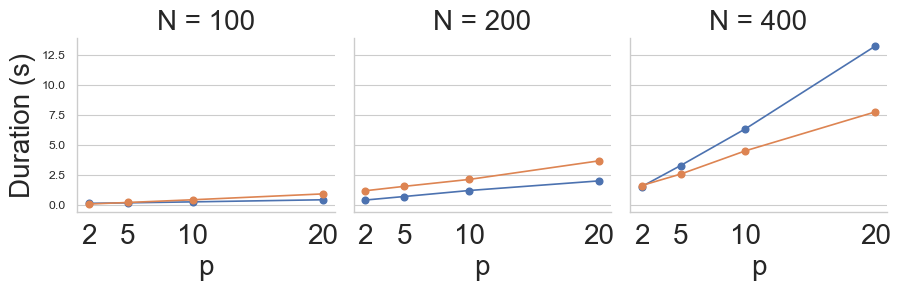

In [7]:
from plot_bench import *
sns.set_theme()
sns.set_style("white")
forest_df = make_forest_df(df[df.method != 'medoid_2means'])
grid = plot_forest_df(forest_df)
plt.savefig("./plots/runtime_wasserstein.pdf")

## MSE CART vs Medoid

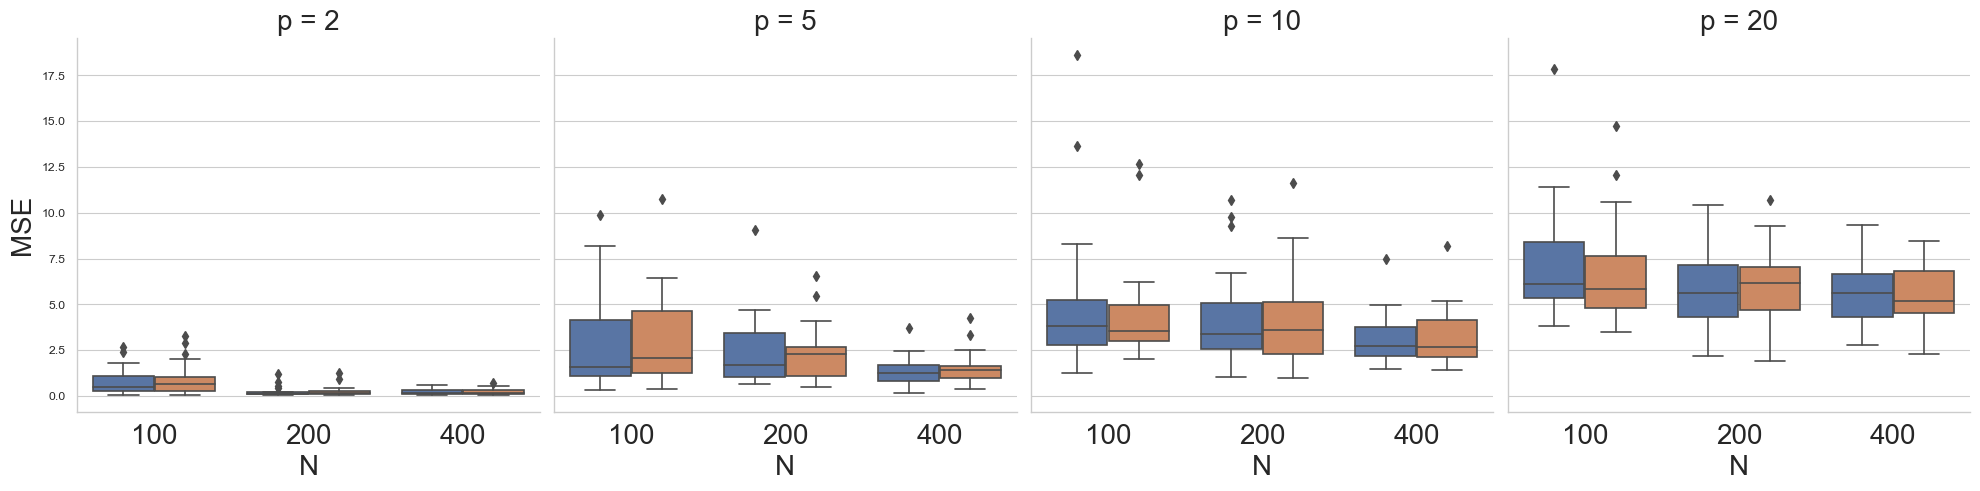

In [25]:
from plot_bench import *

plot_errors(df[(df.N > 50) & (df.method != 'medoid_2means')])
plt.savefig("./plots/error_wasserstein.pdf")

## Runtime CART vs Medoid

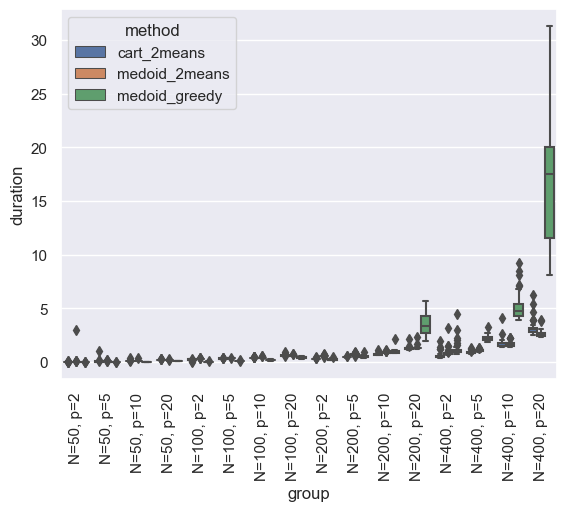

In [28]:
sns.boxplot(df, y='duration', x='group', hue='method')
plt.xticks(rotation=90);